<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
np.round()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [147]:
data = pd.read_csv('./train.csv')

In [148]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [149]:
data.sample(5)  # look at random strings

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1589,23,23.85,625.65,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1199,48,75.15,3772.65,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,One year,No,Electronic check,0
4273,14,80.45,1072,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1
5210,41,20.00,879.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
242,6,99.95,547.65,Female,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,1


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [151]:
isna_train = pd.DataFrame(data.isna().sum(), columns=['NaN`s'])
nan_pct_train = pd.DataFrame(data.isna().mean() * 100, columns=['percent of total'])
nan_count_table = pd.concat((isna_train, nan_pct_train), axis=1)
nan_count_table

,NaN`s,percent of total
ClientPeriod,0,0.0
MonthlySpending,0,0.0
TotalSpent,0,0.0
Sex,0,0.0
IsSeniorCitizen,0,0.0
HasPartner,0,0.0
HasChild,0,0.0
HasPhoneService,0,0.0
HasMultiplePhoneNumbers,0,0.0
HasInternetService,0,0.0


In [152]:
total_spent = data.TotalSpent.values
print(sorted(total_spent)[:30])   # easiest way to find not digit feature values is present it in the sorted list view 

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '100.2', '100.25', '100.35', '100.4', '100.9', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.65', '101.9', '1010', '1011.5']


In [153]:
data.loc[data['TotalSpent'] == ' ', ['TotalSpent']] = np.round(data[data['TotalSpent'] != ' ']['TotalSpent'].astype('float').mean(), 2)
data['TotalSpent'] = data['TotalSpent'].astype('float64')     # replace wrong values by mean value of feature

In [154]:
cb_data = data.copy()   # make a copy for further processing with different models 
cb_data.loc[:, 'IsSeniorCitizen'] = cb_data.loc[:, 'IsSeniorCitizen'].replace(0, 'No')
cb_data.loc[:, 'IsSeniorCitizen'] = cb_data.loc[:, 'IsSeniorCitizen'].replace(1, 'Yes')

In [155]:
cb_data.drop('Churn', axis=1, inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

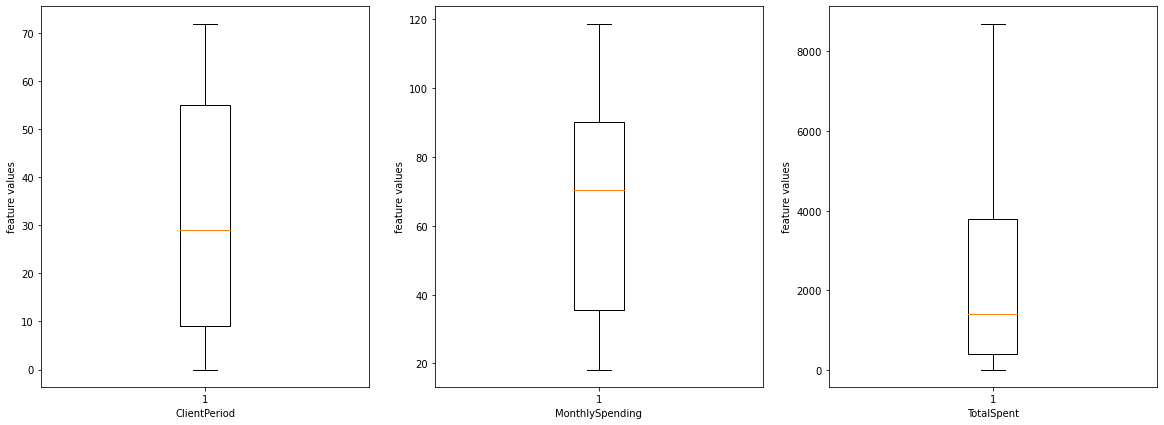

'Boxplot is the best way to find significant differences in numeric data'

In [156]:
plt.figure(figsize=(20, 7))

ax = None

for i, num_col in enumerate(num_cols):
    ax = plt.subplot(1, 3, i+1)
    plt.boxplot(data[num_col])
    plt.xlabel(num_col)
    plt.ylabel('feature values')
    
plt.show()
'''Boxplot is the best way to find significant differences in numeric data'''

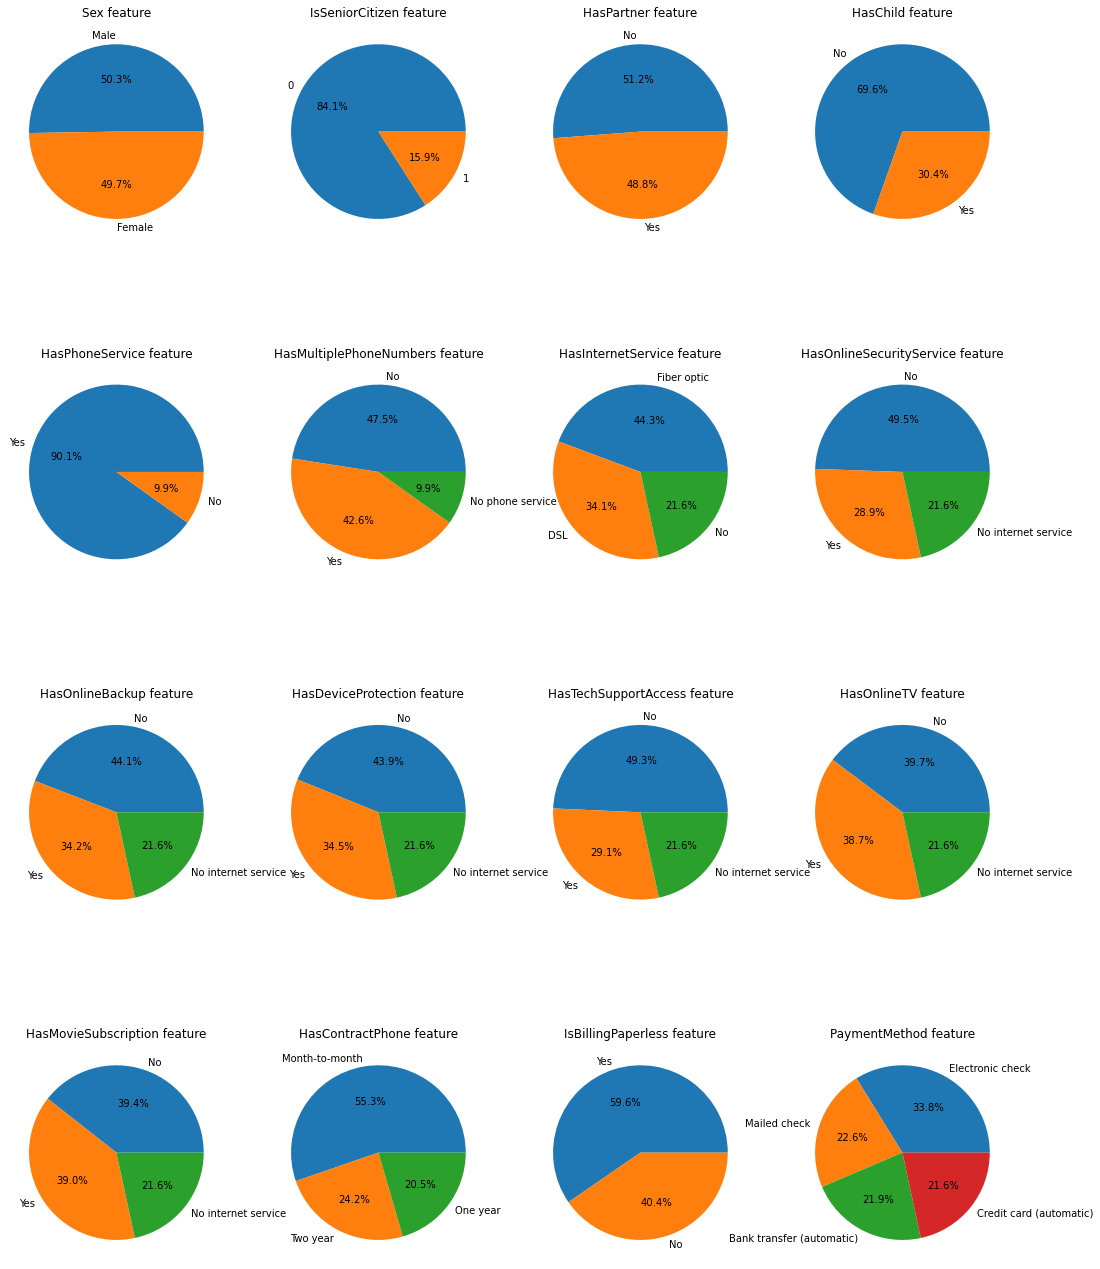

In [157]:
fig, ax1 = plt.subplots(4, 4, figsize=(18, 24))

ax1 = ax1.ravel()
plt.axis
for i, cat_col in enumerate(cat_cols):
    values = []
    labels = []
    value_counts = data[cat_col].value_counts()
    len_col = len(value_counts.values)
    for j in range(len_col):
        values.append(value_counts.values[j])
        labels.append(value_counts.index[j])
    ax1[i].set_title('{} feature'.format(cat_col))
    ax1[i].pie(values, labels=labels, autopct='%1.1f%%')


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [158]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [159]:
categorical_data = data[cat_cols]
numerical_data = data[num_cols]

dummy_features = pd.get_dummies(categorical_data)

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)
normalized_data = pd.DataFrame(normalized_data, columns=num_cols)

y = data[target_col]
X = pd.concat([normalized_data, dummy_features], verify_integrity=True, axis=1)
X.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
117,-1.238268,-0.131729,-0.951442,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
5183,0.391192,0.902287,0.698766,0,1,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
3430,1.002240,0.986798,1.401742,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
550,-1.116059,-0.290809,-0.882249,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4925,-1.279005,0.323967,-0.977866,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished


The best quality is 84.49767188769803%, and corresponding to the parameter C=100


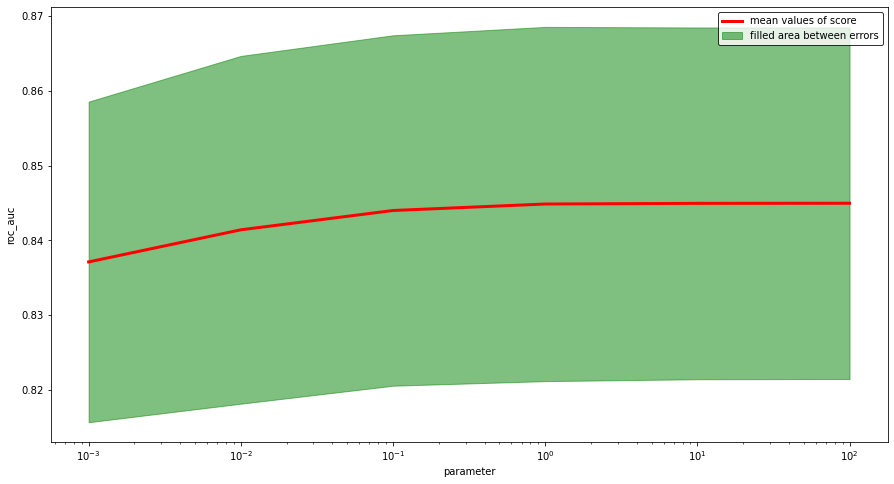

In [160]:
C = [100, 10, 1, 0.1, 0.01, 0.001]
param = {'C': C}

CV_model = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=param,
                       n_jobs=-1,
                       cv=5,
                       scoring='roc_auc',
                       refit=True,
                       verbose=10)
CV_model.fit(X, y)

best_quality = max(CV_model.cv_results_['mean_test_score']) * 100
best_param = C[int(np.where(CV_model.cv_results_['mean_test_score'] == max(CV_model.cv_results_['mean_test_score']))[0])]
print('The best quality is {}%, and corresponding to the parameter {}={}'.format(best_quality, 'C', best_param))

mean = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']

plt.figure(figsize=(15,8))
plt.plot(C, mean, label='mean values of score', lw=3, color='r')
plt.fill_between(C, mean - 2 * error, mean + 2 * error,
                label='filled area between errors', color='g', alpha=0.5)
plt.legend(facecolor='white', edgecolor='black')
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.xscale('log')
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

The best quality is 84.49767188769803%, and corresponding to the parameter C=100


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [161]:
import catboost

In [162]:
X_train, X_test, y_train, y_test = train_test_split(cb_data.values, y.values, train_size=0.8)

In [163]:
cat_indexes = np.arange(3, 19)

In [164]:
cat_boost_model = catboost.CatBoostClassifier()

cat_boost_model.fit(X_train, y_train, cat_features=cat_indexes)

train_preds_proba = cat_boost_model.predict_proba(X_train)[:, 1]
preds_proba = cat_boost_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.019062
0:	learn: 0.6804053	total: 139ms	remaining: 2m 18s
1:	learn: 0.6689045	total: 208ms	remaining: 1m 43s
2:	learn: 0.6574166	total: 256ms	remaining: 1m 25s
3:	learn: 0.6460445	total: 269ms	remaining: 1m 7s
4:	learn: 0.6349150	total: 284ms	remaining: 56.5s
5:	learn: 0.6247586	total: 298ms	remaining: 49.4s
6:	learn: 0.6151172	total: 321ms	remaining: 45.5s
7:	learn: 0.6065261	total: 335ms	remaining: 41.5s
8:	learn: 0.5984200	total: 349ms	remaining: 38.5s
9:	learn: 0.5900080	total: 373ms	remaining: 36.9s
10:	learn: 0.5819339	total: 389ms	remaining: 35s
11:	learn: 0.5746121	total: 401ms	remaining: 33s
12:	learn: 0.5672313	total: 422ms	remaining: 32s
13:	learn: 0.5603549	total: 433ms	remaining: 30.5s
14:	learn: 0.5535587	total: 446ms	remaining: 29.3s
15:	learn: 0.5474830	total: 459ms	remaining: 28.2s
16:	learn: 0.5410590	total: 471ms	remaining: 27.2s
17:	learn: 0.5353690	total: 482ms	remaining: 26.3s
18:	learn: 0.5298579	total: 494ms	remaining: 25.5s
19:	learn: 0.5

165:	learn: 0.3935429	total: 2.57s	remaining: 12.9s
166:	learn: 0.3933175	total: 2.59s	remaining: 12.9s
167:	learn: 0.3930984	total: 2.6s	remaining: 12.9s
168:	learn: 0.3930257	total: 2.62s	remaining: 12.9s
169:	learn: 0.3927583	total: 2.63s	remaining: 12.8s
170:	learn: 0.3925655	total: 2.64s	remaining: 12.8s
171:	learn: 0.3925328	total: 2.65s	remaining: 12.8s
172:	learn: 0.3922932	total: 2.67s	remaining: 12.7s
173:	learn: 0.3922267	total: 2.68s	remaining: 12.7s
174:	learn: 0.3920460	total: 2.69s	remaining: 12.7s
175:	learn: 0.3919704	total: 2.7s	remaining: 12.7s
176:	learn: 0.3917325	total: 2.71s	remaining: 12.6s
177:	learn: 0.3916488	total: 2.73s	remaining: 12.6s
178:	learn: 0.3916265	total: 2.73s	remaining: 12.5s
179:	learn: 0.3914462	total: 2.74s	remaining: 12.5s
180:	learn: 0.3912013	total: 2.76s	remaining: 12.5s
181:	learn: 0.3910396	total: 2.77s	remaining: 12.5s
182:	learn: 0.3906931	total: 2.79s	remaining: 12.5s
183:	learn: 0.3906797	total: 2.8s	remaining: 12.4s
184:	learn: 0.3

324:	learn: 0.3771248	total: 4.81s	remaining: 9.99s
325:	learn: 0.3770266	total: 4.83s	remaining: 9.98s
326:	learn: 0.3767743	total: 4.84s	remaining: 9.96s
327:	learn: 0.3767548	total: 4.85s	remaining: 9.94s
328:	learn: 0.3767163	total: 4.86s	remaining: 9.92s
329:	learn: 0.3766207	total: 4.87s	remaining: 9.9s
330:	learn: 0.3765342	total: 4.89s	remaining: 9.88s
331:	learn: 0.3764820	total: 4.9s	remaining: 9.86s
332:	learn: 0.3764820	total: 4.9s	remaining: 9.82s
333:	learn: 0.3764695	total: 4.91s	remaining: 9.78s
334:	learn: 0.3764279	total: 4.93s	remaining: 9.78s
335:	learn: 0.3764279	total: 4.93s	remaining: 9.74s
336:	learn: 0.3763389	total: 4.94s	remaining: 9.72s
337:	learn: 0.3763374	total: 4.95s	remaining: 9.69s
338:	learn: 0.3763374	total: 4.95s	remaining: 9.65s
339:	learn: 0.3763025	total: 4.95s	remaining: 9.62s
340:	learn: 0.3762889	total: 4.96s	remaining: 9.58s
341:	learn: 0.3762844	total: 4.96s	remaining: 9.55s
342:	learn: 0.3762059	total: 4.97s	remaining: 9.53s
343:	learn: 0.3

488:	learn: 0.3638582	total: 6.79s	remaining: 7.09s
489:	learn: 0.3636219	total: 6.8s	remaining: 7.08s
490:	learn: 0.3636058	total: 6.82s	remaining: 7.07s
491:	learn: 0.3635050	total: 6.84s	remaining: 7.06s
492:	learn: 0.3632877	total: 6.85s	remaining: 7.05s
493:	learn: 0.3632033	total: 6.87s	remaining: 7.03s
494:	learn: 0.3631952	total: 6.88s	remaining: 7.02s
495:	learn: 0.3631653	total: 6.89s	remaining: 7s
496:	learn: 0.3630754	total: 6.9s	remaining: 6.99s
497:	learn: 0.3630329	total: 6.91s	remaining: 6.97s
498:	learn: 0.3629628	total: 6.93s	remaining: 6.96s
499:	learn: 0.3628616	total: 6.94s	remaining: 6.94s
500:	learn: 0.3627328	total: 6.96s	remaining: 6.93s
501:	learn: 0.3626426	total: 6.97s	remaining: 6.92s
502:	learn: 0.3625913	total: 6.99s	remaining: 6.9s
503:	learn: 0.3624846	total: 7s	remaining: 6.89s
504:	learn: 0.3623573	total: 7.01s	remaining: 6.88s
505:	learn: 0.3623139	total: 7.03s	remaining: 6.86s
506:	learn: 0.3622346	total: 7.04s	remaining: 6.84s
507:	learn: 0.3621561

659:	learn: 0.3488497	total: 9.4s	remaining: 4.84s
660:	learn: 0.3487929	total: 9.42s	remaining: 4.83s
661:	learn: 0.3487726	total: 9.43s	remaining: 4.81s
662:	learn: 0.3487453	total: 9.44s	remaining: 4.8s
663:	learn: 0.3486761	total: 9.45s	remaining: 4.78s
664:	learn: 0.3486065	total: 9.47s	remaining: 4.77s
665:	learn: 0.3485835	total: 9.49s	remaining: 4.76s
666:	learn: 0.3484800	total: 9.52s	remaining: 4.75s
667:	learn: 0.3483573	total: 9.54s	remaining: 4.74s
668:	learn: 0.3481897	total: 9.55s	remaining: 4.73s
669:	learn: 0.3481205	total: 9.57s	remaining: 4.71s
670:	learn: 0.3480871	total: 9.58s	remaining: 4.7s
671:	learn: 0.3480428	total: 9.59s	remaining: 4.68s
672:	learn: 0.3480335	total: 9.61s	remaining: 4.67s
673:	learn: 0.3478518	total: 9.62s	remaining: 4.65s
674:	learn: 0.3478210	total: 9.63s	remaining: 4.64s
675:	learn: 0.3477761	total: 9.64s	remaining: 4.62s
676:	learn: 0.3477248	total: 9.65s	remaining: 4.61s
677:	learn: 0.3476663	total: 9.67s	remaining: 4.59s
678:	learn: 0.3

824:	learn: 0.3373589	total: 12s	remaining: 2.54s
825:	learn: 0.3373254	total: 12s	remaining: 2.52s
826:	learn: 0.3372567	total: 12s	remaining: 2.51s
827:	learn: 0.3372259	total: 12s	remaining: 2.49s
828:	learn: 0.3370358	total: 12s	remaining: 2.48s
829:	learn: 0.3370147	total: 12s	remaining: 2.46s
830:	learn: 0.3368892	total: 12s	remaining: 2.45s
831:	learn: 0.3368165	total: 12.1s	remaining: 2.43s
832:	learn: 0.3367680	total: 12.1s	remaining: 2.42s
833:	learn: 0.3365373	total: 12.1s	remaining: 2.4s
834:	learn: 0.3364034	total: 12.1s	remaining: 2.39s
835:	learn: 0.3363843	total: 12.1s	remaining: 2.38s
836:	learn: 0.3363129	total: 12.1s	remaining: 2.36s
837:	learn: 0.3362810	total: 12.1s	remaining: 2.35s
838:	learn: 0.3362187	total: 12.1s	remaining: 2.33s
839:	learn: 0.3359942	total: 12.2s	remaining: 2.32s
840:	learn: 0.3359347	total: 12.2s	remaining: 2.3s
841:	learn: 0.3357803	total: 12.2s	remaining: 2.29s
842:	learn: 0.3355916	total: 12.2s	remaining: 2.27s
843:	learn: 0.3355073	total:

994:	learn: 0.3245648	total: 14.2s	remaining: 71.3ms
995:	learn: 0.3244012	total: 14.2s	remaining: 57ms
996:	learn: 0.3243462	total: 14.2s	remaining: 42.8ms
997:	learn: 0.3243045	total: 14.2s	remaining: 28.5ms
998:	learn: 0.3242250	total: 14.2s	remaining: 14.3ms
999:	learn: 0.3241587	total: 14.3s	remaining: 0us


In [165]:
train_auc = roc_auc_score(y_train, train_preds_proba)
test_auc = roc_auc_score(y_test, preds_proba)
print(train_auc, test_auc)

0.8962820581627595 0.8349875288248859


In [166]:
def find_best_params(n_estimator, lr):
    model = catboost.CatBoostClassifier(n_estimators=n_estimator, 
                                    learning_rate=learning_rate)

    model.fit(X_train, y_train, cat_features=cat_indexes)

    train_preds_proba = model.predict_proba(X_train)[:, 1]
    preds_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc = roc_auc_score(y_train, train_preds_proba)
    test_auc = roc_auc_score(y_test, preds_proba)
    return [train_auc, test_auc, n_estimator, lr]

In [167]:
train_answer_dict = {}
test_answer_dict = {}
n_estimators = np.array(np.linspace(100, 800, 5), dtype='int')
learning_rates = np.array(np.linspace(0.001, 1, 5), dtype='float64')


for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        train_answer_dict[find_best_params(n_estimator, learning_rate)[0]] = find_best_params(n_estimator, learning_rate)
        test_answer_dict[find_best_params(n_estimator, learning_rate)[1]] = find_best_params(n_estimator, learning_rate)

print(max(train_answer_dict), '----', train_answer_dict[max(train_answer_dict)])
print(max(test_answer_dict), '----', test_answer_dict[max(test_answer_dict)])

0:	learn: 0.6927707	total: 11.8ms	remaining: 1.17s
1:	learn: 0.6923931	total: 22.7ms	remaining: 1.11s
2:	learn: 0.6920160	total: 33ms	remaining: 1.07s
3:	learn: 0.6916372	total: 39.4ms	remaining: 946ms
4:	learn: 0.6912777	total: 46.7ms	remaining: 888ms
5:	learn: 0.6909132	total: 53.8ms	remaining: 842ms
6:	learn: 0.6905438	total: 60.3ms	remaining: 802ms
7:	learn: 0.6901731	total: 67.8ms	remaining: 780ms
8:	learn: 0.6898054	total: 74.6ms	remaining: 754ms
9:	learn: 0.6894243	total: 81.5ms	remaining: 734ms
10:	learn: 0.6890578	total: 88ms	remaining: 712ms
11:	learn: 0.6886793	total: 95.2ms	remaining: 698ms
12:	learn: 0.6883156	total: 102ms	remaining: 683ms
13:	learn: 0.6879392	total: 109ms	remaining: 667ms
14:	learn: 0.6875906	total: 115ms	remaining: 653ms
15:	learn: 0.6872281	total: 122ms	remaining: 640ms
16:	learn: 0.6868564	total: 128ms	remaining: 627ms
17:	learn: 0.6864868	total: 135ms	remaining: 615ms
18:	learn: 0.6861330	total: 141ms	remaining: 603ms
19:	learn: 0.6857830	total: 148ms

70:	learn: 0.6681808	total: 544ms	remaining: 222ms
71:	learn: 0.6678624	total: 550ms	remaining: 214ms
72:	learn: 0.6675279	total: 556ms	remaining: 206ms
73:	learn: 0.6672031	total: 562ms	remaining: 197ms
74:	learn: 0.6668680	total: 568ms	remaining: 189ms
75:	learn: 0.6665424	total: 575ms	remaining: 182ms
76:	learn: 0.6662168	total: 582ms	remaining: 174ms
77:	learn: 0.6658791	total: 590ms	remaining: 166ms
78:	learn: 0.6655417	total: 596ms	remaining: 158ms
79:	learn: 0.6652187	total: 602ms	remaining: 151ms
80:	learn: 0.6648826	total: 608ms	remaining: 143ms
81:	learn: 0.6645437	total: 614ms	remaining: 135ms
82:	learn: 0.6642306	total: 620ms	remaining: 127ms
83:	learn: 0.6639359	total: 626ms	remaining: 119ms
84:	learn: 0.6636092	total: 632ms	remaining: 112ms
85:	learn: 0.6632967	total: 638ms	remaining: 104ms
86:	learn: 0.6629786	total: 644ms	remaining: 96.2ms
87:	learn: 0.6626481	total: 650ms	remaining: 88.6ms
88:	learn: 0.6623288	total: 655ms	remaining: 81ms
89:	learn: 0.6620206	total: 66

54:	learn: 0.6735474	total: 384ms	remaining: 314ms
55:	learn: 0.6731993	total: 390ms	remaining: 306ms
56:	learn: 0.6728529	total: 396ms	remaining: 299ms
57:	learn: 0.6725314	total: 403ms	remaining: 292ms
58:	learn: 0.6721919	total: 409ms	remaining: 284ms
59:	learn: 0.6718541	total: 417ms	remaining: 278ms
60:	learn: 0.6715256	total: 422ms	remaining: 270ms
61:	learn: 0.6711888	total: 429ms	remaining: 263ms
62:	learn: 0.6708605	total: 435ms	remaining: 255ms
63:	learn: 0.6705322	total: 440ms	remaining: 248ms
64:	learn: 0.6701906	total: 446ms	remaining: 240ms
65:	learn: 0.6698569	total: 452ms	remaining: 233ms
66:	learn: 0.6695316	total: 457ms	remaining: 225ms
67:	learn: 0.6691940	total: 463ms	remaining: 218ms
68:	learn: 0.6688588	total: 469ms	remaining: 211ms
69:	learn: 0.6685172	total: 475ms	remaining: 204ms
70:	learn: 0.6681808	total: 481ms	remaining: 196ms
71:	learn: 0.6678624	total: 487ms	remaining: 189ms
72:	learn: 0.6675279	total: 492ms	remaining: 182ms
73:	learn: 0.6672031	total: 498

28:	learn: 0.3937378	total: 186ms	remaining: 456ms
29:	learn: 0.3934517	total: 194ms	remaining: 453ms
30:	learn: 0.3930869	total: 202ms	remaining: 450ms
31:	learn: 0.3921020	total: 209ms	remaining: 444ms
32:	learn: 0.3915418	total: 217ms	remaining: 440ms
33:	learn: 0.3900299	total: 224ms	remaining: 435ms
34:	learn: 0.3895708	total: 231ms	remaining: 428ms
35:	learn: 0.3893827	total: 237ms	remaining: 422ms
36:	learn: 0.3883328	total: 243ms	remaining: 415ms
37:	learn: 0.3882392	total: 250ms	remaining: 408ms
38:	learn: 0.3875256	total: 256ms	remaining: 401ms
39:	learn: 0.3870020	total: 263ms	remaining: 394ms
40:	learn: 0.3863383	total: 269ms	remaining: 388ms
41:	learn: 0.3862924	total: 276ms	remaining: 381ms
42:	learn: 0.3860114	total: 282ms	remaining: 374ms
43:	learn: 0.3855236	total: 288ms	remaining: 367ms
44:	learn: 0.3852625	total: 295ms	remaining: 360ms
45:	learn: 0.3847259	total: 301ms	remaining: 353ms
46:	learn: 0.3841458	total: 307ms	remaining: 347ms
47:	learn: 0.3836983	total: 314

0:	learn: 0.6099846	total: 7.5ms	remaining: 742ms
1:	learn: 0.5583954	total: 15.2ms	remaining: 745ms
2:	learn: 0.5208205	total: 23.2ms	remaining: 750ms
3:	learn: 0.4961251	total: 30.4ms	remaining: 729ms
4:	learn: 0.4752642	total: 37.6ms	remaining: 715ms
5:	learn: 0.4600732	total: 44.6ms	remaining: 699ms
6:	learn: 0.4491291	total: 48.9ms	remaining: 649ms
7:	learn: 0.4390289	total: 55.2ms	remaining: 635ms
8:	learn: 0.4313707	total: 61.9ms	remaining: 626ms
9:	learn: 0.4249203	total: 70.1ms	remaining: 631ms
10:	learn: 0.4207928	total: 77.3ms	remaining: 625ms
11:	learn: 0.4182292	total: 80.4ms	remaining: 589ms
12:	learn: 0.4155354	total: 85.1ms	remaining: 569ms
13:	learn: 0.4127025	total: 89.8ms	remaining: 551ms
14:	learn: 0.4101518	total: 96.2ms	remaining: 545ms
15:	learn: 0.4086476	total: 103ms	remaining: 541ms
16:	learn: 0.4060957	total: 112ms	remaining: 546ms
17:	learn: 0.4047342	total: 119ms	remaining: 540ms
18:	learn: 0.4025299	total: 125ms	remaining: 532ms
19:	learn: 0.4009151	total:

86:	learn: 0.3436568	total: 550ms	remaining: 82.1ms
87:	learn: 0.3436335	total: 557ms	remaining: 75.9ms
88:	learn: 0.3433314	total: 563ms	remaining: 69.5ms
89:	learn: 0.3428298	total: 569ms	remaining: 63.3ms
90:	learn: 0.3416450	total: 575ms	remaining: 56.8ms
91:	learn: 0.3416083	total: 581ms	remaining: 50.5ms
92:	learn: 0.3415252	total: 587ms	remaining: 44.2ms
93:	learn: 0.3412500	total: 593ms	remaining: 37.8ms
94:	learn: 0.3406365	total: 599ms	remaining: 31.5ms
95:	learn: 0.3400330	total: 605ms	remaining: 25.2ms
96:	learn: 0.3385777	total: 611ms	remaining: 18.9ms
97:	learn: 0.3379963	total: 617ms	remaining: 12.6ms
98:	learn: 0.3375102	total: 623ms	remaining: 6.29ms
99:	learn: 0.3374959	total: 630ms	remaining: 0us
0:	learn: 0.5488418	total: 6.22ms	remaining: 616ms
1:	learn: 0.4824894	total: 13ms	remaining: 637ms
2:	learn: 0.4515938	total: 20ms	remaining: 646ms
3:	learn: 0.4329260	total: 26.8ms	remaining: 643ms
4:	learn: 0.4231880	total: 34.2ms	remaining: 650ms
5:	learn: 0.4159774	tota

53:	learn: 0.3624506	total: 366ms	remaining: 312ms
54:	learn: 0.3622938	total: 374ms	remaining: 306ms
55:	learn: 0.3614595	total: 381ms	remaining: 299ms
56:	learn: 0.3605123	total: 388ms	remaining: 293ms
57:	learn: 0.3599451	total: 395ms	remaining: 286ms
58:	learn: 0.3598388	total: 401ms	remaining: 279ms
59:	learn: 0.3590628	total: 408ms	remaining: 272ms
60:	learn: 0.3588298	total: 413ms	remaining: 264ms
61:	learn: 0.3586043	total: 419ms	remaining: 257ms
62:	learn: 0.3585306	total: 425ms	remaining: 250ms
63:	learn: 0.3568232	total: 434ms	remaining: 244ms
64:	learn: 0.3560114	total: 440ms	remaining: 237ms
65:	learn: 0.3559370	total: 447ms	remaining: 230ms
66:	learn: 0.3545602	total: 454ms	remaining: 223ms
67:	learn: 0.3538624	total: 459ms	remaining: 216ms
68:	learn: 0.3523666	total: 465ms	remaining: 209ms
69:	learn: 0.3522742	total: 471ms	remaining: 202ms
70:	learn: 0.3520106	total: 476ms	remaining: 195ms
71:	learn: 0.3519908	total: 483ms	remaining: 188ms
72:	learn: 0.3518917	total: 489

26:	learn: 0.3693715	total: 183ms	remaining: 494ms
27:	learn: 0.3681615	total: 191ms	remaining: 491ms
28:	learn: 0.3648209	total: 197ms	remaining: 483ms
29:	learn: 0.3632807	total: 206ms	remaining: 480ms
30:	learn: 0.3626620	total: 212ms	remaining: 473ms
31:	learn: 0.3623013	total: 220ms	remaining: 467ms
32:	learn: 0.3613460	total: 226ms	remaining: 459ms
33:	learn: 0.3612334	total: 233ms	remaining: 453ms
34:	learn: 0.3577250	total: 240ms	remaining: 445ms
35:	learn: 0.3576294	total: 246ms	remaining: 438ms
36:	learn: 0.3562132	total: 253ms	remaining: 431ms
37:	learn: 0.3546315	total: 260ms	remaining: 424ms
38:	learn: 0.3531082	total: 266ms	remaining: 416ms
39:	learn: 0.3527354	total: 273ms	remaining: 409ms
40:	learn: 0.3518786	total: 279ms	remaining: 402ms
41:	learn: 0.3518107	total: 285ms	remaining: 394ms
42:	learn: 0.3517905	total: 291ms	remaining: 386ms
43:	learn: 0.3504495	total: 298ms	remaining: 379ms
44:	learn: 0.3499264	total: 304ms	remaining: 372ms
45:	learn: 0.3485339	total: 310

0:	learn: 0.5073238	total: 12.6ms	remaining: 1.24s
1:	learn: 0.4488868	total: 20.9ms	remaining: 1.02s
2:	learn: 0.4292214	total: 30.1ms	remaining: 974ms
3:	learn: 0.4188183	total: 38.3ms	remaining: 918ms
4:	learn: 0.4131280	total: 44.8ms	remaining: 851ms
5:	learn: 0.4090034	total: 51.5ms	remaining: 808ms
6:	learn: 0.4040182	total: 58.6ms	remaining: 779ms
7:	learn: 0.4017529	total: 65.4ms	remaining: 752ms
8:	learn: 0.4004372	total: 72.1ms	remaining: 729ms
9:	learn: 0.3953616	total: 78.9ms	remaining: 710ms
10:	learn: 0.3925481	total: 85.5ms	remaining: 692ms
11:	learn: 0.3921887	total: 89.9ms	remaining: 659ms
12:	learn: 0.3910162	total: 95.8ms	remaining: 641ms
13:	learn: 0.3865848	total: 103ms	remaining: 630ms
14:	learn: 0.3849613	total: 109ms	remaining: 619ms
15:	learn: 0.3848054	total: 116ms	remaining: 609ms
16:	learn: 0.3840578	total: 123ms	remaining: 599ms
17:	learn: 0.3832900	total: 129ms	remaining: 588ms
18:	learn: 0.3829527	total: 136ms	remaining: 578ms
19:	learn: 0.3826455	total: 

88:	learn: 0.3078991	total: 561ms	remaining: 69.3ms
89:	learn: 0.3076658	total: 568ms	remaining: 63.1ms
90:	learn: 0.3074682	total: 574ms	remaining: 56.8ms
91:	learn: 0.3071075	total: 580ms	remaining: 50.5ms
92:	learn: 0.3064589	total: 586ms	remaining: 44.1ms
93:	learn: 0.3054781	total: 593ms	remaining: 37.8ms
94:	learn: 0.3054136	total: 599ms	remaining: 31.5ms
95:	learn: 0.3053505	total: 605ms	remaining: 25.2ms
96:	learn: 0.3041149	total: 611ms	remaining: 18.9ms
97:	learn: 0.3035777	total: 617ms	remaining: 12.6ms
98:	learn: 0.3028998	total: 623ms	remaining: 6.29ms
99:	learn: 0.3026936	total: 628ms	remaining: 0us
0:	learn: 0.4826529	total: 6.52ms	remaining: 645ms
1:	learn: 0.4320785	total: 13.4ms	remaining: 659ms
2:	learn: 0.4160529	total: 20.8ms	remaining: 674ms
3:	learn: 0.4055026	total: 27.7ms	remaining: 665ms
4:	learn: 0.4033710	total: 30.8ms	remaining: 586ms
5:	learn: 0.3983653	total: 37.6ms	remaining: 589ms
6:	learn: 0.3939712	total: 44.4ms	remaining: 590ms
7:	learn: 0.3939068	to

54:	learn: 0.3270674	total: 379ms	remaining: 310ms
55:	learn: 0.3264732	total: 387ms	remaining: 304ms
56:	learn: 0.3254292	total: 395ms	remaining: 298ms
57:	learn: 0.3253506	total: 403ms	remaining: 292ms
58:	learn: 0.3240562	total: 409ms	remaining: 284ms
59:	learn: 0.3232039	total: 416ms	remaining: 277ms
60:	learn: 0.3220911	total: 422ms	remaining: 270ms
61:	learn: 0.3199866	total: 428ms	remaining: 262ms
62:	learn: 0.3189108	total: 435ms	remaining: 255ms
63:	learn: 0.3166810	total: 441ms	remaining: 248ms
64:	learn: 0.3145872	total: 448ms	remaining: 241ms
65:	learn: 0.3123943	total: 454ms	remaining: 234ms
66:	learn: 0.3098578	total: 460ms	remaining: 227ms
67:	learn: 0.3080913	total: 466ms	remaining: 220ms
68:	learn: 0.3065900	total: 473ms	remaining: 212ms
69:	learn: 0.3041661	total: 479ms	remaining: 205ms
70:	learn: 0.3031778	total: 485ms	remaining: 198ms
71:	learn: 0.3024309	total: 492ms	remaining: 191ms
72:	learn: 0.3014576	total: 499ms	remaining: 184ms
73:	learn: 0.3000234	total: 505

27:	learn: 0.3660020	total: 197ms	remaining: 507ms
28:	learn: 0.3659306	total: 204ms	remaining: 500ms
29:	learn: 0.3637291	total: 211ms	remaining: 493ms
30:	learn: 0.3618930	total: 217ms	remaining: 483ms
31:	learn: 0.3616257	total: 223ms	remaining: 473ms
32:	learn: 0.3590237	total: 229ms	remaining: 465ms
33:	learn: 0.3586377	total: 234ms	remaining: 455ms
34:	learn: 0.3566431	total: 240ms	remaining: 446ms
35:	learn: 0.3534737	total: 246ms	remaining: 438ms
36:	learn: 0.3518760	total: 252ms	remaining: 429ms
37:	learn: 0.3501244	total: 258ms	remaining: 421ms
38:	learn: 0.3496974	total: 264ms	remaining: 412ms
39:	learn: 0.3481374	total: 270ms	remaining: 405ms
40:	learn: 0.3472286	total: 276ms	remaining: 398ms
41:	learn: 0.3445850	total: 282ms	remaining: 389ms
42:	learn: 0.3443326	total: 288ms	remaining: 381ms
43:	learn: 0.3429664	total: 293ms	remaining: 373ms
44:	learn: 0.3420554	total: 299ms	remaining: 365ms
45:	learn: 0.3407940	total: 305ms	remaining: 358ms
46:	learn: 0.3391381	total: 310

100:	learn: 0.6308491	total: 1.11s	remaining: 1.91s
101:	learn: 0.6303069	total: 1.12s	remaining: 1.91s
102:	learn: 0.6297748	total: 1.14s	remaining: 1.9s
103:	learn: 0.6292037	total: 1.15s	remaining: 1.89s
104:	learn: 0.6287374	total: 1.15s	remaining: 1.86s
105:	learn: 0.6281638	total: 1.17s	remaining: 1.86s
106:	learn: 0.6276015	total: 1.18s	remaining: 1.85s
107:	learn: 0.6271272	total: 1.19s	remaining: 1.83s
108:	learn: 0.6265820	total: 1.2s	remaining: 1.82s
109:	learn: 0.6260630	total: 1.21s	remaining: 1.81s
110:	learn: 0.6255181	total: 1.22s	remaining: 1.8s
111:	learn: 0.6249981	total: 1.23s	remaining: 1.79s
112:	learn: 0.6244465	total: 1.24s	remaining: 1.78s
113:	learn: 0.6240148	total: 1.25s	remaining: 1.77s
114:	learn: 0.6234822	total: 1.26s	remaining: 1.76s
115:	learn: 0.6229480	total: 1.27s	remaining: 1.75s
116:	learn: 0.6224476	total: 1.28s	remaining: 1.73s
117:	learn: 0.6219934	total: 1.29s	remaining: 1.71s
118:	learn: 0.6214571	total: 1.3s	remaining: 1.7s
119:	learn: 0.620

268:	learn: 0.5570313	total: 2.92s	remaining: 65.1ms
269:	learn: 0.5567393	total: 2.92s	remaining: 54.2ms
270:	learn: 0.5563871	total: 2.94s	remaining: 43.4ms
271:	learn: 0.5560327	total: 2.95s	remaining: 32.6ms
272:	learn: 0.5556634	total: 2.96s	remaining: 21.7ms
273:	learn: 0.5553611	total: 2.97s	remaining: 10.9ms
274:	learn: 0.5550046	total: 2.98s	remaining: 0us
0:	learn: 0.6924682	total: 11.6ms	remaining: 3.17s
1:	learn: 0.6918258	total: 22.9ms	remaining: 3.13s
2:	learn: 0.6911536	total: 35.6ms	remaining: 3.22s
3:	learn: 0.6904566	total: 46.6ms	remaining: 3.16s
4:	learn: 0.6897388	total: 62.3ms	remaining: 3.37s
5:	learn: 0.6890464	total: 76.3ms	remaining: 3.42s
6:	learn: 0.6883573	total: 90.4ms	remaining: 3.46s
7:	learn: 0.6877283	total: 103ms	remaining: 3.43s
8:	learn: 0.6870863	total: 113ms	remaining: 3.35s
9:	learn: 0.6863897	total: 126ms	remaining: 3.33s
10:	learn: 0.6857019	total: 137ms	remaining: 3.29s
11:	learn: 0.6851051	total: 143ms	remaining: 3.14s
12:	learn: 0.6844166	to

156:	learn: 0.6026486	total: 1.69s	remaining: 1.27s
157:	learn: 0.6022200	total: 1.7s	remaining: 1.26s
158:	learn: 0.6017423	total: 1.71s	remaining: 1.25s
159:	learn: 0.6012636	total: 1.72s	remaining: 1.24s
160:	learn: 0.6007920	total: 1.73s	remaining: 1.23s
161:	learn: 0.6003002	total: 1.74s	remaining: 1.22s
162:	learn: 0.5998449	total: 1.75s	remaining: 1.21s
163:	learn: 0.5993764	total: 1.77s	remaining: 1.2s
164:	learn: 0.5989301	total: 1.78s	remaining: 1.19s
165:	learn: 0.5984515	total: 1.79s	remaining: 1.18s
166:	learn: 0.5979292	total: 1.8s	remaining: 1.16s
167:	learn: 0.5974756	total: 1.81s	remaining: 1.15s
168:	learn: 0.5969637	total: 1.82s	remaining: 1.14s
169:	learn: 0.5964939	total: 1.83s	remaining: 1.13s
170:	learn: 0.5960228	total: 1.85s	remaining: 1.13s
171:	learn: 0.5955589	total: 1.86s	remaining: 1.12s
172:	learn: 0.5951143	total: 1.87s	remaining: 1.1s
173:	learn: 0.5947023	total: 1.88s	remaining: 1.09s
174:	learn: 0.5941957	total: 1.9s	remaining: 1.09s
175:	learn: 0.593

52:	learn: 0.6585412	total: 583ms	remaining: 2.44s
53:	learn: 0.6579055	total: 596ms	remaining: 2.44s
54:	learn: 0.6572669	total: 607ms	remaining: 2.43s
55:	learn: 0.6566413	total: 618ms	remaining: 2.42s
56:	learn: 0.6561843	total: 622ms	remaining: 2.38s
57:	learn: 0.6555689	total: 633ms	remaining: 2.37s
58:	learn: 0.6551171	total: 638ms	remaining: 2.34s
59:	learn: 0.6544430	total: 647ms	remaining: 2.32s
60:	learn: 0.6538318	total: 660ms	remaining: 2.31s
61:	learn: 0.6532031	total: 670ms	remaining: 2.3s
62:	learn: 0.6526053	total: 681ms	remaining: 2.29s
63:	learn: 0.6520292	total: 693ms	remaining: 2.29s
64:	learn: 0.6514125	total: 705ms	remaining: 2.28s
65:	learn: 0.6508276	total: 717ms	remaining: 2.27s
66:	learn: 0.6501964	total: 728ms	remaining: 2.26s
67:	learn: 0.6496694	total: 737ms	remaining: 2.24s
68:	learn: 0.6490430	total: 749ms	remaining: 2.24s
69:	learn: 0.6484457	total: 772ms	remaining: 2.26s
70:	learn: 0.6478747	total: 784ms	remaining: 2.25s
71:	learn: 0.6473080	total: 798m

218:	learn: 0.5754039	total: 2.43s	remaining: 622ms
219:	learn: 0.5750695	total: 2.44s	remaining: 610ms
220:	learn: 0.5747549	total: 2.45s	remaining: 598ms
221:	learn: 0.5743108	total: 2.46s	remaining: 587ms
222:	learn: 0.5738958	total: 2.47s	remaining: 576ms
223:	learn: 0.5735623	total: 2.48s	remaining: 564ms
224:	learn: 0.5731531	total: 2.48s	remaining: 552ms
225:	learn: 0.5727299	total: 2.5s	remaining: 541ms
226:	learn: 0.5723472	total: 2.51s	remaining: 530ms
227:	learn: 0.5719903	total: 2.52s	remaining: 519ms
228:	learn: 0.5716233	total: 2.53s	remaining: 509ms
229:	learn: 0.5712413	total: 2.55s	remaining: 498ms
230:	learn: 0.5708520	total: 2.56s	remaining: 487ms
231:	learn: 0.5704531	total: 2.57s	remaining: 477ms
232:	learn: 0.5701088	total: 2.58s	remaining: 465ms
233:	learn: 0.5697319	total: 2.59s	remaining: 454ms
234:	learn: 0.5693952	total: 2.6s	remaining: 442ms
235:	learn: 0.5690257	total: 2.61s	remaining: 431ms
236:	learn: 0.5686457	total: 2.62s	remaining: 420ms
237:	learn: 0.

120:	learn: 0.6203692	total: 1.3s	remaining: 1.65s
121:	learn: 0.6198454	total: 1.32s	remaining: 1.65s
122:	learn: 0.6193681	total: 1.33s	remaining: 1.64s
123:	learn: 0.6189242	total: 1.33s	remaining: 1.63s
124:	learn: 0.6184024	total: 1.34s	remaining: 1.61s
125:	learn: 0.6179022	total: 1.35s	remaining: 1.6s
126:	learn: 0.6173654	total: 1.36s	remaining: 1.59s
127:	learn: 0.6168271	total: 1.38s	remaining: 1.58s
128:	learn: 0.6162978	total: 1.39s	remaining: 1.57s
129:	learn: 0.6158414	total: 1.4s	remaining: 1.56s
130:	learn: 0.6153244	total: 1.41s	remaining: 1.55s
131:	learn: 0.6147814	total: 1.42s	remaining: 1.53s
132:	learn: 0.6143508	total: 1.42s	remaining: 1.52s
133:	learn: 0.6139012	total: 1.43s	remaining: 1.51s
134:	learn: 0.6133765	total: 1.44s	remaining: 1.5s
135:	learn: 0.6128696	total: 1.45s	remaining: 1.48s
136:	learn: 0.6123803	total: 1.46s	remaining: 1.47s
137:	learn: 0.6118550	total: 1.48s	remaining: 1.47s
138:	learn: 0.6114207	total: 1.49s	remaining: 1.46s
139:	learn: 0.61

17:	learn: 0.3872985	total: 223ms	remaining: 3.18s
18:	learn: 0.3870607	total: 234ms	remaining: 3.16s
19:	learn: 0.3859055	total: 247ms	remaining: 3.15s
20:	learn: 0.3845241	total: 260ms	remaining: 3.14s
21:	learn: 0.3837956	total: 268ms	remaining: 3.09s
22:	learn: 0.3827337	total: 281ms	remaining: 3.08s
23:	learn: 0.3823973	total: 291ms	remaining: 3.05s
24:	learn: 0.3820368	total: 301ms	remaining: 3.01s
25:	learn: 0.3807381	total: 314ms	remaining: 3.01s
26:	learn: 0.3807381	total: 318ms	remaining: 2.92s
27:	learn: 0.3805672	total: 329ms	remaining: 2.9s
28:	learn: 0.3790548	total: 341ms	remaining: 2.89s
29:	learn: 0.3783236	total: 354ms	remaining: 2.89s
30:	learn: 0.3779247	total: 362ms	remaining: 2.85s
31:	learn: 0.3776926	total: 373ms	remaining: 2.83s
32:	learn: 0.3774379	total: 384ms	remaining: 2.81s
33:	learn: 0.3751357	total: 399ms	remaining: 2.83s
34:	learn: 0.3746402	total: 412ms	remaining: 2.83s
35:	learn: 0.3736959	total: 426ms	remaining: 2.83s
36:	learn: 0.3720571	total: 437m

189:	learn: 0.2366323	total: 2.41s	remaining: 1.08s
190:	learn: 0.2361810	total: 2.43s	remaining: 1.07s
191:	learn: 0.2360452	total: 2.44s	remaining: 1.06s
192:	learn: 0.2356378	total: 2.46s	remaining: 1.04s
193:	learn: 0.2354116	total: 2.47s	remaining: 1.03s
194:	learn: 0.2352230	total: 2.48s	remaining: 1.02s
195:	learn: 0.2341233	total: 2.5s	remaining: 1s
196:	learn: 0.2334520	total: 2.51s	remaining: 993ms
197:	learn: 0.2334198	total: 2.52s	remaining: 980ms
198:	learn: 0.2331314	total: 2.53s	remaining: 966ms
199:	learn: 0.2324034	total: 2.54s	remaining: 954ms
200:	learn: 0.2318132	total: 2.56s	remaining: 942ms
201:	learn: 0.2316647	total: 2.57s	remaining: 929ms
202:	learn: 0.2308292	total: 2.58s	remaining: 915ms
203:	learn: 0.2302996	total: 2.59s	remaining: 902ms
204:	learn: 0.2300675	total: 2.61s	remaining: 890ms
205:	learn: 0.2296567	total: 2.62s	remaining: 878ms
206:	learn: 0.2282133	total: 2.63s	remaining: 865ms
207:	learn: 0.2276064	total: 2.65s	remaining: 852ms
208:	learn: 0.22

76:	learn: 0.3268440	total: 974ms	remaining: 2.5s
77:	learn: 0.3266136	total: 988ms	remaining: 2.5s
78:	learn: 0.3260600	total: 1s	remaining: 2.49s
79:	learn: 0.3247145	total: 1.02s	remaining: 2.48s
80:	learn: 0.3246189	total: 1.03s	remaining: 2.46s
81:	learn: 0.3232976	total: 1.04s	remaining: 2.45s
82:	learn: 0.3210027	total: 1.05s	remaining: 2.44s
83:	learn: 0.3199001	total: 1.07s	remaining: 2.43s
84:	learn: 0.3188364	total: 1.08s	remaining: 2.41s
85:	learn: 0.3180442	total: 1.09s	remaining: 2.4s
86:	learn: 0.3176004	total: 1.1s	remaining: 2.39s
87:	learn: 0.3155944	total: 1.12s	remaining: 2.38s
88:	learn: 0.3152236	total: 1.13s	remaining: 2.36s
89:	learn: 0.3150736	total: 1.14s	remaining: 2.35s
90:	learn: 0.3136251	total: 1.16s	remaining: 2.34s
91:	learn: 0.3122893	total: 1.17s	remaining: 2.33s
92:	learn: 0.3101040	total: 1.19s	remaining: 2.32s
93:	learn: 0.3088583	total: 1.2s	remaining: 2.31s
94:	learn: 0.3080848	total: 1.21s	remaining: 2.3s
95:	learn: 0.3078743	total: 1.23s	remain

244:	learn: 0.2102092	total: 3.17s	remaining: 388ms
245:	learn: 0.2099728	total: 3.18s	remaining: 375ms
246:	learn: 0.2085994	total: 3.19s	remaining: 362ms
247:	learn: 0.2082104	total: 3.21s	remaining: 349ms
248:	learn: 0.2081482	total: 3.22s	remaining: 336ms
249:	learn: 0.2080299	total: 3.23s	remaining: 323ms
250:	learn: 0.2078369	total: 3.24s	remaining: 310ms
251:	learn: 0.2072241	total: 3.26s	remaining: 297ms
252:	learn: 0.2059797	total: 3.27s	remaining: 284ms
253:	learn: 0.2056217	total: 3.28s	remaining: 271ms
254:	learn: 0.2048365	total: 3.29s	remaining: 258ms
255:	learn: 0.2043497	total: 3.31s	remaining: 245ms
256:	learn: 0.2041358	total: 3.32s	remaining: 233ms
257:	learn: 0.2035821	total: 3.33s	remaining: 220ms
258:	learn: 0.2032284	total: 3.35s	remaining: 207ms
259:	learn: 0.2025976	total: 3.36s	remaining: 194ms
260:	learn: 0.2025162	total: 3.37s	remaining: 181ms
261:	learn: 0.2024038	total: 3.39s	remaining: 168ms
262:	learn: 0.2021742	total: 3.4s	remaining: 155ms
263:	learn: 0

134:	learn: 0.2753154	total: 1.68s	remaining: 1.74s
135:	learn: 0.2748747	total: 1.7s	remaining: 1.73s
136:	learn: 0.2732837	total: 1.71s	remaining: 1.72s
137:	learn: 0.2717714	total: 1.72s	remaining: 1.71s
138:	learn: 0.2716394	total: 1.73s	remaining: 1.7s
139:	learn: 0.2709351	total: 1.75s	remaining: 1.68s
140:	learn: 0.2705598	total: 1.76s	remaining: 1.67s
141:	learn: 0.2704507	total: 1.77s	remaining: 1.66s
142:	learn: 0.2695494	total: 1.78s	remaining: 1.65s
143:	learn: 0.2689370	total: 1.79s	remaining: 1.63s
144:	learn: 0.2682599	total: 1.81s	remaining: 1.62s
145:	learn: 0.2673817	total: 1.82s	remaining: 1.61s
146:	learn: 0.2667748	total: 1.83s	remaining: 1.59s
147:	learn: 0.2663999	total: 1.84s	remaining: 1.58s
148:	learn: 0.2659320	total: 1.85s	remaining: 1.57s
149:	learn: 0.2653589	total: 1.87s	remaining: 1.56s
150:	learn: 0.2646579	total: 1.88s	remaining: 1.54s
151:	learn: 0.2637016	total: 1.9s	remaining: 1.53s
152:	learn: 0.2622837	total: 1.91s	remaining: 1.52s
153:	learn: 0.2

31:	learn: 0.3776926	total: 390ms	remaining: 2.96s
32:	learn: 0.3774379	total: 404ms	remaining: 2.96s
33:	learn: 0.3751357	total: 419ms	remaining: 2.97s
34:	learn: 0.3746402	total: 432ms	remaining: 2.96s
35:	learn: 0.3736959	total: 444ms	remaining: 2.95s
36:	learn: 0.3720571	total: 456ms	remaining: 2.93s
37:	learn: 0.3703788	total: 469ms	remaining: 2.92s
38:	learn: 0.3685096	total: 481ms	remaining: 2.91s
39:	learn: 0.3679158	total: 494ms	remaining: 2.9s
40:	learn: 0.3643502	total: 505ms	remaining: 2.88s
41:	learn: 0.3633433	total: 518ms	remaining: 2.87s
42:	learn: 0.3610533	total: 528ms	remaining: 2.85s
43:	learn: 0.3607013	total: 540ms	remaining: 2.84s
44:	learn: 0.3596343	total: 553ms	remaining: 2.82s
45:	learn: 0.3580675	total: 565ms	remaining: 2.81s
46:	learn: 0.3568768	total: 578ms	remaining: 2.81s
47:	learn: 0.3553995	total: 591ms	remaining: 2.8s
48:	learn: 0.3536948	total: 606ms	remaining: 2.79s
49:	learn: 0.3530956	total: 618ms	remaining: 2.78s
50:	learn: 0.3514987	total: 630ms

204:	learn: 0.2300675	total: 2.61s	remaining: 890ms
205:	learn: 0.2296567	total: 2.62s	remaining: 878ms
206:	learn: 0.2282133	total: 2.63s	remaining: 866ms
207:	learn: 0.2276064	total: 2.65s	remaining: 853ms
208:	learn: 0.2268721	total: 2.66s	remaining: 840ms
209:	learn: 0.2263518	total: 2.67s	remaining: 827ms
210:	learn: 0.2253551	total: 2.68s	remaining: 814ms
211:	learn: 0.2249361	total: 2.7s	remaining: 802ms
212:	learn: 0.2242409	total: 2.71s	remaining: 789ms
213:	learn: 0.2242164	total: 2.72s	remaining: 776ms
214:	learn: 0.2232595	total: 2.73s	remaining: 763ms
215:	learn: 0.2232096	total: 2.75s	remaining: 750ms
216:	learn: 0.2229160	total: 2.76s	remaining: 737ms
217:	learn: 0.2225726	total: 2.77s	remaining: 725ms
218:	learn: 0.2223356	total: 2.79s	remaining: 712ms
219:	learn: 0.2211516	total: 2.8s	remaining: 700ms
220:	learn: 0.2209469	total: 2.81s	remaining: 688ms
221:	learn: 0.2205941	total: 2.83s	remaining: 675ms
222:	learn: 0.2196886	total: 2.84s	remaining: 662ms
223:	learn: 0.

89:	learn: 0.2525295	total: 1.12s	remaining: 2.3s
90:	learn: 0.2495673	total: 1.13s	remaining: 2.29s
91:	learn: 0.2468832	total: 1.15s	remaining: 2.28s
92:	learn: 0.2436672	total: 1.16s	remaining: 2.26s
93:	learn: 0.2425225	total: 1.17s	remaining: 2.25s
94:	learn: 0.2410968	total: 1.18s	remaining: 2.24s
95:	learn: 0.2395652	total: 1.19s	remaining: 2.23s
96:	learn: 0.2368425	total: 1.21s	remaining: 2.21s
97:	learn: 0.2358641	total: 1.22s	remaining: 2.2s
98:	learn: 0.2342482	total: 1.23s	remaining: 2.19s
99:	learn: 0.2333417	total: 1.24s	remaining: 2.17s
100:	learn: 0.2319767	total: 1.25s	remaining: 2.16s
101:	learn: 0.2313388	total: 1.27s	remaining: 2.15s
102:	learn: 0.2301556	total: 1.28s	remaining: 2.14s
103:	learn: 0.2290436	total: 1.29s	remaining: 2.13s
104:	learn: 0.2263876	total: 1.31s	remaining: 2.12s
105:	learn: 0.2263379	total: 1.32s	remaining: 2.11s
106:	learn: 0.2258872	total: 1.34s	remaining: 2.1s
107:	learn: 0.2250966	total: 1.35s	remaining: 2.09s
108:	learn: 0.2236978	tota

259:	learn: 0.1134919	total: 3.33s	remaining: 192ms
260:	learn: 0.1128340	total: 3.35s	remaining: 180ms
261:	learn: 0.1126926	total: 3.37s	remaining: 167ms
262:	learn: 0.1118511	total: 3.39s	remaining: 155ms
263:	learn: 0.1111322	total: 3.4s	remaining: 142ms
264:	learn: 0.1104460	total: 3.41s	remaining: 129ms
265:	learn: 0.1103046	total: 3.43s	remaining: 116ms
266:	learn: 0.1095278	total: 3.44s	remaining: 103ms
267:	learn: 0.1091111	total: 3.45s	remaining: 90.2ms
268:	learn: 0.1085961	total: 3.46s	remaining: 77.3ms
269:	learn: 0.1080809	total: 3.48s	remaining: 64.4ms
270:	learn: 0.1073671	total: 3.49s	remaining: 51.5ms
271:	learn: 0.1071035	total: 3.5s	remaining: 38.6ms
272:	learn: 0.1064335	total: 3.52s	remaining: 25.8ms
273:	learn: 0.1055628	total: 3.54s	remaining: 12.9ms
274:	learn: 0.1050021	total: 3.55s	remaining: 0us
0:	learn: 0.4844022	total: 19.4ms	remaining: 5.32s
1:	learn: 0.4324065	total: 33.6ms	remaining: 4.59s
2:	learn: 0.4133551	total: 48ms	remaining: 4.35s
3:	learn: 0.40

156:	learn: 0.1804191	total: 2.04s	remaining: 1.54s
157:	learn: 0.1797423	total: 2.06s	remaining: 1.52s
158:	learn: 0.1787746	total: 2.07s	remaining: 1.51s
159:	learn: 0.1782335	total: 2.09s	remaining: 1.5s
160:	learn: 0.1769587	total: 2.1s	remaining: 1.49s
161:	learn: 0.1765549	total: 2.11s	remaining: 1.47s
162:	learn: 0.1765003	total: 2.12s	remaining: 1.46s
163:	learn: 0.1753555	total: 2.14s	remaining: 1.45s
164:	learn: 0.1749334	total: 2.15s	remaining: 1.43s
165:	learn: 0.1731411	total: 2.16s	remaining: 1.42s
166:	learn: 0.1725733	total: 2.17s	remaining: 1.41s
167:	learn: 0.1703792	total: 2.19s	remaining: 1.39s
168:	learn: 0.1698255	total: 2.2s	remaining: 1.38s
169:	learn: 0.1685481	total: 2.22s	remaining: 1.37s
170:	learn: 0.1682499	total: 2.23s	remaining: 1.36s
171:	learn: 0.1664498	total: 2.24s	remaining: 1.34s
172:	learn: 0.1655925	total: 2.26s	remaining: 1.33s
173:	learn: 0.1655288	total: 2.27s	remaining: 1.32s
174:	learn: 0.1652434	total: 2.28s	remaining: 1.3s
175:	learn: 0.16

46:	learn: 0.3185592	total: 581ms	remaining: 2.82s
47:	learn: 0.3181821	total: 599ms	remaining: 2.83s
48:	learn: 0.3154556	total: 612ms	remaining: 2.82s
49:	learn: 0.3118537	total: 625ms	remaining: 2.81s
50:	learn: 0.3099038	total: 638ms	remaining: 2.8s
51:	learn: 0.3093767	total: 651ms	remaining: 2.79s
52:	learn: 0.3089577	total: 662ms	remaining: 2.77s
53:	learn: 0.3067460	total: 674ms	remaining: 2.76s
54:	learn: 0.3065980	total: 686ms	remaining: 2.74s
55:	learn: 0.3045418	total: 698ms	remaining: 2.73s
56:	learn: 0.3014544	total: 711ms	remaining: 2.72s
57:	learn: 0.2997301	total: 724ms	remaining: 2.71s
58:	learn: 0.2981673	total: 736ms	remaining: 2.69s
59:	learn: 0.2967417	total: 747ms	remaining: 2.68s
60:	learn: 0.2931929	total: 760ms	remaining: 2.67s
61:	learn: 0.2930900	total: 775ms	remaining: 2.66s
62:	learn: 0.2928585	total: 789ms	remaining: 2.65s
63:	learn: 0.2911388	total: 801ms	remaining: 2.64s
64:	learn: 0.2898533	total: 821ms	remaining: 2.65s
65:	learn: 0.2869931	total: 833m

218:	learn: 0.1358944	total: 2.78s	remaining: 711ms
219:	learn: 0.1352457	total: 2.8s	remaining: 699ms
220:	learn: 0.1345813	total: 2.81s	remaining: 686ms
221:	learn: 0.1340930	total: 2.82s	remaining: 674ms
222:	learn: 0.1338689	total: 2.83s	remaining: 661ms
223:	learn: 0.1330756	total: 2.85s	remaining: 648ms
224:	learn: 0.1319141	total: 2.86s	remaining: 636ms
225:	learn: 0.1306921	total: 2.87s	remaining: 623ms
226:	learn: 0.1304825	total: 2.88s	remaining: 610ms
227:	learn: 0.1299014	total: 2.9s	remaining: 597ms
228:	learn: 0.1291120	total: 2.91s	remaining: 584ms
229:	learn: 0.1285486	total: 2.92s	remaining: 572ms
230:	learn: 0.1276266	total: 2.94s	remaining: 559ms
231:	learn: 0.1271411	total: 2.95s	remaining: 546ms
232:	learn: 0.1265444	total: 2.96s	remaining: 534ms
233:	learn: 0.1261424	total: 2.97s	remaining: 521ms
234:	learn: 0.1255489	total: 2.99s	remaining: 509ms
235:	learn: 0.1253808	total: 3s	remaining: 496ms
236:	learn: 0.1251016	total: 3.02s	remaining: 484ms
237:	learn: 0.124

103:	learn: 0.2290436	total: 1.3s	remaining: 2.13s
104:	learn: 0.2263876	total: 1.31s	remaining: 2.12s
105:	learn: 0.2263379	total: 1.32s	remaining: 2.11s
106:	learn: 0.2258872	total: 1.34s	remaining: 2.1s
107:	learn: 0.2250966	total: 1.35s	remaining: 2.09s
108:	learn: 0.2236978	total: 1.36s	remaining: 2.07s
109:	learn: 0.2226590	total: 1.37s	remaining: 2.06s
110:	learn: 0.2216719	total: 1.39s	remaining: 2.05s
111:	learn: 0.2201564	total: 1.4s	remaining: 2.04s
112:	learn: 0.2197642	total: 1.41s	remaining: 2.02s
113:	learn: 0.2187744	total: 1.43s	remaining: 2.01s
114:	learn: 0.2183299	total: 1.44s	remaining: 2s
115:	learn: 0.2178640	total: 1.45s	remaining: 1.99s
116:	learn: 0.2165867	total: 1.46s	remaining: 1.98s
117:	learn: 0.2149734	total: 1.48s	remaining: 1.97s
118:	learn: 0.2135507	total: 1.49s	remaining: 1.96s
119:	learn: 0.2126540	total: 1.5s	remaining: 1.94s
120:	learn: 0.2111510	total: 1.52s	remaining: 1.93s
121:	learn: 0.2096967	total: 1.53s	remaining: 1.92s
122:	learn: 0.20965

262:	learn: 0.1118511	total: 3.35s	remaining: 153ms
263:	learn: 0.1111322	total: 3.37s	remaining: 140ms
264:	learn: 0.1104460	total: 3.38s	remaining: 128ms
265:	learn: 0.1103046	total: 3.39s	remaining: 115ms
266:	learn: 0.1095278	total: 3.41s	remaining: 102ms
267:	learn: 0.1091111	total: 3.42s	remaining: 89.3ms
268:	learn: 0.1085961	total: 3.43s	remaining: 76.5ms
269:	learn: 0.1080809	total: 3.44s	remaining: 63.8ms
270:	learn: 0.1073671	total: 3.46s	remaining: 51ms
271:	learn: 0.1071035	total: 3.47s	remaining: 38.3ms
272:	learn: 0.1064335	total: 3.48s	remaining: 25.5ms
273:	learn: 0.1055628	total: 3.5s	remaining: 12.8ms
274:	learn: 0.1050021	total: 3.51s	remaining: 0us
0:	learn: 0.4510506	total: 28.6ms	remaining: 7.83s
1:	learn: 0.4165885	total: 43ms	remaining: 5.87s
2:	learn: 0.4016679	total: 57.9ms	remaining: 5.25s
3:	learn: 0.3985769	total: 68.6ms	remaining: 4.65s
4:	learn: 0.3945247	total: 82.1ms	remaining: 4.43s
5:	learn: 0.3906259	total: 93.1ms	remaining: 4.17s
6:	learn: 0.389669

161:	learn: 0.1258047	total: 2.09s	remaining: 1.46s
162:	learn: 0.1245774	total: 2.1s	remaining: 1.44s
163:	learn: 0.1231954	total: 2.12s	remaining: 1.43s
164:	learn: 0.1221616	total: 2.13s	remaining: 1.42s
165:	learn: 0.1210951	total: 2.14s	remaining: 1.41s
166:	learn: 0.1205038	total: 2.15s	remaining: 1.39s
167:	learn: 0.1197895	total: 2.17s	remaining: 1.38s
168:	learn: 0.1192149	total: 2.18s	remaining: 1.37s
169:	learn: 0.1188145	total: 2.19s	remaining: 1.35s
170:	learn: 0.1176701	total: 2.21s	remaining: 1.34s
171:	learn: 0.1175576	total: 2.22s	remaining: 1.33s
172:	learn: 0.1162259	total: 2.23s	remaining: 1.32s
173:	learn: 0.1158522	total: 2.24s	remaining: 1.3s
174:	learn: 0.1151245	total: 2.26s	remaining: 1.29s
175:	learn: 0.1137895	total: 2.27s	remaining: 1.28s
176:	learn: 0.1120474	total: 2.29s	remaining: 1.27s
177:	learn: 0.1114306	total: 2.3s	remaining: 1.25s
178:	learn: 0.1105762	total: 2.31s	remaining: 1.24s
179:	learn: 0.1100227	total: 2.33s	remaining: 1.23s
180:	learn: 0.1

59:	learn: 0.2614064	total: 785ms	remaining: 2.81s
60:	learn: 0.2600218	total: 798ms	remaining: 2.8s
61:	learn: 0.2588608	total: 810ms	remaining: 2.78s
62:	learn: 0.2557675	total: 822ms	remaining: 2.77s
63:	learn: 0.2525133	total: 834ms	remaining: 2.75s
64:	learn: 0.2501610	total: 847ms	remaining: 2.73s
65:	learn: 0.2484895	total: 860ms	remaining: 2.72s
66:	learn: 0.2466194	total: 873ms	remaining: 2.71s
67:	learn: 0.2452802	total: 885ms	remaining: 2.69s
68:	learn: 0.2447230	total: 898ms	remaining: 2.68s
69:	learn: 0.2425886	total: 919ms	remaining: 2.69s
70:	learn: 0.2391832	total: 931ms	remaining: 2.67s
71:	learn: 0.2386073	total: 943ms	remaining: 2.66s
72:	learn: 0.2364122	total: 954ms	remaining: 2.64s
73:	learn: 0.2340302	total: 967ms	remaining: 2.63s
74:	learn: 0.2328357	total: 983ms	remaining: 2.62s
75:	learn: 0.2316046	total: 997ms	remaining: 2.61s
76:	learn: 0.2303994	total: 1.01s	remaining: 2.59s
77:	learn: 0.2282469	total: 1.02s	remaining: 2.58s
78:	learn: 0.2266898	total: 1.03

230:	learn: 0.0804406	total: 3s	remaining: 572ms
231:	learn: 0.0799763	total: 3.02s	remaining: 559ms
232:	learn: 0.0795134	total: 3.03s	remaining: 546ms
233:	learn: 0.0789923	total: 3.04s	remaining: 533ms
234:	learn: 0.0783949	total: 3.06s	remaining: 520ms
235:	learn: 0.0777564	total: 3.07s	remaining: 507ms
236:	learn: 0.0773866	total: 3.08s	remaining: 494ms
237:	learn: 0.0773340	total: 3.09s	remaining: 481ms
238:	learn: 0.0773163	total: 3.11s	remaining: 468ms
239:	learn: 0.0771861	total: 3.12s	remaining: 455ms
240:	learn: 0.0769416	total: 3.13s	remaining: 442ms
241:	learn: 0.0767086	total: 3.14s	remaining: 429ms
242:	learn: 0.0765207	total: 3.15s	remaining: 415ms
243:	learn: 0.0757315	total: 3.17s	remaining: 402ms
244:	learn: 0.0752253	total: 3.18s	remaining: 389ms
245:	learn: 0.0748291	total: 3.19s	remaining: 376ms
246:	learn: 0.0739032	total: 3.21s	remaining: 364ms
247:	learn: 0.0735554	total: 3.22s	remaining: 351ms
248:	learn: 0.0732673	total: 3.23s	remaining: 337ms
249:	learn: 0.0

115:	learn: 0.1756767	total: 1.48s	remaining: 2.04s
116:	learn: 0.1740418	total: 1.5s	remaining: 2.02s
117:	learn: 0.1724577	total: 1.51s	remaining: 2.01s
118:	learn: 0.1686283	total: 1.52s	remaining: 2s
119:	learn: 0.1672969	total: 1.54s	remaining: 1.99s
120:	learn: 0.1662911	total: 1.55s	remaining: 1.97s
121:	learn: 0.1640842	total: 1.56s	remaining: 1.96s
122:	learn: 0.1630408	total: 1.57s	remaining: 1.95s
123:	learn: 0.1622819	total: 1.59s	remaining: 1.94s
124:	learn: 0.1618328	total: 1.61s	remaining: 1.93s
125:	learn: 0.1606625	total: 1.62s	remaining: 1.91s
126:	learn: 0.1592148	total: 1.63s	remaining: 1.9s
127:	learn: 0.1580101	total: 1.64s	remaining: 1.89s
128:	learn: 0.1565681	total: 1.66s	remaining: 1.87s
129:	learn: 0.1548068	total: 1.67s	remaining: 1.86s
130:	learn: 0.1531580	total: 1.68s	remaining: 1.85s
131:	learn: 0.1524673	total: 1.7s	remaining: 1.84s
132:	learn: 0.1519199	total: 1.71s	remaining: 1.82s
133:	learn: 0.1506472	total: 1.72s	remaining: 1.81s
134:	learn: 0.1505

0:	learn: 0.4510506	total: 13ms	remaining: 3.56s
1:	learn: 0.4165885	total: 27.1ms	remaining: 3.7s
2:	learn: 0.4016679	total: 40.2ms	remaining: 3.64s
3:	learn: 0.3985769	total: 50.1ms	remaining: 3.4s
4:	learn: 0.3945247	total: 63.8ms	remaining: 3.45s
5:	learn: 0.3906259	total: 74.9ms	remaining: 3.36s
6:	learn: 0.3896697	total: 87.8ms	remaining: 3.36s
7:	learn: 0.3872340	total: 100ms	remaining: 3.34s
8:	learn: 0.3855691	total: 113ms	remaining: 3.35s
9:	learn: 0.3837252	total: 125ms	remaining: 3.31s
10:	learn: 0.3803171	total: 136ms	remaining: 3.27s
11:	learn: 0.3793115	total: 149ms	remaining: 3.26s
12:	learn: 0.3754302	total: 163ms	remaining: 3.28s
13:	learn: 0.3704261	total: 177ms	remaining: 3.3s
14:	learn: 0.3692432	total: 190ms	remaining: 3.29s
15:	learn: 0.3656056	total: 203ms	remaining: 3.29s
16:	learn: 0.3618399	total: 216ms	remaining: 3.28s
17:	learn: 0.3611420	total: 229ms	remaining: 3.27s
18:	learn: 0.3593521	total: 252ms	remaining: 3.39s
19:	learn: 0.3558255	total: 264ms	remai

161:	learn: 0.1258047	total: 2.07s	remaining: 1.45s
162:	learn: 0.1245774	total: 2.09s	remaining: 1.44s
163:	learn: 0.1231954	total: 2.1s	remaining: 1.42s
164:	learn: 0.1221616	total: 2.12s	remaining: 1.41s
165:	learn: 0.1210951	total: 2.13s	remaining: 1.4s
166:	learn: 0.1205038	total: 2.14s	remaining: 1.38s
167:	learn: 0.1197895	total: 2.15s	remaining: 1.37s
168:	learn: 0.1192149	total: 2.17s	remaining: 1.36s
169:	learn: 0.1188145	total: 2.18s	remaining: 1.34s
170:	learn: 0.1176701	total: 2.19s	remaining: 1.33s
171:	learn: 0.1175576	total: 2.2s	remaining: 1.32s
172:	learn: 0.1162259	total: 2.22s	remaining: 1.31s
173:	learn: 0.1158522	total: 2.23s	remaining: 1.29s
174:	learn: 0.1151245	total: 2.25s	remaining: 1.28s
175:	learn: 0.1137895	total: 2.26s	remaining: 1.27s
176:	learn: 0.1120474	total: 2.27s	remaining: 1.26s
177:	learn: 0.1114306	total: 2.29s	remaining: 1.25s
178:	learn: 0.1105762	total: 2.3s	remaining: 1.23s
179:	learn: 0.1100227	total: 2.32s	remaining: 1.22s
180:	learn: 0.10

58:	learn: 0.2451390	total: 741ms	remaining: 2.71s
59:	learn: 0.2401318	total: 757ms	remaining: 2.71s
60:	learn: 0.2391789	total: 769ms	remaining: 2.7s
61:	learn: 0.2371436	total: 780ms	remaining: 2.68s
62:	learn: 0.2350970	total: 793ms	remaining: 2.67s
63:	learn: 0.2325444	total: 805ms	remaining: 2.65s
64:	learn: 0.2289296	total: 817ms	remaining: 2.64s
65:	learn: 0.2261412	total: 829ms	remaining: 2.63s
66:	learn: 0.2237369	total: 844ms	remaining: 2.62s
67:	learn: 0.2215199	total: 858ms	remaining: 2.61s
68:	learn: 0.2181769	total: 870ms	remaining: 2.6s
69:	learn: 0.2157861	total: 882ms	remaining: 2.58s
70:	learn: 0.2129048	total: 894ms	remaining: 2.57s
71:	learn: 0.2108258	total: 905ms	remaining: 2.55s
72:	learn: 0.2085934	total: 917ms	remaining: 2.54s
73:	learn: 0.2066114	total: 929ms	remaining: 2.52s
74:	learn: 0.2059897	total: 944ms	remaining: 2.52s
75:	learn: 0.2028889	total: 959ms	remaining: 2.51s
76:	learn: 0.2014036	total: 972ms	remaining: 2.5s
77:	learn: 0.2007623	total: 983ms	

218:	learn: 0.0613554	total: 2.8s	remaining: 717ms
219:	learn: 0.0613395	total: 2.82s	remaining: 705ms
220:	learn: 0.0611645	total: 2.83s	remaining: 692ms
221:	learn: 0.0606696	total: 2.85s	remaining: 679ms
222:	learn: 0.0599688	total: 2.86s	remaining: 666ms
223:	learn: 0.0596902	total: 2.87s	remaining: 654ms
224:	learn: 0.0593433	total: 2.88s	remaining: 641ms
225:	learn: 0.0589155	total: 2.9s	remaining: 628ms
226:	learn: 0.0588300	total: 2.91s	remaining: 615ms
227:	learn: 0.0586924	total: 2.92s	remaining: 602ms
228:	learn: 0.0578313	total: 2.94s	remaining: 590ms
229:	learn: 0.0573275	total: 2.95s	remaining: 577ms
230:	learn: 0.0570650	total: 2.96s	remaining: 564ms
231:	learn: 0.0568580	total: 2.97s	remaining: 551ms
232:	learn: 0.0565433	total: 2.98s	remaining: 538ms
233:	learn: 0.0562443	total: 3s	remaining: 526ms
234:	learn: 0.0562014	total: 3.01s	remaining: 513ms
235:	learn: 0.0561265	total: 3.03s	remaining: 500ms
236:	learn: 0.0557180	total: 3.04s	remaining: 487ms
237:	learn: 0.055

104:	learn: 0.1578744	total: 1.33s	remaining: 2.15s
105:	learn: 0.1572984	total: 1.34s	remaining: 2.14s
106:	learn: 0.1570743	total: 1.36s	remaining: 2.13s
107:	learn: 0.1533439	total: 1.37s	remaining: 2.12s
108:	learn: 0.1519590	total: 1.38s	remaining: 2.1s
109:	learn: 0.1498882	total: 1.39s	remaining: 2.09s
110:	learn: 0.1489917	total: 1.41s	remaining: 2.08s
111:	learn: 0.1458580	total: 1.42s	remaining: 2.07s
112:	learn: 0.1450036	total: 1.44s	remaining: 2.06s
113:	learn: 0.1438221	total: 1.45s	remaining: 2.04s
114:	learn: 0.1423713	total: 1.46s	remaining: 2.03s
115:	learn: 0.1408772	total: 1.47s	remaining: 2.02s
116:	learn: 0.1395083	total: 1.48s	remaining: 2s
117:	learn: 0.1389297	total: 1.5s	remaining: 1.99s
118:	learn: 0.1379209	total: 1.51s	remaining: 1.98s
119:	learn: 0.1365064	total: 1.52s	remaining: 1.97s
120:	learn: 0.1339817	total: 1.53s	remaining: 1.95s
121:	learn: 0.1336382	total: 1.55s	remaining: 1.94s
122:	learn: 0.1328752	total: 1.56s	remaining: 1.93s
123:	learn: 0.131

264:	learn: 0.0472069	total: 3.36s	remaining: 127ms
265:	learn: 0.0470798	total: 3.37s	remaining: 114ms
266:	learn: 0.0467809	total: 3.38s	remaining: 101ms
267:	learn: 0.0465120	total: 3.4s	remaining: 88.8ms
268:	learn: 0.0462557	total: 3.41s	remaining: 76.1ms
269:	learn: 0.0459812	total: 3.42s	remaining: 63.4ms
270:	learn: 0.0458130	total: 3.44s	remaining: 50.7ms
271:	learn: 0.0455590	total: 3.45s	remaining: 38ms
272:	learn: 0.0453980	total: 3.46s	remaining: 25.4ms
273:	learn: 0.0451033	total: 3.47s	remaining: 12.7ms
274:	learn: 0.0448721	total: 3.49s	remaining: 0us
0:	learn: 0.4422656	total: 12ms	remaining: 3.28s
1:	learn: 0.4189980	total: 26ms	remaining: 3.55s
2:	learn: 0.4090629	total: 39.8ms	remaining: 3.6s
3:	learn: 0.3989764	total: 53.1ms	remaining: 3.6s
4:	learn: 0.3975129	total: 66.2ms	remaining: 3.57s
5:	learn: 0.3970561	total: 72.8ms	remaining: 3.26s
6:	learn: 0.3946756	total: 84.6ms	remaining: 3.24s
7:	learn: 0.3926599	total: 96.5ms	remaining: 3.22s
8:	learn: 0.3862288	tota

157:	learn: 0.0977763	total: 2.04s	remaining: 1.51s
158:	learn: 0.0967733	total: 2.06s	remaining: 1.5s
159:	learn: 0.0959858	total: 2.07s	remaining: 1.49s
160:	learn: 0.0953614	total: 2.08s	remaining: 1.47s
161:	learn: 0.0949540	total: 2.09s	remaining: 1.46s
162:	learn: 0.0945363	total: 2.11s	remaining: 1.45s
163:	learn: 0.0936715	total: 2.12s	remaining: 1.43s
164:	learn: 0.0927248	total: 2.13s	remaining: 1.42s
165:	learn: 0.0923254	total: 2.14s	remaining: 1.41s
166:	learn: 0.0914102	total: 2.15s	remaining: 1.39s
167:	learn: 0.0912994	total: 2.17s	remaining: 1.38s
168:	learn: 0.0909420	total: 2.18s	remaining: 1.37s
169:	learn: 0.0898562	total: 2.19s	remaining: 1.35s
170:	learn: 0.0892282	total: 2.2s	remaining: 1.34s
171:	learn: 0.0880967	total: 2.22s	remaining: 1.33s
172:	learn: 0.0876044	total: 2.23s	remaining: 1.32s
173:	learn: 0.0874315	total: 2.25s	remaining: 1.3s
174:	learn: 0.0873271	total: 2.26s	remaining: 1.29s
175:	learn: 0.0867142	total: 2.27s	remaining: 1.28s
176:	learn: 0.0

42:	learn: 0.2792260	total: 590ms	remaining: 3.19s
43:	learn: 0.2783849	total: 605ms	remaining: 3.17s
44:	learn: 0.2780697	total: 620ms	remaining: 3.17s
45:	learn: 0.2739612	total: 632ms	remaining: 3.15s
46:	learn: 0.2723197	total: 644ms	remaining: 3.12s
47:	learn: 0.2692903	total: 657ms	remaining: 3.11s
48:	learn: 0.2658731	total: 669ms	remaining: 3.09s
49:	learn: 0.2650617	total: 683ms	remaining: 3.07s
50:	learn: 0.2620557	total: 695ms	remaining: 3.05s
51:	learn: 0.2609689	total: 707ms	remaining: 3.03s
52:	learn: 0.2591166	total: 718ms	remaining: 3.01s
53:	learn: 0.2554478	total: 730ms	remaining: 2.99s
54:	learn: 0.2517693	total: 742ms	remaining: 2.97s
55:	learn: 0.2507505	total: 755ms	remaining: 2.95s
56:	learn: 0.2496096	total: 768ms	remaining: 2.94s
57:	learn: 0.2466578	total: 781ms	remaining: 2.92s
58:	learn: 0.2451390	total: 794ms	remaining: 2.91s
59:	learn: 0.2401318	total: 817ms	remaining: 2.93s
60:	learn: 0.2391789	total: 829ms	remaining: 2.91s
61:	learn: 0.2371436	total: 841

216:	learn: 0.0627271	total: 2.84s	remaining: 758ms
217:	learn: 0.0620895	total: 2.85s	remaining: 745ms
218:	learn: 0.0613554	total: 2.86s	remaining: 732ms
219:	learn: 0.0613395	total: 2.88s	remaining: 719ms
220:	learn: 0.0611645	total: 2.89s	remaining: 706ms
221:	learn: 0.0606696	total: 2.9s	remaining: 693ms
222:	learn: 0.0599688	total: 2.92s	remaining: 680ms
223:	learn: 0.0596902	total: 2.93s	remaining: 666ms
224:	learn: 0.0593433	total: 2.94s	remaining: 653ms
225:	learn: 0.0589155	total: 2.95s	remaining: 640ms
226:	learn: 0.0588300	total: 2.96s	remaining: 626ms
227:	learn: 0.0586924	total: 2.97s	remaining: 613ms
228:	learn: 0.0578313	total: 2.99s	remaining: 600ms
229:	learn: 0.0573275	total: 3s	remaining: 587ms
230:	learn: 0.0570650	total: 3.01s	remaining: 573ms
231:	learn: 0.0568580	total: 3.02s	remaining: 560ms
232:	learn: 0.0565433	total: 3.04s	remaining: 548ms
233:	learn: 0.0562443	total: 3.05s	remaining: 534ms
234:	learn: 0.0562014	total: 3.06s	remaining: 521ms
235:	learn: 0.05

104:	learn: 0.6287374	total: 1.13s	remaining: 3.71s
105:	learn: 0.6281638	total: 1.14s	remaining: 3.71s
106:	learn: 0.6276015	total: 1.16s	remaining: 3.7s
107:	learn: 0.6271272	total: 1.16s	remaining: 3.68s
108:	learn: 0.6265820	total: 1.17s	remaining: 3.67s
109:	learn: 0.6260630	total: 1.18s	remaining: 3.66s
110:	learn: 0.6255181	total: 1.2s	remaining: 3.65s
111:	learn: 0.6249981	total: 1.21s	remaining: 3.65s
112:	learn: 0.6244465	total: 1.22s	remaining: 3.64s
113:	learn: 0.6240148	total: 1.23s	remaining: 3.62s
114:	learn: 0.6234822	total: 1.24s	remaining: 3.6s
115:	learn: 0.6229480	total: 1.25s	remaining: 3.59s
116:	learn: 0.6224476	total: 1.26s	remaining: 3.6s
117:	learn: 0.6219934	total: 1.27s	remaining: 3.57s
118:	learn: 0.6214571	total: 1.28s	remaining: 3.56s
119:	learn: 0.6209190	total: 1.29s	remaining: 3.54s
120:	learn: 0.6203692	total: 1.3s	remaining: 3.54s
121:	learn: 0.6198454	total: 1.31s	remaining: 3.53s
122:	learn: 0.6193681	total: 1.32s	remaining: 3.52s
123:	learn: 0.618

271:	learn: 0.5560327	total: 2.94s	remaining: 1.93s
272:	learn: 0.5556634	total: 2.96s	remaining: 1.92s
273:	learn: 0.5553611	total: 2.97s	remaining: 1.91s
274:	learn: 0.5550046	total: 2.98s	remaining: 1.9s
275:	learn: 0.5546452	total: 2.99s	remaining: 1.89s
276:	learn: 0.5543075	total: 3s	remaining: 1.88s
277:	learn: 0.5539741	total: 3.01s	remaining: 1.86s
278:	learn: 0.5536390	total: 3.02s	remaining: 1.85s
279:	learn: 0.5532839	total: 3.03s	remaining: 1.84s
280:	learn: 0.5529379	total: 3.04s	remaining: 1.83s
281:	learn: 0.5525941	total: 3.05s	remaining: 1.82s
282:	learn: 0.5522759	total: 3.06s	remaining: 1.81s
283:	learn: 0.5519201	total: 3.08s	remaining: 1.8s
284:	learn: 0.5515824	total: 3.09s	remaining: 1.79s
285:	learn: 0.5512664	total: 3.1s	remaining: 1.78s
286:	learn: 0.5509261	total: 3.11s	remaining: 1.77s
287:	learn: 0.5505731	total: 3.12s	remaining: 1.76s
288:	learn: 0.5502297	total: 3.14s	remaining: 1.75s
289:	learn: 0.5498925	total: 3.15s	remaining: 1.74s
290:	learn: 0.5495

435:	learn: 0.5104087	total: 4.77s	remaining: 153ms
436:	learn: 0.5101800	total: 4.78s	remaining: 142ms
437:	learn: 0.5099554	total: 4.79s	remaining: 131ms
438:	learn: 0.5097186	total: 4.81s	remaining: 120ms
439:	learn: 0.5095042	total: 4.82s	remaining: 109ms
440:	learn: 0.5092821	total: 4.83s	remaining: 98.5ms
441:	learn: 0.5091169	total: 4.83s	remaining: 87.5ms
442:	learn: 0.5088936	total: 4.85s	remaining: 76.6ms
443:	learn: 0.5086632	total: 4.86s	remaining: 65.6ms
444:	learn: 0.5084391	total: 4.87s	remaining: 54.7ms
445:	learn: 0.5082380	total: 4.88s	remaining: 43.7ms
446:	learn: 0.5080146	total: 4.89s	remaining: 32.8ms
447:	learn: 0.5078104	total: 4.9s	remaining: 21.9ms
448:	learn: 0.5075857	total: 4.91s	remaining: 10.9ms
449:	learn: 0.5073862	total: 4.92s	remaining: 0us
0:	learn: 0.6924682	total: 12.3ms	remaining: 5.52s
1:	learn: 0.6918258	total: 25.1ms	remaining: 5.61s
2:	learn: 0.6911536	total: 37.5ms	remaining: 5.59s
3:	learn: 0.6904566	total: 48.3ms	remaining: 5.38s
4:	learn: 

154:	learn: 0.6036182	total: 1.67s	remaining: 3.17s
155:	learn: 0.6031322	total: 1.68s	remaining: 3.17s
156:	learn: 0.6026486	total: 1.69s	remaining: 3.16s
157:	learn: 0.6022200	total: 1.7s	remaining: 3.15s
158:	learn: 0.6017423	total: 1.72s	remaining: 3.14s
159:	learn: 0.6012636	total: 1.73s	remaining: 3.13s
160:	learn: 0.6007920	total: 1.74s	remaining: 3.12s
161:	learn: 0.6003002	total: 1.76s	remaining: 3.12s
162:	learn: 0.5998449	total: 1.77s	remaining: 3.11s
163:	learn: 0.5993764	total: 1.78s	remaining: 3.1s
164:	learn: 0.5989301	total: 1.79s	remaining: 3.09s
165:	learn: 0.5984515	total: 1.8s	remaining: 3.08s
166:	learn: 0.5979292	total: 1.81s	remaining: 3.07s
167:	learn: 0.5974756	total: 1.82s	remaining: 3.06s
168:	learn: 0.5969637	total: 1.83s	remaining: 3.05s
169:	learn: 0.5964939	total: 1.84s	remaining: 3.04s
170:	learn: 0.5960228	total: 1.86s	remaining: 3.03s
171:	learn: 0.5955589	total: 1.87s	remaining: 3.03s
172:	learn: 0.5951143	total: 1.88s	remaining: 3.01s
173:	learn: 0.5

314:	learn: 0.5419707	total: 3.5s	remaining: 1.5s
315:	learn: 0.5416561	total: 3.51s	remaining: 1.49s
316:	learn: 0.5413383	total: 3.52s	remaining: 1.48s
317:	learn: 0.5410228	total: 3.54s	remaining: 1.47s
318:	learn: 0.5407113	total: 3.55s	remaining: 1.46s
319:	learn: 0.5403990	total: 3.56s	remaining: 1.45s
320:	learn: 0.5401012	total: 3.57s	remaining: 1.43s
321:	learn: 0.5398024	total: 3.58s	remaining: 1.42s
322:	learn: 0.5394951	total: 3.59s	remaining: 1.41s
323:	learn: 0.5391740	total: 3.6s	remaining: 1.4s
324:	learn: 0.5388820	total: 3.61s	remaining: 1.39s
325:	learn: 0.5385646	total: 3.63s	remaining: 1.38s
326:	learn: 0.5382915	total: 3.63s	remaining: 1.37s
327:	learn: 0.5379875	total: 3.64s	remaining: 1.35s
328:	learn: 0.5377437	total: 3.65s	remaining: 1.34s
329:	learn: 0.5375559	total: 3.65s	remaining: 1.33s
330:	learn: 0.5373152	total: 3.66s	remaining: 1.31s
331:	learn: 0.5370340	total: 3.67s	remaining: 1.3s
332:	learn: 0.5367131	total: 3.68s	remaining: 1.29s
333:	learn: 0.536

36:	learn: 0.6687707	total: 400ms	remaining: 4.46s
37:	learn: 0.6680996	total: 410ms	remaining: 4.45s
38:	learn: 0.6674166	total: 423ms	remaining: 4.46s
39:	learn: 0.6667765	total: 432ms	remaining: 4.43s
40:	learn: 0.6661150	total: 444ms	remaining: 4.43s
41:	learn: 0.6654885	total: 456ms	remaining: 4.42s
42:	learn: 0.6648225	total: 465ms	remaining: 4.4s
43:	learn: 0.6641570	total: 482ms	remaining: 4.45s
44:	learn: 0.6635380	total: 492ms	remaining: 4.43s
45:	learn: 0.6629191	total: 504ms	remaining: 4.42s
46:	learn: 0.6623285	total: 514ms	remaining: 4.4s
47:	learn: 0.6617330	total: 521ms	remaining: 4.36s
48:	learn: 0.6611063	total: 532ms	remaining: 4.35s
49:	learn: 0.6605036	total: 541ms	remaining: 4.33s
50:	learn: 0.6598241	total: 552ms	remaining: 4.32s
51:	learn: 0.6591757	total: 563ms	remaining: 4.31s
52:	learn: 0.6585412	total: 579ms	remaining: 4.33s
53:	learn: 0.6579055	total: 592ms	remaining: 4.34s
54:	learn: 0.6572669	total: 603ms	remaining: 4.33s
55:	learn: 0.6566413	total: 615ms

203:	learn: 0.5815022	total: 2.23s	remaining: 2.69s
204:	learn: 0.5810752	total: 2.25s	remaining: 2.68s
205:	learn: 0.5806623	total: 2.26s	remaining: 2.67s
206:	learn: 0.5802446	total: 2.27s	remaining: 2.66s
207:	learn: 0.5798873	total: 2.28s	remaining: 2.65s
208:	learn: 0.5794648	total: 2.29s	remaining: 2.64s
209:	learn: 0.5791006	total: 2.3s	remaining: 2.62s
210:	learn: 0.5786931	total: 2.31s	remaining: 2.61s
211:	learn: 0.5782705	total: 2.32s	remaining: 2.6s
212:	learn: 0.5778643	total: 2.33s	remaining: 2.59s
213:	learn: 0.5774419	total: 2.35s	remaining: 2.59s
214:	learn: 0.5770096	total: 2.36s	remaining: 2.58s
215:	learn: 0.5766070	total: 2.38s	remaining: 2.57s
216:	learn: 0.5761705	total: 2.39s	remaining: 2.57s
217:	learn: 0.5758130	total: 2.4s	remaining: 2.56s
218:	learn: 0.5754039	total: 2.42s	remaining: 2.56s
219:	learn: 0.5750695	total: 2.44s	remaining: 2.54s
220:	learn: 0.5747549	total: 2.46s	remaining: 2.55s
221:	learn: 0.5743108	total: 2.49s	remaining: 2.56s
222:	learn: 0.5

369:	learn: 0.5262239	total: 4.43s	remaining: 957ms
370:	learn: 0.5259390	total: 4.44s	remaining: 946ms
371:	learn: 0.5257066	total: 4.46s	remaining: 934ms
372:	learn: 0.5254382	total: 4.47s	remaining: 922ms
373:	learn: 0.5251521	total: 4.48s	remaining: 911ms
374:	learn: 0.5248935	total: 4.49s	remaining: 899ms
375:	learn: 0.5246384	total: 4.5s	remaining: 887ms
376:	learn: 0.5244241	total: 4.51s	remaining: 873ms
377:	learn: 0.5241477	total: 4.52s	remaining: 861ms
378:	learn: 0.5238765	total: 4.53s	remaining: 849ms
379:	learn: 0.5235999	total: 4.55s	remaining: 838ms
380:	learn: 0.5233354	total: 4.56s	remaining: 826ms
381:	learn: 0.5231280	total: 4.57s	remaining: 813ms
382:	learn: 0.5228943	total: 4.58s	remaining: 801ms
383:	learn: 0.5226386	total: 4.6s	remaining: 790ms
384:	learn: 0.5223676	total: 4.61s	remaining: 779ms
385:	learn: 0.5221302	total: 4.63s	remaining: 768ms
386:	learn: 0.5219016	total: 4.64s	remaining: 756ms
387:	learn: 0.5216656	total: 4.66s	remaining: 744ms
388:	learn: 0.

94:	learn: 0.6341745	total: 1.16s	remaining: 4.33s
95:	learn: 0.6336127	total: 1.17s	remaining: 4.31s
96:	learn: 0.6331001	total: 1.18s	remaining: 4.3s
97:	learn: 0.6325192	total: 1.2s	remaining: 4.29s
98:	learn: 0.6319441	total: 1.21s	remaining: 4.28s
99:	learn: 0.6313776	total: 1.22s	remaining: 4.26s
100:	learn: 0.6308491	total: 1.23s	remaining: 4.25s
101:	learn: 0.6303069	total: 1.24s	remaining: 4.23s
102:	learn: 0.6297748	total: 1.25s	remaining: 4.21s
103:	learn: 0.6292037	total: 1.26s	remaining: 4.2s
104:	learn: 0.6287374	total: 1.26s	remaining: 4.16s
105:	learn: 0.6281638	total: 1.28s	remaining: 4.15s
106:	learn: 0.6276015	total: 1.29s	remaining: 4.13s
107:	learn: 0.6271272	total: 1.29s	remaining: 4.1s
108:	learn: 0.6265820	total: 1.3s	remaining: 4.08s
109:	learn: 0.6260630	total: 1.32s	remaining: 4.07s
110:	learn: 0.6255181	total: 1.33s	remaining: 4.06s
111:	learn: 0.6249981	total: 1.34s	remaining: 4.04s
112:	learn: 0.6244465	total: 1.35s	remaining: 4.03s
113:	learn: 0.6240148	t

262:	learn: 0.5592018	total: 3s	remaining: 2.13s
263:	learn: 0.5588518	total: 3.01s	remaining: 2.12s
264:	learn: 0.5584777	total: 3.02s	remaining: 2.11s
265:	learn: 0.5581073	total: 3.04s	remaining: 2.1s
266:	learn: 0.5577565	total: 3.05s	remaining: 2.09s
267:	learn: 0.5573815	total: 3.06s	remaining: 2.08s
268:	learn: 0.5570313	total: 3.07s	remaining: 2.06s
269:	learn: 0.5567393	total: 3.07s	remaining: 2.05s
270:	learn: 0.5563871	total: 3.09s	remaining: 2.04s
271:	learn: 0.5560327	total: 3.1s	remaining: 2.03s
272:	learn: 0.5556634	total: 3.11s	remaining: 2.02s
273:	learn: 0.5553611	total: 3.12s	remaining: 2s
274:	learn: 0.5550046	total: 3.13s	remaining: 1.99s
275:	learn: 0.5546452	total: 3.15s	remaining: 1.98s
276:	learn: 0.5543075	total: 3.15s	remaining: 1.97s
277:	learn: 0.5539741	total: 3.16s	remaining: 1.96s
278:	learn: 0.5536390	total: 3.17s	remaining: 1.95s
279:	learn: 0.5532839	total: 3.19s	remaining: 1.94s
280:	learn: 0.5529379	total: 3.2s	remaining: 1.92s
281:	learn: 0.5525941

425:	learn: 0.5126541	total: 4.82s	remaining: 272ms
426:	learn: 0.5124318	total: 4.83s	remaining: 260ms
427:	learn: 0.5122037	total: 4.85s	remaining: 249ms
428:	learn: 0.5119961	total: 4.86s	remaining: 238ms
429:	learn: 0.5117692	total: 4.86s	remaining: 226ms
430:	learn: 0.5115364	total: 4.88s	remaining: 215ms
431:	learn: 0.5113283	total: 4.88s	remaining: 203ms
432:	learn: 0.5110946	total: 4.89s	remaining: 192ms
433:	learn: 0.5109036	total: 4.9s	remaining: 181ms
434:	learn: 0.5106497	total: 4.91s	remaining: 169ms
435:	learn: 0.5104087	total: 4.92s	remaining: 158ms
436:	learn: 0.5101800	total: 4.93s	remaining: 147ms
437:	learn: 0.5099554	total: 4.95s	remaining: 135ms
438:	learn: 0.5097186	total: 4.96s	remaining: 124ms
439:	learn: 0.5095042	total: 4.97s	remaining: 113ms
440:	learn: 0.5092821	total: 4.98s	remaining: 102ms
441:	learn: 0.5091169	total: 4.99s	remaining: 90.3ms
442:	learn: 0.5088936	total: 5s	remaining: 79ms
443:	learn: 0.5086632	total: 5.01s	remaining: 67.7ms
444:	learn: 0.5

147:	learn: 0.2663999	total: 1.88s	remaining: 3.84s
148:	learn: 0.2659320	total: 1.9s	remaining: 3.83s
149:	learn: 0.2653589	total: 1.91s	remaining: 3.82s
150:	learn: 0.2646579	total: 1.93s	remaining: 3.81s
151:	learn: 0.2637016	total: 1.94s	remaining: 3.8s
152:	learn: 0.2622837	total: 1.95s	remaining: 3.79s
153:	learn: 0.2621009	total: 1.96s	remaining: 3.78s
154:	learn: 0.2612754	total: 1.98s	remaining: 3.77s
155:	learn: 0.2606387	total: 1.99s	remaining: 3.75s
156:	learn: 0.2591406	total: 2s	remaining: 3.74s
157:	learn: 0.2578757	total: 2.01s	remaining: 3.72s
158:	learn: 0.2569585	total: 2.03s	remaining: 3.71s
159:	learn: 0.2568420	total: 2.04s	remaining: 3.7s
160:	learn: 0.2561111	total: 2.05s	remaining: 3.69s
161:	learn: 0.2556890	total: 2.07s	remaining: 3.68s
162:	learn: 0.2549508	total: 2.08s	remaining: 3.67s
163:	learn: 0.2547312	total: 2.1s	remaining: 3.66s
164:	learn: 0.2537127	total: 2.11s	remaining: 3.64s
165:	learn: 0.2534453	total: 2.12s	remaining: 3.63s
166:	learn: 0.25260

307:	learn: 0.1805213	total: 4.12s	remaining: 1.9s
308:	learn: 0.1799154	total: 4.13s	remaining: 1.89s
309:	learn: 0.1795967	total: 4.14s	remaining: 1.87s
310:	learn: 0.1792196	total: 4.16s	remaining: 1.86s
311:	learn: 0.1789436	total: 4.17s	remaining: 1.84s
312:	learn: 0.1780940	total: 4.18s	remaining: 1.83s
313:	learn: 0.1775836	total: 4.19s	remaining: 1.82s
314:	learn: 0.1771957	total: 4.21s	remaining: 1.8s
315:	learn: 0.1766176	total: 4.22s	remaining: 1.79s
316:	learn: 0.1762192	total: 4.23s	remaining: 1.77s
317:	learn: 0.1758819	total: 4.24s	remaining: 1.76s
318:	learn: 0.1755352	total: 4.26s	remaining: 1.75s
319:	learn: 0.1750726	total: 4.27s	remaining: 1.73s
320:	learn: 0.1746038	total: 4.28s	remaining: 1.72s
321:	learn: 0.1743901	total: 4.29s	remaining: 1.71s
322:	learn: 0.1739620	total: 4.31s	remaining: 1.69s
323:	learn: 0.1738534	total: 4.32s	remaining: 1.68s
324:	learn: 0.1731765	total: 4.34s	remaining: 1.67s
325:	learn: 0.1730786	total: 4.35s	remaining: 1.65s
326:	learn: 0.

31:	learn: 0.3776926	total: 383ms	remaining: 5s
32:	learn: 0.3774379	total: 394ms	remaining: 4.98s
33:	learn: 0.3751357	total: 407ms	remaining: 4.98s
34:	learn: 0.3746402	total: 420ms	remaining: 4.98s
35:	learn: 0.3736959	total: 433ms	remaining: 4.98s
36:	learn: 0.3720571	total: 445ms	remaining: 4.96s
37:	learn: 0.3703788	total: 459ms	remaining: 4.97s
38:	learn: 0.3685096	total: 470ms	remaining: 4.96s
39:	learn: 0.3679158	total: 482ms	remaining: 4.94s
40:	learn: 0.3643502	total: 493ms	remaining: 4.92s
41:	learn: 0.3633433	total: 506ms	remaining: 4.91s
42:	learn: 0.3610533	total: 518ms	remaining: 4.9s
43:	learn: 0.3607013	total: 530ms	remaining: 4.89s
44:	learn: 0.3596343	total: 543ms	remaining: 4.88s
45:	learn: 0.3580675	total: 556ms	remaining: 4.88s
46:	learn: 0.3568768	total: 569ms	remaining: 4.88s
47:	learn: 0.3553995	total: 583ms	remaining: 4.88s
48:	learn: 0.3536948	total: 596ms	remaining: 4.88s
49:	learn: 0.3530956	total: 608ms	remaining: 4.87s
50:	learn: 0.3514987	total: 621ms	r

202:	learn: 0.2308292	total: 2.57s	remaining: 3.13s
203:	learn: 0.2302996	total: 2.59s	remaining: 3.12s
204:	learn: 0.2300675	total: 2.61s	remaining: 3.12s
205:	learn: 0.2296567	total: 2.62s	remaining: 3.1s
206:	learn: 0.2282133	total: 2.63s	remaining: 3.09s
207:	learn: 0.2276064	total: 2.65s	remaining: 3.08s
208:	learn: 0.2268721	total: 2.66s	remaining: 3.06s
209:	learn: 0.2263518	total: 2.67s	remaining: 3.05s
210:	learn: 0.2253551	total: 2.68s	remaining: 3.04s
211:	learn: 0.2249361	total: 2.69s	remaining: 3.03s
212:	learn: 0.2242409	total: 2.71s	remaining: 3.01s
213:	learn: 0.2242164	total: 2.72s	remaining: 3s
214:	learn: 0.2232595	total: 2.73s	remaining: 2.98s
215:	learn: 0.2232096	total: 2.75s	remaining: 2.97s
216:	learn: 0.2229160	total: 2.76s	remaining: 2.96s
217:	learn: 0.2225726	total: 2.77s	remaining: 2.95s
218:	learn: 0.2223356	total: 2.79s	remaining: 2.94s
219:	learn: 0.2211516	total: 2.8s	remaining: 2.92s
220:	learn: 0.2209469	total: 2.81s	remaining: 2.91s
221:	learn: 0.220

368:	learn: 0.1560366	total: 4.76s	remaining: 1.04s
369:	learn: 0.1553346	total: 4.78s	remaining: 1.03s
370:	learn: 0.1549791	total: 4.79s	remaining: 1.02s
371:	learn: 0.1547269	total: 4.8s	remaining: 1.01s
372:	learn: 0.1542818	total: 4.82s	remaining: 994ms
373:	learn: 0.1542652	total: 4.83s	remaining: 981ms
374:	learn: 0.1542507	total: 4.84s	remaining: 968ms
375:	learn: 0.1538742	total: 4.85s	remaining: 955ms
376:	learn: 0.1538318	total: 4.87s	remaining: 943ms
377:	learn: 0.1535986	total: 4.88s	remaining: 930ms
378:	learn: 0.1531961	total: 4.89s	remaining: 917ms
379:	learn: 0.1528059	total: 4.91s	remaining: 904ms
380:	learn: 0.1520985	total: 4.92s	remaining: 891ms
381:	learn: 0.1519203	total: 4.93s	remaining: 878ms
382:	learn: 0.1514684	total: 4.95s	remaining: 865ms
383:	learn: 0.1514290	total: 4.96s	remaining: 852ms
384:	learn: 0.1511439	total: 4.97s	remaining: 839ms
385:	learn: 0.1506860	total: 4.99s	remaining: 827ms
386:	learn: 0.1503203	total: 5s	remaining: 814ms
387:	learn: 0.14

88:	learn: 0.3152236	total: 1.1s	remaining: 4.46s
89:	learn: 0.3150736	total: 1.11s	remaining: 4.45s
90:	learn: 0.3136251	total: 1.12s	remaining: 4.44s
91:	learn: 0.3122893	total: 1.14s	remaining: 4.42s
92:	learn: 0.3101040	total: 1.15s	remaining: 4.41s
93:	learn: 0.3088583	total: 1.16s	remaining: 4.4s
94:	learn: 0.3080848	total: 1.17s	remaining: 4.38s
95:	learn: 0.3078743	total: 1.19s	remaining: 4.37s
96:	learn: 0.3074416	total: 1.2s	remaining: 4.36s
97:	learn: 0.3070445	total: 1.21s	remaining: 4.35s
98:	learn: 0.3058293	total: 1.22s	remaining: 4.34s
99:	learn: 0.3040836	total: 1.24s	remaining: 4.33s
100:	learn: 0.3031043	total: 1.25s	remaining: 4.32s
101:	learn: 0.3019242	total: 1.26s	remaining: 4.3s
102:	learn: 0.3017001	total: 1.27s	remaining: 4.29s
103:	learn: 0.3000146	total: 1.29s	remaining: 4.29s
104:	learn: 0.2990732	total: 1.3s	remaining: 4.28s
105:	learn: 0.2984669	total: 1.31s	remaining: 4.27s
106:	learn: 0.2975175	total: 1.33s	remaining: 4.26s
107:	learn: 0.2971362	total: 

259:	learn: 0.2025976	total: 3.31s	remaining: 2.42s
260:	learn: 0.2025162	total: 3.33s	remaining: 2.41s
261:	learn: 0.2024038	total: 3.34s	remaining: 2.4s
262:	learn: 0.2021742	total: 3.35s	remaining: 2.38s
263:	learn: 0.2019329	total: 3.36s	remaining: 2.37s
264:	learn: 0.2018799	total: 3.38s	remaining: 2.36s
265:	learn: 0.2014129	total: 3.39s	remaining: 2.34s
266:	learn: 0.2009790	total: 3.4s	remaining: 2.33s
267:	learn: 0.1998993	total: 3.41s	remaining: 2.32s
268:	learn: 0.1996227	total: 3.42s	remaining: 2.3s
269:	learn: 0.1987215	total: 3.44s	remaining: 2.29s
270:	learn: 0.1984171	total: 3.45s	remaining: 2.28s
271:	learn: 0.1975931	total: 3.46s	remaining: 2.26s
272:	learn: 0.1969734	total: 3.47s	remaining: 2.25s
273:	learn: 0.1966434	total: 3.49s	remaining: 2.24s
274:	learn: 0.1960096	total: 3.5s	remaining: 2.23s
275:	learn: 0.1955239	total: 3.52s	remaining: 2.22s
276:	learn: 0.1950638	total: 3.53s	remaining: 2.2s
277:	learn: 0.1942955	total: 3.54s	remaining: 2.19s
278:	learn: 0.193

429:	learn: 0.1359709	total: 5.51s	remaining: 256ms
430:	learn: 0.1356614	total: 5.53s	remaining: 244ms
431:	learn: 0.1356342	total: 5.54s	remaining: 231ms
432:	learn: 0.1350992	total: 5.55s	remaining: 218ms
433:	learn: 0.1348158	total: 5.57s	remaining: 205ms
434:	learn: 0.1346335	total: 5.58s	remaining: 192ms
435:	learn: 0.1346047	total: 5.59s	remaining: 180ms
436:	learn: 0.1343953	total: 5.6s	remaining: 167ms
437:	learn: 0.1342119	total: 5.62s	remaining: 154ms
438:	learn: 0.1337684	total: 5.63s	remaining: 141ms
439:	learn: 0.1334898	total: 5.64s	remaining: 128ms
440:	learn: 0.1330304	total: 5.65s	remaining: 115ms
441:	learn: 0.1328167	total: 5.67s	remaining: 103ms
442:	learn: 0.1327481	total: 5.68s	remaining: 89.7ms
443:	learn: 0.1322068	total: 5.69s	remaining: 76.9ms
444:	learn: 0.1318572	total: 5.71s	remaining: 64.1ms
445:	learn: 0.1316952	total: 5.72s	remaining: 51.3ms
446:	learn: 0.1310600	total: 5.73s	remaining: 38.5ms
447:	learn: 0.1309195	total: 5.75s	remaining: 25.7ms
448:	le

143:	learn: 0.2689370	total: 1.87s	remaining: 3.97s
144:	learn: 0.2682599	total: 1.88s	remaining: 3.96s
145:	learn: 0.2673817	total: 1.89s	remaining: 3.94s
146:	learn: 0.2667748	total: 1.91s	remaining: 3.93s
147:	learn: 0.2663999	total: 1.92s	remaining: 3.92s
148:	learn: 0.2659320	total: 1.93s	remaining: 3.9s
149:	learn: 0.2653589	total: 1.94s	remaining: 3.89s
150:	learn: 0.2646579	total: 1.96s	remaining: 3.88s
151:	learn: 0.2637016	total: 1.97s	remaining: 3.86s
152:	learn: 0.2622837	total: 1.98s	remaining: 3.85s
153:	learn: 0.2621009	total: 2s	remaining: 3.83s
154:	learn: 0.2612754	total: 2.01s	remaining: 3.82s
155:	learn: 0.2606387	total: 2.02s	remaining: 3.81s
156:	learn: 0.2591406	total: 2.03s	remaining: 3.79s
157:	learn: 0.2578757	total: 2.04s	remaining: 3.77s
158:	learn: 0.2569585	total: 2.06s	remaining: 3.77s
159:	learn: 0.2568420	total: 2.07s	remaining: 3.75s
160:	learn: 0.2561111	total: 2.08s	remaining: 3.74s
161:	learn: 0.2556890	total: 2.1s	remaining: 3.73s
162:	learn: 0.254

314:	learn: 0.1771957	total: 4.08s	remaining: 1.75s
315:	learn: 0.1766176	total: 4.1s	remaining: 1.74s
316:	learn: 0.1762192	total: 4.11s	remaining: 1.72s
317:	learn: 0.1758819	total: 4.12s	remaining: 1.71s
318:	learn: 0.1755352	total: 4.13s	remaining: 1.7s
319:	learn: 0.1750726	total: 4.15s	remaining: 1.68s
320:	learn: 0.1746038	total: 4.16s	remaining: 1.67s
321:	learn: 0.1743901	total: 4.17s	remaining: 1.66s
322:	learn: 0.1739620	total: 4.18s	remaining: 1.65s
323:	learn: 0.1738534	total: 4.2s	remaining: 1.63s
324:	learn: 0.1731765	total: 4.21s	remaining: 1.62s
325:	learn: 0.1730786	total: 4.22s	remaining: 1.61s
326:	learn: 0.1726221	total: 4.23s	remaining: 1.59s
327:	learn: 0.1724096	total: 4.25s	remaining: 1.58s
328:	learn: 0.1723483	total: 4.26s	remaining: 1.56s
329:	learn: 0.1717694	total: 4.27s	remaining: 1.55s
330:	learn: 0.1716184	total: 4.29s	remaining: 1.54s
331:	learn: 0.1713226	total: 4.3s	remaining: 1.53s
332:	learn: 0.1711679	total: 4.31s	remaining: 1.51s
333:	learn: 0.17

32:	learn: 0.3458416	total: 387ms	remaining: 4.89s
33:	learn: 0.3437009	total: 400ms	remaining: 4.9s
34:	learn: 0.3434050	total: 413ms	remaining: 4.9s
35:	learn: 0.3406876	total: 428ms	remaining: 4.92s
36:	learn: 0.3387163	total: 441ms	remaining: 4.92s
37:	learn: 0.3345557	total: 456ms	remaining: 4.94s
38:	learn: 0.3337810	total: 470ms	remaining: 4.95s
39:	learn: 0.3322624	total: 481ms	remaining: 4.93s
40:	learn: 0.3303197	total: 495ms	remaining: 4.94s
41:	learn: 0.3272621	total: 507ms	remaining: 4.93s
42:	learn: 0.3249600	total: 522ms	remaining: 4.94s
43:	learn: 0.3226113	total: 536ms	remaining: 4.94s
44:	learn: 0.3216833	total: 548ms	remaining: 4.93s
45:	learn: 0.3200871	total: 560ms	remaining: 4.92s
46:	learn: 0.3185592	total: 574ms	remaining: 4.92s
47:	learn: 0.3181821	total: 589ms	remaining: 4.93s
48:	learn: 0.3154556	total: 602ms	remaining: 4.92s
49:	learn: 0.3118537	total: 615ms	remaining: 4.92s
50:	learn: 0.3099038	total: 627ms	remaining: 4.9s
51:	learn: 0.3093767	total: 640ms	

206:	learn: 0.1440789	total: 2.61s	remaining: 3.07s
207:	learn: 0.1432579	total: 2.63s	remaining: 3.06s
208:	learn: 0.1420615	total: 2.64s	remaining: 3.04s
209:	learn: 0.1412286	total: 2.65s	remaining: 3.03s
210:	learn: 0.1407308	total: 2.66s	remaining: 3.02s
211:	learn: 0.1393740	total: 2.68s	remaining: 3s
212:	learn: 0.1387793	total: 2.69s	remaining: 2.99s
213:	learn: 0.1386553	total: 2.7s	remaining: 2.98s
214:	learn: 0.1378101	total: 2.71s	remaining: 2.96s
215:	learn: 0.1374272	total: 2.73s	remaining: 2.95s
216:	learn: 0.1367810	total: 2.74s	remaining: 2.94s
217:	learn: 0.1365369	total: 2.75s	remaining: 2.92s
218:	learn: 0.1358944	total: 2.76s	remaining: 2.91s
219:	learn: 0.1352457	total: 2.77s	remaining: 2.9s
220:	learn: 0.1345813	total: 2.79s	remaining: 2.89s
221:	learn: 0.1340930	total: 2.8s	remaining: 2.88s
222:	learn: 0.1338689	total: 2.81s	remaining: 2.87s
223:	learn: 0.1330756	total: 2.83s	remaining: 2.85s
224:	learn: 0.1319141	total: 2.84s	remaining: 2.84s
225:	learn: 0.1306

373:	learn: 0.0721882	total: 4.8s	remaining: 975ms
374:	learn: 0.0721020	total: 4.81s	remaining: 963ms
375:	learn: 0.0719458	total: 4.83s	remaining: 950ms
376:	learn: 0.0717924	total: 4.84s	remaining: 937ms
377:	learn: 0.0717474	total: 4.85s	remaining: 924ms
378:	learn: 0.0716512	total: 4.86s	remaining: 911ms
379:	learn: 0.0713693	total: 4.87s	remaining: 898ms
380:	learn: 0.0712465	total: 4.89s	remaining: 885ms
381:	learn: 0.0710859	total: 4.9s	remaining: 872ms
382:	learn: 0.0709832	total: 4.91s	remaining: 859ms
383:	learn: 0.0708797	total: 4.92s	remaining: 846ms
384:	learn: 0.0705768	total: 4.94s	remaining: 834ms
385:	learn: 0.0704540	total: 4.95s	remaining: 821ms
386:	learn: 0.0703786	total: 4.96s	remaining: 808ms
387:	learn: 0.0701857	total: 4.97s	remaining: 795ms
388:	learn: 0.0700095	total: 4.99s	remaining: 782ms
389:	learn: 0.0697087	total: 5s	remaining: 769ms
390:	learn: 0.0695916	total: 5.01s	remaining: 757ms
391:	learn: 0.0694632	total: 5.03s	remaining: 744ms
392:	learn: 0.069

89:	learn: 0.2525295	total: 1.13s	remaining: 4.52s
90:	learn: 0.2495673	total: 1.15s	remaining: 4.52s
91:	learn: 0.2468832	total: 1.16s	remaining: 4.51s
92:	learn: 0.2436672	total: 1.17s	remaining: 4.5s
93:	learn: 0.2425225	total: 1.18s	remaining: 4.49s
94:	learn: 0.2410968	total: 1.2s	remaining: 4.47s
95:	learn: 0.2395652	total: 1.21s	remaining: 4.46s
96:	learn: 0.2368425	total: 1.22s	remaining: 4.45s
97:	learn: 0.2358641	total: 1.23s	remaining: 4.43s
98:	learn: 0.2342482	total: 1.25s	remaining: 4.45s
99:	learn: 0.2333417	total: 1.27s	remaining: 4.43s
100:	learn: 0.2319767	total: 1.28s	remaining: 4.42s
101:	learn: 0.2313388	total: 1.29s	remaining: 4.41s
102:	learn: 0.2301556	total: 1.3s	remaining: 4.4s
103:	learn: 0.2290436	total: 1.32s	remaining: 4.39s
104:	learn: 0.2263876	total: 1.33s	remaining: 4.38s
105:	learn: 0.2263379	total: 1.35s	remaining: 4.37s
106:	learn: 0.2258872	total: 1.36s	remaining: 4.36s
107:	learn: 0.2250966	total: 1.37s	remaining: 4.35s
108:	learn: 0.2236978	total

258:	learn: 0.1136821	total: 3.35s	remaining: 2.47s
259:	learn: 0.1134919	total: 3.36s	remaining: 2.46s
260:	learn: 0.1128340	total: 3.38s	remaining: 2.44s
261:	learn: 0.1126926	total: 3.39s	remaining: 2.43s
262:	learn: 0.1118511	total: 3.4s	remaining: 2.42s
263:	learn: 0.1111322	total: 3.41s	remaining: 2.4s
264:	learn: 0.1104460	total: 3.43s	remaining: 2.39s
265:	learn: 0.1103046	total: 3.44s	remaining: 2.38s
266:	learn: 0.1095278	total: 3.45s	remaining: 2.37s
267:	learn: 0.1091111	total: 3.46s	remaining: 2.35s
268:	learn: 0.1085961	total: 3.48s	remaining: 2.34s
269:	learn: 0.1080809	total: 3.49s	remaining: 2.33s
270:	learn: 0.1073671	total: 3.5s	remaining: 2.31s
271:	learn: 0.1071035	total: 3.52s	remaining: 2.3s
272:	learn: 0.1064335	total: 3.53s	remaining: 2.29s
273:	learn: 0.1055628	total: 3.54s	remaining: 2.28s
274:	learn: 0.1050021	total: 3.56s	remaining: 2.26s
275:	learn: 0.1039548	total: 3.57s	remaining: 2.25s
276:	learn: 0.1037453	total: 3.58s	remaining: 2.24s
277:	learn: 0.10

425:	learn: 0.0633395	total: 5.54s	remaining: 312ms
426:	learn: 0.0632892	total: 5.56s	remaining: 299ms
427:	learn: 0.0628727	total: 5.57s	remaining: 286ms
428:	learn: 0.0627260	total: 5.58s	remaining: 273ms
429:	learn: 0.0624894	total: 5.59s	remaining: 260ms
430:	learn: 0.0622034	total: 5.61s	remaining: 247ms
431:	learn: 0.0621058	total: 5.62s	remaining: 234ms
432:	learn: 0.0619935	total: 5.63s	remaining: 221ms
433:	learn: 0.0617819	total: 5.64s	remaining: 208ms
434:	learn: 0.0615698	total: 5.65s	remaining: 195ms
435:	learn: 0.0615301	total: 5.67s	remaining: 182ms
436:	learn: 0.0613051	total: 5.68s	remaining: 169ms
437:	learn: 0.0610293	total: 5.69s	remaining: 156ms
438:	learn: 0.0608019	total: 5.7s	remaining: 143ms
439:	learn: 0.0607161	total: 5.71s	remaining: 130ms
440:	learn: 0.0606265	total: 5.73s	remaining: 117ms
441:	learn: 0.0605162	total: 5.74s	remaining: 104ms
442:	learn: 0.0605023	total: 5.75s	remaining: 90.9ms
443:	learn: 0.0603212	total: 5.77s	remaining: 78ms
444:	learn: 0

147:	learn: 0.1891492	total: 1.86s	remaining: 3.8s
148:	learn: 0.1890097	total: 1.88s	remaining: 3.8s
149:	learn: 0.1876892	total: 1.9s	remaining: 3.8s
150:	learn: 0.1868739	total: 1.91s	remaining: 3.79s
151:	learn: 0.1864997	total: 1.93s	remaining: 3.77s
152:	learn: 0.1860465	total: 1.94s	remaining: 3.76s
153:	learn: 0.1843446	total: 1.95s	remaining: 3.75s
154:	learn: 0.1828891	total: 1.96s	remaining: 3.74s
155:	learn: 0.1817074	total: 1.98s	remaining: 3.73s
156:	learn: 0.1804191	total: 1.99s	remaining: 3.71s
157:	learn: 0.1797423	total: 2s	remaining: 3.69s
158:	learn: 0.1787746	total: 2.01s	remaining: 3.68s
159:	learn: 0.1782335	total: 2.02s	remaining: 3.67s
160:	learn: 0.1769587	total: 2.04s	remaining: 3.65s
161:	learn: 0.1765549	total: 2.05s	remaining: 3.65s
162:	learn: 0.1765003	total: 2.06s	remaining: 3.63s
163:	learn: 0.1753555	total: 2.08s	remaining: 3.62s
164:	learn: 0.1749334	total: 2.09s	remaining: 3.61s
165:	learn: 0.1731411	total: 2.1s	remaining: 3.6s
166:	learn: 0.1725733

317:	learn: 0.0867680	total: 4.07s	remaining: 1.69s
318:	learn: 0.0864227	total: 4.08s	remaining: 1.68s
319:	learn: 0.0859945	total: 4.1s	remaining: 1.66s
320:	learn: 0.0858638	total: 4.11s	remaining: 1.65s
321:	learn: 0.0852395	total: 4.12s	remaining: 1.64s
322:	learn: 0.0849701	total: 4.13s	remaining: 1.63s
323:	learn: 0.0847593	total: 4.14s	remaining: 1.61s
324:	learn: 0.0847233	total: 4.16s	remaining: 1.6s
325:	learn: 0.0843762	total: 4.17s	remaining: 1.59s
326:	learn: 0.0836465	total: 4.18s	remaining: 1.57s
327:	learn: 0.0830827	total: 4.2s	remaining: 1.56s
328:	learn: 0.0825434	total: 4.21s	remaining: 1.55s
329:	learn: 0.0820309	total: 4.22s	remaining: 1.53s
330:	learn: 0.0817171	total: 4.23s	remaining: 1.52s
331:	learn: 0.0815042	total: 4.25s	remaining: 1.51s
332:	learn: 0.0813643	total: 4.26s	remaining: 1.5s
333:	learn: 0.0810911	total: 4.28s	remaining: 1.48s
334:	learn: 0.0809361	total: 4.29s	remaining: 1.47s
335:	learn: 0.0807496	total: 4.3s	remaining: 1.46s
336:	learn: 0.080

32:	learn: 0.3458416	total: 398ms	remaining: 5.03s
33:	learn: 0.3437009	total: 412ms	remaining: 5.04s
34:	learn: 0.3434050	total: 426ms	remaining: 5.05s
35:	learn: 0.3406876	total: 437ms	remaining: 5.03s
36:	learn: 0.3387163	total: 449ms	remaining: 5.01s
37:	learn: 0.3345557	total: 463ms	remaining: 5.01s
38:	learn: 0.3337810	total: 474ms	remaining: 4.99s
39:	learn: 0.3322624	total: 485ms	remaining: 4.97s
40:	learn: 0.3303197	total: 499ms	remaining: 4.98s
41:	learn: 0.3272621	total: 513ms	remaining: 4.98s
42:	learn: 0.3249600	total: 526ms	remaining: 4.97s
43:	learn: 0.3226113	total: 539ms	remaining: 4.97s
44:	learn: 0.3216833	total: 551ms	remaining: 4.96s
45:	learn: 0.3200871	total: 565ms	remaining: 4.96s
46:	learn: 0.3185592	total: 578ms	remaining: 4.95s
47:	learn: 0.3181821	total: 591ms	remaining: 4.95s
48:	learn: 0.3154556	total: 605ms	remaining: 4.95s
49:	learn: 0.3118537	total: 619ms	remaining: 4.95s
50:	learn: 0.3099038	total: 631ms	remaining: 4.94s
51:	learn: 0.3093767	total: 645

193:	learn: 0.1506036	total: 2.45s	remaining: 3.23s
194:	learn: 0.1503453	total: 2.47s	remaining: 3.23s
195:	learn: 0.1494077	total: 2.48s	remaining: 3.21s
196:	learn: 0.1489601	total: 2.49s	remaining: 3.2s
197:	learn: 0.1488147	total: 2.5s	remaining: 3.19s
198:	learn: 0.1483371	total: 2.51s	remaining: 3.17s
199:	learn: 0.1479634	total: 2.53s	remaining: 3.16s
200:	learn: 0.1472211	total: 2.54s	remaining: 3.15s
201:	learn: 0.1464162	total: 2.55s	remaining: 3.14s
202:	learn: 0.1460969	total: 2.57s	remaining: 3.12s
203:	learn: 0.1458234	total: 2.58s	remaining: 3.11s
204:	learn: 0.1450469	total: 2.59s	remaining: 3.1s
205:	learn: 0.1447064	total: 2.61s	remaining: 3.09s
206:	learn: 0.1440789	total: 2.62s	remaining: 3.08s
207:	learn: 0.1432579	total: 2.63s	remaining: 3.06s
208:	learn: 0.1420615	total: 2.65s	remaining: 3.05s
209:	learn: 0.1412286	total: 2.66s	remaining: 3.04s
210:	learn: 0.1407308	total: 2.67s	remaining: 3.03s
211:	learn: 0.1393740	total: 2.69s	remaining: 3.02s
212:	learn: 0.1

360:	learn: 0.0741481	total: 4.62s	remaining: 1.14s
361:	learn: 0.0740201	total: 4.64s	remaining: 1.13s
362:	learn: 0.0739027	total: 4.65s	remaining: 1.11s
363:	learn: 0.0737914	total: 4.67s	remaining: 1.1s
364:	learn: 0.0735617	total: 4.68s	remaining: 1.09s
365:	learn: 0.0734449	total: 4.69s	remaining: 1.08s
366:	learn: 0.0733956	total: 4.7s	remaining: 1.06s
367:	learn: 0.0732828	total: 4.72s	remaining: 1.05s
368:	learn: 0.0730228	total: 4.73s	remaining: 1.04s
369:	learn: 0.0727222	total: 4.74s	remaining: 1.02s
370:	learn: 0.0725271	total: 4.75s	remaining: 1.01s
371:	learn: 0.0724549	total: 4.76s	remaining: 999ms
372:	learn: 0.0723179	total: 4.78s	remaining: 986ms
373:	learn: 0.0721882	total: 4.79s	remaining: 974ms
374:	learn: 0.0721020	total: 4.8s	remaining: 961ms
375:	learn: 0.0719458	total: 4.82s	remaining: 948ms
376:	learn: 0.0717924	total: 4.83s	remaining: 936ms
377:	learn: 0.0717474	total: 4.84s	remaining: 923ms
378:	learn: 0.0716512	total: 4.86s	remaining: 910ms
379:	learn: 0.0

73:	learn: 0.2340302	total: 936ms	remaining: 4.75s
74:	learn: 0.2328357	total: 950ms	remaining: 4.75s
75:	learn: 0.2316046	total: 963ms	remaining: 4.74s
76:	learn: 0.2303994	total: 976ms	remaining: 4.73s
77:	learn: 0.2282469	total: 989ms	remaining: 4.72s
78:	learn: 0.2266898	total: 1s	remaining: 4.7s
79:	learn: 0.2236881	total: 1.01s	remaining: 4.68s
80:	learn: 0.2225208	total: 1.02s	remaining: 4.67s
81:	learn: 0.2212735	total: 1.04s	remaining: 4.66s
82:	learn: 0.2198620	total: 1.05s	remaining: 4.64s
83:	learn: 0.2181969	total: 1.06s	remaining: 4.62s
84:	learn: 0.2176490	total: 1.07s	remaining: 4.6s
85:	learn: 0.2162140	total: 1.08s	remaining: 4.58s
86:	learn: 0.2152638	total: 1.1s	remaining: 4.58s
87:	learn: 0.2143272	total: 1.11s	remaining: 4.57s
88:	learn: 0.2118389	total: 1.12s	remaining: 4.56s
89:	learn: 0.2115925	total: 1.14s	remaining: 4.55s
90:	learn: 0.2108811	total: 1.15s	remaining: 4.54s
91:	learn: 0.2103038	total: 1.16s	remaining: 4.52s
92:	learn: 0.2097593	total: 1.18s	rem

243:	learn: 0.0757315	total: 3.14s	remaining: 2.65s
244:	learn: 0.0752253	total: 3.15s	remaining: 2.64s
245:	learn: 0.0748291	total: 3.17s	remaining: 2.63s
246:	learn: 0.0739032	total: 3.18s	remaining: 2.61s
247:	learn: 0.0735554	total: 3.19s	remaining: 2.6s
248:	learn: 0.0732673	total: 3.2s	remaining: 2.59s
249:	learn: 0.0731614	total: 3.22s	remaining: 2.57s
250:	learn: 0.0730761	total: 3.23s	remaining: 2.56s
251:	learn: 0.0727360	total: 3.24s	remaining: 2.55s
252:	learn: 0.0724645	total: 3.25s	remaining: 2.53s
253:	learn: 0.0722730	total: 3.27s	remaining: 2.52s
254:	learn: 0.0718837	total: 3.28s	remaining: 2.51s
255:	learn: 0.0713626	total: 3.29s	remaining: 2.5s
256:	learn: 0.0707679	total: 3.31s	remaining: 2.48s
257:	learn: 0.0704446	total: 3.32s	remaining: 2.47s
258:	learn: 0.0699133	total: 3.33s	remaining: 2.46s
259:	learn: 0.0692248	total: 3.35s	remaining: 2.44s
260:	learn: 0.0687645	total: 3.36s	remaining: 2.43s
261:	learn: 0.0686005	total: 3.37s	remaining: 2.42s
262:	learn: 0.0

409:	learn: 0.0353139	total: 5.38s	remaining: 525ms
410:	learn: 0.0350947	total: 5.39s	remaining: 512ms
411:	learn: 0.0349071	total: 5.4s	remaining: 498ms
412:	learn: 0.0348629	total: 5.42s	remaining: 485ms
413:	learn: 0.0348086	total: 5.43s	remaining: 472ms
414:	learn: 0.0346105	total: 5.44s	remaining: 459ms
415:	learn: 0.0344242	total: 5.45s	remaining: 446ms
416:	learn: 0.0343171	total: 5.47s	remaining: 433ms
417:	learn: 0.0342081	total: 5.48s	remaining: 420ms
418:	learn: 0.0340497	total: 5.49s	remaining: 406ms
419:	learn: 0.0340223	total: 5.5s	remaining: 393ms
420:	learn: 0.0339106	total: 5.52s	remaining: 380ms
421:	learn: 0.0338280	total: 5.53s	remaining: 367ms
422:	learn: 0.0337956	total: 5.54s	remaining: 354ms
423:	learn: 0.0337442	total: 5.56s	remaining: 341ms
424:	learn: 0.0337264	total: 5.57s	remaining: 328ms
425:	learn: 0.0336225	total: 5.58s	remaining: 315ms
426:	learn: 0.0333683	total: 5.59s	remaining: 301ms
427:	learn: 0.0332677	total: 5.62s	remaining: 289ms
428:	learn: 0.

132:	learn: 0.1519199	total: 1.7s	remaining: 4.05s
133:	learn: 0.1506472	total: 1.71s	remaining: 4.04s
134:	learn: 0.1505812	total: 1.73s	remaining: 4.04s
135:	learn: 0.1496332	total: 1.74s	remaining: 4.03s
136:	learn: 0.1479245	total: 1.76s	remaining: 4.02s
137:	learn: 0.1466982	total: 1.77s	remaining: 4.01s
138:	learn: 0.1460439	total: 1.78s	remaining: 3.99s
139:	learn: 0.1448666	total: 1.8s	remaining: 3.98s
140:	learn: 0.1444102	total: 1.81s	remaining: 3.97s
141:	learn: 0.1438662	total: 1.82s	remaining: 3.95s
142:	learn: 0.1431136	total: 1.83s	remaining: 3.94s
143:	learn: 0.1425868	total: 1.85s	remaining: 3.92s
144:	learn: 0.1419547	total: 1.86s	remaining: 3.91s
145:	learn: 0.1401316	total: 1.87s	remaining: 3.9s
146:	learn: 0.1390870	total: 1.89s	remaining: 3.89s
147:	learn: 0.1377581	total: 1.9s	remaining: 3.88s
148:	learn: 0.1366380	total: 1.91s	remaining: 3.86s
149:	learn: 0.1350386	total: 1.92s	remaining: 3.85s
150:	learn: 0.1348227	total: 1.94s	remaining: 3.83s
151:	learn: 0.13

299:	learn: 0.0577877	total: 3.86s	remaining: 1.93s
300:	learn: 0.0571585	total: 3.88s	remaining: 1.92s
301:	learn: 0.0566551	total: 3.89s	remaining: 1.91s
302:	learn: 0.0565238	total: 3.9s	remaining: 1.89s
303:	learn: 0.0564087	total: 3.91s	remaining: 1.88s
304:	learn: 0.0563206	total: 3.93s	remaining: 1.87s
305:	learn: 0.0561028	total: 3.94s	remaining: 1.85s
306:	learn: 0.0560013	total: 3.95s	remaining: 1.84s
307:	learn: 0.0558268	total: 3.96s	remaining: 1.83s
308:	learn: 0.0551834	total: 3.98s	remaining: 1.81s
309:	learn: 0.0550251	total: 3.99s	remaining: 1.8s
310:	learn: 0.0545576	total: 4s	remaining: 1.79s
311:	learn: 0.0541415	total: 4.02s	remaining: 1.78s
312:	learn: 0.0540584	total: 4.03s	remaining: 1.76s
313:	learn: 0.0532264	total: 4.04s	remaining: 1.75s
314:	learn: 0.0530517	total: 4.06s	remaining: 1.74s
315:	learn: 0.0528306	total: 4.07s	remaining: 1.73s
316:	learn: 0.0526957	total: 4.08s	remaining: 1.71s
317:	learn: 0.0526956	total: 4.1s	remaining: 1.7s
318:	learn: 0.05207

16:	learn: 0.3618399	total: 215ms	remaining: 5.46s
17:	learn: 0.3611420	total: 229ms	remaining: 5.49s
18:	learn: 0.3593521	total: 241ms	remaining: 5.46s
19:	learn: 0.3558255	total: 254ms	remaining: 5.45s
20:	learn: 0.3553472	total: 266ms	remaining: 5.43s
21:	learn: 0.3511319	total: 280ms	remaining: 5.45s
22:	learn: 0.3495163	total: 293ms	remaining: 5.45s
23:	learn: 0.3444665	total: 305ms	remaining: 5.42s
24:	learn: 0.3426081	total: 319ms	remaining: 5.42s
25:	learn: 0.3416894	total: 330ms	remaining: 5.39s
26:	learn: 0.3398466	total: 343ms	remaining: 5.38s
27:	learn: 0.3352013	total: 355ms	remaining: 5.35s
28:	learn: 0.3343776	total: 368ms	remaining: 5.34s
29:	learn: 0.3303439	total: 380ms	remaining: 5.32s
30:	learn: 0.3291492	total: 393ms	remaining: 5.32s
31:	learn: 0.3246448	total: 407ms	remaining: 5.32s
32:	learn: 0.3242518	total: 422ms	remaining: 5.34s
33:	learn: 0.3202159	total: 435ms	remaining: 5.32s
34:	learn: 0.3171897	total: 448ms	remaining: 5.31s
35:	learn: 0.3156982	total: 463

187:	learn: 0.1048812	total: 2.39s	remaining: 3.34s
188:	learn: 0.1045920	total: 2.41s	remaining: 3.33s
189:	learn: 0.1044466	total: 2.42s	remaining: 3.31s
190:	learn: 0.1039193	total: 2.43s	remaining: 3.3s
191:	learn: 0.1034441	total: 2.45s	remaining: 3.29s
192:	learn: 0.1031541	total: 2.46s	remaining: 3.27s
193:	learn: 0.1028159	total: 2.47s	remaining: 3.26s
194:	learn: 0.1021678	total: 2.48s	remaining: 3.25s
195:	learn: 0.1015574	total: 2.5s	remaining: 3.24s
196:	learn: 0.1010392	total: 2.51s	remaining: 3.23s
197:	learn: 0.1002466	total: 2.52s	remaining: 3.21s
198:	learn: 0.0997138	total: 2.54s	remaining: 3.2s
199:	learn: 0.0982159	total: 2.55s	remaining: 3.18s
200:	learn: 0.0975916	total: 2.56s	remaining: 3.17s
201:	learn: 0.0971689	total: 2.58s	remaining: 3.16s
202:	learn: 0.0967391	total: 2.59s	remaining: 3.15s
203:	learn: 0.0961603	total: 2.6s	remaining: 3.14s
204:	learn: 0.0961105	total: 2.61s	remaining: 3.12s
205:	learn: 0.0958561	total: 2.62s	remaining: 3.11s
206:	learn: 0.09

358:	learn: 0.0436583	total: 4.6s	remaining: 1.17s
359:	learn: 0.0435769	total: 4.62s	remaining: 1.15s
360:	learn: 0.0435372	total: 4.63s	remaining: 1.14s
361:	learn: 0.0433389	total: 4.64s	remaining: 1.13s
362:	learn: 0.0428801	total: 4.65s	remaining: 1.11s
363:	learn: 0.0428413	total: 4.67s	remaining: 1.1s
364:	learn: 0.0427998	total: 4.68s	remaining: 1.09s
365:	learn: 0.0427104	total: 4.69s	remaining: 1.08s
366:	learn: 0.0426807	total: 4.7s	remaining: 1.06s
367:	learn: 0.0425236	total: 4.71s	remaining: 1.05s
368:	learn: 0.0422831	total: 4.73s	remaining: 1.04s
369:	learn: 0.0422475	total: 4.74s	remaining: 1.02s
370:	learn: 0.0421405	total: 4.75s	remaining: 1.01s
371:	learn: 0.0420042	total: 4.76s	remaining: 998ms
372:	learn: 0.0418058	total: 4.77s	remaining: 986ms
373:	learn: 0.0415689	total: 4.79s	remaining: 973ms
374:	learn: 0.0411513	total: 4.8s	remaining: 960ms
375:	learn: 0.0409520	total: 4.81s	remaining: 947ms
376:	learn: 0.0407318	total: 4.83s	remaining: 934ms
377:	learn: 0.04

73:	learn: 0.2340302	total: 931ms	remaining: 4.73s
74:	learn: 0.2328357	total: 946ms	remaining: 4.73s
75:	learn: 0.2316046	total: 959ms	remaining: 4.72s
76:	learn: 0.2303994	total: 971ms	remaining: 4.7s
77:	learn: 0.2282469	total: 984ms	remaining: 4.69s
78:	learn: 0.2266898	total: 997ms	remaining: 4.68s
79:	learn: 0.2236881	total: 1.02s	remaining: 4.72s
80:	learn: 0.2225208	total: 1.03s	remaining: 4.71s
81:	learn: 0.2212735	total: 1.05s	remaining: 4.7s
82:	learn: 0.2198620	total: 1.06s	remaining: 4.68s
83:	learn: 0.2181969	total: 1.07s	remaining: 4.66s
84:	learn: 0.2176490	total: 1.08s	remaining: 4.65s
85:	learn: 0.2162140	total: 1.09s	remaining: 4.63s
86:	learn: 0.2152638	total: 1.11s	remaining: 4.62s
87:	learn: 0.2143272	total: 1.12s	remaining: 4.62s
88:	learn: 0.2118389	total: 1.14s	remaining: 4.61s
89:	learn: 0.2115925	total: 1.15s	remaining: 4.61s
90:	learn: 0.2108811	total: 1.16s	remaining: 4.59s
91:	learn: 0.2103038	total: 1.18s	remaining: 4.58s
92:	learn: 0.2097593	total: 1.19s

244:	learn: 0.0752253	total: 3.17s	remaining: 2.66s
245:	learn: 0.0748291	total: 3.19s	remaining: 2.65s
246:	learn: 0.0739032	total: 3.2s	remaining: 2.63s
247:	learn: 0.0735554	total: 3.22s	remaining: 2.62s
248:	learn: 0.0732673	total: 3.23s	remaining: 2.61s
249:	learn: 0.0731614	total: 3.24s	remaining: 2.59s
250:	learn: 0.0730761	total: 3.25s	remaining: 2.58s
251:	learn: 0.0727360	total: 3.27s	remaining: 2.57s
252:	learn: 0.0724645	total: 3.28s	remaining: 2.55s
253:	learn: 0.0722730	total: 3.29s	remaining: 2.54s
254:	learn: 0.0718837	total: 3.3s	remaining: 2.52s
255:	learn: 0.0713626	total: 3.31s	remaining: 2.51s
256:	learn: 0.0707679	total: 3.33s	remaining: 2.5s
257:	learn: 0.0704446	total: 3.34s	remaining: 2.48s
258:	learn: 0.0699133	total: 3.35s	remaining: 2.47s
259:	learn: 0.0692248	total: 3.36s	remaining: 2.46s
260:	learn: 0.0687645	total: 3.38s	remaining: 2.45s
261:	learn: 0.0686005	total: 3.39s	remaining: 2.43s
262:	learn: 0.0678483	total: 3.4s	remaining: 2.42s
263:	learn: 0.06

415:	learn: 0.0344242	total: 5.38s	remaining: 439ms
416:	learn: 0.0343171	total: 5.39s	remaining: 426ms
417:	learn: 0.0342081	total: 5.4s	remaining: 413ms
418:	learn: 0.0340497	total: 5.41s	remaining: 400ms
419:	learn: 0.0340223	total: 5.42s	remaining: 387ms
420:	learn: 0.0339106	total: 5.44s	remaining: 375ms
421:	learn: 0.0338280	total: 5.45s	remaining: 362ms
422:	learn: 0.0337956	total: 5.46s	remaining: 349ms
423:	learn: 0.0337442	total: 5.47s	remaining: 336ms
424:	learn: 0.0337264	total: 5.49s	remaining: 323ms
425:	learn: 0.0336225	total: 5.5s	remaining: 310ms
426:	learn: 0.0333683	total: 5.51s	remaining: 297ms
427:	learn: 0.0332677	total: 5.52s	remaining: 284ms
428:	learn: 0.0330919	total: 5.53s	remaining: 271ms
429:	learn: 0.0329956	total: 5.55s	remaining: 258ms
430:	learn: 0.0329256	total: 5.56s	remaining: 245ms
431:	learn: 0.0327668	total: 5.57s	remaining: 232ms
432:	learn: 0.0327162	total: 5.59s	remaining: 219ms
433:	learn: 0.0325951	total: 5.6s	remaining: 207ms
434:	learn: 0.0

132:	learn: 0.1209173	total: 1.69s	remaining: 4.03s
133:	learn: 0.1205462	total: 1.7s	remaining: 4.01s
134:	learn: 0.1193177	total: 1.71s	remaining: 4s
135:	learn: 0.1180297	total: 1.73s	remaining: 3.99s
136:	learn: 0.1177606	total: 1.74s	remaining: 3.98s
137:	learn: 0.1173183	total: 1.75s	remaining: 3.97s
138:	learn: 0.1160930	total: 1.77s	remaining: 3.96s
139:	learn: 0.1151864	total: 1.78s	remaining: 3.94s
140:	learn: 0.1145836	total: 1.79s	remaining: 3.93s
141:	learn: 0.1135822	total: 1.81s	remaining: 3.92s
142:	learn: 0.1132387	total: 1.82s	remaining: 3.91s
143:	learn: 0.1127435	total: 1.83s	remaining: 3.9s
144:	learn: 0.1117531	total: 1.84s	remaining: 3.88s
145:	learn: 0.1106264	total: 1.86s	remaining: 3.87s
146:	learn: 0.1079732	total: 1.87s	remaining: 3.86s
147:	learn: 0.1072808	total: 1.89s	remaining: 3.85s
148:	learn: 0.1066918	total: 1.9s	remaining: 3.84s
149:	learn: 0.1049163	total: 1.91s	remaining: 3.82s
150:	learn: 0.1032801	total: 1.92s	remaining: 3.81s
151:	learn: 0.1029

304:	learn: 0.0372491	total: 3.89s	remaining: 1.85s
305:	learn: 0.0371223	total: 3.9s	remaining: 1.83s
306:	learn: 0.0369693	total: 3.91s	remaining: 1.82s
307:	learn: 0.0367363	total: 3.93s	remaining: 1.81s
308:	learn: 0.0364435	total: 3.94s	remaining: 1.8s
309:	learn: 0.0359934	total: 3.95s	remaining: 1.78s
310:	learn: 0.0358726	total: 3.96s	remaining: 1.77s
311:	learn: 0.0353209	total: 3.98s	remaining: 1.76s
312:	learn: 0.0352077	total: 3.99s	remaining: 1.75s
313:	learn: 0.0349651	total: 4s	remaining: 1.73s
314:	learn: 0.0348683	total: 4.01s	remaining: 1.72s
315:	learn: 0.0348195	total: 4.02s	remaining: 1.71s
316:	learn: 0.0344230	total: 4.04s	remaining: 1.69s
317:	learn: 0.0342834	total: 4.05s	remaining: 1.68s
318:	learn: 0.0341654	total: 4.06s	remaining: 1.67s
319:	learn: 0.0341302	total: 4.07s	remaining: 1.65s
320:	learn: 0.0339122	total: 4.09s	remaining: 1.64s
321:	learn: 0.0338550	total: 4.1s	remaining: 1.63s
322:	learn: 0.0336121	total: 4.11s	remaining: 1.62s
323:	learn: 0.0335

15:	learn: 0.3564523	total: 195ms	remaining: 5.3s
16:	learn: 0.3534626	total: 213ms	remaining: 5.42s
17:	learn: 0.3524701	total: 225ms	remaining: 5.39s
18:	learn: 0.3483277	total: 237ms	remaining: 5.37s
19:	learn: 0.3448653	total: 248ms	remaining: 5.34s
20:	learn: 0.3384876	total: 260ms	remaining: 5.31s
21:	learn: 0.3340948	total: 272ms	remaining: 5.29s
22:	learn: 0.3318633	total: 283ms	remaining: 5.26s
23:	learn: 0.3304678	total: 296ms	remaining: 5.25s
24:	learn: 0.3272496	total: 308ms	remaining: 5.23s
25:	learn: 0.3231755	total: 320ms	remaining: 5.22s
26:	learn: 0.3187307	total: 334ms	remaining: 5.23s
27:	learn: 0.3154271	total: 347ms	remaining: 5.22s
28:	learn: 0.3118777	total: 359ms	remaining: 5.21s
29:	learn: 0.3090112	total: 373ms	remaining: 5.22s
30:	learn: 0.3086178	total: 387ms	remaining: 5.23s
31:	learn: 0.3071199	total: 400ms	remaining: 5.23s
32:	learn: 0.3043251	total: 414ms	remaining: 5.23s
33:	learn: 0.3011116	total: 427ms	remaining: 5.22s
34:	learn: 0.3005792	total: 440m

189:	learn: 0.0774125	total: 2.42s	remaining: 3.32s
190:	learn: 0.0768968	total: 2.44s	remaining: 3.31s
191:	learn: 0.0766236	total: 2.46s	remaining: 3.3s
192:	learn: 0.0762854	total: 2.47s	remaining: 3.29s
193:	learn: 0.0754992	total: 2.48s	remaining: 3.28s
194:	learn: 0.0744700	total: 2.5s	remaining: 3.26s
195:	learn: 0.0725038	total: 2.51s	remaining: 3.25s
196:	learn: 0.0723380	total: 2.52s	remaining: 3.24s
197:	learn: 0.0719802	total: 2.53s	remaining: 3.22s
198:	learn: 0.0713125	total: 2.54s	remaining: 3.21s
199:	learn: 0.0706256	total: 2.56s	remaining: 3.2s
200:	learn: 0.0701192	total: 2.57s	remaining: 3.18s
201:	learn: 0.0697932	total: 2.58s	remaining: 3.17s
202:	learn: 0.0691296	total: 2.59s	remaining: 3.16s
203:	learn: 0.0688024	total: 2.61s	remaining: 3.14s
204:	learn: 0.0680582	total: 2.63s	remaining: 3.14s
205:	learn: 0.0676897	total: 2.64s	remaining: 3.13s
206:	learn: 0.0672301	total: 2.65s	remaining: 3.11s
207:	learn: 0.0667440	total: 2.66s	remaining: 3.1s
208:	learn: 0.06

360:	learn: 0.0289000	total: 4.63s	remaining: 1.14s
361:	learn: 0.0288335	total: 4.65s	remaining: 1.13s
362:	learn: 0.0287759	total: 4.66s	remaining: 1.12s
363:	learn: 0.0286965	total: 4.68s	remaining: 1.1s
364:	learn: 0.0285983	total: 4.69s	remaining: 1.09s
365:	learn: 0.0284229	total: 4.7s	remaining: 1.08s
366:	learn: 0.0283682	total: 4.71s	remaining: 1.07s
367:	learn: 0.0281001	total: 4.73s	remaining: 1.05s
368:	learn: 0.0280171	total: 4.74s	remaining: 1.04s
369:	learn: 0.0277857	total: 4.75s	remaining: 1.03s
370:	learn: 0.0276708	total: 4.76s	remaining: 1.01s
371:	learn: 0.0275737	total: 4.78s	remaining: 1s
372:	learn: 0.0271871	total: 4.79s	remaining: 988ms
373:	learn: 0.0269529	total: 4.8s	remaining: 975ms
374:	learn: 0.0266666	total: 4.81s	remaining: 962ms
375:	learn: 0.0265253	total: 4.82s	remaining: 950ms
376:	learn: 0.0263951	total: 4.84s	remaining: 937ms
377:	learn: 0.0263277	total: 4.85s	remaining: 924ms
378:	learn: 0.0262629	total: 4.87s	remaining: 911ms
379:	learn: 0.0262

72:	learn: 0.2085934	total: 935ms	remaining: 4.83s
73:	learn: 0.2066114	total: 949ms	remaining: 4.82s
74:	learn: 0.2059897	total: 962ms	remaining: 4.81s
75:	learn: 0.2028889	total: 974ms	remaining: 4.79s
76:	learn: 0.2014036	total: 986ms	remaining: 4.78s
77:	learn: 0.2007623	total: 998ms	remaining: 4.76s
78:	learn: 0.1997143	total: 1.01s	remaining: 4.75s
79:	learn: 0.1959101	total: 1.02s	remaining: 4.73s
80:	learn: 0.1942441	total: 1.03s	remaining: 4.72s
81:	learn: 0.1929486	total: 1.05s	remaining: 4.71s
82:	learn: 0.1918188	total: 1.06s	remaining: 4.69s
83:	learn: 0.1893759	total: 1.07s	remaining: 4.68s
84:	learn: 0.1862111	total: 1.09s	remaining: 4.67s
85:	learn: 0.1835785	total: 1.11s	remaining: 4.69s
86:	learn: 0.1824699	total: 1.12s	remaining: 4.68s
87:	learn: 0.1821817	total: 1.13s	remaining: 4.66s
88:	learn: 0.1794948	total: 1.15s	remaining: 4.65s
89:	learn: 0.1782826	total: 1.16s	remaining: 4.65s
90:	learn: 0.1766985	total: 1.18s	remaining: 4.64s
91:	learn: 0.1747485	total: 1.1

233:	learn: 0.0562443	total: 2.98s	remaining: 2.75s
234:	learn: 0.0562014	total: 3s	remaining: 2.74s
235:	learn: 0.0561265	total: 3.01s	remaining: 2.73s
236:	learn: 0.0557180	total: 3.03s	remaining: 2.72s
237:	learn: 0.0556663	total: 3.04s	remaining: 2.71s
238:	learn: 0.0555377	total: 3.05s	remaining: 2.69s
239:	learn: 0.0554108	total: 3.06s	remaining: 2.68s
240:	learn: 0.0552592	total: 3.08s	remaining: 2.67s
241:	learn: 0.0548112	total: 3.09s	remaining: 2.65s
242:	learn: 0.0543830	total: 3.1s	remaining: 2.64s
243:	learn: 0.0543287	total: 3.11s	remaining: 2.63s
244:	learn: 0.0540649	total: 3.12s	remaining: 2.61s
245:	learn: 0.0536574	total: 3.13s	remaining: 2.6s
246:	learn: 0.0531557	total: 3.15s	remaining: 2.59s
247:	learn: 0.0528543	total: 3.16s	remaining: 2.58s
248:	learn: 0.0526013	total: 3.17s	remaining: 2.56s
249:	learn: 0.0523204	total: 3.19s	remaining: 2.55s
250:	learn: 0.0520694	total: 3.2s	remaining: 2.54s
251:	learn: 0.0515686	total: 3.21s	remaining: 2.52s
252:	learn: 0.0509

392:	learn: 0.0248712	total: 5.02s	remaining: 729ms
393:	learn: 0.0245990	total: 5.04s	remaining: 716ms
394:	learn: 0.0244999	total: 5.05s	remaining: 703ms
395:	learn: 0.0243416	total: 5.06s	remaining: 690ms
396:	learn: 0.0242285	total: 5.07s	remaining: 677ms
397:	learn: 0.0240067	total: 5.09s	remaining: 665ms
398:	learn: 0.0238225	total: 5.1s	remaining: 652ms
399:	learn: 0.0237382	total: 5.11s	remaining: 639ms
400:	learn: 0.0236568	total: 5.12s	remaining: 626ms
401:	learn: 0.0235876	total: 5.14s	remaining: 613ms
402:	learn: 0.0235876	total: 5.15s	remaining: 600ms
403:	learn: 0.0234475	total: 5.16s	remaining: 588ms
404:	learn: 0.0232754	total: 5.17s	remaining: 575ms
405:	learn: 0.0231217	total: 5.18s	remaining: 562ms
406:	learn: 0.0231121	total: 5.2s	remaining: 549ms
407:	learn: 0.0229651	total: 5.21s	remaining: 536ms
408:	learn: 0.0228819	total: 5.22s	remaining: 524ms
409:	learn: 0.0228253	total: 5.24s	remaining: 511ms
410:	learn: 0.0227401	total: 5.25s	remaining: 499ms
411:	learn: 0.

104:	learn: 0.1578744	total: 1.34s	remaining: 4.41s
105:	learn: 0.1572984	total: 1.36s	remaining: 4.41s
106:	learn: 0.1570743	total: 1.37s	remaining: 4.4s
107:	learn: 0.1533439	total: 1.39s	remaining: 4.39s
108:	learn: 0.1519590	total: 1.4s	remaining: 4.37s
109:	learn: 0.1498882	total: 1.41s	remaining: 4.36s
110:	learn: 0.1489917	total: 1.42s	remaining: 4.35s
111:	learn: 0.1458580	total: 1.44s	remaining: 4.34s
112:	learn: 0.1450036	total: 1.45s	remaining: 4.32s
113:	learn: 0.1438221	total: 1.46s	remaining: 4.31s
114:	learn: 0.1423713	total: 1.48s	remaining: 4.3s
115:	learn: 0.1408772	total: 1.49s	remaining: 4.28s
116:	learn: 0.1395083	total: 1.5s	remaining: 4.27s
117:	learn: 0.1389297	total: 1.51s	remaining: 4.25s
118:	learn: 0.1379209	total: 1.53s	remaining: 4.25s
119:	learn: 0.1365064	total: 1.54s	remaining: 4.24s
120:	learn: 0.1339817	total: 1.55s	remaining: 4.22s
121:	learn: 0.1336382	total: 1.56s	remaining: 4.21s
122:	learn: 0.1328752	total: 1.58s	remaining: 4.19s
123:	learn: 0.13

273:	learn: 0.0451033	total: 3.52s	remaining: 2.26s
274:	learn: 0.0448721	total: 3.53s	remaining: 2.25s
275:	learn: 0.0443832	total: 3.54s	remaining: 2.23s
276:	learn: 0.0441870	total: 3.56s	remaining: 2.22s
277:	learn: 0.0439714	total: 3.57s	remaining: 2.21s
278:	learn: 0.0433374	total: 3.58s	remaining: 2.2s
279:	learn: 0.0431622	total: 3.6s	remaining: 2.18s
280:	learn: 0.0431525	total: 3.61s	remaining: 2.17s
281:	learn: 0.0430057	total: 3.62s	remaining: 2.16s
282:	learn: 0.0423698	total: 3.63s	remaining: 2.14s
283:	learn: 0.0420966	total: 3.64s	remaining: 2.13s
284:	learn: 0.0420881	total: 3.65s	remaining: 2.12s
285:	learn: 0.0418167	total: 3.67s	remaining: 2.1s
286:	learn: 0.0413588	total: 3.68s	remaining: 2.09s
287:	learn: 0.0410008	total: 3.69s	remaining: 2.08s
288:	learn: 0.0407748	total: 3.71s	remaining: 2.06s
289:	learn: 0.0406395	total: 3.72s	remaining: 2.05s
290:	learn: 0.0405533	total: 3.73s	remaining: 2.04s
291:	learn: 0.0404960	total: 3.74s	remaining: 2.02s
292:	learn: 0.0

443:	learn: 0.0205063	total: 5.71s	remaining: 77.2ms
444:	learn: 0.0203379	total: 5.73s	remaining: 64.4ms
445:	learn: 0.0201864	total: 5.74s	remaining: 51.5ms
446:	learn: 0.0200804	total: 5.75s	remaining: 38.6ms
447:	learn: 0.0199870	total: 5.77s	remaining: 25.7ms
448:	learn: 0.0199396	total: 5.78s	remaining: 12.9ms
449:	learn: 0.0199043	total: 5.79s	remaining: 0us
0:	learn: 0.6924682	total: 13.6ms	remaining: 8.47s
1:	learn: 0.6918258	total: 25.1ms	remaining: 7.83s
2:	learn: 0.6911536	total: 38.3ms	remaining: 7.93s
3:	learn: 0.6904566	total: 63.1ms	remaining: 9.8s
4:	learn: 0.6897388	total: 76.9ms	remaining: 9.54s
5:	learn: 0.6890464	total: 86.4ms	remaining: 8.91s
6:	learn: 0.6883573	total: 99.9ms	remaining: 8.82s
7:	learn: 0.6877283	total: 112ms	remaining: 8.66s
8:	learn: 0.6870863	total: 123ms	remaining: 8.42s
9:	learn: 0.6863897	total: 136ms	remaining: 8.37s
10:	learn: 0.6857019	total: 147ms	remaining: 8.19s
11:	learn: 0.6851051	total: 153ms	remaining: 7.81s
12:	learn: 0.6844166	tot

167:	learn: 0.5974756	total: 1.82s	remaining: 4.95s
168:	learn: 0.5969637	total: 1.83s	remaining: 4.94s
169:	learn: 0.5964939	total: 1.84s	remaining: 4.93s
170:	learn: 0.5960228	total: 1.86s	remaining: 4.93s
171:	learn: 0.5955589	total: 1.87s	remaining: 4.92s
172:	learn: 0.5951143	total: 1.88s	remaining: 4.91s
173:	learn: 0.5947023	total: 1.89s	remaining: 4.89s
174:	learn: 0.5941957	total: 1.9s	remaining: 4.88s
175:	learn: 0.5937383	total: 1.91s	remaining: 4.86s
176:	learn: 0.5932785	total: 1.92s	remaining: 4.85s
177:	learn: 0.5928171	total: 1.93s	remaining: 4.85s
178:	learn: 0.5923664	total: 1.94s	remaining: 4.83s
179:	learn: 0.5918801	total: 1.95s	remaining: 4.82s
180:	learn: 0.5914193	total: 1.96s	remaining: 4.82s
181:	learn: 0.5909566	total: 1.98s	remaining: 4.81s
182:	learn: 0.5905532	total: 1.99s	remaining: 4.79s
183:	learn: 0.5901630	total: 2s	remaining: 4.78s
184:	learn: 0.5897903	total: 2s	remaining: 4.76s
185:	learn: 0.5893399	total: 2.01s	remaining: 4.75s
186:	learn: 0.58889

333:	learn: 0.5364252	total: 3.66s	remaining: 3.19s
334:	learn: 0.5360947	total: 3.68s	remaining: 3.18s
335:	learn: 0.5357745	total: 3.69s	remaining: 3.17s
336:	learn: 0.5354755	total: 3.7s	remaining: 3.16s
337:	learn: 0.5351679	total: 3.71s	remaining: 3.15s
338:	learn: 0.5348985	total: 3.72s	remaining: 3.14s
339:	learn: 0.5345631	total: 3.73s	remaining: 3.13s
340:	learn: 0.5343198	total: 3.74s	remaining: 3.12s
341:	learn: 0.5340416	total: 3.76s	remaining: 3.11s
342:	learn: 0.5337520	total: 3.77s	remaining: 3.1s
343:	learn: 0.5334889	total: 3.77s	remaining: 3.08s
344:	learn: 0.5331769	total: 3.78s	remaining: 3.07s
345:	learn: 0.5328847	total: 3.8s	remaining: 3.06s
346:	learn: 0.5326060	total: 3.81s	remaining: 3.05s
347:	learn: 0.5323091	total: 3.82s	remaining: 3.04s
348:	learn: 0.5320110	total: 3.83s	remaining: 3.03s
349:	learn: 0.5317540	total: 3.84s	remaining: 3.02s
350:	learn: 0.5314624	total: 3.85s	remaining: 3.01s
351:	learn: 0.5311801	total: 3.86s	remaining: 3s
352:	learn: 0.5308

494:	learn: 0.4984001	total: 5.5s	remaining: 1.44s
495:	learn: 0.4981978	total: 5.51s	remaining: 1.43s
496:	learn: 0.4980109	total: 5.52s	remaining: 1.42s
497:	learn: 0.4978102	total: 5.53s	remaining: 1.41s
498:	learn: 0.4976133	total: 5.55s	remaining: 1.4s
499:	learn: 0.4974338	total: 5.56s	remaining: 1.39s
500:	learn: 0.4972554	total: 5.57s	remaining: 1.38s
501:	learn: 0.4970500	total: 5.58s	remaining: 1.37s
502:	learn: 0.4968671	total: 5.59s	remaining: 1.36s
503:	learn: 0.4966886	total: 5.6s	remaining: 1.34s
504:	learn: 0.4964903	total: 5.62s	remaining: 1.33s
505:	learn: 0.4963048	total: 5.63s	remaining: 1.32s
506:	learn: 0.4961233	total: 5.64s	remaining: 1.31s
507:	learn: 0.4959334	total: 5.65s	remaining: 1.3s
508:	learn: 0.4957387	total: 5.67s	remaining: 1.29s
509:	learn: 0.4955570	total: 5.68s	remaining: 1.28s
510:	learn: 0.4953748	total: 5.69s	remaining: 1.27s
511:	learn: 0.4951940	total: 5.7s	remaining: 1.26s
512:	learn: 0.4950307	total: 5.71s	remaining: 1.25s
513:	learn: 0.494

36:	learn: 0.6687707	total: 404ms	remaining: 6.43s
37:	learn: 0.6680996	total: 417ms	remaining: 6.43s
38:	learn: 0.6674166	total: 430ms	remaining: 6.46s
39:	learn: 0.6667765	total: 439ms	remaining: 6.42s
40:	learn: 0.6661150	total: 453ms	remaining: 6.45s
41:	learn: 0.6654885	total: 465ms	remaining: 6.45s
42:	learn: 0.6648225	total: 475ms	remaining: 6.43s
43:	learn: 0.6641570	total: 487ms	remaining: 6.43s
44:	learn: 0.6635380	total: 498ms	remaining: 6.42s
45:	learn: 0.6629191	total: 511ms	remaining: 6.43s
46:	learn: 0.6623285	total: 520ms	remaining: 6.39s
47:	learn: 0.6617330	total: 529ms	remaining: 6.36s
48:	learn: 0.6611063	total: 539ms	remaining: 6.33s
49:	learn: 0.6605036	total: 548ms	remaining: 6.3s
50:	learn: 0.6598241	total: 559ms	remaining: 6.29s
51:	learn: 0.6591757	total: 569ms	remaining: 6.27s
52:	learn: 0.6585412	total: 582ms	remaining: 6.28s
53:	learn: 0.6579055	total: 599ms	remaining: 6.33s
54:	learn: 0.6572669	total: 611ms	remaining: 6.33s
55:	learn: 0.6566413	total: 625m

205:	learn: 0.5806623	total: 2.24s	remaining: 4.56s
206:	learn: 0.5802446	total: 2.25s	remaining: 4.55s
207:	learn: 0.5798873	total: 2.26s	remaining: 4.54s
208:	learn: 0.5794648	total: 2.28s	remaining: 4.54s
209:	learn: 0.5791006	total: 2.29s	remaining: 4.53s
210:	learn: 0.5786931	total: 2.3s	remaining: 4.51s
211:	learn: 0.5782705	total: 2.31s	remaining: 4.5s
212:	learn: 0.5778643	total: 2.32s	remaining: 4.49s
213:	learn: 0.5774419	total: 2.33s	remaining: 4.48s
214:	learn: 0.5770096	total: 2.34s	remaining: 4.47s
215:	learn: 0.5766070	total: 2.37s	remaining: 4.49s
216:	learn: 0.5761705	total: 2.38s	remaining: 4.48s
217:	learn: 0.5758130	total: 2.39s	remaining: 4.47s
218:	learn: 0.5754039	total: 2.4s	remaining: 4.46s
219:	learn: 0.5750695	total: 2.41s	remaining: 4.43s
220:	learn: 0.5747549	total: 2.42s	remaining: 4.42s
221:	learn: 0.5743108	total: 2.42s	remaining: 4.4s
222:	learn: 0.5738958	total: 2.44s	remaining: 4.4s
223:	learn: 0.5735623	total: 2.45s	remaining: 4.38s
224:	learn: 0.573

369:	learn: 0.5262239	total: 4.07s	remaining: 2.8s
370:	learn: 0.5259390	total: 4.09s	remaining: 2.8s
371:	learn: 0.5257066	total: 4.1s	remaining: 2.79s
372:	learn: 0.5254382	total: 4.11s	remaining: 2.78s
373:	learn: 0.5251521	total: 4.12s	remaining: 2.77s
374:	learn: 0.5248935	total: 4.13s	remaining: 2.76s
375:	learn: 0.5246384	total: 4.14s	remaining: 2.75s
376:	learn: 0.5244241	total: 4.15s	remaining: 2.73s
377:	learn: 0.5241477	total: 4.16s	remaining: 2.72s
378:	learn: 0.5238765	total: 4.17s	remaining: 2.71s
379:	learn: 0.5235999	total: 4.18s	remaining: 2.7s
380:	learn: 0.5233354	total: 4.2s	remaining: 2.69s
381:	learn: 0.5231280	total: 4.2s	remaining: 2.67s
382:	learn: 0.5228943	total: 4.21s	remaining: 2.66s
383:	learn: 0.5226386	total: 4.23s	remaining: 2.65s
384:	learn: 0.5223676	total: 4.24s	remaining: 2.64s
385:	learn: 0.5221302	total: 4.25s	remaining: 2.63s
386:	learn: 0.5219016	total: 4.26s	remaining: 2.62s
387:	learn: 0.5216656	total: 4.27s	remaining: 2.61s
388:	learn: 0.5213

531:	learn: 0.4917079	total: 5.91s	remaining: 1.03s
532:	learn: 0.4915364	total: 5.92s	remaining: 1.02s
533:	learn: 0.4913733	total: 5.93s	remaining: 1.01s
534:	learn: 0.4911993	total: 5.95s	remaining: 1s
535:	learn: 0.4910217	total: 5.96s	remaining: 989ms
536:	learn: 0.4908781	total: 5.97s	remaining: 978ms
537:	learn: 0.4907640	total: 5.97s	remaining: 966ms
538:	learn: 0.4906013	total: 5.98s	remaining: 955ms
539:	learn: 0.4904134	total: 5.99s	remaining: 944ms
540:	learn: 0.4903348	total: 6s	remaining: 931ms
541:	learn: 0.4901460	total: 6.01s	remaining: 920ms
542:	learn: 0.4899729	total: 6.02s	remaining: 909ms
543:	learn: 0.4898072	total: 6.03s	remaining: 898ms
544:	learn: 0.4896209	total: 6.04s	remaining: 887ms
545:	learn: 0.4894507	total: 6.05s	remaining: 876ms
546:	learn: 0.4893093	total: 6.06s	remaining: 864ms
547:	learn: 0.4892047	total: 6.07s	remaining: 852ms
548:	learn: 0.4890459	total: 6.08s	remaining: 841ms
549:	learn: 0.4888742	total: 6.09s	remaining: 830ms
550:	learn: 0.4887

67:	learn: 0.6496694	total: 749ms	remaining: 6.13s
68:	learn: 0.6490430	total: 762ms	remaining: 6.14s
69:	learn: 0.6484457	total: 773ms	remaining: 6.13s
70:	learn: 0.6478747	total: 785ms	remaining: 6.13s
71:	learn: 0.6473080	total: 798ms	remaining: 6.13s
72:	learn: 0.6467155	total: 809ms	remaining: 6.12s
73:	learn: 0.6461566	total: 817ms	remaining: 6.08s
74:	learn: 0.6455866	total: 827ms	remaining: 6.06s
75:	learn: 0.6449952	total: 838ms	remaining: 6.05s
76:	learn: 0.6444232	total: 849ms	remaining: 6.04s
77:	learn: 0.6438538	total: 860ms	remaining: 6.03s
78:	learn: 0.6432330	total: 873ms	remaining: 6.03s
79:	learn: 0.6426440	total: 880ms	remaining: 5.99s
80:	learn: 0.6421350	total: 884ms	remaining: 5.93s
81:	learn: 0.6415190	total: 894ms	remaining: 5.92s
82:	learn: 0.6409567	total: 905ms	remaining: 5.91s
83:	learn: 0.6403813	total: 916ms	remaining: 5.9s
84:	learn: 0.6398097	total: 929ms	remaining: 5.9s
85:	learn: 0.6392812	total: 938ms	remaining: 5.88s
86:	learn: 0.6387552	total: 946ms

236:	learn: 0.5686457	total: 2.56s	remaining: 4.19s
237:	learn: 0.5682531	total: 2.58s	remaining: 4.19s
238:	learn: 0.5678212	total: 2.59s	remaining: 4.19s
239:	learn: 0.5674709	total: 2.6s	remaining: 4.17s
240:	learn: 0.5670942	total: 2.61s	remaining: 4.16s
241:	learn: 0.5667654	total: 2.61s	remaining: 4.14s
242:	learn: 0.5663875	total: 2.63s	remaining: 4.13s
243:	learn: 0.5660190	total: 2.64s	remaining: 4.12s
244:	learn: 0.5656549	total: 2.65s	remaining: 4.1s
245:	learn: 0.5652784	total: 2.65s	remaining: 4.09s
246:	learn: 0.5649095	total: 2.67s	remaining: 4.08s
247:	learn: 0.5645289	total: 2.68s	remaining: 4.07s
248:	learn: 0.5641430	total: 2.69s	remaining: 4.06s
249:	learn: 0.5638021	total: 2.7s	remaining: 4.05s
250:	learn: 0.5634711	total: 2.71s	remaining: 4.04s
251:	learn: 0.5631134	total: 2.72s	remaining: 4.03s
252:	learn: 0.5627232	total: 2.73s	remaining: 4.02s
253:	learn: 0.5623728	total: 2.75s	remaining: 4.01s
254:	learn: 0.5620422	total: 2.76s	remaining: 4s
255:	learn: 0.5616

399:	learn: 0.5186612	total: 4.37s	remaining: 2.46s
400:	learn: 0.5184154	total: 4.39s	remaining: 2.45s
401:	learn: 0.5181645	total: 4.4s	remaining: 2.44s
402:	learn: 0.5179347	total: 4.41s	remaining: 2.43s
403:	learn: 0.5176735	total: 4.42s	remaining: 2.42s
404:	learn: 0.5174938	total: 4.43s	remaining: 2.41s
405:	learn: 0.5172542	total: 4.44s	remaining: 2.4s
406:	learn: 0.5170142	total: 4.45s	remaining: 2.38s
407:	learn: 0.5168181	total: 4.46s	remaining: 2.37s
408:	learn: 0.5166217	total: 4.47s	remaining: 2.36s
409:	learn: 0.5163858	total: 4.48s	remaining: 2.35s
410:	learn: 0.5161605	total: 4.49s	remaining: 2.34s
411:	learn: 0.5159379	total: 4.5s	remaining: 2.33s
412:	learn: 0.5157001	total: 4.51s	remaining: 2.32s
413:	learn: 0.5154584	total: 4.52s	remaining: 2.31s
414:	learn: 0.5152278	total: 4.54s	remaining: 2.29s
415:	learn: 0.5149970	total: 4.55s	remaining: 2.28s
416:	learn: 0.5147516	total: 4.56s	remaining: 2.28s
417:	learn: 0.5145341	total: 4.58s	remaining: 2.27s
418:	learn: 0.5

565:	learn: 0.4862533	total: 6.2s	remaining: 647ms
566:	learn: 0.4861072	total: 6.22s	remaining: 636ms
567:	learn: 0.4859628	total: 6.23s	remaining: 625ms
568:	learn: 0.4858190	total: 6.24s	remaining: 614ms
569:	learn: 0.4856512	total: 6.25s	remaining: 603ms
570:	learn: 0.4855651	total: 6.25s	remaining: 592ms
571:	learn: 0.4853827	total: 6.27s	remaining: 581ms
572:	learn: 0.4852268	total: 6.28s	remaining: 570ms
573:	learn: 0.4851005	total: 6.29s	remaining: 558ms
574:	learn: 0.4849279	total: 6.3s	remaining: 548ms
575:	learn: 0.4847561	total: 6.31s	remaining: 537ms
576:	learn: 0.4845771	total: 6.32s	remaining: 526ms
577:	learn: 0.4844264	total: 6.33s	remaining: 515ms
578:	learn: 0.4842900	total: 6.34s	remaining: 504ms
579:	learn: 0.4841254	total: 6.35s	remaining: 493ms
580:	learn: 0.4839609	total: 6.37s	remaining: 482ms
581:	learn: 0.4837941	total: 6.38s	remaining: 471ms
582:	learn: 0.4836441	total: 6.39s	remaining: 460ms
583:	learn: 0.4834847	total: 6.4s	remaining: 450ms
584:	learn: 0.4

116:	learn: 0.6224476	total: 1.28s	remaining: 5.57s
117:	learn: 0.6219934	total: 1.29s	remaining: 5.55s
118:	learn: 0.6214571	total: 1.3s	remaining: 5.54s
119:	learn: 0.6209190	total: 1.31s	remaining: 5.52s
120:	learn: 0.6203692	total: 1.32s	remaining: 5.51s
121:	learn: 0.6198454	total: 1.33s	remaining: 5.5s
122:	learn: 0.6193681	total: 1.34s	remaining: 5.49s
123:	learn: 0.6189242	total: 1.35s	remaining: 5.46s
124:	learn: 0.6184024	total: 1.36s	remaining: 5.44s
125:	learn: 0.6179022	total: 1.37s	remaining: 5.42s
126:	learn: 0.6173654	total: 1.38s	remaining: 5.41s
127:	learn: 0.6168271	total: 1.39s	remaining: 5.39s
128:	learn: 0.6162978	total: 1.4s	remaining: 5.39s
129:	learn: 0.6158414	total: 1.41s	remaining: 5.36s
130:	learn: 0.6153244	total: 1.42s	remaining: 5.35s
131:	learn: 0.6147814	total: 1.43s	remaining: 5.34s
132:	learn: 0.6143508	total: 1.44s	remaining: 5.31s
133:	learn: 0.6139012	total: 1.44s	remaining: 5.29s
134:	learn: 0.6133765	total: 1.45s	remaining: 5.28s
135:	learn: 0.6

284:	learn: 0.5515824	total: 3.09s	remaining: 3.69s
285:	learn: 0.5512664	total: 3.11s	remaining: 3.68s
286:	learn: 0.5509261	total: 3.12s	remaining: 3.67s
287:	learn: 0.5505731	total: 3.13s	remaining: 3.66s
288:	learn: 0.5502297	total: 3.14s	remaining: 3.65s
289:	learn: 0.5498925	total: 3.16s	remaining: 3.65s
290:	learn: 0.5495414	total: 3.17s	remaining: 3.64s
291:	learn: 0.5492081	total: 3.18s	remaining: 3.63s
292:	learn: 0.5489028	total: 3.19s	remaining: 3.62s
293:	learn: 0.5485730	total: 3.2s	remaining: 3.61s
294:	learn: 0.5482429	total: 3.21s	remaining: 3.6s
295:	learn: 0.5479308	total: 3.23s	remaining: 3.58s
296:	learn: 0.5476266	total: 3.23s	remaining: 3.57s
297:	learn: 0.5472976	total: 3.25s	remaining: 3.56s
298:	learn: 0.5469652	total: 3.26s	remaining: 3.55s
299:	learn: 0.5466340	total: 3.27s	remaining: 3.55s
300:	learn: 0.5463246	total: 3.29s	remaining: 3.54s
301:	learn: 0.5460082	total: 3.3s	remaining: 3.53s
302:	learn: 0.5456715	total: 3.31s	remaining: 3.52s
303:	learn: 0.5

446:	learn: 0.5080146	total: 4.95s	remaining: 1.97s
447:	learn: 0.5078104	total: 4.96s	remaining: 1.96s
448:	learn: 0.5075857	total: 4.97s	remaining: 1.95s
449:	learn: 0.5073862	total: 4.98s	remaining: 1.94s
450:	learn: 0.5071696	total: 4.99s	remaining: 1.93s
451:	learn: 0.5069662	total: 5s	remaining: 1.91s
452:	learn: 0.5067422	total: 5.01s	remaining: 1.9s
453:	learn: 0.5065285	total: 5.02s	remaining: 1.89s
454:	learn: 0.5063111	total: 5.04s	remaining: 1.88s
455:	learn: 0.5061027	total: 5.05s	remaining: 1.87s
456:	learn: 0.5059305	total: 5.05s	remaining: 1.86s
457:	learn: 0.5057046	total: 5.06s	remaining: 1.85s
458:	learn: 0.5054861	total: 5.08s	remaining: 1.83s
459:	learn: 0.5052949	total: 5.09s	remaining: 1.82s
460:	learn: 0.5050627	total: 5.1s	remaining: 1.81s
461:	learn: 0.5048540	total: 5.11s	remaining: 1.8s
462:	learn: 0.5046654	total: 5.12s	remaining: 1.79s
463:	learn: 0.5044523	total: 5.13s	remaining: 1.78s
464:	learn: 0.5042394	total: 5.15s	remaining: 1.77s
465:	learn: 0.5040

608:	learn: 0.4796804	total: 6.75s	remaining: 177ms
609:	learn: 0.4795208	total: 6.76s	remaining: 166ms
610:	learn: 0.4793902	total: 6.78s	remaining: 155ms
611:	learn: 0.4792495	total: 6.79s	remaining: 144ms
612:	learn: 0.4791366	total: 6.8s	remaining: 133ms
613:	learn: 0.4789783	total: 6.81s	remaining: 122ms
614:	learn: 0.4788176	total: 6.82s	remaining: 111ms
615:	learn: 0.4786593	total: 6.83s	remaining: 99.9ms
616:	learn: 0.4784879	total: 6.85s	remaining: 88.8ms
617:	learn: 0.4783382	total: 6.86s	remaining: 77.7ms
618:	learn: 0.4781816	total: 6.87s	remaining: 66.6ms
619:	learn: 0.4780588	total: 6.88s	remaining: 55.5ms
620:	learn: 0.4779145	total: 6.89s	remaining: 44.4ms
621:	learn: 0.4777631	total: 6.91s	remaining: 33.3ms
622:	learn: 0.4776096	total: 6.92s	remaining: 22.2ms
623:	learn: 0.4774661	total: 6.93s	remaining: 11.1ms
624:	learn: 0.4773251	total: 6.94s	remaining: 0us
0:	learn: 0.5582906	total: 23.6ms	remaining: 14.7s
1:	learn: 0.4976004	total: 37.8ms	remaining: 11.8s
2:	learn

149:	learn: 0.2653589	total: 1.91s	remaining: 6.04s
150:	learn: 0.2646579	total: 1.92s	remaining: 6.03s
151:	learn: 0.2637016	total: 1.93s	remaining: 6.02s
152:	learn: 0.2622837	total: 1.95s	remaining: 6s
153:	learn: 0.2621009	total: 1.96s	remaining: 5.99s
154:	learn: 0.2612754	total: 1.97s	remaining: 5.97s
155:	learn: 0.2606387	total: 1.98s	remaining: 5.96s
156:	learn: 0.2591406	total: 1.99s	remaining: 5.94s
157:	learn: 0.2578757	total: 2s	remaining: 5.93s
158:	learn: 0.2569585	total: 2.02s	remaining: 5.91s
159:	learn: 0.2568420	total: 2.03s	remaining: 5.9s
160:	learn: 0.2561111	total: 2.04s	remaining: 5.88s
161:	learn: 0.2556890	total: 2.05s	remaining: 5.87s
162:	learn: 0.2549508	total: 2.07s	remaining: 5.86s
163:	learn: 0.2547312	total: 2.08s	remaining: 5.85s
164:	learn: 0.2537127	total: 2.1s	remaining: 5.84s
165:	learn: 0.2534453	total: 2.11s	remaining: 5.84s
166:	learn: 0.2526034	total: 2.13s	remaining: 5.83s
167:	learn: 0.2512472	total: 2.14s	remaining: 5.82s
168:	learn: 0.250708

319:	learn: 0.1750726	total: 4.1s	remaining: 3.91s
320:	learn: 0.1746038	total: 4.12s	remaining: 3.9s
321:	learn: 0.1743901	total: 4.13s	remaining: 3.88s
322:	learn: 0.1739620	total: 4.14s	remaining: 3.87s
323:	learn: 0.1738534	total: 4.15s	remaining: 3.86s
324:	learn: 0.1731765	total: 4.17s	remaining: 3.85s
325:	learn: 0.1730786	total: 4.18s	remaining: 3.83s
326:	learn: 0.1726221	total: 4.19s	remaining: 3.82s
327:	learn: 0.1724096	total: 4.21s	remaining: 3.81s
328:	learn: 0.1723483	total: 4.22s	remaining: 3.79s
329:	learn: 0.1717694	total: 4.23s	remaining: 3.78s
330:	learn: 0.1716184	total: 4.24s	remaining: 3.77s
331:	learn: 0.1713226	total: 4.26s	remaining: 3.76s
332:	learn: 0.1711679	total: 4.27s	remaining: 3.75s
333:	learn: 0.1702935	total: 4.29s	remaining: 3.73s
334:	learn: 0.1699037	total: 4.3s	remaining: 3.72s
335:	learn: 0.1697428	total: 4.31s	remaining: 3.71s
336:	learn: 0.1691358	total: 4.33s	remaining: 3.7s
337:	learn: 0.1682509	total: 4.34s	remaining: 3.68s
338:	learn: 0.16

484:	learn: 0.1200593	total: 6.27s	remaining: 1.81s
485:	learn: 0.1199872	total: 6.3s	remaining: 1.8s
486:	learn: 0.1198490	total: 6.31s	remaining: 1.79s
487:	learn: 0.1196702	total: 6.32s	remaining: 1.77s
488:	learn: 0.1195911	total: 6.33s	remaining: 1.76s
489:	learn: 0.1194053	total: 6.35s	remaining: 1.75s
490:	learn: 0.1191922	total: 6.37s	remaining: 1.74s
491:	learn: 0.1191247	total: 6.38s	remaining: 1.73s
492:	learn: 0.1187874	total: 6.39s	remaining: 1.71s
493:	learn: 0.1186595	total: 6.41s	remaining: 1.7s
494:	learn: 0.1182143	total: 6.42s	remaining: 1.69s
495:	learn: 0.1177548	total: 6.43s	remaining: 1.67s
496:	learn: 0.1177104	total: 6.44s	remaining: 1.66s
497:	learn: 0.1176142	total: 6.46s	remaining: 1.65s
498:	learn: 0.1174212	total: 6.47s	remaining: 1.63s
499:	learn: 0.1173592	total: 6.48s	remaining: 1.62s
500:	learn: 0.1173465	total: 6.49s	remaining: 1.61s
501:	learn: 0.1173241	total: 6.5s	remaining: 1.59s
502:	learn: 0.1172767	total: 6.52s	remaining: 1.58s
503:	learn: 0.11

31:	learn: 0.3776926	total: 397ms	remaining: 7.35s
32:	learn: 0.3774379	total: 408ms	remaining: 7.32s
33:	learn: 0.3751357	total: 421ms	remaining: 7.32s
34:	learn: 0.3746402	total: 434ms	remaining: 7.32s
35:	learn: 0.3736959	total: 447ms	remaining: 7.31s
36:	learn: 0.3720571	total: 458ms	remaining: 7.27s
37:	learn: 0.3703788	total: 471ms	remaining: 7.27s
38:	learn: 0.3685096	total: 485ms	remaining: 7.29s
39:	learn: 0.3679158	total: 498ms	remaining: 7.28s
40:	learn: 0.3643502	total: 509ms	remaining: 7.25s
41:	learn: 0.3633433	total: 522ms	remaining: 7.24s
42:	learn: 0.3610533	total: 533ms	remaining: 7.21s
43:	learn: 0.3607013	total: 545ms	remaining: 7.2s
44:	learn: 0.3596343	total: 557ms	remaining: 7.18s
45:	learn: 0.3580675	total: 570ms	remaining: 7.17s
46:	learn: 0.3568768	total: 583ms	remaining: 7.17s
47:	learn: 0.3553995	total: 598ms	remaining: 7.19s
48:	learn: 0.3536948	total: 611ms	remaining: 7.18s
49:	learn: 0.3530956	total: 623ms	remaining: 7.16s
50:	learn: 0.3514987	total: 635m

201:	learn: 0.2316647	total: 2.59s	remaining: 5.43s
202:	learn: 0.2308292	total: 2.6s	remaining: 5.41s
203:	learn: 0.2302996	total: 2.62s	remaining: 5.4s
204:	learn: 0.2300675	total: 2.63s	remaining: 5.38s
205:	learn: 0.2296567	total: 2.64s	remaining: 5.37s
206:	learn: 0.2282133	total: 2.65s	remaining: 5.36s
207:	learn: 0.2276064	total: 2.66s	remaining: 5.34s
208:	learn: 0.2268721	total: 2.68s	remaining: 5.33s
209:	learn: 0.2263518	total: 2.69s	remaining: 5.31s
210:	learn: 0.2253551	total: 2.7s	remaining: 5.3s
211:	learn: 0.2249361	total: 2.71s	remaining: 5.29s
212:	learn: 0.2242409	total: 2.73s	remaining: 5.28s
213:	learn: 0.2242164	total: 2.74s	remaining: 5.26s
214:	learn: 0.2232595	total: 2.75s	remaining: 5.25s
215:	learn: 0.2232096	total: 2.77s	remaining: 5.25s
216:	learn: 0.2229160	total: 2.79s	remaining: 5.24s
217:	learn: 0.2225726	total: 2.8s	remaining: 5.23s
218:	learn: 0.2223356	total: 2.81s	remaining: 5.21s
219:	learn: 0.2211516	total: 2.83s	remaining: 5.2s
220:	learn: 0.2209

367:	learn: 0.1563267	total: 4.79s	remaining: 3.35s
368:	learn: 0.1560366	total: 4.8s	remaining: 3.33s
369:	learn: 0.1553346	total: 4.82s	remaining: 3.32s
370:	learn: 0.1549791	total: 4.83s	remaining: 3.31s
371:	learn: 0.1547269	total: 4.84s	remaining: 3.29s
372:	learn: 0.1542818	total: 4.86s	remaining: 3.28s
373:	learn: 0.1542652	total: 4.87s	remaining: 3.27s
374:	learn: 0.1542507	total: 4.88s	remaining: 3.25s
375:	learn: 0.1538742	total: 4.89s	remaining: 3.24s
376:	learn: 0.1538318	total: 4.9s	remaining: 3.23s
377:	learn: 0.1535986	total: 4.92s	remaining: 3.21s
378:	learn: 0.1531961	total: 4.93s	remaining: 3.2s
379:	learn: 0.1528059	total: 4.94s	remaining: 3.19s
380:	learn: 0.1520985	total: 4.96s	remaining: 3.18s
381:	learn: 0.1519203	total: 4.97s	remaining: 3.16s
382:	learn: 0.1514684	total: 4.99s	remaining: 3.15s
383:	learn: 0.1514290	total: 5s	remaining: 3.14s
384:	learn: 0.1511439	total: 5.01s	remaining: 3.13s
385:	learn: 0.1506860	total: 5.03s	remaining: 3.11s
386:	learn: 0.1503

537:	learn: 0.1091590	total: 7.01s	remaining: 1.13s
538:	learn: 0.1090496	total: 7.03s	remaining: 1.12s
539:	learn: 0.1087626	total: 7.04s	remaining: 1.11s
540:	learn: 0.1083955	total: 7.05s	remaining: 1.09s
541:	learn: 0.1082168	total: 7.07s	remaining: 1.08s
542:	learn: 0.1079494	total: 7.08s	remaining: 1.07s
543:	learn: 0.1079239	total: 7.09s	remaining: 1.05s
544:	learn: 0.1078049	total: 7.1s	remaining: 1.04s
545:	learn: 0.1073314	total: 7.11s	remaining: 1.03s
546:	learn: 0.1073099	total: 7.13s	remaining: 1.02s
547:	learn: 0.1070605	total: 7.14s	remaining: 1s
548:	learn: 0.1066001	total: 7.15s	remaining: 990ms
549:	learn: 0.1063447	total: 7.17s	remaining: 977ms
550:	learn: 0.1062747	total: 7.18s	remaining: 964ms
551:	learn: 0.1058980	total: 7.19s	remaining: 951ms
552:	learn: 0.1054634	total: 7.21s	remaining: 938ms
553:	learn: 0.1048908	total: 7.22s	remaining: 925ms
554:	learn: 0.1048248	total: 7.23s	remaining: 912ms
555:	learn: 0.1044381	total: 7.25s	remaining: 899ms
556:	learn: 0.10

73:	learn: 0.3287449	total: 933ms	remaining: 6.95s
74:	learn: 0.3279439	total: 947ms	remaining: 6.94s
75:	learn: 0.3272575	total: 961ms	remaining: 6.94s
76:	learn: 0.3268440	total: 974ms	remaining: 6.93s
77:	learn: 0.3266136	total: 986ms	remaining: 6.91s
78:	learn: 0.3260600	total: 999ms	remaining: 6.9s
79:	learn: 0.3247145	total: 1.01s	remaining: 6.88s
80:	learn: 0.3246189	total: 1.02s	remaining: 6.86s
81:	learn: 0.3232976	total: 1.03s	remaining: 6.85s
82:	learn: 0.3210027	total: 1.05s	remaining: 6.83s
83:	learn: 0.3199001	total: 1.06s	remaining: 6.82s
84:	learn: 0.3188364	total: 1.07s	remaining: 6.8s
85:	learn: 0.3180442	total: 1.08s	remaining: 6.79s
86:	learn: 0.3176004	total: 1.1s	remaining: 6.8s
87:	learn: 0.3155944	total: 1.11s	remaining: 6.8s
88:	learn: 0.3152236	total: 1.13s	remaining: 6.79s
89:	learn: 0.3150736	total: 1.14s	remaining: 6.76s
90:	learn: 0.3136251	total: 1.15s	remaining: 6.75s
91:	learn: 0.3122893	total: 1.16s	remaining: 6.74s
92:	learn: 0.3101040	total: 1.17s	re

244:	learn: 0.2102092	total: 3.13s	remaining: 4.85s
245:	learn: 0.2099728	total: 3.14s	remaining: 4.84s
246:	learn: 0.2085994	total: 3.15s	remaining: 4.83s
247:	learn: 0.2082104	total: 3.17s	remaining: 4.81s
248:	learn: 0.2081482	total: 3.18s	remaining: 4.8s
249:	learn: 0.2080299	total: 3.19s	remaining: 4.78s
250:	learn: 0.2078369	total: 3.2s	remaining: 4.77s
251:	learn: 0.2072241	total: 3.21s	remaining: 4.76s
252:	learn: 0.2059797	total: 3.23s	remaining: 4.74s
253:	learn: 0.2056217	total: 3.24s	remaining: 4.74s
254:	learn: 0.2048365	total: 3.26s	remaining: 4.72s
255:	learn: 0.2043497	total: 3.27s	remaining: 4.71s
256:	learn: 0.2041358	total: 3.28s	remaining: 4.7s
257:	learn: 0.2035821	total: 3.29s	remaining: 4.68s
258:	learn: 0.2032284	total: 3.31s	remaining: 4.67s
259:	learn: 0.2025976	total: 3.32s	remaining: 4.66s
260:	learn: 0.2025162	total: 3.33s	remaining: 4.65s
261:	learn: 0.2024038	total: 3.35s	remaining: 4.64s
262:	learn: 0.2021742	total: 3.36s	remaining: 4.63s
263:	learn: 0.2

412:	learn: 0.1412803	total: 5.32s	remaining: 2.73s
413:	learn: 0.1409633	total: 5.34s	remaining: 2.72s
414:	learn: 0.1406517	total: 5.35s	remaining: 2.71s
415:	learn: 0.1401197	total: 5.36s	remaining: 2.69s
416:	learn: 0.1399140	total: 5.37s	remaining: 2.68s
417:	learn: 0.1396948	total: 5.38s	remaining: 2.67s
418:	learn: 0.1392427	total: 5.4s	remaining: 2.65s
419:	learn: 0.1388247	total: 5.41s	remaining: 2.64s
420:	learn: 0.1385897	total: 5.42s	remaining: 2.63s
421:	learn: 0.1382603	total: 5.43s	remaining: 2.61s
422:	learn: 0.1377882	total: 5.45s	remaining: 2.6s
423:	learn: 0.1377029	total: 5.46s	remaining: 2.59s
424:	learn: 0.1372738	total: 5.47s	remaining: 2.58s
425:	learn: 0.1369851	total: 5.49s	remaining: 2.56s
426:	learn: 0.1365356	total: 5.5s	remaining: 2.55s
427:	learn: 0.1361557	total: 5.51s	remaining: 2.54s
428:	learn: 0.1360128	total: 5.53s	remaining: 2.52s
429:	learn: 0.1359709	total: 5.54s	remaining: 2.51s
430:	learn: 0.1356614	total: 5.55s	remaining: 2.5s
431:	learn: 0.13

584:	learn: 0.0996430	total: 7.57s	remaining: 518ms
585:	learn: 0.0995098	total: 7.59s	remaining: 505ms
586:	learn: 0.0993791	total: 7.6s	remaining: 492ms
587:	learn: 0.0992053	total: 7.61s	remaining: 479ms
588:	learn: 0.0989214	total: 7.62s	remaining: 466ms
589:	learn: 0.0987425	total: 7.64s	remaining: 453ms
590:	learn: 0.0986120	total: 7.65s	remaining: 440ms
591:	learn: 0.0984766	total: 7.66s	remaining: 427ms
592:	learn: 0.0983074	total: 7.68s	remaining: 414ms
593:	learn: 0.0980832	total: 7.69s	remaining: 401ms
594:	learn: 0.0978450	total: 7.7s	remaining: 388ms
595:	learn: 0.0976369	total: 7.71s	remaining: 375ms
596:	learn: 0.0975606	total: 7.72s	remaining: 362ms
597:	learn: 0.0973236	total: 7.74s	remaining: 349ms
598:	learn: 0.0972184	total: 7.75s	remaining: 337ms
599:	learn: 0.0971190	total: 7.76s	remaining: 324ms
600:	learn: 0.0968460	total: 7.78s	remaining: 311ms
601:	learn: 0.0967588	total: 7.79s	remaining: 298ms
602:	learn: 0.0965873	total: 7.8s	remaining: 285ms
603:	learn: 0.0

120:	learn: 0.2871834	total: 1.53s	remaining: 6.39s
121:	learn: 0.2870722	total: 1.55s	remaining: 6.38s
122:	learn: 0.2853151	total: 1.56s	remaining: 6.37s
123:	learn: 0.2845253	total: 1.57s	remaining: 6.36s
124:	learn: 0.2841376	total: 1.58s	remaining: 6.34s
125:	learn: 0.2832048	total: 1.6s	remaining: 6.32s
126:	learn: 0.2827353	total: 1.61s	remaining: 6.32s
127:	learn: 0.2822102	total: 1.63s	remaining: 6.32s
128:	learn: 0.2814110	total: 1.64s	remaining: 6.3s
129:	learn: 0.2798941	total: 1.65s	remaining: 6.29s
130:	learn: 0.2791598	total: 1.66s	remaining: 6.27s
131:	learn: 0.2780212	total: 1.68s	remaining: 6.26s
132:	learn: 0.2771490	total: 1.69s	remaining: 6.25s
133:	learn: 0.2762746	total: 1.7s	remaining: 6.24s
134:	learn: 0.2753154	total: 1.72s	remaining: 6.24s
135:	learn: 0.2748747	total: 1.73s	remaining: 6.23s
136:	learn: 0.2732837	total: 1.74s	remaining: 6.21s
137:	learn: 0.2717714	total: 1.76s	remaining: 6.2s
138:	learn: 0.2716394	total: 1.77s	remaining: 6.19s
139:	learn: 0.27

291:	learn: 0.1872330	total: 3.75s	remaining: 4.28s
292:	learn: 0.1867383	total: 3.77s	remaining: 4.27s
293:	learn: 0.1862049	total: 3.78s	remaining: 4.25s
294:	learn: 0.1858606	total: 3.79s	remaining: 4.24s
295:	learn: 0.1857129	total: 3.81s	remaining: 4.23s
296:	learn: 0.1853168	total: 3.82s	remaining: 4.22s
297:	learn: 0.1845217	total: 3.83s	remaining: 4.2s
298:	learn: 0.1839035	total: 3.85s	remaining: 4.19s
299:	learn: 0.1831377	total: 3.86s	remaining: 4.18s
300:	learn: 0.1825933	total: 3.87s	remaining: 4.17s
301:	learn: 0.1820883	total: 3.88s	remaining: 4.16s
302:	learn: 0.1820024	total: 3.9s	remaining: 4.14s
303:	learn: 0.1816192	total: 3.91s	remaining: 4.13s
304:	learn: 0.1813285	total: 3.93s	remaining: 4.12s
305:	learn: 0.1811679	total: 3.94s	remaining: 4.11s
306:	learn: 0.1809294	total: 3.96s	remaining: 4.1s
307:	learn: 0.1805213	total: 3.97s	remaining: 4.09s
308:	learn: 0.1799154	total: 3.98s	remaining: 4.07s
309:	learn: 0.1795967	total: 4s	remaining: 4.06s
310:	learn: 0.1792

456:	learn: 0.1273915	total: 5.95s	remaining: 2.19s
457:	learn: 0.1273595	total: 5.96s	remaining: 2.17s
458:	learn: 0.1269857	total: 5.98s	remaining: 2.16s
459:	learn: 0.1268857	total: 5.99s	remaining: 2.15s
460:	learn: 0.1268292	total: 6s	remaining: 2.13s
461:	learn: 0.1266352	total: 6.01s	remaining: 2.12s
462:	learn: 0.1262168	total: 6.03s	remaining: 2.11s
463:	learn: 0.1259802	total: 6.04s	remaining: 2.1s
464:	learn: 0.1255786	total: 6.05s	remaining: 2.08s
465:	learn: 0.1253024	total: 6.06s	remaining: 2.07s
466:	learn: 0.1247172	total: 6.08s	remaining: 2.06s
467:	learn: 0.1243764	total: 6.09s	remaining: 2.04s
468:	learn: 0.1242708	total: 6.1s	remaining: 2.03s
469:	learn: 0.1240873	total: 6.11s	remaining: 2.02s
470:	learn: 0.1238530	total: 6.13s	remaining: 2s
471:	learn: 0.1235202	total: 6.14s	remaining: 1.99s
472:	learn: 0.1230850	total: 6.16s	remaining: 1.98s
473:	learn: 0.1228753	total: 6.17s	remaining: 1.97s
474:	learn: 0.1226468	total: 6.18s	remaining: 1.95s
475:	learn: 0.122325

616:	learn: 0.0938911	total: 8.17s	remaining: 106ms
617:	learn: 0.0936883	total: 8.19s	remaining: 92.7ms
618:	learn: 0.0934740	total: 8.2s	remaining: 79.5ms
619:	learn: 0.0931767	total: 8.22s	remaining: 66.3ms
620:	learn: 0.0930678	total: 8.24s	remaining: 53.1ms
621:	learn: 0.0929581	total: 8.25s	remaining: 39.8ms
622:	learn: 0.0929329	total: 8.27s	remaining: 26.6ms
623:	learn: 0.0926226	total: 8.3s	remaining: 13.3ms
624:	learn: 0.0925000	total: 8.31s	remaining: 0us
0:	learn: 0.4844022	total: 25.5ms	remaining: 15.9s
1:	learn: 0.4324065	total: 43.9ms	remaining: 13.7s
2:	learn: 0.4133551	total: 57.8ms	remaining: 12s
3:	learn: 0.4075418	total: 70.8ms	remaining: 11s
4:	learn: 0.4070412	total: 76.1ms	remaining: 9.43s
5:	learn: 0.4063828	total: 81.3ms	remaining: 8.39s
6:	learn: 0.4028636	total: 93ms	remaining: 8.21s
7:	learn: 0.3972882	total: 106ms	remaining: 8.19s
8:	learn: 0.3971656	total: 114ms	remaining: 7.83s
9:	learn: 0.3912918	total: 127ms	remaining: 7.84s
10:	learn: 0.3901983	total: 

160:	learn: 0.1769587	total: 2.06s	remaining: 5.94s
161:	learn: 0.1765549	total: 2.07s	remaining: 5.93s
162:	learn: 0.1765003	total: 2.09s	remaining: 5.92s
163:	learn: 0.1753555	total: 2.1s	remaining: 5.91s
164:	learn: 0.1749334	total: 2.11s	remaining: 5.89s
165:	learn: 0.1731411	total: 2.13s	remaining: 5.88s
166:	learn: 0.1725733	total: 2.14s	remaining: 5.86s
167:	learn: 0.1703792	total: 2.15s	remaining: 5.85s
168:	learn: 0.1698255	total: 2.16s	remaining: 5.84s
169:	learn: 0.1685481	total: 2.17s	remaining: 5.82s
170:	learn: 0.1682499	total: 2.19s	remaining: 5.81s
171:	learn: 0.1664498	total: 2.2s	remaining: 5.79s
172:	learn: 0.1655925	total: 2.21s	remaining: 5.78s
173:	learn: 0.1655288	total: 2.23s	remaining: 5.77s
174:	learn: 0.1652434	total: 2.24s	remaining: 5.75s
175:	learn: 0.1644542	total: 2.25s	remaining: 5.74s
176:	learn: 0.1634224	total: 2.27s	remaining: 5.75s
177:	learn: 0.1617717	total: 2.28s	remaining: 5.74s
178:	learn: 0.1606750	total: 2.3s	remaining: 5.72s
179:	learn: 0.1

333:	learn: 0.0810911	total: 4.29s	remaining: 3.74s
334:	learn: 0.0809361	total: 4.31s	remaining: 3.73s
335:	learn: 0.0807496	total: 4.32s	remaining: 3.72s
336:	learn: 0.0806402	total: 4.34s	remaining: 3.71s
337:	learn: 0.0803858	total: 4.35s	remaining: 3.69s
338:	learn: 0.0802800	total: 4.36s	remaining: 3.68s
339:	learn: 0.0802045	total: 4.37s	remaining: 3.67s
340:	learn: 0.0798843	total: 4.39s	remaining: 3.65s
341:	learn: 0.0798412	total: 4.4s	remaining: 3.64s
342:	learn: 0.0792697	total: 4.41s	remaining: 3.63s
343:	learn: 0.0791907	total: 4.42s	remaining: 3.62s
344:	learn: 0.0789251	total: 4.44s	remaining: 3.6s
345:	learn: 0.0787950	total: 4.45s	remaining: 3.59s
346:	learn: 0.0783751	total: 4.46s	remaining: 3.57s
347:	learn: 0.0780360	total: 4.47s	remaining: 3.56s
348:	learn: 0.0777931	total: 4.49s	remaining: 3.55s
349:	learn: 0.0774123	total: 4.5s	remaining: 3.54s
350:	learn: 0.0770715	total: 4.51s	remaining: 3.52s
351:	learn: 0.0770449	total: 4.53s	remaining: 3.51s
352:	learn: 0.0

503:	learn: 0.0506003	total: 6.52s	remaining: 1.56s
504:	learn: 0.0503363	total: 6.54s	remaining: 1.55s
505:	learn: 0.0502770	total: 6.55s	remaining: 1.54s
506:	learn: 0.0501062	total: 6.57s	remaining: 1.53s
507:	learn: 0.0500224	total: 6.58s	remaining: 1.51s
508:	learn: 0.0499658	total: 6.59s	remaining: 1.5s
509:	learn: 0.0497191	total: 6.6s	remaining: 1.49s
510:	learn: 0.0496056	total: 6.62s	remaining: 1.48s
511:	learn: 0.0495718	total: 6.63s	remaining: 1.46s
512:	learn: 0.0494866	total: 6.64s	remaining: 1.45s
513:	learn: 0.0493800	total: 6.66s	remaining: 1.44s
514:	learn: 0.0493398	total: 6.67s	remaining: 1.42s
515:	learn: 0.0490798	total: 6.68s	remaining: 1.41s
516:	learn: 0.0488761	total: 6.7s	remaining: 1.4s
517:	learn: 0.0487965	total: 6.71s	remaining: 1.39s
518:	learn: 0.0484672	total: 6.72s	remaining: 1.37s
519:	learn: 0.0483315	total: 6.74s	remaining: 1.36s
520:	learn: 0.0482734	total: 6.75s	remaining: 1.35s
521:	learn: 0.0482496	total: 6.76s	remaining: 1.33s
522:	learn: 0.04

46:	learn: 0.3185592	total: 582ms	remaining: 7.15s
47:	learn: 0.3181821	total: 595ms	remaining: 7.15s
48:	learn: 0.3154556	total: 607ms	remaining: 7.14s
49:	learn: 0.3118537	total: 619ms	remaining: 7.12s
50:	learn: 0.3099038	total: 632ms	remaining: 7.11s
51:	learn: 0.3093767	total: 644ms	remaining: 7.1s
52:	learn: 0.3089577	total: 656ms	remaining: 7.08s
53:	learn: 0.3067460	total: 667ms	remaining: 7.06s
54:	learn: 0.3065980	total: 680ms	remaining: 7.04s
55:	learn: 0.3045418	total: 695ms	remaining: 7.06s
56:	learn: 0.3014544	total: 713ms	remaining: 7.11s
57:	learn: 0.2997301	total: 726ms	remaining: 7.09s
58:	learn: 0.2981673	total: 738ms	remaining: 7.08s
59:	learn: 0.2967417	total: 751ms	remaining: 7.07s
60:	learn: 0.2931929	total: 765ms	remaining: 7.07s
61:	learn: 0.2930900	total: 780ms	remaining: 7.08s
62:	learn: 0.2928585	total: 795ms	remaining: 7.09s
63:	learn: 0.2911388	total: 808ms	remaining: 7.08s
64:	learn: 0.2898533	total: 820ms	remaining: 7.07s
65:	learn: 0.2869931	total: 832m

212:	learn: 0.1387793	total: 2.78s	remaining: 5.37s
213:	learn: 0.1386553	total: 2.79s	remaining: 5.36s
214:	learn: 0.1378101	total: 2.8s	remaining: 5.35s
215:	learn: 0.1374272	total: 2.82s	remaining: 5.33s
216:	learn: 0.1367810	total: 2.83s	remaining: 5.32s
217:	learn: 0.1365369	total: 2.84s	remaining: 5.3s
218:	learn: 0.1358944	total: 2.85s	remaining: 5.29s
219:	learn: 0.1352457	total: 2.87s	remaining: 5.27s
220:	learn: 0.1345813	total: 2.88s	remaining: 5.26s
221:	learn: 0.1340930	total: 2.89s	remaining: 5.25s
222:	learn: 0.1338689	total: 2.9s	remaining: 5.23s
223:	learn: 0.1330756	total: 2.91s	remaining: 5.22s
224:	learn: 0.1319141	total: 2.93s	remaining: 5.21s
225:	learn: 0.1306921	total: 2.95s	remaining: 5.2s
226:	learn: 0.1304825	total: 2.96s	remaining: 5.2s
227:	learn: 0.1299014	total: 2.98s	remaining: 5.19s
228:	learn: 0.1291120	total: 3s	remaining: 5.18s
229:	learn: 0.1285486	total: 3.03s	remaining: 5.2s
230:	learn: 0.1276266	total: 3.04s	remaining: 5.19s
231:	learn: 0.1271411

380:	learn: 0.0712465	total: 4.97s	remaining: 3.19s
381:	learn: 0.0710859	total: 4.99s	remaining: 3.17s
382:	learn: 0.0709832	total: 5s	remaining: 3.16s
383:	learn: 0.0708797	total: 5.01s	remaining: 3.15s
384:	learn: 0.0705768	total: 5.03s	remaining: 3.13s
385:	learn: 0.0704540	total: 5.04s	remaining: 3.12s
386:	learn: 0.0703786	total: 5.05s	remaining: 3.11s
387:	learn: 0.0701857	total: 5.07s	remaining: 3.09s
388:	learn: 0.0700095	total: 5.08s	remaining: 3.08s
389:	learn: 0.0697087	total: 5.09s	remaining: 3.07s
390:	learn: 0.0695916	total: 5.1s	remaining: 3.05s
391:	learn: 0.0694632	total: 5.12s	remaining: 3.04s
392:	learn: 0.0694234	total: 5.13s	remaining: 3.03s
393:	learn: 0.0693387	total: 5.14s	remaining: 3.01s
394:	learn: 0.0692319	total: 5.15s	remaining: 3s
395:	learn: 0.0691125	total: 5.17s	remaining: 2.99s
396:	learn: 0.0690462	total: 5.18s	remaining: 2.98s
397:	learn: 0.0688236	total: 5.2s	remaining: 2.96s
398:	learn: 0.0687034	total: 5.21s	remaining: 2.95s
399:	learn: 0.068570

550:	learn: 0.0443966	total: 7.17s	remaining: 963ms
551:	learn: 0.0441632	total: 7.19s	remaining: 951ms
552:	learn: 0.0439904	total: 7.2s	remaining: 938ms
553:	learn: 0.0439473	total: 7.22s	remaining: 925ms
554:	learn: 0.0438340	total: 7.23s	remaining: 912ms
555:	learn: 0.0437947	total: 7.24s	remaining: 899ms
556:	learn: 0.0437295	total: 7.25s	remaining: 885ms
557:	learn: 0.0436474	total: 7.27s	remaining: 872ms
558:	learn: 0.0436140	total: 7.28s	remaining: 860ms
559:	learn: 0.0435873	total: 7.29s	remaining: 846ms
560:	learn: 0.0435543	total: 7.3s	remaining: 833ms
561:	learn: 0.0434338	total: 7.32s	remaining: 820ms
562:	learn: 0.0434009	total: 7.33s	remaining: 807ms
563:	learn: 0.0431725	total: 7.34s	remaining: 794ms
564:	learn: 0.0430216	total: 7.36s	remaining: 781ms
565:	learn: 0.0430033	total: 7.37s	remaining: 768ms
566:	learn: 0.0429863	total: 7.38s	remaining: 755ms
567:	learn: 0.0429433	total: 7.4s	remaining: 742ms
568:	learn: 0.0429050	total: 7.41s	remaining: 729ms
569:	learn: 0.0

88:	learn: 0.2543610	total: 1.12s	remaining: 6.77s
89:	learn: 0.2525295	total: 1.14s	remaining: 6.75s
90:	learn: 0.2495673	total: 1.15s	remaining: 6.74s
91:	learn: 0.2468832	total: 1.16s	remaining: 6.72s
92:	learn: 0.2436672	total: 1.17s	remaining: 6.7s
93:	learn: 0.2425225	total: 1.18s	remaining: 6.69s
94:	learn: 0.2410968	total: 1.2s	remaining: 6.67s
95:	learn: 0.2395652	total: 1.21s	remaining: 6.66s
96:	learn: 0.2368425	total: 1.22s	remaining: 6.64s
97:	learn: 0.2358641	total: 1.24s	remaining: 6.68s
98:	learn: 0.2342482	total: 1.25s	remaining: 6.67s
99:	learn: 0.2333417	total: 1.27s	remaining: 6.65s
100:	learn: 0.2319767	total: 1.28s	remaining: 6.63s
101:	learn: 0.2313388	total: 1.29s	remaining: 6.62s
102:	learn: 0.2301556	total: 1.3s	remaining: 6.61s
103:	learn: 0.2290436	total: 1.32s	remaining: 6.61s
104:	learn: 0.2263876	total: 1.33s	remaining: 6.6s
105:	learn: 0.2263379	total: 1.34s	remaining: 6.58s
106:	learn: 0.2258872	total: 1.36s	remaining: 6.58s
107:	learn: 0.2250966	total:

247:	learn: 0.1197889	total: 3.16s	remaining: 4.81s
248:	learn: 0.1189448	total: 3.18s	remaining: 4.8s
249:	learn: 0.1178754	total: 3.19s	remaining: 4.78s
250:	learn: 0.1171799	total: 3.2s	remaining: 4.77s
251:	learn: 0.1169381	total: 3.21s	remaining: 4.75s
252:	learn: 0.1165275	total: 3.22s	remaining: 4.74s
253:	learn: 0.1160814	total: 3.23s	remaining: 4.72s
254:	learn: 0.1151385	total: 3.25s	remaining: 4.71s
255:	learn: 0.1149540	total: 3.26s	remaining: 4.7s
256:	learn: 0.1144350	total: 3.27s	remaining: 4.69s
257:	learn: 0.1140749	total: 3.29s	remaining: 4.67s
258:	learn: 0.1136821	total: 3.3s	remaining: 4.66s
259:	learn: 0.1134919	total: 3.31s	remaining: 4.65s
260:	learn: 0.1128340	total: 3.32s	remaining: 4.63s
261:	learn: 0.1126926	total: 3.34s	remaining: 4.63s
262:	learn: 0.1118511	total: 3.36s	remaining: 4.62s
263:	learn: 0.1111322	total: 3.37s	remaining: 4.61s
264:	learn: 0.1104460	total: 3.38s	remaining: 4.59s
265:	learn: 0.1103046	total: 3.4s	remaining: 4.58s
266:	learn: 0.109

414:	learn: 0.0651151	total: 5.36s	remaining: 2.71s
415:	learn: 0.0650267	total: 5.37s	remaining: 2.7s
416:	learn: 0.0647195	total: 5.38s	remaining: 2.69s
417:	learn: 0.0645111	total: 5.4s	remaining: 2.67s
418:	learn: 0.0643847	total: 5.41s	remaining: 2.66s
419:	learn: 0.0641612	total: 5.42s	remaining: 2.65s
420:	learn: 0.0640647	total: 5.43s	remaining: 2.63s
421:	learn: 0.0638687	total: 5.45s	remaining: 2.62s
422:	learn: 0.0636599	total: 5.46s	remaining: 2.61s
423:	learn: 0.0635931	total: 5.47s	remaining: 2.59s
424:	learn: 0.0635271	total: 5.49s	remaining: 2.58s
425:	learn: 0.0633395	total: 5.5s	remaining: 2.57s
426:	learn: 0.0632892	total: 5.51s	remaining: 2.56s
427:	learn: 0.0628727	total: 5.53s	remaining: 2.54s
428:	learn: 0.0627260	total: 5.54s	remaining: 2.53s
429:	learn: 0.0624894	total: 5.55s	remaining: 2.52s
430:	learn: 0.0622034	total: 5.57s	remaining: 2.5s
431:	learn: 0.0621058	total: 5.58s	remaining: 2.49s
432:	learn: 0.0619935	total: 5.59s	remaining: 2.48s
433:	learn: 0.06

583:	learn: 0.0403624	total: 7.56s	remaining: 531ms
584:	learn: 0.0402322	total: 7.57s	remaining: 518ms
585:	learn: 0.0401481	total: 7.59s	remaining: 505ms
586:	learn: 0.0401140	total: 7.6s	remaining: 492ms
587:	learn: 0.0401040	total: 7.61s	remaining: 479ms
588:	learn: 0.0399877	total: 7.62s	remaining: 466ms
589:	learn: 0.0399837	total: 7.64s	remaining: 453ms
590:	learn: 0.0398029	total: 7.65s	remaining: 440ms
591:	learn: 0.0397409	total: 7.66s	remaining: 427ms
592:	learn: 0.0396691	total: 7.67s	remaining: 414ms
593:	learn: 0.0394789	total: 7.69s	remaining: 401ms
594:	learn: 0.0394365	total: 7.7s	remaining: 388ms
595:	learn: 0.0393983	total: 7.72s	remaining: 375ms
596:	learn: 0.0392672	total: 7.73s	remaining: 363ms
597:	learn: 0.0391162	total: 7.74s	remaining: 350ms
598:	learn: 0.0390573	total: 7.76s	remaining: 337ms
599:	learn: 0.0388779	total: 7.77s	remaining: 324ms
600:	learn: 0.0388097	total: 7.78s	remaining: 311ms
601:	learn: 0.0388096	total: 7.79s	remaining: 298ms
602:	learn: 0.

121:	learn: 0.2096967	total: 1.54s	remaining: 6.33s
122:	learn: 0.2096546	total: 1.55s	remaining: 6.32s
123:	learn: 0.2080905	total: 1.56s	remaining: 6.31s
124:	learn: 0.2073249	total: 1.57s	remaining: 6.3s
125:	learn: 0.2067850	total: 1.59s	remaining: 6.29s
126:	learn: 0.2051128	total: 1.6s	remaining: 6.27s
127:	learn: 0.2048082	total: 1.61s	remaining: 6.25s
128:	learn: 0.2035927	total: 1.62s	remaining: 6.24s
129:	learn: 0.2033853	total: 1.63s	remaining: 6.22s
130:	learn: 0.2017924	total: 1.65s	remaining: 6.21s
131:	learn: 0.2013504	total: 1.66s	remaining: 6.19s
132:	learn: 0.2006056	total: 1.67s	remaining: 6.18s
133:	learn: 0.1998319	total: 1.68s	remaining: 6.17s
134:	learn: 0.1992446	total: 1.7s	remaining: 6.16s
135:	learn: 0.1974126	total: 1.71s	remaining: 6.14s
136:	learn: 0.1965153	total: 1.72s	remaining: 6.13s
137:	learn: 0.1958417	total: 1.73s	remaining: 6.12s
138:	learn: 0.1941705	total: 1.75s	remaining: 6.11s
139:	learn: 0.1930557	total: 1.76s	remaining: 6.1s
140:	learn: 0.19

280:	learn: 0.1015929	total: 3.58s	remaining: 4.38s
281:	learn: 0.1012977	total: 3.59s	remaining: 4.37s
282:	learn: 0.1010850	total: 3.6s	remaining: 4.35s
283:	learn: 0.1008815	total: 3.62s	remaining: 4.34s
284:	learn: 0.1002939	total: 3.63s	remaining: 4.33s
285:	learn: 0.0996489	total: 3.64s	remaining: 4.31s
286:	learn: 0.0989850	total: 3.65s	remaining: 4.3s
287:	learn: 0.0982853	total: 3.66s	remaining: 4.29s
288:	learn: 0.0976797	total: 3.68s	remaining: 4.27s
289:	learn: 0.0975276	total: 3.69s	remaining: 4.26s
290:	learn: 0.0968503	total: 3.7s	remaining: 4.25s
291:	learn: 0.0966613	total: 3.71s	remaining: 4.23s
292:	learn: 0.0963029	total: 3.72s	remaining: 4.22s
293:	learn: 0.0956056	total: 3.73s	remaining: 4.21s
294:	learn: 0.0952391	total: 3.75s	remaining: 4.19s
295:	learn: 0.0950638	total: 3.76s	remaining: 4.18s
296:	learn: 0.0946950	total: 3.77s	remaining: 4.17s
297:	learn: 0.0942320	total: 3.79s	remaining: 4.16s
298:	learn: 0.0941290	total: 3.8s	remaining: 4.14s
299:	learn: 0.09

439:	learn: 0.0607161	total: 5.62s	remaining: 2.36s
440:	learn: 0.0606265	total: 5.63s	remaining: 2.35s
441:	learn: 0.0605162	total: 5.64s	remaining: 2.34s
442:	learn: 0.0605023	total: 5.66s	remaining: 2.32s
443:	learn: 0.0603212	total: 5.67s	remaining: 2.31s
444:	learn: 0.0602262	total: 5.68s	remaining: 2.3s
445:	learn: 0.0598302	total: 5.69s	remaining: 2.29s
446:	learn: 0.0596003	total: 5.71s	remaining: 2.27s
447:	learn: 0.0594719	total: 5.72s	remaining: 2.26s
448:	learn: 0.0593553	total: 5.73s	remaining: 2.25s
449:	learn: 0.0591908	total: 5.74s	remaining: 2.23s
450:	learn: 0.0589416	total: 5.76s	remaining: 2.22s
451:	learn: 0.0585345	total: 5.77s	remaining: 2.21s
452:	learn: 0.0583757	total: 5.78s	remaining: 2.19s
453:	learn: 0.0581401	total: 5.8s	remaining: 2.18s
454:	learn: 0.0577794	total: 5.81s	remaining: 2.17s
455:	learn: 0.0577420	total: 5.82s	remaining: 2.16s
456:	learn: 0.0575732	total: 5.84s	remaining: 2.15s
457:	learn: 0.0574842	total: 5.85s	remaining: 2.13s
458:	learn: 0.

609:	learn: 0.0378944	total: 7.82s	remaining: 192ms
610:	learn: 0.0378106	total: 7.83s	remaining: 179ms
611:	learn: 0.0375722	total: 7.84s	remaining: 167ms
612:	learn: 0.0373287	total: 7.86s	remaining: 154ms
613:	learn: 0.0371000	total: 7.87s	remaining: 141ms
614:	learn: 0.0370672	total: 7.88s	remaining: 128ms
615:	learn: 0.0369317	total: 7.89s	remaining: 115ms
616:	learn: 0.0368577	total: 7.91s	remaining: 103ms
617:	learn: 0.0367082	total: 7.92s	remaining: 89.7ms
618:	learn: 0.0365694	total: 7.93s	remaining: 76.9ms
619:	learn: 0.0364849	total: 7.95s	remaining: 64.1ms
620:	learn: 0.0364719	total: 7.96s	remaining: 51.3ms
621:	learn: 0.0364175	total: 7.97s	remaining: 38.4ms
622:	learn: 0.0363664	total: 7.98s	remaining: 25.6ms
623:	learn: 0.0363302	total: 8s	remaining: 12.8ms
624:	learn: 0.0362902	total: 8.01s	remaining: 0us
0:	learn: 0.4510506	total: 13.7ms	remaining: 8.54s
1:	learn: 0.4165885	total: 28.3ms	remaining: 8.83s
2:	learn: 0.4016679	total: 42ms	remaining: 8.71s
3:	learn: 0.398

145:	learn: 0.1401316	total: 1.85s	remaining: 6.08s
146:	learn: 0.1390870	total: 1.87s	remaining: 6.07s
147:	learn: 0.1377581	total: 1.88s	remaining: 6.07s
148:	learn: 0.1366380	total: 1.9s	remaining: 6.06s
149:	learn: 0.1350386	total: 1.91s	remaining: 6.05s
150:	learn: 0.1348227	total: 1.92s	remaining: 6.04s
151:	learn: 0.1333605	total: 1.93s	remaining: 6.02s
152:	learn: 0.1326660	total: 1.95s	remaining: 6.01s
153:	learn: 0.1314959	total: 1.96s	remaining: 6s
154:	learn: 0.1298198	total: 1.98s	remaining: 5.99s
155:	learn: 0.1295608	total: 1.99s	remaining: 5.98s
156:	learn: 0.1293331	total: 2s	remaining: 5.96s
157:	learn: 0.1288283	total: 2.01s	remaining: 5.95s
158:	learn: 0.1280185	total: 2.02s	remaining: 5.93s
159:	learn: 0.1274748	total: 2.04s	remaining: 5.93s
160:	learn: 0.1262986	total: 2.05s	remaining: 5.91s
161:	learn: 0.1258047	total: 2.06s	remaining: 5.9s
162:	learn: 0.1245774	total: 2.08s	remaining: 5.88s
163:	learn: 0.1231954	total: 2.09s	remaining: 5.87s
164:	learn: 0.122161

317:	learn: 0.0526956	total: 4.07s	remaining: 3.93s
318:	learn: 0.0520722	total: 4.08s	remaining: 3.91s
319:	learn: 0.0517151	total: 4.09s	remaining: 3.9s
320:	learn: 0.0513956	total: 4.11s	remaining: 3.89s
321:	learn: 0.0511522	total: 4.12s	remaining: 3.87s
322:	learn: 0.0511296	total: 4.13s	remaining: 3.86s
323:	learn: 0.0510012	total: 4.14s	remaining: 3.85s
324:	learn: 0.0506060	total: 4.15s	remaining: 3.83s
325:	learn: 0.0502427	total: 4.17s	remaining: 3.82s
326:	learn: 0.0498195	total: 4.18s	remaining: 3.81s
327:	learn: 0.0494213	total: 4.19s	remaining: 3.79s
328:	learn: 0.0491309	total: 4.2s	remaining: 3.78s
329:	learn: 0.0489296	total: 4.21s	remaining: 3.77s
330:	learn: 0.0488753	total: 4.23s	remaining: 3.75s
331:	learn: 0.0486262	total: 4.24s	remaining: 3.74s
332:	learn: 0.0481056	total: 4.25s	remaining: 3.73s
333:	learn: 0.0479144	total: 4.27s	remaining: 3.72s
334:	learn: 0.0475154	total: 4.28s	remaining: 3.7s
335:	learn: 0.0474190	total: 4.29s	remaining: 3.69s
336:	learn: 0.0

490:	learn: 0.0265357	total: 6.3s	remaining: 1.72s
491:	learn: 0.0264488	total: 6.31s	remaining: 1.71s
492:	learn: 0.0263335	total: 6.33s	remaining: 1.69s
493:	learn: 0.0262453	total: 6.34s	remaining: 1.68s
494:	learn: 0.0262164	total: 6.35s	remaining: 1.67s
495:	learn: 0.0262163	total: 6.36s	remaining: 1.65s
496:	learn: 0.0262013	total: 6.37s	remaining: 1.64s
497:	learn: 0.0261247	total: 6.39s	remaining: 1.63s
498:	learn: 0.0260913	total: 6.4s	remaining: 1.61s
499:	learn: 0.0260534	total: 6.41s	remaining: 1.6s
500:	learn: 0.0260013	total: 6.42s	remaining: 1.59s
501:	learn: 0.0259582	total: 6.44s	remaining: 1.58s
502:	learn: 0.0259141	total: 6.45s	remaining: 1.56s
503:	learn: 0.0258682	total: 6.46s	remaining: 1.55s
504:	learn: 0.0257412	total: 6.48s	remaining: 1.54s
505:	learn: 0.0256470	total: 6.49s	remaining: 1.53s
506:	learn: 0.0255372	total: 6.5s	remaining: 1.51s
507:	learn: 0.0254268	total: 6.51s	remaining: 1.5s
508:	learn: 0.0254043	total: 6.53s	remaining: 1.49s
509:	learn: 0.025

29:	learn: 0.3303439	total: 385ms	remaining: 7.64s
30:	learn: 0.3291492	total: 399ms	remaining: 7.65s
31:	learn: 0.3246448	total: 418ms	remaining: 7.74s
32:	learn: 0.3242518	total: 435ms	remaining: 7.81s
33:	learn: 0.3202159	total: 449ms	remaining: 7.8s
34:	learn: 0.3171897	total: 461ms	remaining: 7.77s
35:	learn: 0.3156982	total: 474ms	remaining: 7.75s
36:	learn: 0.3125054	total: 485ms	remaining: 7.71s
37:	learn: 0.3068886	total: 506ms	remaining: 7.82s
38:	learn: 0.3049519	total: 519ms	remaining: 7.79s
39:	learn: 0.3045456	total: 531ms	remaining: 7.76s
40:	learn: 0.3026713	total: 542ms	remaining: 7.72s
41:	learn: 0.3004319	total: 554ms	remaining: 7.69s
42:	learn: 0.3000530	total: 566ms	remaining: 7.67s
43:	learn: 0.2981666	total: 580ms	remaining: 7.66s
44:	learn: 0.2961154	total: 593ms	remaining: 7.65s
45:	learn: 0.2938229	total: 605ms	remaining: 7.62s
46:	learn: 0.2922420	total: 619ms	remaining: 7.61s
47:	learn: 0.2890466	total: 630ms	remaining: 7.58s
48:	learn: 0.2881580	total: 642m

199:	learn: 0.0982159	total: 2.58s	remaining: 5.48s
200:	learn: 0.0975916	total: 2.59s	remaining: 5.47s
201:	learn: 0.0971689	total: 2.61s	remaining: 5.46s
202:	learn: 0.0967391	total: 2.62s	remaining: 5.45s
203:	learn: 0.0961603	total: 2.63s	remaining: 5.44s
204:	learn: 0.0961105	total: 2.65s	remaining: 5.42s
205:	learn: 0.0958561	total: 2.67s	remaining: 5.43s
206:	learn: 0.0951248	total: 2.68s	remaining: 5.42s
207:	learn: 0.0946354	total: 2.69s	remaining: 5.4s
208:	learn: 0.0944485	total: 2.71s	remaining: 5.38s
209:	learn: 0.0937676	total: 2.72s	remaining: 5.37s
210:	learn: 0.0935757	total: 2.73s	remaining: 5.36s
211:	learn: 0.0928631	total: 2.74s	remaining: 5.34s
212:	learn: 0.0921666	total: 2.76s	remaining: 5.34s
213:	learn: 0.0912878	total: 2.77s	remaining: 5.33s
214:	learn: 0.0909207	total: 2.79s	remaining: 5.32s
215:	learn: 0.0890941	total: 2.8s	remaining: 5.3s
216:	learn: 0.0884639	total: 2.81s	remaining: 5.29s
217:	learn: 0.0880706	total: 2.82s	remaining: 5.27s
218:	learn: 0.0

371:	learn: 0.0420042	total: 4.8s	remaining: 3.27s
372:	learn: 0.0418058	total: 4.82s	remaining: 3.25s
373:	learn: 0.0415689	total: 4.83s	remaining: 3.24s
374:	learn: 0.0411513	total: 4.84s	remaining: 3.23s
375:	learn: 0.0409520	total: 4.85s	remaining: 3.21s
376:	learn: 0.0407318	total: 4.87s	remaining: 3.2s
377:	learn: 0.0404719	total: 4.88s	remaining: 3.19s
378:	learn: 0.0402889	total: 4.89s	remaining: 3.17s
379:	learn: 0.0402086	total: 4.9s	remaining: 3.16s
380:	learn: 0.0401405	total: 4.92s	remaining: 3.15s
381:	learn: 0.0397975	total: 4.93s	remaining: 3.13s
382:	learn: 0.0396145	total: 4.95s	remaining: 3.12s
383:	learn: 0.0394340	total: 4.96s	remaining: 3.11s
384:	learn: 0.0392866	total: 4.97s	remaining: 3.1s
385:	learn: 0.0390614	total: 4.98s	remaining: 3.08s
386:	learn: 0.0388240	total: 5s	remaining: 3.07s
387:	learn: 0.0386301	total: 5.01s	remaining: 3.06s
388:	learn: 0.0383871	total: 5.02s	remaining: 3.05s
389:	learn: 0.0382173	total: 5.04s	remaining: 3.03s
390:	learn: 0.03818

537:	learn: 0.0226256	total: 6.99s	remaining: 1.13s
538:	learn: 0.0226050	total: 7.01s	remaining: 1.12s
539:	learn: 0.0225899	total: 7.02s	remaining: 1.1s
540:	learn: 0.0224704	total: 7.03s	remaining: 1.09s
541:	learn: 0.0224162	total: 7.04s	remaining: 1.08s
542:	learn: 0.0223857	total: 7.05s	remaining: 1.06s
543:	learn: 0.0222865	total: 7.07s	remaining: 1.05s
544:	learn: 0.0222856	total: 7.08s	remaining: 1.04s
545:	learn: 0.0222469	total: 7.09s	remaining: 1.02s
546:	learn: 0.0222039	total: 7.1s	remaining: 1.01s
547:	learn: 0.0221716	total: 7.12s	remaining: 1s
548:	learn: 0.0221512	total: 7.13s	remaining: 987ms
549:	learn: 0.0221170	total: 7.14s	remaining: 974ms
550:	learn: 0.0219593	total: 7.16s	remaining: 961ms
551:	learn: 0.0219533	total: 7.17s	remaining: 948ms
552:	learn: 0.0218114	total: 7.18s	remaining: 935ms
553:	learn: 0.0217323	total: 7.2s	remaining: 923ms
554:	learn: 0.0217130	total: 7.21s	remaining: 910ms
555:	learn: 0.0216695	total: 7.22s	remaining: 896ms
556:	learn: 0.0216

73:	learn: 0.2340302	total: 950ms	remaining: 7.07s
74:	learn: 0.2328357	total: 966ms	remaining: 7.08s
75:	learn: 0.2316046	total: 980ms	remaining: 7.08s
76:	learn: 0.2303994	total: 993ms	remaining: 7.06s
77:	learn: 0.2282469	total: 1s	remaining: 7.04s
78:	learn: 0.2266898	total: 1.02s	remaining: 7.02s
79:	learn: 0.2236881	total: 1.03s	remaining: 7s
80:	learn: 0.2225208	total: 1.04s	remaining: 6.99s
81:	learn: 0.2212735	total: 1.05s	remaining: 6.96s
82:	learn: 0.2198620	total: 1.06s	remaining: 6.94s
83:	learn: 0.2181969	total: 1.07s	remaining: 6.93s
84:	learn: 0.2176490	total: 1.09s	remaining: 6.91s
85:	learn: 0.2162140	total: 1.1s	remaining: 6.88s
86:	learn: 0.2152638	total: 1.11s	remaining: 6.87s
87:	learn: 0.2143272	total: 1.12s	remaining: 6.86s
88:	learn: 0.2118389	total: 1.14s	remaining: 6.85s
89:	learn: 0.2115925	total: 1.15s	remaining: 6.84s
90:	learn: 0.2108811	total: 1.16s	remaining: 6.82s
91:	learn: 0.2103038	total: 1.18s	remaining: 6.81s
92:	learn: 0.2097593	total: 1.19s	rema

242:	learn: 0.0765207	total: 3.15s	remaining: 4.95s
243:	learn: 0.0757315	total: 3.17s	remaining: 4.95s
244:	learn: 0.0752253	total: 3.18s	remaining: 4.93s
245:	learn: 0.0748291	total: 3.19s	remaining: 4.92s
246:	learn: 0.0739032	total: 3.21s	remaining: 4.91s
247:	learn: 0.0735554	total: 3.22s	remaining: 4.89s
248:	learn: 0.0732673	total: 3.23s	remaining: 4.88s
249:	learn: 0.0731614	total: 3.25s	remaining: 4.87s
250:	learn: 0.0730761	total: 3.26s	remaining: 4.85s
251:	learn: 0.0727360	total: 3.27s	remaining: 4.84s
252:	learn: 0.0724645	total: 3.28s	remaining: 4.82s
253:	learn: 0.0722730	total: 3.29s	remaining: 4.81s
254:	learn: 0.0718837	total: 3.31s	remaining: 4.79s
255:	learn: 0.0713626	total: 3.32s	remaining: 4.78s
256:	learn: 0.0707679	total: 3.33s	remaining: 4.77s
257:	learn: 0.0704446	total: 3.34s	remaining: 4.76s
258:	learn: 0.0699133	total: 3.36s	remaining: 4.74s
259:	learn: 0.0692248	total: 3.37s	remaining: 4.73s
260:	learn: 0.0687645	total: 3.38s	remaining: 4.72s
261:	learn: 

401:	learn: 0.0364777	total: 5.17s	remaining: 2.87s
402:	learn: 0.0364598	total: 5.19s	remaining: 2.86s
403:	learn: 0.0363510	total: 5.2s	remaining: 2.85s
404:	learn: 0.0363113	total: 5.22s	remaining: 2.83s
405:	learn: 0.0360865	total: 5.23s	remaining: 2.82s
406:	learn: 0.0360329	total: 5.24s	remaining: 2.81s
407:	learn: 0.0358126	total: 5.25s	remaining: 2.79s
408:	learn: 0.0355433	total: 5.26s	remaining: 2.78s
409:	learn: 0.0353139	total: 5.28s	remaining: 2.77s
410:	learn: 0.0350947	total: 5.29s	remaining: 2.75s
411:	learn: 0.0349071	total: 5.3s	remaining: 2.74s
412:	learn: 0.0348629	total: 5.32s	remaining: 2.73s
413:	learn: 0.0348086	total: 5.33s	remaining: 2.72s
414:	learn: 0.0346105	total: 5.34s	remaining: 2.7s
415:	learn: 0.0344242	total: 5.35s	remaining: 2.69s
416:	learn: 0.0343171	total: 5.37s	remaining: 2.68s
417:	learn: 0.0342081	total: 5.38s	remaining: 2.66s
418:	learn: 0.0340497	total: 5.39s	remaining: 2.65s
419:	learn: 0.0340223	total: 5.41s	remaining: 2.64s
420:	learn: 0.0

572:	learn: 0.0210082	total: 7.41s	remaining: 672ms
573:	learn: 0.0209850	total: 7.42s	remaining: 659ms
574:	learn: 0.0209850	total: 7.43s	remaining: 646ms
575:	learn: 0.0209491	total: 7.44s	remaining: 633ms
576:	learn: 0.0209025	total: 7.46s	remaining: 620ms
577:	learn: 0.0208767	total: 7.47s	remaining: 608ms
578:	learn: 0.0207464	total: 7.48s	remaining: 595ms
579:	learn: 0.0206006	total: 7.5s	remaining: 582ms
580:	learn: 0.0205373	total: 7.51s	remaining: 569ms
581:	learn: 0.0204302	total: 7.52s	remaining: 556ms
582:	learn: 0.0203531	total: 7.53s	remaining: 543ms
583:	learn: 0.0203024	total: 7.55s	remaining: 530ms
584:	learn: 0.0201716	total: 7.56s	remaining: 517ms
585:	learn: 0.0201008	total: 7.57s	remaining: 504ms
586:	learn: 0.0200692	total: 7.58s	remaining: 491ms
587:	learn: 0.0200571	total: 7.6s	remaining: 478ms
588:	learn: 0.0200485	total: 7.61s	remaining: 465ms
589:	learn: 0.0200153	total: 7.63s	remaining: 453ms
590:	learn: 0.0198910	total: 7.64s	remaining: 440ms
591:	learn: 0.

115:	learn: 0.1756767	total: 1.49s	remaining: 6.52s
116:	learn: 0.1740418	total: 1.5s	remaining: 6.51s
117:	learn: 0.1724577	total: 1.51s	remaining: 6.5s
118:	learn: 0.1686283	total: 1.52s	remaining: 6.48s
119:	learn: 0.1672969	total: 1.54s	remaining: 6.47s
120:	learn: 0.1662911	total: 1.55s	remaining: 6.45s
121:	learn: 0.1640842	total: 1.56s	remaining: 6.44s
122:	learn: 0.1630408	total: 1.57s	remaining: 6.42s
123:	learn: 0.1622819	total: 1.59s	remaining: 6.41s
124:	learn: 0.1618328	total: 1.6s	remaining: 6.4s
125:	learn: 0.1606625	total: 1.61s	remaining: 6.38s
126:	learn: 0.1592148	total: 1.62s	remaining: 6.37s
127:	learn: 0.1580101	total: 1.64s	remaining: 6.35s
128:	learn: 0.1565681	total: 1.65s	remaining: 6.33s
129:	learn: 0.1548068	total: 1.66s	remaining: 6.32s
130:	learn: 0.1531580	total: 1.67s	remaining: 6.31s
131:	learn: 0.1524673	total: 1.7s	remaining: 6.33s
132:	learn: 0.1519199	total: 1.71s	remaining: 6.32s
133:	learn: 0.1506472	total: 1.72s	remaining: 6.3s
134:	learn: 0.1505

283:	learn: 0.0619663	total: 3.67s	remaining: 4.41s
284:	learn: 0.0615913	total: 3.68s	remaining: 4.4s
285:	learn: 0.0613572	total: 3.7s	remaining: 4.38s
286:	learn: 0.0611268	total: 3.71s	remaining: 4.37s
287:	learn: 0.0609375	total: 3.72s	remaining: 4.35s
288:	learn: 0.0607727	total: 3.73s	remaining: 4.34s
289:	learn: 0.0605839	total: 3.75s	remaining: 4.33s
290:	learn: 0.0603718	total: 3.76s	remaining: 4.31s
291:	learn: 0.0601675	total: 3.77s	remaining: 4.3s
292:	learn: 0.0594783	total: 3.78s	remaining: 4.29s
293:	learn: 0.0591158	total: 3.79s	remaining: 4.27s
294:	learn: 0.0589283	total: 3.81s	remaining: 4.26s
295:	learn: 0.0586950	total: 3.82s	remaining: 4.25s
296:	learn: 0.0586281	total: 3.83s	remaining: 4.23s
297:	learn: 0.0583011	total: 3.85s	remaining: 4.22s
298:	learn: 0.0580235	total: 3.86s	remaining: 4.21s
299:	learn: 0.0577877	total: 3.87s	remaining: 4.2s
300:	learn: 0.0571585	total: 3.88s	remaining: 4.18s
301:	learn: 0.0566551	total: 3.9s	remaining: 4.17s
302:	learn: 0.056

455:	learn: 0.0298413	total: 5.88s	remaining: 2.18s
456:	learn: 0.0298127	total: 5.89s	remaining: 2.17s
457:	learn: 0.0297517	total: 5.9s	remaining: 2.15s
458:	learn: 0.0296192	total: 5.92s	remaining: 2.14s
459:	learn: 0.0295008	total: 5.93s	remaining: 2.13s
460:	learn: 0.0293024	total: 5.94s	remaining: 2.11s
461:	learn: 0.0291812	total: 5.95s	remaining: 2.1s
462:	learn: 0.0291594	total: 5.97s	remaining: 2.09s
463:	learn: 0.0291138	total: 5.98s	remaining: 2.07s
464:	learn: 0.0290617	total: 5.99s	remaining: 2.06s
465:	learn: 0.0289429	total: 6s	remaining: 2.05s
466:	learn: 0.0288424	total: 6.01s	remaining: 2.04s
467:	learn: 0.0286916	total: 6.03s	remaining: 2.02s
468:	learn: 0.0286048	total: 6.04s	remaining: 2.01s
469:	learn: 0.0284683	total: 6.06s	remaining: 2s
470:	learn: 0.0283051	total: 6.08s	remaining: 1.99s
471:	learn: 0.0282743	total: 6.09s	remaining: 1.97s
472:	learn: 0.0282354	total: 6.1s	remaining: 1.96s
473:	learn: 0.0280299	total: 6.11s	remaining: 1.95s
474:	learn: 0.0277839

0:	learn: 0.4422656	total: 13.4ms	remaining: 8.34s
1:	learn: 0.4189980	total: 28.6ms	remaining: 8.91s
2:	learn: 0.4090629	total: 41.6ms	remaining: 8.63s
3:	learn: 0.3989764	total: 54.9ms	remaining: 8.52s
4:	learn: 0.3975129	total: 67.7ms	remaining: 8.39s
5:	learn: 0.3970561	total: 74.5ms	remaining: 7.68s
6:	learn: 0.3946756	total: 87.1ms	remaining: 7.69s
7:	learn: 0.3926599	total: 99.8ms	remaining: 7.7s
8:	learn: 0.3862288	total: 114ms	remaining: 7.8s
9:	learn: 0.3820179	total: 126ms	remaining: 7.76s
10:	learn: 0.3733440	total: 137ms	remaining: 7.65s
11:	learn: 0.3681040	total: 150ms	remaining: 7.68s
12:	learn: 0.3633881	total: 163ms	remaining: 7.67s
13:	learn: 0.3577376	total: 175ms	remaining: 7.62s
14:	learn: 0.3571338	total: 186ms	remaining: 7.57s
15:	learn: 0.3564523	total: 198ms	remaining: 7.55s
16:	learn: 0.3534626	total: 218ms	remaining: 7.78s
17:	learn: 0.3524701	total: 230ms	remaining: 7.75s
18:	learn: 0.3483277	total: 242ms	remaining: 7.71s
19:	learn: 0.3448653	total: 253ms	r

174:	learn: 0.0873271	total: 2.22s	remaining: 5.72s
175:	learn: 0.0867142	total: 2.24s	remaining: 5.71s
176:	learn: 0.0859053	total: 2.25s	remaining: 5.7s
177:	learn: 0.0854549	total: 2.26s	remaining: 5.68s
178:	learn: 0.0848929	total: 2.28s	remaining: 5.67s
179:	learn: 0.0838995	total: 2.29s	remaining: 5.66s
180:	learn: 0.0831715	total: 2.3s	remaining: 5.64s
181:	learn: 0.0824109	total: 2.31s	remaining: 5.63s
182:	learn: 0.0819349	total: 2.32s	remaining: 5.62s
183:	learn: 0.0810464	total: 2.34s	remaining: 5.6s
184:	learn: 0.0806985	total: 2.35s	remaining: 5.58s
185:	learn: 0.0802882	total: 2.36s	remaining: 5.57s
186:	learn: 0.0792769	total: 2.37s	remaining: 5.55s
187:	learn: 0.0785235	total: 2.38s	remaining: 5.54s
188:	learn: 0.0778856	total: 2.4s	remaining: 5.53s
189:	learn: 0.0774125	total: 2.42s	remaining: 5.53s
190:	learn: 0.0768968	total: 2.43s	remaining: 5.53s
191:	learn: 0.0766236	total: 2.45s	remaining: 5.52s
192:	learn: 0.0762854	total: 2.46s	remaining: 5.5s
193:	learn: 0.075

333:	learn: 0.0320982	total: 4.24s	remaining: 3.69s
334:	learn: 0.0320457	total: 4.25s	remaining: 3.68s
335:	learn: 0.0320236	total: 4.26s	remaining: 3.67s
336:	learn: 0.0319791	total: 4.27s	remaining: 3.65s
337:	learn: 0.0318334	total: 4.29s	remaining: 3.64s
338:	learn: 0.0317483	total: 4.3s	remaining: 3.63s
339:	learn: 0.0317141	total: 4.31s	remaining: 3.61s
340:	learn: 0.0315729	total: 4.32s	remaining: 3.6s
341:	learn: 0.0315345	total: 4.33s	remaining: 3.59s
342:	learn: 0.0314527	total: 4.35s	remaining: 3.57s
343:	learn: 0.0313337	total: 4.36s	remaining: 3.56s
344:	learn: 0.0313283	total: 4.37s	remaining: 3.55s
345:	learn: 0.0313282	total: 4.38s	remaining: 3.53s
346:	learn: 0.0312251	total: 4.39s	remaining: 3.52s
347:	learn: 0.0311917	total: 4.41s	remaining: 3.51s
348:	learn: 0.0310571	total: 4.42s	remaining: 3.5s
349:	learn: 0.0310079	total: 4.43s	remaining: 3.48s
350:	learn: 0.0307047	total: 4.45s	remaining: 3.47s
351:	learn: 0.0303889	total: 4.46s	remaining: 3.46s
352:	learn: 0.0

506:	learn: 0.0156030	total: 6.45s	remaining: 1.5s
507:	learn: 0.0156030	total: 6.46s	remaining: 1.49s
508:	learn: 0.0155386	total: 6.47s	remaining: 1.48s
509:	learn: 0.0154621	total: 6.49s	remaining: 1.46s
510:	learn: 0.0154031	total: 6.5s	remaining: 1.45s
511:	learn: 0.0153490	total: 6.51s	remaining: 1.44s
512:	learn: 0.0153115	total: 6.52s	remaining: 1.42s
513:	learn: 0.0151926	total: 6.54s	remaining: 1.41s
514:	learn: 0.0151589	total: 6.55s	remaining: 1.4s
515:	learn: 0.0150492	total: 6.57s	remaining: 1.39s
516:	learn: 0.0150229	total: 6.58s	remaining: 1.37s
517:	learn: 0.0149485	total: 6.59s	remaining: 1.36s
518:	learn: 0.0148665	total: 6.6s	remaining: 1.35s
519:	learn: 0.0148236	total: 6.62s	remaining: 1.34s
520:	learn: 0.0147708	total: 6.63s	remaining: 1.32s
521:	learn: 0.0147457	total: 6.64s	remaining: 1.31s
522:	learn: 0.0146635	total: 6.66s	remaining: 1.3s
523:	learn: 0.0145583	total: 6.67s	remaining: 1.29s
524:	learn: 0.0145298	total: 6.68s	remaining: 1.27s
525:	learn: 0.014

47:	learn: 0.2692903	total: 590ms	remaining: 7.09s
48:	learn: 0.2658731	total: 605ms	remaining: 7.11s
49:	learn: 0.2650617	total: 619ms	remaining: 7.11s
50:	learn: 0.2620557	total: 631ms	remaining: 7.11s
51:	learn: 0.2609689	total: 643ms	remaining: 7.09s
52:	learn: 0.2591166	total: 655ms	remaining: 7.07s
53:	learn: 0.2554478	total: 667ms	remaining: 7.05s
54:	learn: 0.2517693	total: 679ms	remaining: 7.03s
55:	learn: 0.2507505	total: 695ms	remaining: 7.07s
56:	learn: 0.2496096	total: 707ms	remaining: 7.04s
57:	learn: 0.2466578	total: 719ms	remaining: 7.03s
58:	learn: 0.2451390	total: 731ms	remaining: 7.01s
59:	learn: 0.2401318	total: 743ms	remaining: 7s
60:	learn: 0.2391789	total: 755ms	remaining: 6.98s
61:	learn: 0.2371436	total: 767ms	remaining: 6.96s
62:	learn: 0.2350970	total: 783ms	remaining: 6.98s
63:	learn: 0.2325444	total: 797ms	remaining: 6.99s
64:	learn: 0.2289296	total: 809ms	remaining: 6.97s
65:	learn: 0.2261412	total: 821ms	remaining: 6.95s
66:	learn: 0.2237369	total: 833ms	

216:	learn: 0.0627271	total: 2.77s	remaining: 5.21s
217:	learn: 0.0620895	total: 2.78s	remaining: 5.19s
218:	learn: 0.0613554	total: 2.79s	remaining: 5.18s
219:	learn: 0.0613395	total: 2.81s	remaining: 5.17s
220:	learn: 0.0611645	total: 2.82s	remaining: 5.15s
221:	learn: 0.0606696	total: 2.83s	remaining: 5.14s
222:	learn: 0.0599688	total: 2.84s	remaining: 5.13s
223:	learn: 0.0596902	total: 2.86s	remaining: 5.11s
224:	learn: 0.0593433	total: 2.87s	remaining: 5.1s
225:	learn: 0.0589155	total: 2.88s	remaining: 5.08s
226:	learn: 0.0588300	total: 2.89s	remaining: 5.07s
227:	learn: 0.0586924	total: 2.9s	remaining: 5.05s
228:	learn: 0.0578313	total: 2.92s	remaining: 5.04s
229:	learn: 0.0573275	total: 2.93s	remaining: 5.03s
230:	learn: 0.0570650	total: 2.94s	remaining: 5.01s
231:	learn: 0.0568580	total: 2.95s	remaining: 5s
232:	learn: 0.0565433	total: 2.96s	remaining: 4.99s
233:	learn: 0.0562443	total: 2.98s	remaining: 4.98s
234:	learn: 0.0562014	total: 2.99s	remaining: 4.96s
235:	learn: 0.056

377:	learn: 0.0263277	total: 4.82s	remaining: 3.15s
378:	learn: 0.0262629	total: 4.83s	remaining: 3.14s
379:	learn: 0.0262462	total: 4.84s	remaining: 3.12s
380:	learn: 0.0261963	total: 4.86s	remaining: 3.11s
381:	learn: 0.0260369	total: 4.87s	remaining: 3.1s
382:	learn: 0.0259153	total: 4.88s	remaining: 3.08s
383:	learn: 0.0257344	total: 4.89s	remaining: 3.07s
384:	learn: 0.0256663	total: 4.9s	remaining: 3.06s
385:	learn: 0.0256654	total: 4.92s	remaining: 3.04s
386:	learn: 0.0255894	total: 4.93s	remaining: 3.03s
387:	learn: 0.0254307	total: 4.94s	remaining: 3.02s
388:	learn: 0.0253380	total: 4.95s	remaining: 3s
389:	learn: 0.0252307	total: 4.96s	remaining: 2.99s
390:	learn: 0.0250551	total: 4.97s	remaining: 2.98s
391:	learn: 0.0249806	total: 4.99s	remaining: 2.96s
392:	learn: 0.0248712	total: 5s	remaining: 2.95s
393:	learn: 0.0245990	total: 5.02s	remaining: 2.94s
394:	learn: 0.0244999	total: 5.03s	remaining: 2.93s
395:	learn: 0.0243416	total: 5.04s	remaining: 2.92s
396:	learn: 0.024228

549:	learn: 0.0134756	total: 7.01s	remaining: 956ms
550:	learn: 0.0134295	total: 7.02s	remaining: 943ms
551:	learn: 0.0133605	total: 7.03s	remaining: 930ms
552:	learn: 0.0133241	total: 7.04s	remaining: 917ms
553:	learn: 0.0133241	total: 7.06s	remaining: 905ms
554:	learn: 0.0132871	total: 7.07s	remaining: 892ms
555:	learn: 0.0132386	total: 7.08s	remaining: 879ms
556:	learn: 0.0132386	total: 7.09s	remaining: 866ms
557:	learn: 0.0132097	total: 7.11s	remaining: 853ms
558:	learn: 0.0132033	total: 7.12s	remaining: 840ms
559:	learn: 0.0132032	total: 7.13s	remaining: 828ms
560:	learn: 0.0132031	total: 7.14s	remaining: 815ms
561:	learn: 0.0131837	total: 7.15s	remaining: 802ms
562:	learn: 0.0131729	total: 7.16s	remaining: 789ms
563:	learn: 0.0131225	total: 7.18s	remaining: 776ms
564:	learn: 0.0130816	total: 7.19s	remaining: 763ms
565:	learn: 0.0130768	total: 7.2s	remaining: 751ms
566:	learn: 0.0130070	total: 7.22s	remaining: 738ms
567:	learn: 0.0129403	total: 7.23s	remaining: 726ms
568:	learn: 0

88:	learn: 0.1794948	total: 1.13s	remaining: 6.81s
89:	learn: 0.1782826	total: 1.15s	remaining: 6.81s
90:	learn: 0.1766985	total: 1.16s	remaining: 6.8s
91:	learn: 0.1747485	total: 1.17s	remaining: 6.79s
92:	learn: 0.1733452	total: 1.18s	remaining: 6.77s
93:	learn: 0.1719024	total: 1.2s	remaining: 6.75s
94:	learn: 0.1718777	total: 1.21s	remaining: 6.75s
95:	learn: 0.1694991	total: 1.22s	remaining: 6.74s
96:	learn: 0.1682251	total: 1.23s	remaining: 6.72s
97:	learn: 0.1667384	total: 1.25s	remaining: 6.7s
98:	learn: 0.1657730	total: 1.26s	remaining: 6.68s
99:	learn: 0.1653005	total: 1.27s	remaining: 6.67s
100:	learn: 0.1642508	total: 1.28s	remaining: 6.65s
101:	learn: 0.1618876	total: 1.29s	remaining: 6.63s
102:	learn: 0.1607341	total: 1.31s	remaining: 6.67s
103:	learn: 0.1588648	total: 1.33s	remaining: 6.66s
104:	learn: 0.1578744	total: 1.34s	remaining: 6.64s
105:	learn: 0.1572984	total: 1.35s	remaining: 6.63s
106:	learn: 0.1570743	total: 1.37s	remaining: 6.62s
107:	learn: 0.1533439	total

256:	learn: 0.0497175	total: 3.31s	remaining: 4.75s
257:	learn: 0.0492501	total: 3.34s	remaining: 4.75s
258:	learn: 0.0489762	total: 3.35s	remaining: 4.74s
259:	learn: 0.0485028	total: 3.37s	remaining: 4.73s
260:	learn: 0.0483081	total: 3.38s	remaining: 4.71s
261:	learn: 0.0480693	total: 3.39s	remaining: 4.7s
262:	learn: 0.0477697	total: 3.4s	remaining: 4.69s
263:	learn: 0.0475639	total: 3.42s	remaining: 4.67s
264:	learn: 0.0472069	total: 3.43s	remaining: 4.66s
265:	learn: 0.0470798	total: 3.44s	remaining: 4.65s
266:	learn: 0.0467809	total: 3.45s	remaining: 4.63s
267:	learn: 0.0465120	total: 3.47s	remaining: 4.62s
268:	learn: 0.0462557	total: 3.48s	remaining: 4.61s
269:	learn: 0.0459812	total: 3.49s	remaining: 4.59s
270:	learn: 0.0458130	total: 3.51s	remaining: 4.58s
271:	learn: 0.0455590	total: 3.52s	remaining: 4.57s
272:	learn: 0.0453980	total: 3.53s	remaining: 4.55s
273:	learn: 0.0451033	total: 3.54s	remaining: 4.54s
274:	learn: 0.0448721	total: 3.56s	remaining: 4.53s
275:	learn: 0.

427:	learn: 0.0216923	total: 5.52s	remaining: 2.54s
428:	learn: 0.0216642	total: 5.53s	remaining: 2.53s
429:	learn: 0.0215753	total: 5.54s	remaining: 2.51s
430:	learn: 0.0215074	total: 5.56s	remaining: 2.5s
431:	learn: 0.0214393	total: 5.57s	remaining: 2.49s
432:	learn: 0.0213093	total: 5.58s	remaining: 2.48s
433:	learn: 0.0213083	total: 5.59s	remaining: 2.46s
434:	learn: 0.0212732	total: 5.61s	remaining: 2.45s
435:	learn: 0.0212143	total: 5.62s	remaining: 2.44s
436:	learn: 0.0210852	total: 5.63s	remaining: 2.42s
437:	learn: 0.0209450	total: 5.64s	remaining: 2.41s
438:	learn: 0.0209140	total: 5.65s	remaining: 2.4s
439:	learn: 0.0207953	total: 5.67s	remaining: 2.38s
440:	learn: 0.0207796	total: 5.68s	remaining: 2.37s
441:	learn: 0.0206725	total: 5.69s	remaining: 2.36s
442:	learn: 0.0205746	total: 5.71s	remaining: 2.35s
443:	learn: 0.0205063	total: 5.72s	remaining: 2.33s
444:	learn: 0.0203379	total: 5.74s	remaining: 2.32s
445:	learn: 0.0201864	total: 5.75s	remaining: 2.31s
446:	learn: 0.

586:	learn: 0.0123200	total: 7.55s	remaining: 489ms
587:	learn: 0.0123051	total: 7.56s	remaining: 476ms
588:	learn: 0.0122975	total: 7.58s	remaining: 463ms
589:	learn: 0.0122972	total: 7.59s	remaining: 450ms
590:	learn: 0.0122585	total: 7.6s	remaining: 437ms
591:	learn: 0.0122585	total: 7.61s	remaining: 424ms
592:	learn: 0.0122317	total: 7.62s	remaining: 411ms
593:	learn: 0.0122270	total: 7.63s	remaining: 398ms
594:	learn: 0.0122114	total: 7.64s	remaining: 385ms
595:	learn: 0.0122113	total: 7.66s	remaining: 373ms
596:	learn: 0.0121955	total: 7.67s	remaining: 360ms
597:	learn: 0.0121465	total: 7.69s	remaining: 347ms
598:	learn: 0.0120524	total: 7.7s	remaining: 334ms
599:	learn: 0.0120512	total: 7.71s	remaining: 321ms
600:	learn: 0.0120510	total: 7.72s	remaining: 308ms
601:	learn: 0.0120510	total: 7.74s	remaining: 296ms
602:	learn: 0.0120508	total: 7.75s	remaining: 283ms
603:	learn: 0.0120238	total: 7.76s	remaining: 270ms
604:	learn: 0.0119938	total: 7.77s	remaining: 257ms
605:	learn: 0.

129:	learn: 0.1257895	total: 1.67s	remaining: 6.37s
130:	learn: 0.1242841	total: 1.69s	remaining: 6.36s
131:	learn: 0.1233073	total: 1.7s	remaining: 6.36s
132:	learn: 0.1209173	total: 1.72s	remaining: 6.35s
133:	learn: 0.1205462	total: 1.73s	remaining: 6.34s
134:	learn: 0.1193177	total: 1.74s	remaining: 6.32s
135:	learn: 0.1180297	total: 1.75s	remaining: 6.31s
136:	learn: 0.1177606	total: 1.77s	remaining: 6.29s
137:	learn: 0.1173183	total: 1.78s	remaining: 6.28s
138:	learn: 0.1160930	total: 1.79s	remaining: 6.26s
139:	learn: 0.1151864	total: 1.8s	remaining: 6.25s
140:	learn: 0.1145836	total: 1.82s	remaining: 6.23s
141:	learn: 0.1135822	total: 1.83s	remaining: 6.22s
142:	learn: 0.1132387	total: 1.84s	remaining: 6.21s
143:	learn: 0.1127435	total: 1.86s	remaining: 6.2s
144:	learn: 0.1117531	total: 1.87s	remaining: 6.19s
145:	learn: 0.1106264	total: 1.88s	remaining: 6.18s
146:	learn: 0.1079732	total: 1.9s	remaining: 6.16s
147:	learn: 0.1072808	total: 1.91s	remaining: 6.15s
148:	learn: 0.10

300:	learn: 0.0382302	total: 3.87s	remaining: 4.17s
301:	learn: 0.0381274	total: 3.88s	remaining: 4.16s
302:	learn: 0.0380164	total: 3.9s	remaining: 4.14s
303:	learn: 0.0376968	total: 3.91s	remaining: 4.13s
304:	learn: 0.0372491	total: 3.93s	remaining: 4.12s
305:	learn: 0.0371223	total: 3.94s	remaining: 4.11s
306:	learn: 0.0369693	total: 3.95s	remaining: 4.09s
307:	learn: 0.0367363	total: 3.96s	remaining: 4.08s
308:	learn: 0.0364435	total: 3.98s	remaining: 4.07s
309:	learn: 0.0359934	total: 3.99s	remaining: 4.05s
310:	learn: 0.0358726	total: 4s	remaining: 4.04s
311:	learn: 0.0353209	total: 4.01s	remaining: 4.02s
312:	learn: 0.0352077	total: 4.02s	remaining: 4.01s
313:	learn: 0.0349651	total: 4.04s	remaining: 4s
314:	learn: 0.0348683	total: 4.05s	remaining: 3.98s
315:	learn: 0.0348195	total: 4.06s	remaining: 3.97s
316:	learn: 0.0344230	total: 4.08s	remaining: 3.96s
317:	learn: 0.0342834	total: 4.09s	remaining: 3.95s
318:	learn: 0.0341654	total: 4.1s	remaining: 3.93s
319:	learn: 0.034130

472:	learn: 0.0183395	total: 6.08s	remaining: 1.95s
473:	learn: 0.0183394	total: 6.09s	remaining: 1.94s
474:	learn: 0.0183393	total: 6.1s	remaining: 1.93s
475:	learn: 0.0182818	total: 6.12s	remaining: 1.91s
476:	learn: 0.0182806	total: 6.13s	remaining: 1.9s
477:	learn: 0.0181349	total: 6.14s	remaining: 1.89s
478:	learn: 0.0180333	total: 6.15s	remaining: 1.88s
479:	learn: 0.0179881	total: 6.17s	remaining: 1.86s
480:	learn: 0.0179295	total: 6.18s	remaining: 1.85s
481:	learn: 0.0179076	total: 6.19s	remaining: 1.84s
482:	learn: 0.0178573	total: 6.2s	remaining: 1.82s
483:	learn: 0.0178485	total: 6.22s	remaining: 1.81s
484:	learn: 0.0177983	total: 6.23s	remaining: 1.8s
485:	learn: 0.0176272	total: 6.25s	remaining: 1.79s
486:	learn: 0.0175281	total: 6.26s	remaining: 1.77s
487:	learn: 0.0174534	total: 6.27s	remaining: 1.76s
488:	learn: 0.0173651	total: 6.29s	remaining: 1.75s
489:	learn: 0.0172685	total: 6.3s	remaining: 1.74s
490:	learn: 0.0170849	total: 6.31s	remaining: 1.72s
491:	learn: 0.017

17:	learn: 0.6813107	total: 191ms	remaining: 8.31s
18:	learn: 0.6807081	total: 196ms	remaining: 8.05s
19:	learn: 0.6799335	total: 209ms	remaining: 8.17s
20:	learn: 0.6792704	total: 220ms	remaining: 8.16s
21:	learn: 0.6786666	total: 230ms	remaining: 8.12s
22:	learn: 0.6780228	total: 236ms	remaining: 7.97s
23:	learn: 0.6773572	total: 246ms	remaining: 7.96s
24:	learn: 0.6767101	total: 257ms	remaining: 7.96s
25:	learn: 0.6760539	total: 270ms	remaining: 8.04s
26:	learn: 0.6753796	total: 282ms	remaining: 8.08s
27:	learn: 0.6747230	total: 293ms	remaining: 8.09s
28:	learn: 0.6739967	total: 305ms	remaining: 8.1s
29:	learn: 0.6733612	total: 315ms	remaining: 8.08s
30:	learn: 0.6727264	total: 325ms	remaining: 8.05s
31:	learn: 0.6720871	total: 336ms	remaining: 8.07s
32:	learn: 0.6714056	total: 347ms	remaining: 8.06s
33:	learn: 0.6707553	total: 358ms	remaining: 8.07s
34:	learn: 0.6700884	total: 369ms	remaining: 8.06s
35:	learn: 0.6694295	total: 380ms	remaining: 8.06s
36:	learn: 0.6687707	total: 395m

187:	learn: 0.5884309	total: 2.01s	remaining: 6.55s
188:	learn: 0.5880096	total: 2.02s	remaining: 6.54s
189:	learn: 0.5875679	total: 2.04s	remaining: 6.54s
190:	learn: 0.5871394	total: 2.04s	remaining: 6.52s
191:	learn: 0.5866999	total: 2.06s	remaining: 6.52s
192:	learn: 0.5862512	total: 2.07s	remaining: 6.51s
193:	learn: 0.5858006	total: 2.08s	remaining: 6.5s
194:	learn: 0.5853692	total: 2.1s	remaining: 6.5s
195:	learn: 0.5849300	total: 2.11s	remaining: 6.49s
196:	learn: 0.5844673	total: 2.12s	remaining: 6.49s
197:	learn: 0.5840430	total: 2.13s	remaining: 6.47s
198:	learn: 0.5836086	total: 2.14s	remaining: 6.46s
199:	learn: 0.5831840	total: 2.15s	remaining: 6.45s
200:	learn: 0.5827396	total: 2.16s	remaining: 6.45s
201:	learn: 0.5823746	total: 2.17s	remaining: 6.43s
202:	learn: 0.5819322	total: 2.18s	remaining: 6.42s
203:	learn: 0.5815022	total: 2.19s	remaining: 6.41s
204:	learn: 0.5810752	total: 2.21s	remaining: 6.4s
205:	learn: 0.5806623	total: 2.22s	remaining: 6.4s
206:	learn: 0.580

355:	learn: 0.5300715	total: 3.85s	remaining: 4.81s
356:	learn: 0.5297661	total: 3.87s	remaining: 4.8s
357:	learn: 0.5294825	total: 3.88s	remaining: 4.79s
358:	learn: 0.5291902	total: 3.89s	remaining: 4.78s
359:	learn: 0.5289267	total: 3.9s	remaining: 4.77s
360:	learn: 0.5286233	total: 3.91s	remaining: 4.76s
361:	learn: 0.5283445	total: 3.92s	remaining: 4.75s
362:	learn: 0.5280900	total: 3.93s	remaining: 4.73s
363:	learn: 0.5278101	total: 3.94s	remaining: 4.72s
364:	learn: 0.5275388	total: 3.96s	remaining: 4.72s
365:	learn: 0.5272951	total: 3.97s	remaining: 4.71s
366:	learn: 0.5270256	total: 3.98s	remaining: 4.7s
367:	learn: 0.5267852	total: 3.99s	remaining: 4.68s
368:	learn: 0.5265128	total: 4s	remaining: 4.67s
369:	learn: 0.5262239	total: 4.01s	remaining: 4.66s
370:	learn: 0.5259390	total: 4.02s	remaining: 4.65s
371:	learn: 0.5257066	total: 4.04s	remaining: 4.64s
372:	learn: 0.5254382	total: 4.05s	remaining: 4.63s
373:	learn: 0.5251521	total: 4.06s	remaining: 4.63s
374:	learn: 0.5248

519:	learn: 0.4938495	total: 5.67s	remaining: 3.05s
520:	learn: 0.4936554	total: 5.69s	remaining: 3.04s
521:	learn: 0.4934654	total: 5.7s	remaining: 3.03s
522:	learn: 0.4932889	total: 5.71s	remaining: 3.02s
523:	learn: 0.4930972	total: 5.72s	remaining: 3.01s
524:	learn: 0.4929092	total: 5.73s	remaining: 3s
525:	learn: 0.4927152	total: 5.75s	remaining: 2.99s
526:	learn: 0.4925702	total: 5.75s	remaining: 2.98s
527:	learn: 0.4924073	total: 5.76s	remaining: 2.97s
528:	learn: 0.4922415	total: 5.78s	remaining: 2.96s
529:	learn: 0.4920818	total: 5.79s	remaining: 2.95s
530:	learn: 0.4918984	total: 5.8s	remaining: 2.94s
531:	learn: 0.4917079	total: 5.81s	remaining: 2.93s
532:	learn: 0.4915364	total: 5.82s	remaining: 2.92s
533:	learn: 0.4913733	total: 5.83s	remaining: 2.9s
534:	learn: 0.4911993	total: 5.84s	remaining: 2.9s
535:	learn: 0.4910217	total: 5.86s	remaining: 2.88s
536:	learn: 0.4908781	total: 5.87s	remaining: 2.87s
537:	learn: 0.4907640	total: 5.87s	remaining: 2.86s
538:	learn: 0.49060

681:	learn: 0.4698038	total: 7.5s	remaining: 1.3s
682:	learn: 0.4696744	total: 7.51s	remaining: 1.29s
683:	learn: 0.4695694	total: 7.52s	remaining: 1.27s
684:	learn: 0.4694444	total: 7.53s	remaining: 1.26s
685:	learn: 0.4693483	total: 7.54s	remaining: 1.25s
686:	learn: 0.4692361	total: 7.55s	remaining: 1.24s
687:	learn: 0.4691172	total: 7.56s	remaining: 1.23s
688:	learn: 0.4689798	total: 7.57s	remaining: 1.22s
689:	learn: 0.4688499	total: 7.58s	remaining: 1.21s
690:	learn: 0.4687294	total: 7.6s	remaining: 1.2s
691:	learn: 0.4686179	total: 7.61s	remaining: 1.19s
692:	learn: 0.4684906	total: 7.62s	remaining: 1.18s
693:	learn: 0.4683690	total: 7.63s	remaining: 1.17s
694:	learn: 0.4682429	total: 7.64s	remaining: 1.16s
695:	learn: 0.4681325	total: 7.66s	remaining: 1.14s
696:	learn: 0.4680308	total: 7.67s	remaining: 1.13s
697:	learn: 0.4679044	total: 7.68s	remaining: 1.12s
698:	learn: 0.4677696	total: 7.69s	remaining: 1.11s
699:	learn: 0.4676626	total: 7.71s	remaining: 1.1s
700:	learn: 0.467

51:	learn: 0.6591757	total: 556ms	remaining: 8s
52:	learn: 0.6585412	total: 570ms	remaining: 8.04s
53:	learn: 0.6579055	total: 582ms	remaining: 8.04s
54:	learn: 0.6572669	total: 593ms	remaining: 8.03s
55:	learn: 0.6566413	total: 604ms	remaining: 8.02s
56:	learn: 0.6561843	total: 608ms	remaining: 7.93s
57:	learn: 0.6555689	total: 622ms	remaining: 7.95s
58:	learn: 0.6551171	total: 626ms	remaining: 7.86s
59:	learn: 0.6544430	total: 637ms	remaining: 7.86s
60:	learn: 0.6538318	total: 650ms	remaining: 7.87s
61:	learn: 0.6532031	total: 660ms	remaining: 7.86s
62:	learn: 0.6526053	total: 671ms	remaining: 7.85s
63:	learn: 0.6520292	total: 682ms	remaining: 7.85s
64:	learn: 0.6514125	total: 694ms	remaining: 7.85s
65:	learn: 0.6508276	total: 706ms	remaining: 7.85s
66:	learn: 0.6501964	total: 716ms	remaining: 7.83s
67:	learn: 0.6496694	total: 726ms	remaining: 7.82s
68:	learn: 0.6490430	total: 738ms	remaining: 7.82s
69:	learn: 0.6484457	total: 751ms	remaining: 7.83s
70:	learn: 0.6478747	total: 765ms	

219:	learn: 0.5750695	total: 2.35s	remaining: 6.2s
220:	learn: 0.5747549	total: 2.36s	remaining: 6.18s
221:	learn: 0.5743108	total: 2.37s	remaining: 6.17s
222:	learn: 0.5738958	total: 2.38s	remaining: 6.16s
223:	learn: 0.5735623	total: 2.39s	remaining: 6.14s
224:	learn: 0.5731531	total: 2.4s	remaining: 6.13s
225:	learn: 0.5727299	total: 2.41s	remaining: 6.12s
226:	learn: 0.5723472	total: 2.42s	remaining: 6.12s
227:	learn: 0.5719903	total: 2.43s	remaining: 6.1s
228:	learn: 0.5716233	total: 2.44s	remaining: 6.09s
229:	learn: 0.5712413	total: 2.45s	remaining: 6.08s
230:	learn: 0.5708520	total: 2.46s	remaining: 6.07s
231:	learn: 0.5704531	total: 2.48s	remaining: 6.06s
232:	learn: 0.5701088	total: 2.49s	remaining: 6.05s
233:	learn: 0.5697319	total: 2.5s	remaining: 6.04s
234:	learn: 0.5693952	total: 2.5s	remaining: 6.01s
235:	learn: 0.5690257	total: 2.51s	remaining: 6.01s
236:	learn: 0.5686457	total: 2.53s	remaining: 6s
237:	learn: 0.5682531	total: 2.54s	remaining: 6s
238:	learn: 0.5678212	t

383:	learn: 0.5226386	total: 4.18s	remaining: 4.53s
384:	learn: 0.5223676	total: 4.19s	remaining: 4.52s
385:	learn: 0.5221302	total: 4.21s	remaining: 4.51s
386:	learn: 0.5219016	total: 4.21s	remaining: 4.5s
387:	learn: 0.5216656	total: 4.22s	remaining: 4.49s
388:	learn: 0.5213890	total: 4.24s	remaining: 4.48s
389:	learn: 0.5211208	total: 4.25s	remaining: 4.47s
390:	learn: 0.5208756	total: 4.26s	remaining: 4.46s
391:	learn: 0.5206252	total: 4.28s	remaining: 4.45s
392:	learn: 0.5203793	total: 4.29s	remaining: 4.44s
393:	learn: 0.5201150	total: 4.3s	remaining: 4.43s
394:	learn: 0.5198592	total: 4.31s	remaining: 4.42s
395:	learn: 0.5196557	total: 4.32s	remaining: 4.41s
396:	learn: 0.5194027	total: 4.33s	remaining: 4.39s
397:	learn: 0.5191499	total: 4.34s	remaining: 4.38s
398:	learn: 0.5188994	total: 4.35s	remaining: 4.38s
399:	learn: 0.5186612	total: 4.38s	remaining: 4.38s
400:	learn: 0.5184154	total: 4.39s	remaining: 4.37s
401:	learn: 0.5181645	total: 4.4s	remaining: 4.35s
402:	learn: 0.5

549:	learn: 0.4888742	total: 6.02s	remaining: 2.73s
550:	learn: 0.4887076	total: 6.03s	remaining: 2.73s
551:	learn: 0.4885256	total: 6.04s	remaining: 2.71s
552:	learn: 0.4883439	total: 6.05s	remaining: 2.7s
553:	learn: 0.4881663	total: 6.07s	remaining: 2.69s
554:	learn: 0.4880100	total: 6.08s	remaining: 2.68s
555:	learn: 0.4878491	total: 6.09s	remaining: 2.67s
556:	learn: 0.4876861	total: 6.1s	remaining: 2.66s
557:	learn: 0.4875206	total: 6.11s	remaining: 2.65s
558:	learn: 0.4873515	total: 6.12s	remaining: 2.64s
559:	learn: 0.4871605	total: 6.13s	remaining: 2.63s
560:	learn: 0.4870052	total: 6.14s	remaining: 2.62s
561:	learn: 0.4868451	total: 6.16s	remaining: 2.61s
562:	learn: 0.4866672	total: 6.17s	remaining: 2.6s
563:	learn: 0.4865189	total: 6.18s	remaining: 2.58s
564:	learn: 0.4863560	total: 6.19s	remaining: 2.57s
565:	learn: 0.4862533	total: 6.2s	remaining: 2.56s
566:	learn: 0.4861072	total: 6.21s	remaining: 2.55s
567:	learn: 0.4859628	total: 6.22s	remaining: 2.54s
568:	learn: 0.48

712:	learn: 0.4662466	total: 7.85s	remaining: 958ms
713:	learn: 0.4661306	total: 7.86s	remaining: 947ms
714:	learn: 0.4660578	total: 7.87s	remaining: 936ms
715:	learn: 0.4659300	total: 7.88s	remaining: 925ms
716:	learn: 0.4658258	total: 7.89s	remaining: 914ms
717:	learn: 0.4657198	total: 7.91s	remaining: 903ms
718:	learn: 0.4656031	total: 7.92s	remaining: 892ms
719:	learn: 0.4654639	total: 7.93s	remaining: 881ms
720:	learn: 0.4653654	total: 7.94s	remaining: 870ms
721:	learn: 0.4652527	total: 7.95s	remaining: 859ms
722:	learn: 0.4651283	total: 7.96s	remaining: 848ms
723:	learn: 0.4650199	total: 7.97s	remaining: 837ms
724:	learn: 0.4649116	total: 7.98s	remaining: 826ms
725:	learn: 0.4647800	total: 7.99s	remaining: 815ms
726:	learn: 0.4646976	total: 8s	remaining: 803ms
727:	learn: 0.4645866	total: 8.01s	remaining: 793ms
728:	learn: 0.4644654	total: 8.03s	remaining: 782ms
729:	learn: 0.4643491	total: 8.04s	remaining: 771ms
730:	learn: 0.4642292	total: 8.05s	remaining: 760ms
731:	learn: 0.4

84:	learn: 0.6398097	total: 921ms	remaining: 7.75s
85:	learn: 0.6392812	total: 931ms	remaining: 7.73s
86:	learn: 0.6387552	total: 939ms	remaining: 7.69s
87:	learn: 0.6381732	total: 952ms	remaining: 7.7s
88:	learn: 0.6375725	total: 963ms	remaining: 7.69s
89:	learn: 0.6369813	total: 976ms	remaining: 7.7s
90:	learn: 0.6364130	total: 988ms	remaining: 7.7s
91:	learn: 0.6357878	total: 999ms	remaining: 7.69s
92:	learn: 0.6352165	total: 1.01s	remaining: 7.67s
93:	learn: 0.6346490	total: 1.02s	remaining: 7.66s
94:	learn: 0.6341745	total: 1.02s	remaining: 7.6s
95:	learn: 0.6336127	total: 1.03s	remaining: 7.59s
96:	learn: 0.6331001	total: 1.04s	remaining: 7.58s
97:	learn: 0.6325192	total: 1.06s	remaining: 7.58s
98:	learn: 0.6319441	total: 1.07s	remaining: 7.57s
99:	learn: 0.6313776	total: 1.08s	remaining: 7.58s
100:	learn: 0.6308491	total: 1.09s	remaining: 7.58s
101:	learn: 0.6303069	total: 1.11s	remaining: 7.58s
102:	learn: 0.6297748	total: 1.12s	remaining: 7.59s
103:	learn: 0.6292037	total: 1.1

255:	learn: 0.5616946	total: 2.74s	remaining: 5.82s
256:	learn: 0.5613278	total: 2.75s	remaining: 5.81s
257:	learn: 0.5610207	total: 2.76s	remaining: 5.79s
258:	learn: 0.5606584	total: 2.77s	remaining: 5.78s
259:	learn: 0.5603569	total: 2.77s	remaining: 5.76s
260:	learn: 0.5599567	total: 2.78s	remaining: 5.75s
261:	learn: 0.5595744	total: 2.79s	remaining: 5.73s
262:	learn: 0.5592018	total: 2.81s	remaining: 5.73s
263:	learn: 0.5588518	total: 2.82s	remaining: 5.72s
264:	learn: 0.5584777	total: 2.83s	remaining: 5.71s
265:	learn: 0.5581073	total: 2.84s	remaining: 5.7s
266:	learn: 0.5577565	total: 2.85s	remaining: 5.7s
267:	learn: 0.5573815	total: 2.86s	remaining: 5.69s
268:	learn: 0.5570313	total: 2.87s	remaining: 5.67s
269:	learn: 0.5567393	total: 2.88s	remaining: 5.65s
270:	learn: 0.5563871	total: 2.89s	remaining: 5.64s
271:	learn: 0.5560327	total: 2.9s	remaining: 5.63s
272:	learn: 0.5556634	total: 2.92s	remaining: 5.63s
273:	learn: 0.5553611	total: 2.93s	remaining: 5.62s
274:	learn: 0.5

419:	learn: 0.5140757	total: 4.56s	remaining: 4.13s
420:	learn: 0.5138233	total: 4.57s	remaining: 4.12s
421:	learn: 0.5135801	total: 4.58s	remaining: 4.1s
422:	learn: 0.5133310	total: 4.59s	remaining: 4.09s
423:	learn: 0.5130851	total: 4.61s	remaining: 4.08s
424:	learn: 0.5128653	total: 4.62s	remaining: 4.07s
425:	learn: 0.5126541	total: 4.63s	remaining: 4.06s
426:	learn: 0.5124318	total: 4.64s	remaining: 4.05s
427:	learn: 0.5122037	total: 4.65s	remaining: 4.04s
428:	learn: 0.5119961	total: 4.66s	remaining: 4.03s
429:	learn: 0.5117692	total: 4.67s	remaining: 4.01s
430:	learn: 0.5115364	total: 4.68s	remaining: 4s
431:	learn: 0.5113283	total: 4.68s	remaining: 3.99s
432:	learn: 0.5110946	total: 4.7s	remaining: 3.98s
433:	learn: 0.5109036	total: 4.7s	remaining: 3.97s
434:	learn: 0.5106497	total: 4.71s	remaining: 3.96s
435:	learn: 0.5104087	total: 4.72s	remaining: 3.94s
436:	learn: 0.5101800	total: 4.74s	remaining: 3.94s
437:	learn: 0.5099554	total: 4.75s	remaining: 3.93s
438:	learn: 0.5097

582:	learn: 0.4836441	total: 6.37s	remaining: 2.37s
583:	learn: 0.4834847	total: 6.38s	remaining: 2.36s
584:	learn: 0.4833216	total: 6.39s	remaining: 2.35s
585:	learn: 0.4831873	total: 6.41s	remaining: 2.34s
586:	learn: 0.4830312	total: 6.42s	remaining: 2.33s
587:	learn: 0.4828876	total: 6.43s	remaining: 2.32s
588:	learn: 0.4827265	total: 6.44s	remaining: 2.31s
589:	learn: 0.4825475	total: 6.45s	remaining: 2.3s
590:	learn: 0.4823919	total: 6.46s	remaining: 2.29s
591:	learn: 0.4822328	total: 6.48s	remaining: 2.27s
592:	learn: 0.4820988	total: 6.48s	remaining: 2.26s
593:	learn: 0.4819581	total: 6.49s	remaining: 2.25s
594:	learn: 0.4818175	total: 6.5s	remaining: 2.24s
595:	learn: 0.4816529	total: 6.51s	remaining: 2.23s
596:	learn: 0.4814906	total: 6.53s	remaining: 2.22s
597:	learn: 0.4813290	total: 6.54s	remaining: 2.21s
598:	learn: 0.4811754	total: 6.55s	remaining: 2.2s
599:	learn: 0.4810239	total: 6.57s	remaining: 2.19s
600:	learn: 0.4808556	total: 6.58s	remaining: 2.18s
601:	learn: 0.4

750:	learn: 0.4620237	total: 8.38s	remaining: 547ms
751:	learn: 0.4618968	total: 8.39s	remaining: 535ms
752:	learn: 0.4617936	total: 8.4s	remaining: 524ms
753:	learn: 0.4616711	total: 8.41s	remaining: 513ms
754:	learn: 0.4615702	total: 8.43s	remaining: 502ms
755:	learn: 0.4615137	total: 8.43s	remaining: 491ms
756:	learn: 0.4613933	total: 8.44s	remaining: 480ms
757:	learn: 0.4612898	total: 8.45s	remaining: 468ms
758:	learn: 0.4611785	total: 8.46s	remaining: 457ms
759:	learn: 0.4610776	total: 8.47s	remaining: 446ms
760:	learn: 0.4609671	total: 8.49s	remaining: 435ms
761:	learn: 0.4608403	total: 8.5s	remaining: 424ms
762:	learn: 0.4607323	total: 8.51s	remaining: 413ms
763:	learn: 0.4606226	total: 8.52s	remaining: 402ms
764:	learn: 0.4605139	total: 8.54s	remaining: 391ms
765:	learn: 0.4603906	total: 8.55s	remaining: 379ms
766:	learn: 0.4603337	total: 8.55s	remaining: 368ms
767:	learn: 0.4602139	total: 8.57s	remaining: 357ms
768:	learn: 0.4600954	total: 8.59s	remaining: 346ms
769:	learn: 0.

116:	learn: 0.6224476	total: 1.29s	remaining: 7.55s
117:	learn: 0.6219934	total: 1.3s	remaining: 7.51s
118:	learn: 0.6214571	total: 1.31s	remaining: 7.53s
119:	learn: 0.6209190	total: 1.33s	remaining: 7.57s
120:	learn: 0.6203692	total: 1.35s	remaining: 7.56s
121:	learn: 0.6198454	total: 1.36s	remaining: 7.55s
122:	learn: 0.6193681	total: 1.37s	remaining: 7.53s
123:	learn: 0.6189242	total: 1.38s	remaining: 7.5s
124:	learn: 0.6184024	total: 1.38s	remaining: 7.48s
125:	learn: 0.6179022	total: 1.39s	remaining: 7.46s
126:	learn: 0.6173654	total: 1.4s	remaining: 7.44s
127:	learn: 0.6168271	total: 1.42s	remaining: 7.43s
128:	learn: 0.6162978	total: 1.43s	remaining: 7.44s
129:	learn: 0.6158414	total: 1.44s	remaining: 7.41s
130:	learn: 0.6153244	total: 1.45s	remaining: 7.39s
131:	learn: 0.6147814	total: 1.46s	remaining: 7.38s
132:	learn: 0.6143508	total: 1.47s	remaining: 7.35s
133:	learn: 0.6139012	total: 1.48s	remaining: 7.33s
134:	learn: 0.6133765	total: 1.49s	remaining: 7.33s
135:	learn: 0.6

283:	learn: 0.5519201	total: 3.09s	remaining: 5.62s
284:	learn: 0.5515824	total: 3.11s	remaining: 5.61s
285:	learn: 0.5512664	total: 3.12s	remaining: 5.6s
286:	learn: 0.5509261	total: 3.13s	remaining: 5.6s
287:	learn: 0.5505731	total: 3.14s	remaining: 5.58s
288:	learn: 0.5502297	total: 3.15s	remaining: 5.58s
289:	learn: 0.5498925	total: 3.17s	remaining: 5.57s
290:	learn: 0.5495414	total: 3.18s	remaining: 5.56s
291:	learn: 0.5492081	total: 3.19s	remaining: 5.55s
292:	learn: 0.5489028	total: 3.2s	remaining: 5.54s
293:	learn: 0.5485730	total: 3.21s	remaining: 5.53s
294:	learn: 0.5482429	total: 3.22s	remaining: 5.52s
295:	learn: 0.5479308	total: 3.23s	remaining: 5.51s
296:	learn: 0.5476266	total: 3.24s	remaining: 5.5s
297:	learn: 0.5472976	total: 3.26s	remaining: 5.49s
298:	learn: 0.5469652	total: 3.27s	remaining: 5.47s
299:	learn: 0.5466340	total: 3.28s	remaining: 5.47s
300:	learn: 0.5463246	total: 3.29s	remaining: 5.46s
301:	learn: 0.5460082	total: 3.3s	remaining: 5.45s
302:	learn: 0.545

449:	learn: 0.5073862	total: 4.93s	remaining: 3.84s
450:	learn: 0.5071696	total: 4.95s	remaining: 3.83s
451:	learn: 0.5069662	total: 4.96s	remaining: 3.82s
452:	learn: 0.5067422	total: 4.97s	remaining: 3.81s
453:	learn: 0.5065285	total: 4.98s	remaining: 3.8s
454:	learn: 0.5063111	total: 4.99s	remaining: 3.79s
455:	learn: 0.5061027	total: 5s	remaining: 3.77s
456:	learn: 0.5059305	total: 5.01s	remaining: 3.76s
457:	learn: 0.5057046	total: 5.02s	remaining: 3.75s
458:	learn: 0.5054861	total: 5.03s	remaining: 3.74s
459:	learn: 0.5052949	total: 5.05s	remaining: 3.73s
460:	learn: 0.5050627	total: 5.07s	remaining: 3.73s
461:	learn: 0.5048540	total: 5.08s	remaining: 3.72s
462:	learn: 0.5046654	total: 5.1s	remaining: 3.71s
463:	learn: 0.5044523	total: 5.11s	remaining: 3.7s
464:	learn: 0.5042394	total: 5.12s	remaining: 3.69s
465:	learn: 0.5040523	total: 5.13s	remaining: 3.68s
466:	learn: 0.5038537	total: 5.14s	remaining: 3.67s
467:	learn: 0.5036496	total: 5.16s	remaining: 3.66s
468:	learn: 0.5034

612:	learn: 0.4791366	total: 6.76s	remaining: 2.06s
613:	learn: 0.4789783	total: 6.77s	remaining: 2.05s
614:	learn: 0.4788176	total: 6.79s	remaining: 2.04s
615:	learn: 0.4786593	total: 6.8s	remaining: 2.03s
616:	learn: 0.4784879	total: 6.81s	remaining: 2.02s
617:	learn: 0.4783382	total: 6.82s	remaining: 2.01s
618:	learn: 0.4781816	total: 6.83s	remaining: 2s
619:	learn: 0.4780588	total: 6.84s	remaining: 1.99s
620:	learn: 0.4779145	total: 6.86s	remaining: 1.98s
621:	learn: 0.4777631	total: 6.87s	remaining: 1.97s
622:	learn: 0.4776096	total: 6.88s	remaining: 1.95s
623:	learn: 0.4774661	total: 6.89s	remaining: 1.94s
624:	learn: 0.4773251	total: 6.9s	remaining: 1.93s
625:	learn: 0.4771566	total: 6.92s	remaining: 1.92s
626:	learn: 0.4770326	total: 6.92s	remaining: 1.91s
627:	learn: 0.4768751	total: 6.94s	remaining: 1.9s
628:	learn: 0.4767314	total: 6.95s	remaining: 1.89s
629:	learn: 0.4766038	total: 6.96s	remaining: 1.88s
630:	learn: 0.4765124	total: 6.97s	remaining: 1.87s
631:	learn: 0.4763

785:	learn: 0.4582887	total: 8.75s	remaining: 156ms
786:	learn: 0.4581845	total: 8.76s	remaining: 145ms
787:	learn: 0.4580905	total: 8.77s	remaining: 134ms
788:	learn: 0.4579890	total: 8.78s	remaining: 122ms
789:	learn: 0.4578828	total: 8.79s	remaining: 111ms
790:	learn: 0.4577913	total: 8.8s	remaining: 100ms
791:	learn: 0.4576899	total: 8.82s	remaining: 89.1ms
792:	learn: 0.4575880	total: 8.83s	remaining: 78ms
793:	learn: 0.4574903	total: 8.84s	remaining: 66.8ms
794:	learn: 0.4573877	total: 8.85s	remaining: 55.7ms
795:	learn: 0.4572786	total: 8.87s	remaining: 44.6ms
796:	learn: 0.4571794	total: 8.88s	remaining: 33.4ms
797:	learn: 0.4570709	total: 8.89s	remaining: 22.3ms
798:	learn: 0.4570116	total: 8.9s	remaining: 11.1ms
799:	learn: 0.4569032	total: 8.91s	remaining: 0us
0:	learn: 0.5582906	total: 11.8ms	remaining: 9.45s
1:	learn: 0.4976004	total: 23.9ms	remaining: 9.55s
2:	learn: 0.4603632	total: 36.4ms	remaining: 9.67s
3:	learn: 0.4462607	total: 42.7ms	remaining: 8.49s
4:	learn: 0.43

148:	learn: 0.2659320	total: 1.85s	remaining: 8.09s
149:	learn: 0.2653589	total: 1.86s	remaining: 8.08s
150:	learn: 0.2646579	total: 1.88s	remaining: 8.07s
151:	learn: 0.2637016	total: 1.89s	remaining: 8.06s
152:	learn: 0.2622837	total: 1.9s	remaining: 8.04s
153:	learn: 0.2621009	total: 1.91s	remaining: 8.03s
154:	learn: 0.2612754	total: 1.93s	remaining: 8.01s
155:	learn: 0.2606387	total: 1.94s	remaining: 8s
156:	learn: 0.2591406	total: 1.95s	remaining: 7.99s
157:	learn: 0.2578757	total: 1.96s	remaining: 7.97s
158:	learn: 0.2569585	total: 1.97s	remaining: 7.96s
159:	learn: 0.2568420	total: 1.99s	remaining: 7.94s
160:	learn: 0.2561111	total: 2s	remaining: 7.93s
161:	learn: 0.2556890	total: 2.01s	remaining: 7.92s
162:	learn: 0.2549508	total: 2.02s	remaining: 7.91s
163:	learn: 0.2547312	total: 2.04s	remaining: 7.91s
164:	learn: 0.2537127	total: 2.05s	remaining: 7.89s
165:	learn: 0.2534453	total: 2.06s	remaining: 7.88s
166:	learn: 0.2526034	total: 2.08s	remaining: 7.87s
167:	learn: 0.25124

318:	learn: 0.1755352	total: 4.03s	remaining: 6.07s
319:	learn: 0.1750726	total: 4.04s	remaining: 6.06s
320:	learn: 0.1746038	total: 4.05s	remaining: 6.05s
321:	learn: 0.1743901	total: 4.07s	remaining: 6.04s
322:	learn: 0.1739620	total: 4.08s	remaining: 6.03s
323:	learn: 0.1738534	total: 4.09s	remaining: 6.02s
324:	learn: 0.1731765	total: 4.11s	remaining: 6s
325:	learn: 0.1730786	total: 4.12s	remaining: 5.99s
326:	learn: 0.1726221	total: 4.13s	remaining: 5.98s
327:	learn: 0.1724096	total: 4.15s	remaining: 5.97s
328:	learn: 0.1723483	total: 4.16s	remaining: 5.95s
329:	learn: 0.1717694	total: 4.17s	remaining: 5.94s
330:	learn: 0.1716184	total: 4.18s	remaining: 5.93s
331:	learn: 0.1713226	total: 4.2s	remaining: 5.92s
332:	learn: 0.1711679	total: 4.21s	remaining: 5.91s
333:	learn: 0.1702935	total: 4.23s	remaining: 5.9s
334:	learn: 0.1699037	total: 4.24s	remaining: 5.89s
335:	learn: 0.1697428	total: 4.25s	remaining: 5.87s
336:	learn: 0.1691358	total: 4.26s	remaining: 5.86s
337:	learn: 0.168

486:	learn: 0.1198490	total: 6.22s	remaining: 4s
487:	learn: 0.1196702	total: 6.24s	remaining: 3.99s
488:	learn: 0.1195911	total: 6.25s	remaining: 3.98s
489:	learn: 0.1194053	total: 6.26s	remaining: 3.96s
490:	learn: 0.1191922	total: 6.28s	remaining: 3.95s
491:	learn: 0.1191247	total: 6.29s	remaining: 3.94s
492:	learn: 0.1187874	total: 6.3s	remaining: 3.92s
493:	learn: 0.1186595	total: 6.31s	remaining: 3.91s
494:	learn: 0.1182143	total: 6.33s	remaining: 3.9s
495:	learn: 0.1177548	total: 6.34s	remaining: 3.88s
496:	learn: 0.1177104	total: 6.35s	remaining: 3.87s
497:	learn: 0.1176142	total: 6.36s	remaining: 3.86s
498:	learn: 0.1174212	total: 6.37s	remaining: 3.84s
499:	learn: 0.1173592	total: 6.39s	remaining: 3.83s
500:	learn: 0.1173465	total: 6.4s	remaining: 3.82s
501:	learn: 0.1173241	total: 6.41s	remaining: 3.81s
502:	learn: 0.1172767	total: 6.42s	remaining: 3.79s
503:	learn: 0.1171036	total: 6.44s	remaining: 3.78s
504:	learn: 0.1168218	total: 6.45s	remaining: 3.77s
505:	learn: 0.1167

656:	learn: 0.0870727	total: 8.41s	remaining: 1.83s
657:	learn: 0.0869049	total: 8.43s	remaining: 1.82s
658:	learn: 0.0867956	total: 8.44s	remaining: 1.81s
659:	learn: 0.0866968	total: 8.46s	remaining: 1.79s
660:	learn: 0.0866010	total: 8.47s	remaining: 1.78s
661:	learn: 0.0864152	total: 8.48s	remaining: 1.77s
662:	learn: 0.0862740	total: 8.49s	remaining: 1.75s
663:	learn: 0.0861621	total: 8.51s	remaining: 1.74s
664:	learn: 0.0860101	total: 8.52s	remaining: 1.73s
665:	learn: 0.0858762	total: 8.53s	remaining: 1.72s
666:	learn: 0.0857903	total: 8.54s	remaining: 1.7s
667:	learn: 0.0856560	total: 8.56s	remaining: 1.69s
668:	learn: 0.0853294	total: 8.57s	remaining: 1.68s
669:	learn: 0.0852120	total: 8.58s	remaining: 1.67s
670:	learn: 0.0850668	total: 8.6s	remaining: 1.65s
671:	learn: 0.0849846	total: 8.61s	remaining: 1.64s
672:	learn: 0.0847578	total: 8.62s	remaining: 1.63s
673:	learn: 0.0845800	total: 8.64s	remaining: 1.61s
674:	learn: 0.0842893	total: 8.65s	remaining: 1.6s
675:	learn: 0.0

17:	learn: 0.3872985	total: 220ms	remaining: 9.56s
18:	learn: 0.3870607	total: 234ms	remaining: 9.6s
19:	learn: 0.3859055	total: 247ms	remaining: 9.62s
20:	learn: 0.3845241	total: 260ms	remaining: 9.63s
21:	learn: 0.3837956	total: 269ms	remaining: 9.5s
22:	learn: 0.3827337	total: 281ms	remaining: 9.48s
23:	learn: 0.3823973	total: 292ms	remaining: 9.43s
24:	learn: 0.3820368	total: 301ms	remaining: 9.34s
25:	learn: 0.3807381	total: 313ms	remaining: 9.31s
26:	learn: 0.3807381	total: 316ms	remaining: 9.06s
27:	learn: 0.3805672	total: 329ms	remaining: 9.08s
28:	learn: 0.3790548	total: 342ms	remaining: 9.1s
29:	learn: 0.3783236	total: 356ms	remaining: 9.15s
30:	learn: 0.3779247	total: 364ms	remaining: 9.04s
31:	learn: 0.3776926	total: 377ms	remaining: 9.04s
32:	learn: 0.3774379	total: 388ms	remaining: 9.01s
33:	learn: 0.3751357	total: 400ms	remaining: 9.02s
34:	learn: 0.3746402	total: 413ms	remaining: 9.03s
35:	learn: 0.3736959	total: 428ms	remaining: 9.08s
36:	learn: 0.3720571	total: 440ms	

180:	learn: 0.2415978	total: 2.8s	remaining: 9.59s
181:	learn: 0.2414180	total: 2.82s	remaining: 9.56s
182:	learn: 0.2409411	total: 2.83s	remaining: 9.54s
183:	learn: 0.2407149	total: 2.84s	remaining: 9.52s
184:	learn: 0.2397780	total: 2.85s	remaining: 9.49s
185:	learn: 0.2388037	total: 2.87s	remaining: 9.47s
186:	learn: 0.2384780	total: 2.88s	remaining: 9.44s
187:	learn: 0.2378794	total: 2.89s	remaining: 9.41s
188:	learn: 0.2373110	total: 2.9s	remaining: 9.39s
189:	learn: 0.2366323	total: 2.92s	remaining: 9.37s
190:	learn: 0.2361810	total: 2.93s	remaining: 9.35s
191:	learn: 0.2360452	total: 2.95s	remaining: 9.33s
192:	learn: 0.2356378	total: 2.96s	remaining: 9.31s
193:	learn: 0.2354116	total: 2.97s	remaining: 9.29s
194:	learn: 0.2352230	total: 2.99s	remaining: 9.27s
195:	learn: 0.2341233	total: 3s	remaining: 9.25s
196:	learn: 0.2334520	total: 3.01s	remaining: 9.22s
197:	learn: 0.2334198	total: 3.02s	remaining: 9.2s
198:	learn: 0.2331314	total: 3.04s	remaining: 9.17s
199:	learn: 0.2324

347:	learn: 0.1640217	total: 5.04s	remaining: 6.55s
348:	learn: 0.1633732	total: 5.05s	remaining: 6.53s
349:	learn: 0.1632923	total: 5.07s	remaining: 6.52s
350:	learn: 0.1629206	total: 5.08s	remaining: 6.5s
351:	learn: 0.1623393	total: 5.09s	remaining: 6.48s
352:	learn: 0.1622581	total: 5.11s	remaining: 6.47s
353:	learn: 0.1616656	total: 5.12s	remaining: 6.45s
354:	learn: 0.1609836	total: 5.13s	remaining: 6.44s
355:	learn: 0.1605598	total: 5.15s	remaining: 6.42s
356:	learn: 0.1600469	total: 5.16s	remaining: 6.41s
357:	learn: 0.1596278	total: 5.18s	remaining: 6.39s
358:	learn: 0.1593021	total: 5.2s	remaining: 6.38s
359:	learn: 0.1588191	total: 5.21s	remaining: 6.37s
360:	learn: 0.1584874	total: 5.22s	remaining: 6.35s
361:	learn: 0.1582569	total: 5.24s	remaining: 6.34s
362:	learn: 0.1580378	total: 5.25s	remaining: 6.32s
363:	learn: 0.1573431	total: 5.26s	remaining: 6.31s
364:	learn: 0.1569548	total: 5.28s	remaining: 6.29s
365:	learn: 0.1567318	total: 5.29s	remaining: 6.27s
366:	learn: 0.

517:	learn: 0.1142055	total: 7.25s	remaining: 3.95s
518:	learn: 0.1141093	total: 7.27s	remaining: 3.93s
519:	learn: 0.1137555	total: 7.28s	remaining: 3.92s
520:	learn: 0.1136112	total: 7.31s	remaining: 3.91s
521:	learn: 0.1135964	total: 7.35s	remaining: 3.91s
522:	learn: 0.1133732	total: 7.39s	remaining: 3.91s
523:	learn: 0.1131939	total: 7.44s	remaining: 3.92s
524:	learn: 0.1126787	total: 7.47s	remaining: 3.91s
525:	learn: 0.1126019	total: 7.52s	remaining: 3.92s
526:	learn: 0.1122965	total: 7.53s	remaining: 3.9s
527:	learn: 0.1121321	total: 7.55s	remaining: 3.89s
528:	learn: 0.1119991	total: 7.56s	remaining: 3.87s
529:	learn: 0.1117456	total: 7.57s	remaining: 3.86s
530:	learn: 0.1116513	total: 7.59s	remaining: 3.84s
531:	learn: 0.1111446	total: 7.6s	remaining: 3.83s
532:	learn: 0.1107688	total: 7.61s	remaining: 3.81s
533:	learn: 0.1104466	total: 7.62s	remaining: 3.8s
534:	learn: 0.1103310	total: 7.64s	remaining: 3.78s
535:	learn: 0.1095196	total: 7.65s	remaining: 3.77s
536:	learn: 0.1

676:	learn: 0.0840704	total: 9.47s	remaining: 1.72s
677:	learn: 0.0839124	total: 9.48s	remaining: 1.71s
678:	learn: 0.0834451	total: 9.5s	remaining: 1.69s
679:	learn: 0.0833569	total: 9.51s	remaining: 1.68s
680:	learn: 0.0833064	total: 9.52s	remaining: 1.66s
681:	learn: 0.0832598	total: 9.54s	remaining: 1.65s
682:	learn: 0.0830357	total: 9.55s	remaining: 1.64s
683:	learn: 0.0828763	total: 9.56s	remaining: 1.62s
684:	learn: 0.0827148	total: 9.58s	remaining: 1.61s
685:	learn: 0.0825978	total: 9.59s	remaining: 1.59s
686:	learn: 0.0822426	total: 9.6s	remaining: 1.58s
687:	learn: 0.0821732	total: 9.61s	remaining: 1.56s
688:	learn: 0.0818941	total: 9.63s	remaining: 1.55s
689:	learn: 0.0817543	total: 9.64s	remaining: 1.54s
690:	learn: 0.0817253	total: 9.65s	remaining: 1.52s
691:	learn: 0.0815796	total: 9.67s	remaining: 1.51s
692:	learn: 0.0813994	total: 9.68s	remaining: 1.49s
693:	learn: 0.0811563	total: 9.69s	remaining: 1.48s
694:	learn: 0.0809301	total: 9.71s	remaining: 1.47s
695:	learn: 0.

47:	learn: 0.3553995	total: 565ms	remaining: 8.85s
48:	learn: 0.3536948	total: 577ms	remaining: 8.84s
49:	learn: 0.3530956	total: 589ms	remaining: 8.84s
50:	learn: 0.3514987	total: 601ms	remaining: 8.83s
51:	learn: 0.3497708	total: 614ms	remaining: 8.83s
52:	learn: 0.3493531	total: 626ms	remaining: 8.82s
53:	learn: 0.3478082	total: 638ms	remaining: 8.82s
54:	learn: 0.3474296	total: 649ms	remaining: 8.79s
55:	learn: 0.3459874	total: 661ms	remaining: 8.78s
56:	learn: 0.3458278	total: 673ms	remaining: 8.78s
57:	learn: 0.3450503	total: 686ms	remaining: 8.78s
58:	learn: 0.3437040	total: 698ms	remaining: 8.77s
59:	learn: 0.3426892	total: 710ms	remaining: 8.76s
60:	learn: 0.3409576	total: 724ms	remaining: 8.77s
61:	learn: 0.3392855	total: 736ms	remaining: 8.76s
62:	learn: 0.3389762	total: 749ms	remaining: 8.77s
63:	learn: 0.3371997	total: 761ms	remaining: 8.75s
64:	learn: 0.3361186	total: 772ms	remaining: 8.73s
65:	learn: 0.3358451	total: 784ms	remaining: 8.72s
66:	learn: 0.3351690	total: 796

218:	learn: 0.2223356	total: 2.78s	remaining: 7.37s
219:	learn: 0.2211516	total: 2.79s	remaining: 7.36s
220:	learn: 0.2209469	total: 2.8s	remaining: 7.34s
221:	learn: 0.2205941	total: 2.81s	remaining: 7.33s
222:	learn: 0.2196886	total: 2.83s	remaining: 7.32s
223:	learn: 0.2193674	total: 2.84s	remaining: 7.31s
224:	learn: 0.2186753	total: 2.85s	remaining: 7.29s
225:	learn: 0.2179960	total: 2.87s	remaining: 7.28s
226:	learn: 0.2178136	total: 2.88s	remaining: 7.27s
227:	learn: 0.2174601	total: 2.89s	remaining: 7.26s
228:	learn: 0.2166666	total: 2.9s	remaining: 7.24s
229:	learn: 0.2165522	total: 2.92s	remaining: 7.23s
230:	learn: 0.2161708	total: 2.93s	remaining: 7.21s
231:	learn: 0.2157125	total: 2.94s	remaining: 7.2s
232:	learn: 0.2144287	total: 2.96s	remaining: 7.19s
233:	learn: 0.2140838	total: 2.97s	remaining: 7.18s
234:	learn: 0.2134523	total: 2.98s	remaining: 7.17s
235:	learn: 0.2133036	total: 2.99s	remaining: 7.16s
236:	learn: 0.2124529	total: 3s	remaining: 7.14s
237:	learn: 0.2118

378:	learn: 0.1531961	total: 4.8s	remaining: 5.33s
379:	learn: 0.1528059	total: 4.81s	remaining: 5.32s
380:	learn: 0.1520985	total: 4.82s	remaining: 5.3s
381:	learn: 0.1519203	total: 4.83s	remaining: 5.29s
382:	learn: 0.1514684	total: 4.85s	remaining: 5.28s
383:	learn: 0.1514290	total: 4.86s	remaining: 5.26s
384:	learn: 0.1511439	total: 4.87s	remaining: 5.25s
385:	learn: 0.1506860	total: 4.88s	remaining: 5.24s
386:	learn: 0.1503203	total: 4.9s	remaining: 5.22s
387:	learn: 0.1499771	total: 4.91s	remaining: 5.21s
388:	learn: 0.1496050	total: 4.92s	remaining: 5.2s
389:	learn: 0.1490433	total: 4.93s	remaining: 5.19s
390:	learn: 0.1488056	total: 4.95s	remaining: 5.18s
391:	learn: 0.1481656	total: 4.96s	remaining: 5.16s
392:	learn: 0.1477170	total: 4.97s	remaining: 5.15s
393:	learn: 0.1476589	total: 4.99s	remaining: 5.14s
394:	learn: 0.1474075	total: 5s	remaining: 5.13s
395:	learn: 0.1471620	total: 5.01s	remaining: 5.11s
396:	learn: 0.1467467	total: 5.03s	remaining: 5.1s
397:	learn: 0.146364

537:	learn: 0.1091590	total: 6.8s	remaining: 3.31s
538:	learn: 0.1090496	total: 6.81s	remaining: 3.3s
539:	learn: 0.1087626	total: 6.82s	remaining: 3.29s
540:	learn: 0.1083955	total: 6.84s	remaining: 3.27s
541:	learn: 0.1082168	total: 6.85s	remaining: 3.26s
542:	learn: 0.1079494	total: 6.86s	remaining: 3.25s
543:	learn: 0.1079239	total: 6.88s	remaining: 3.23s
544:	learn: 0.1078049	total: 6.89s	remaining: 3.22s
545:	learn: 0.1073314	total: 6.9s	remaining: 3.21s
546:	learn: 0.1073099	total: 6.91s	remaining: 3.2s
547:	learn: 0.1070605	total: 6.92s	remaining: 3.18s
548:	learn: 0.1066001	total: 6.94s	remaining: 3.17s
549:	learn: 0.1063447	total: 6.95s	remaining: 3.16s
550:	learn: 0.1062747	total: 6.96s	remaining: 3.15s
551:	learn: 0.1058980	total: 6.97s	remaining: 3.13s
552:	learn: 0.1054634	total: 6.99s	remaining: 3.12s
553:	learn: 0.1048908	total: 7s	remaining: 3.11s
554:	learn: 0.1048248	total: 7.01s	remaining: 3.1s
555:	learn: 0.1044381	total: 7.03s	remaining: 3.08s
556:	learn: 0.104312

700:	learn: 0.0802873	total: 8.85s	remaining: 1.25s
701:	learn: 0.0802332	total: 8.86s	remaining: 1.24s
702:	learn: 0.0802200	total: 8.87s	remaining: 1.22s
703:	learn: 0.0801379	total: 8.89s	remaining: 1.21s
704:	learn: 0.0798906	total: 8.91s	remaining: 1.2s
705:	learn: 0.0796329	total: 8.92s	remaining: 1.19s
706:	learn: 0.0796123	total: 8.93s	remaining: 1.18s
707:	learn: 0.0793386	total: 8.95s	remaining: 1.16s
708:	learn: 0.0793030	total: 8.96s	remaining: 1.15s
709:	learn: 0.0790023	total: 8.97s	remaining: 1.14s
710:	learn: 0.0788591	total: 8.98s	remaining: 1.12s
711:	learn: 0.0787205	total: 8.99s	remaining: 1.11s
712:	learn: 0.0786546	total: 9.01s	remaining: 1.1s
713:	learn: 0.0784597	total: 9.02s	remaining: 1.09s
714:	learn: 0.0784096	total: 9.03s	remaining: 1.07s
715:	learn: 0.0783490	total: 9.05s	remaining: 1.06s
716:	learn: 0.0782624	total: 9.06s	remaining: 1.05s
717:	learn: 0.0781722	total: 9.07s	remaining: 1.04s
718:	learn: 0.0781382	total: 9.09s	remaining: 1.02s
719:	learn: 0.

64:	learn: 0.3361186	total: 800ms	remaining: 9.05s
65:	learn: 0.3358451	total: 812ms	remaining: 9.04s
66:	learn: 0.3351690	total: 825ms	remaining: 9.02s
67:	learn: 0.3349489	total: 838ms	remaining: 9.02s
68:	learn: 0.3344116	total: 849ms	remaining: 9s
69:	learn: 0.3334418	total: 861ms	remaining: 8.98s
70:	learn: 0.3314466	total: 873ms	remaining: 8.97s
71:	learn: 0.3308246	total: 894ms	remaining: 9.04s
72:	learn: 0.3301441	total: 907ms	remaining: 9.03s
73:	learn: 0.3287449	total: 920ms	remaining: 9.02s
74:	learn: 0.3279439	total: 933ms	remaining: 9.02s
75:	learn: 0.3272575	total: 945ms	remaining: 9s
76:	learn: 0.3268440	total: 957ms	remaining: 8.98s
77:	learn: 0.3266136	total: 968ms	remaining: 8.96s
78:	learn: 0.3260600	total: 980ms	remaining: 8.95s
79:	learn: 0.3247145	total: 993ms	remaining: 8.93s
80:	learn: 0.3246189	total: 1s	remaining: 8.91s
81:	learn: 0.3232976	total: 1.02s	remaining: 8.9s
82:	learn: 0.3210027	total: 1.03s	remaining: 8.88s
83:	learn: 0.3199001	total: 1.04s	remaini

224:	learn: 0.2186753	total: 2.81s	remaining: 7.18s
225:	learn: 0.2179960	total: 2.82s	remaining: 7.17s
226:	learn: 0.2178136	total: 2.83s	remaining: 7.15s
227:	learn: 0.2174601	total: 2.85s	remaining: 7.15s
228:	learn: 0.2166666	total: 2.86s	remaining: 7.13s
229:	learn: 0.2165522	total: 2.87s	remaining: 7.12s
230:	learn: 0.2161708	total: 2.88s	remaining: 7.11s
231:	learn: 0.2157125	total: 2.9s	remaining: 7.09s
232:	learn: 0.2144287	total: 2.91s	remaining: 7.08s
233:	learn: 0.2140838	total: 2.92s	remaining: 7.07s
234:	learn: 0.2134523	total: 2.94s	remaining: 7.06s
235:	learn: 0.2133036	total: 2.95s	remaining: 7.05s
236:	learn: 0.2124529	total: 2.96s	remaining: 7.04s
237:	learn: 0.2118831	total: 2.97s	remaining: 7.02s
238:	learn: 0.2117088	total: 2.99s	remaining: 7.01s
239:	learn: 0.2116182	total: 3s	remaining: 7s
240:	learn: 0.2115555	total: 3.01s	remaining: 6.99s
241:	learn: 0.2111499	total: 3.02s	remaining: 6.97s
242:	learn: 0.2107086	total: 3.04s	remaining: 6.96s
243:	learn: 0.21031

397:	learn: 0.1463645	total: 5.01s	remaining: 5.06s
398:	learn: 0.1457153	total: 5.02s	remaining: 5.04s
399:	learn: 0.1457092	total: 5.03s	remaining: 5.03s
400:	learn: 0.1453891	total: 5.04s	remaining: 5.02s
401:	learn: 0.1452052	total: 5.06s	remaining: 5.01s
402:	learn: 0.1449079	total: 5.07s	remaining: 4.99s
403:	learn: 0.1445006	total: 5.08s	remaining: 4.98s
404:	learn: 0.1443555	total: 5.1s	remaining: 4.97s
405:	learn: 0.1439611	total: 5.11s	remaining: 4.96s
406:	learn: 0.1435334	total: 5.12s	remaining: 4.94s
407:	learn: 0.1429853	total: 5.13s	remaining: 4.93s
408:	learn: 0.1427789	total: 5.14s	remaining: 4.92s
409:	learn: 0.1420866	total: 5.16s	remaining: 4.91s
410:	learn: 0.1419240	total: 5.17s	remaining: 4.89s
411:	learn: 0.1416202	total: 5.18s	remaining: 4.88s
412:	learn: 0.1412803	total: 5.19s	remaining: 4.87s
413:	learn: 0.1409633	total: 5.21s	remaining: 4.86s
414:	learn: 0.1406517	total: 5.22s	remaining: 4.84s
415:	learn: 0.1401197	total: 5.23s	remaining: 4.83s
416:	learn: 0

556:	learn: 0.1043128	total: 7.01s	remaining: 3.06s
557:	learn: 0.1041148	total: 7.02s	remaining: 3.04s
558:	learn: 0.1039122	total: 7.04s	remaining: 3.03s
559:	learn: 0.1037480	total: 7.05s	remaining: 3.02s
560:	learn: 0.1034443	total: 7.06s	remaining: 3.01s
561:	learn: 0.1033871	total: 7.07s	remaining: 3s
562:	learn: 0.1031911	total: 7.09s	remaining: 2.98s
563:	learn: 0.1030877	total: 7.1s	remaining: 2.97s
564:	learn: 0.1030322	total: 7.11s	remaining: 2.96s
565:	learn: 0.1027993	total: 7.12s	remaining: 2.94s
566:	learn: 0.1025610	total: 7.14s	remaining: 2.93s
567:	learn: 0.1021829	total: 7.15s	remaining: 2.92s
568:	learn: 0.1019588	total: 7.16s	remaining: 2.91s
569:	learn: 0.1015942	total: 7.17s	remaining: 2.89s
570:	learn: 0.1014106	total: 7.19s	remaining: 2.88s
571:	learn: 0.1012495	total: 7.2s	remaining: 2.87s
572:	learn: 0.1009634	total: 7.21s	remaining: 2.86s
573:	learn: 0.1008235	total: 7.22s	remaining: 2.84s
574:	learn: 0.1007738	total: 7.24s	remaining: 2.83s
575:	learn: 0.100

715:	learn: 0.0783490	total: 9.03s	remaining: 1.06s
716:	learn: 0.0782624	total: 9.04s	remaining: 1.05s
717:	learn: 0.0781722	total: 9.06s	remaining: 1.03s
718:	learn: 0.0781382	total: 9.07s	remaining: 1.02s
719:	learn: 0.0779440	total: 9.08s	remaining: 1.01s
720:	learn: 0.0779199	total: 9.1s	remaining: 997ms
721:	learn: 0.0776847	total: 9.11s	remaining: 984ms
722:	learn: 0.0775444	total: 9.12s	remaining: 972ms
723:	learn: 0.0774760	total: 9.13s	remaining: 959ms
724:	learn: 0.0773604	total: 9.15s	remaining: 946ms
725:	learn: 0.0773128	total: 9.16s	remaining: 934ms
726:	learn: 0.0772276	total: 9.17s	remaining: 921ms
727:	learn: 0.0769436	total: 9.19s	remaining: 909ms
728:	learn: 0.0766797	total: 9.2s	remaining: 896ms
729:	learn: 0.0766601	total: 9.21s	remaining: 883ms
730:	learn: 0.0765276	total: 9.22s	remaining: 871ms
731:	learn: 0.0762432	total: 9.24s	remaining: 858ms
732:	learn: 0.0760770	total: 9.25s	remaining: 845ms
733:	learn: 0.0759708	total: 9.26s	remaining: 833ms
734:	learn: 0.

76:	learn: 0.2702711	total: 929ms	remaining: 8.73s
77:	learn: 0.2691217	total: 940ms	remaining: 8.7s
78:	learn: 0.2678019	total: 955ms	remaining: 8.71s
79:	learn: 0.2664699	total: 966ms	remaining: 8.7s
80:	learn: 0.2647037	total: 978ms	remaining: 8.68s
81:	learn: 0.2628142	total: 990ms	remaining: 8.67s
82:	learn: 0.2615318	total: 1s	remaining: 8.67s
83:	learn: 0.2607216	total: 1.01s	remaining: 8.66s
84:	learn: 0.2591330	total: 1.03s	remaining: 8.63s
85:	learn: 0.2580544	total: 1.04s	remaining: 8.63s
86:	learn: 0.2570340	total: 1.05s	remaining: 8.63s
87:	learn: 0.2552133	total: 1.06s	remaining: 8.62s
88:	learn: 0.2543610	total: 1.08s	remaining: 8.61s
89:	learn: 0.2525295	total: 1.09s	remaining: 8.59s
90:	learn: 0.2495673	total: 1.1s	remaining: 8.58s
91:	learn: 0.2468832	total: 1.11s	remaining: 8.57s
92:	learn: 0.2436672	total: 1.12s	remaining: 8.55s
93:	learn: 0.2425225	total: 1.14s	remaining: 8.54s
94:	learn: 0.2410968	total: 1.15s	remaining: 8.53s
95:	learn: 0.2395652	total: 1.16s	rem

237:	learn: 0.1246951	total: 2.96s	remaining: 7s
238:	learn: 0.1242873	total: 2.98s	remaining: 6.99s
239:	learn: 0.1239327	total: 2.99s	remaining: 6.98s
240:	learn: 0.1231960	total: 3s	remaining: 6.96s
241:	learn: 0.1229192	total: 3.01s	remaining: 6.95s
242:	learn: 0.1223062	total: 3.03s	remaining: 6.94s
243:	learn: 0.1220486	total: 3.04s	remaining: 6.92s
244:	learn: 0.1216500	total: 3.05s	remaining: 6.91s
245:	learn: 0.1208422	total: 3.06s	remaining: 6.9s
246:	learn: 0.1201979	total: 3.07s	remaining: 6.88s
247:	learn: 0.1197889	total: 3.08s	remaining: 6.87s
248:	learn: 0.1189448	total: 3.1s	remaining: 6.86s
249:	learn: 0.1178754	total: 3.11s	remaining: 6.84s
250:	learn: 0.1171799	total: 3.12s	remaining: 6.83s
251:	learn: 0.1169381	total: 3.13s	remaining: 6.81s
252:	learn: 0.1165275	total: 3.15s	remaining: 6.8s
253:	learn: 0.1160814	total: 3.16s	remaining: 6.79s
254:	learn: 0.1151385	total: 3.17s	remaining: 6.77s
255:	learn: 0.1149540	total: 3.18s	remaining: 6.76s
256:	learn: 0.1144350

410:	learn: 0.0657175	total: 5.15s	remaining: 4.88s
411:	learn: 0.0654872	total: 5.17s	remaining: 4.86s
412:	learn: 0.0652993	total: 5.18s	remaining: 4.85s
413:	learn: 0.0652164	total: 5.19s	remaining: 4.84s
414:	learn: 0.0651151	total: 5.2s	remaining: 4.83s
415:	learn: 0.0650267	total: 5.21s	remaining: 4.81s
416:	learn: 0.0647195	total: 5.23s	remaining: 4.8s
417:	learn: 0.0645111	total: 5.24s	remaining: 4.79s
418:	learn: 0.0643847	total: 5.25s	remaining: 4.78s
419:	learn: 0.0641612	total: 5.26s	remaining: 4.76s
420:	learn: 0.0640647	total: 5.28s	remaining: 4.75s
421:	learn: 0.0638687	total: 5.29s	remaining: 4.74s
422:	learn: 0.0636599	total: 5.3s	remaining: 4.73s
423:	learn: 0.0635931	total: 5.32s	remaining: 4.71s
424:	learn: 0.0635271	total: 5.33s	remaining: 4.7s
425:	learn: 0.0633395	total: 5.34s	remaining: 4.69s
426:	learn: 0.0632892	total: 5.36s	remaining: 4.68s
427:	learn: 0.0628727	total: 5.37s	remaining: 4.67s
428:	learn: 0.0627260	total: 5.38s	remaining: 4.65s
429:	learn: 0.06

583:	learn: 0.0403624	total: 7.35s	remaining: 2.72s
584:	learn: 0.0402322	total: 7.36s	remaining: 2.71s
585:	learn: 0.0401481	total: 7.38s	remaining: 2.69s
586:	learn: 0.0401140	total: 7.39s	remaining: 2.68s
587:	learn: 0.0401040	total: 7.41s	remaining: 2.67s
588:	learn: 0.0399877	total: 7.42s	remaining: 2.66s
589:	learn: 0.0399837	total: 7.43s	remaining: 2.65s
590:	learn: 0.0398029	total: 7.45s	remaining: 2.63s
591:	learn: 0.0397409	total: 7.46s	remaining: 2.62s
592:	learn: 0.0396691	total: 7.47s	remaining: 2.61s
593:	learn: 0.0394789	total: 7.48s	remaining: 2.59s
594:	learn: 0.0394365	total: 7.5s	remaining: 2.58s
595:	learn: 0.0393983	total: 7.51s	remaining: 2.57s
596:	learn: 0.0392672	total: 7.54s	remaining: 2.56s
597:	learn: 0.0391162	total: 7.55s	remaining: 2.55s
598:	learn: 0.0390573	total: 7.56s	remaining: 2.54s
599:	learn: 0.0388779	total: 7.58s	remaining: 2.52s
600:	learn: 0.0388097	total: 7.59s	remaining: 2.51s
601:	learn: 0.0388096	total: 7.6s	remaining: 2.5s
602:	learn: 0.0

744:	learn: 0.0277052	total: 9.42s	remaining: 696ms
745:	learn: 0.0276958	total: 9.44s	remaining: 683ms
746:	learn: 0.0275690	total: 9.45s	remaining: 670ms
747:	learn: 0.0275474	total: 9.46s	remaining: 658ms
748:	learn: 0.0275352	total: 9.47s	remaining: 645ms
749:	learn: 0.0274240	total: 9.49s	remaining: 632ms
750:	learn: 0.0273882	total: 9.5s	remaining: 620ms
751:	learn: 0.0273525	total: 9.51s	remaining: 607ms
752:	learn: 0.0272483	total: 9.52s	remaining: 594ms
753:	learn: 0.0272445	total: 9.54s	remaining: 582ms
754:	learn: 0.0271841	total: 9.55s	remaining: 569ms
755:	learn: 0.0271759	total: 9.56s	remaining: 556ms
756:	learn: 0.0271287	total: 9.57s	remaining: 544ms
757:	learn: 0.0271189	total: 9.59s	remaining: 531ms
758:	learn: 0.0270871	total: 9.6s	remaining: 519ms
759:	learn: 0.0270463	total: 9.61s	remaining: 506ms
760:	learn: 0.0270295	total: 9.63s	remaining: 493ms
761:	learn: 0.0269020	total: 9.65s	remaining: 481ms
762:	learn: 0.0268675	total: 9.66s	remaining: 469ms
763:	learn: 0.

104:	learn: 0.2263876	total: 1.31s	remaining: 8.68s
105:	learn: 0.2263379	total: 1.32s	remaining: 8.66s
106:	learn: 0.2258872	total: 1.33s	remaining: 8.64s
107:	learn: 0.2250966	total: 1.35s	remaining: 8.63s
108:	learn: 0.2236978	total: 1.36s	remaining: 8.61s
109:	learn: 0.2226590	total: 1.37s	remaining: 8.6s
110:	learn: 0.2216719	total: 1.38s	remaining: 8.58s
111:	learn: 0.2201564	total: 1.4s	remaining: 8.57s
112:	learn: 0.2197642	total: 1.41s	remaining: 8.56s
113:	learn: 0.2187744	total: 1.42s	remaining: 8.55s
114:	learn: 0.2183299	total: 1.43s	remaining: 8.52s
115:	learn: 0.2178640	total: 1.44s	remaining: 8.52s
116:	learn: 0.2165867	total: 1.46s	remaining: 8.51s
117:	learn: 0.2149734	total: 1.47s	remaining: 8.49s
118:	learn: 0.2135507	total: 1.48s	remaining: 8.48s
119:	learn: 0.2126540	total: 1.49s	remaining: 8.47s
120:	learn: 0.2111510	total: 1.51s	remaining: 8.46s
121:	learn: 0.2096967	total: 1.52s	remaining: 8.45s
122:	learn: 0.2096546	total: 1.53s	remaining: 8.42s
123:	learn: 0.

265:	learn: 0.1103046	total: 3.32s	remaining: 6.67s
266:	learn: 0.1095278	total: 3.33s	remaining: 6.66s
267:	learn: 0.1091111	total: 3.35s	remaining: 6.65s
268:	learn: 0.1085961	total: 3.36s	remaining: 6.63s
269:	learn: 0.1080809	total: 3.37s	remaining: 6.62s
270:	learn: 0.1073671	total: 3.39s	remaining: 6.61s
271:	learn: 0.1071035	total: 3.4s	remaining: 6.6s
272:	learn: 0.1064335	total: 3.41s	remaining: 6.59s
273:	learn: 0.1055628	total: 3.42s	remaining: 6.57s
274:	learn: 0.1050021	total: 3.44s	remaining: 6.56s
275:	learn: 0.1039548	total: 3.45s	remaining: 6.55s
276:	learn: 0.1037453	total: 3.46s	remaining: 6.54s
277:	learn: 0.1034260	total: 3.48s	remaining: 6.53s
278:	learn: 0.1034011	total: 3.49s	remaining: 6.51s
279:	learn: 0.1025108	total: 3.5s	remaining: 6.5s
280:	learn: 0.1015929	total: 3.51s	remaining: 6.49s
281:	learn: 0.1012977	total: 3.53s	remaining: 6.48s
282:	learn: 0.1010850	total: 3.54s	remaining: 6.47s
283:	learn: 0.1008815	total: 3.55s	remaining: 6.45s
284:	learn: 0.10

437:	learn: 0.0610293	total: 5.51s	remaining: 4.55s
438:	learn: 0.0608019	total: 5.52s	remaining: 4.54s
439:	learn: 0.0607161	total: 5.53s	remaining: 4.53s
440:	learn: 0.0606265	total: 5.54s	remaining: 4.51s
441:	learn: 0.0605162	total: 5.56s	remaining: 4.5s
442:	learn: 0.0605023	total: 5.57s	remaining: 4.49s
443:	learn: 0.0603212	total: 5.58s	remaining: 4.47s
444:	learn: 0.0602262	total: 5.6s	remaining: 4.47s
445:	learn: 0.0598302	total: 5.61s	remaining: 4.45s
446:	learn: 0.0596003	total: 5.62s	remaining: 4.44s
447:	learn: 0.0594719	total: 5.63s	remaining: 4.43s
448:	learn: 0.0593553	total: 5.65s	remaining: 4.42s
449:	learn: 0.0591908	total: 5.66s	remaining: 4.4s
450:	learn: 0.0589416	total: 5.67s	remaining: 4.39s
451:	learn: 0.0585345	total: 5.69s	remaining: 4.38s
452:	learn: 0.0583757	total: 5.7s	remaining: 4.37s
453:	learn: 0.0581401	total: 5.71s	remaining: 4.35s
454:	learn: 0.0577794	total: 5.72s	remaining: 4.34s
455:	learn: 0.0577420	total: 5.74s	remaining: 4.33s
456:	learn: 0.05

609:	learn: 0.0378944	total: 7.72s	remaining: 2.4s
610:	learn: 0.0378106	total: 7.74s	remaining: 2.39s
611:	learn: 0.0375722	total: 7.75s	remaining: 2.38s
612:	learn: 0.0373287	total: 7.76s	remaining: 2.37s
613:	learn: 0.0371000	total: 7.77s	remaining: 2.35s
614:	learn: 0.0370672	total: 7.78s	remaining: 2.34s
615:	learn: 0.0369317	total: 7.8s	remaining: 2.33s
616:	learn: 0.0368577	total: 7.81s	remaining: 2.32s
617:	learn: 0.0367082	total: 7.82s	remaining: 2.3s
618:	learn: 0.0365694	total: 7.83s	remaining: 2.29s
619:	learn: 0.0364849	total: 7.85s	remaining: 2.28s
620:	learn: 0.0364719	total: 7.86s	remaining: 2.27s
621:	learn: 0.0364175	total: 7.87s	remaining: 2.25s
622:	learn: 0.0363664	total: 7.89s	remaining: 2.24s
623:	learn: 0.0363302	total: 7.9s	remaining: 2.23s
624:	learn: 0.0362902	total: 7.91s	remaining: 2.21s
625:	learn: 0.0362522	total: 7.92s	remaining: 2.2s
626:	learn: 0.0362087	total: 7.93s	remaining: 2.19s
627:	learn: 0.0361664	total: 7.95s	remaining: 2.18s
628:	learn: 0.036

770:	learn: 0.0265977	total: 10.1s	remaining: 380ms
771:	learn: 0.0265763	total: 10.1s	remaining: 367ms
772:	learn: 0.0265344	total: 10.1s	remaining: 354ms
773:	learn: 0.0265191	total: 10.1s	remaining: 341ms
774:	learn: 0.0265188	total: 10.2s	remaining: 328ms
775:	learn: 0.0264555	total: 10.2s	remaining: 314ms
776:	learn: 0.0263795	total: 10.2s	remaining: 301ms
777:	learn: 0.0263116	total: 10.2s	remaining: 288ms
778:	learn: 0.0261887	total: 10.2s	remaining: 276ms
779:	learn: 0.0261259	total: 10.3s	remaining: 263ms
780:	learn: 0.0261153	total: 10.3s	remaining: 251ms
781:	learn: 0.0260916	total: 10.3s	remaining: 238ms
782:	learn: 0.0259771	total: 10.4s	remaining: 225ms
783:	learn: 0.0258865	total: 10.4s	remaining: 212ms
784:	learn: 0.0258572	total: 10.4s	remaining: 198ms
785:	learn: 0.0257285	total: 10.4s	remaining: 185ms
786:	learn: 0.0255188	total: 10.4s	remaining: 172ms
787:	learn: 0.0254666	total: 10.4s	remaining: 159ms
788:	learn: 0.0254574	total: 10.4s	remaining: 146ms
789:	learn: 

138:	learn: 0.1941705	total: 1.9s	remaining: 9.05s
139:	learn: 0.1930557	total: 1.92s	remaining: 9.03s
140:	learn: 0.1926196	total: 1.93s	remaining: 9.02s
141:	learn: 0.1923463	total: 1.94s	remaining: 9s
142:	learn: 0.1917276	total: 1.95s	remaining: 8.98s
143:	learn: 0.1916647	total: 1.97s	remaining: 8.96s
144:	learn: 0.1914099	total: 1.98s	remaining: 8.94s
145:	learn: 0.1912607	total: 1.99s	remaining: 8.92s
146:	learn: 0.1900267	total: 2s	remaining: 8.9s
147:	learn: 0.1891492	total: 2.02s	remaining: 8.88s
148:	learn: 0.1890097	total: 2.03s	remaining: 8.86s
149:	learn: 0.1876892	total: 2.04s	remaining: 8.84s
150:	learn: 0.1868739	total: 2.05s	remaining: 8.82s
151:	learn: 0.1864997	total: 2.06s	remaining: 8.81s
152:	learn: 0.1860465	total: 2.08s	remaining: 8.79s
153:	learn: 0.1843446	total: 2.09s	remaining: 8.77s
154:	learn: 0.1828891	total: 2.1s	remaining: 8.75s
155:	learn: 0.1817074	total: 2.12s	remaining: 8.73s
156:	learn: 0.1804191	total: 2.13s	remaining: 8.71s
157:	learn: 0.1797423

309:	learn: 0.0892956	total: 4.1s	remaining: 6.48s
310:	learn: 0.0888339	total: 4.11s	remaining: 6.47s
311:	learn: 0.0882952	total: 4.13s	remaining: 6.45s
312:	learn: 0.0881629	total: 4.14s	remaining: 6.44s
313:	learn: 0.0880844	total: 4.15s	remaining: 6.43s
314:	learn: 0.0880340	total: 4.17s	remaining: 6.41s
315:	learn: 0.0873946	total: 4.18s	remaining: 6.4s
316:	learn: 0.0870349	total: 4.19s	remaining: 6.38s
317:	learn: 0.0867680	total: 4.2s	remaining: 6.37s
318:	learn: 0.0864227	total: 4.21s	remaining: 6.35s
319:	learn: 0.0859945	total: 4.22s	remaining: 6.34s
320:	learn: 0.0858638	total: 4.24s	remaining: 6.32s
321:	learn: 0.0852395	total: 4.25s	remaining: 6.31s
322:	learn: 0.0849701	total: 4.26s	remaining: 6.3s
323:	learn: 0.0847593	total: 4.28s	remaining: 6.28s
324:	learn: 0.0847233	total: 4.29s	remaining: 6.27s
325:	learn: 0.0843762	total: 4.3s	remaining: 6.25s
326:	learn: 0.0836465	total: 4.31s	remaining: 6.24s
327:	learn: 0.0830827	total: 4.33s	remaining: 6.22s
328:	learn: 0.082

469:	learn: 0.0553679	total: 6.13s	remaining: 4.3s
470:	learn: 0.0552474	total: 6.14s	remaining: 4.29s
471:	learn: 0.0551369	total: 6.15s	remaining: 4.27s
472:	learn: 0.0550220	total: 6.16s	remaining: 4.26s
473:	learn: 0.0549585	total: 6.18s	remaining: 4.25s
474:	learn: 0.0547311	total: 6.19s	remaining: 4.23s
475:	learn: 0.0546505	total: 6.2s	remaining: 4.22s
476:	learn: 0.0542455	total: 6.21s	remaining: 4.21s
477:	learn: 0.0541997	total: 6.22s	remaining: 4.19s
478:	learn: 0.0541187	total: 6.24s	remaining: 4.18s
479:	learn: 0.0539891	total: 6.25s	remaining: 4.17s
480:	learn: 0.0537762	total: 6.26s	remaining: 4.15s
481:	learn: 0.0536497	total: 6.28s	remaining: 4.14s
482:	learn: 0.0536110	total: 6.29s	remaining: 4.13s
483:	learn: 0.0535264	total: 6.3s	remaining: 4.12s
484:	learn: 0.0534598	total: 6.32s	remaining: 4.1s
485:	learn: 0.0532671	total: 6.33s	remaining: 4.09s
486:	learn: 0.0532088	total: 6.34s	remaining: 4.08s
487:	learn: 0.0530173	total: 6.36s	remaining: 4.06s
488:	learn: 0.05

631:	learn: 0.0357104	total: 8.19s	remaining: 2.17s
632:	learn: 0.0356526	total: 8.2s	remaining: 2.16s
633:	learn: 0.0356180	total: 8.21s	remaining: 2.15s
634:	learn: 0.0354633	total: 8.22s	remaining: 2.14s
635:	learn: 0.0353837	total: 8.24s	remaining: 2.12s
636:	learn: 0.0353108	total: 8.25s	remaining: 2.11s
637:	learn: 0.0352705	total: 8.26s	remaining: 2.1s
638:	learn: 0.0352131	total: 8.28s	remaining: 2.08s
639:	learn: 0.0351327	total: 8.29s	remaining: 2.07s
640:	learn: 0.0350852	total: 8.3s	remaining: 2.06s
641:	learn: 0.0350286	total: 8.31s	remaining: 2.04s
642:	learn: 0.0348941	total: 8.33s	remaining: 2.03s
643:	learn: 0.0348508	total: 8.34s	remaining: 2.02s
644:	learn: 0.0347468	total: 8.35s	remaining: 2.01s
645:	learn: 0.0345366	total: 8.36s	remaining: 1.99s
646:	learn: 0.0344874	total: 8.38s	remaining: 1.98s
647:	learn: 0.0343756	total: 8.39s	remaining: 1.97s
648:	learn: 0.0343357	total: 8.4s	remaining: 1.96s
649:	learn: 0.0342073	total: 8.42s	remaining: 1.94s
650:	learn: 0.03

790:	learn: 0.0253283	total: 10.2s	remaining: 117ms
791:	learn: 0.0252108	total: 10.3s	remaining: 104ms
792:	learn: 0.0251189	total: 10.3s	remaining: 90.7ms
793:	learn: 0.0250336	total: 10.3s	remaining: 77.7ms
794:	learn: 0.0250074	total: 10.3s	remaining: 64.8ms
795:	learn: 0.0248790	total: 10.3s	remaining: 51.8ms
796:	learn: 0.0248400	total: 10.3s	remaining: 38.8ms
797:	learn: 0.0248301	total: 10.3s	remaining: 25.9ms
798:	learn: 0.0248063	total: 10.3s	remaining: 12.9ms
799:	learn: 0.0247979	total: 10.4s	remaining: 0us
0:	learn: 0.4844022	total: 13.5ms	remaining: 10.8s
1:	learn: 0.4324065	total: 27.9ms	remaining: 11.1s
2:	learn: 0.4133551	total: 41.6ms	remaining: 11.1s
3:	learn: 0.4075418	total: 55.2ms	remaining: 11s
4:	learn: 0.4070412	total: 60.6ms	remaining: 9.63s
5:	learn: 0.4063828	total: 65.9ms	remaining: 8.72s
6:	learn: 0.4028636	total: 77.5ms	remaining: 8.78s
7:	learn: 0.3972882	total: 89.7ms	remaining: 8.88s
8:	learn: 0.3971656	total: 98.4ms	remaining: 8.65s
9:	learn: 0.391291

151:	learn: 0.1864997	total: 1.86s	remaining: 7.94s
152:	learn: 0.1860465	total: 1.88s	remaining: 7.93s
153:	learn: 0.1843446	total: 1.89s	remaining: 7.92s
154:	learn: 0.1828891	total: 1.9s	remaining: 7.91s
155:	learn: 0.1817074	total: 1.91s	remaining: 7.89s
156:	learn: 0.1804191	total: 1.92s	remaining: 7.88s
157:	learn: 0.1797423	total: 1.94s	remaining: 7.87s
158:	learn: 0.1787746	total: 1.95s	remaining: 7.85s
159:	learn: 0.1782335	total: 1.96s	remaining: 7.84s
160:	learn: 0.1769587	total: 1.97s	remaining: 7.83s
161:	learn: 0.1765549	total: 1.98s	remaining: 7.82s
162:	learn: 0.1765003	total: 2s	remaining: 7.8s
163:	learn: 0.1753555	total: 2.01s	remaining: 7.79s
164:	learn: 0.1749334	total: 2.02s	remaining: 7.78s
165:	learn: 0.1731411	total: 2.04s	remaining: 7.78s
166:	learn: 0.1725733	total: 2.05s	remaining: 7.77s
167:	learn: 0.1703792	total: 2.06s	remaining: 7.76s
168:	learn: 0.1698255	total: 2.07s	remaining: 7.74s
169:	learn: 0.1685481	total: 2.09s	remaining: 7.73s
170:	learn: 0.168

310:	learn: 0.0888339	total: 3.89s	remaining: 6.11s
311:	learn: 0.0882952	total: 3.9s	remaining: 6.1s
312:	learn: 0.0881629	total: 3.91s	remaining: 6.09s
313:	learn: 0.0880844	total: 3.92s	remaining: 6.07s
314:	learn: 0.0880340	total: 3.94s	remaining: 6.06s
315:	learn: 0.0873946	total: 3.95s	remaining: 6.05s
316:	learn: 0.0870349	total: 3.96s	remaining: 6.04s
317:	learn: 0.0867680	total: 3.98s	remaining: 6.03s
318:	learn: 0.0864227	total: 3.99s	remaining: 6.01s
319:	learn: 0.0859945	total: 4s	remaining: 6s
320:	learn: 0.0858638	total: 4.01s	remaining: 5.99s
321:	learn: 0.0852395	total: 4.02s	remaining: 5.97s
322:	learn: 0.0849701	total: 4.04s	remaining: 5.96s
323:	learn: 0.0847593	total: 4.05s	remaining: 5.95s
324:	learn: 0.0847233	total: 4.06s	remaining: 5.93s
325:	learn: 0.0843762	total: 4.07s	remaining: 5.92s
326:	learn: 0.0836465	total: 4.09s	remaining: 5.91s
327:	learn: 0.0830827	total: 4.1s	remaining: 5.9s
328:	learn: 0.0825434	total: 4.11s	remaining: 5.89s
329:	learn: 0.0820309	

475:	learn: 0.0546505	total: 6.08s	remaining: 4.14s
476:	learn: 0.0542455	total: 6.09s	remaining: 4.13s
477:	learn: 0.0541997	total: 6.11s	remaining: 4.11s
478:	learn: 0.0541187	total: 6.12s	remaining: 4.1s
479:	learn: 0.0539891	total: 6.13s	remaining: 4.09s
480:	learn: 0.0537762	total: 6.14s	remaining: 4.08s
481:	learn: 0.0536497	total: 6.16s	remaining: 4.06s
482:	learn: 0.0536110	total: 6.17s	remaining: 4.05s
483:	learn: 0.0535264	total: 6.19s	remaining: 4.04s
484:	learn: 0.0534598	total: 6.2s	remaining: 4.03s
485:	learn: 0.0532671	total: 6.21s	remaining: 4.01s
486:	learn: 0.0532088	total: 6.22s	remaining: 4s
487:	learn: 0.0530173	total: 6.24s	remaining: 3.99s
488:	learn: 0.0527717	total: 6.25s	remaining: 3.97s
489:	learn: 0.0526975	total: 6.26s	remaining: 3.96s
490:	learn: 0.0526462	total: 6.27s	remaining: 3.95s
491:	learn: 0.0524902	total: 6.29s	remaining: 3.94s
492:	learn: 0.0524159	total: 6.3s	remaining: 3.92s
493:	learn: 0.0521426	total: 6.31s	remaining: 3.91s
494:	learn: 0.0520

642:	learn: 0.0348941	total: 8.79s	remaining: 2.15s
643:	learn: 0.0348508	total: 8.81s	remaining: 2.13s
644:	learn: 0.0347468	total: 8.84s	remaining: 2.12s
645:	learn: 0.0345366	total: 8.85s	remaining: 2.11s
646:	learn: 0.0344874	total: 8.87s	remaining: 2.1s
647:	learn: 0.0343756	total: 8.88s	remaining: 2.08s
648:	learn: 0.0343357	total: 8.9s	remaining: 2.07s
649:	learn: 0.0342073	total: 8.92s	remaining: 2.06s
650:	learn: 0.0340854	total: 8.93s	remaining: 2.04s
651:	learn: 0.0339729	total: 8.95s	remaining: 2.03s
652:	learn: 0.0339393	total: 8.96s	remaining: 2.02s
653:	learn: 0.0338828	total: 8.98s	remaining: 2s
654:	learn: 0.0338291	total: 9s	remaining: 1.99s
655:	learn: 0.0338090	total: 9.02s	remaining: 1.98s
656:	learn: 0.0336986	total: 9.04s	remaining: 1.97s
657:	learn: 0.0336739	total: 9.06s	remaining: 1.95s
658:	learn: 0.0335160	total: 9.08s	remaining: 1.94s
659:	learn: 0.0333949	total: 9.09s	remaining: 1.93s
660:	learn: 0.0333292	total: 9.11s	remaining: 1.92s
661:	learn: 0.033135

10:	learn: 0.3803171	total: 247ms	remaining: 17.7s
11:	learn: 0.3793115	total: 271ms	remaining: 17.8s
12:	learn: 0.3754302	total: 296ms	remaining: 17.9s
13:	learn: 0.3704261	total: 330ms	remaining: 18.6s
14:	learn: 0.3692432	total: 362ms	remaining: 18.9s
15:	learn: 0.3656056	total: 394ms	remaining: 19.3s
16:	learn: 0.3618399	total: 412ms	remaining: 19s
17:	learn: 0.3611420	total: 438ms	remaining: 19s
18:	learn: 0.3593521	total: 460ms	remaining: 18.9s
19:	learn: 0.3558255	total: 477ms	remaining: 18.6s
20:	learn: 0.3553472	total: 502ms	remaining: 18.6s
21:	learn: 0.3511319	total: 517ms	remaining: 18.3s
22:	learn: 0.3495163	total: 541ms	remaining: 18.3s
23:	learn: 0.3444665	total: 566ms	remaining: 18.3s
24:	learn: 0.3426081	total: 584ms	remaining: 18.1s
25:	learn: 0.3416894	total: 602ms	remaining: 17.9s
26:	learn: 0.3398466	total: 621ms	remaining: 17.8s
27:	learn: 0.3352013	total: 640ms	remaining: 17.7s
28:	learn: 0.3343776	total: 660ms	remaining: 17.6s
29:	learn: 0.3303439	total: 683ms	r

181:	learn: 0.1087718	total: 3.78s	remaining: 12.8s
182:	learn: 0.1081498	total: 3.8s	remaining: 12.8s
183:	learn: 0.1078448	total: 3.82s	remaining: 12.8s
184:	learn: 0.1070683	total: 3.83s	remaining: 12.7s
185:	learn: 0.1065177	total: 3.85s	remaining: 12.7s
186:	learn: 0.1054857	total: 3.86s	remaining: 12.7s
187:	learn: 0.1048812	total: 3.88s	remaining: 12.6s
188:	learn: 0.1045920	total: 3.89s	remaining: 12.6s
189:	learn: 0.1044466	total: 3.91s	remaining: 12.6s
190:	learn: 0.1039193	total: 3.93s	remaining: 12.5s
191:	learn: 0.1034441	total: 3.95s	remaining: 12.5s
192:	learn: 0.1031541	total: 3.96s	remaining: 12.5s
193:	learn: 0.1028159	total: 3.98s	remaining: 12.4s
194:	learn: 0.1021678	total: 4.01s	remaining: 12.4s
195:	learn: 0.1015574	total: 4.02s	remaining: 12.4s
196:	learn: 0.1010392	total: 4.04s	remaining: 12.4s
197:	learn: 0.1002466	total: 4.06s	remaining: 12.3s
198:	learn: 0.0997138	total: 4.08s	remaining: 12.3s
199:	learn: 0.0982159	total: 4.1s	remaining: 12.3s
200:	learn: 0.

342:	learn: 0.0465644	total: 6.9s	remaining: 9.19s
343:	learn: 0.0463768	total: 6.92s	remaining: 9.17s
344:	learn: 0.0460994	total: 6.93s	remaining: 9.14s
345:	learn: 0.0458216	total: 6.95s	remaining: 9.12s
346:	learn: 0.0457683	total: 6.97s	remaining: 9.09s
347:	learn: 0.0454508	total: 6.98s	remaining: 9.07s
348:	learn: 0.0451810	total: 7s	remaining: 9.04s
349:	learn: 0.0449746	total: 7.01s	remaining: 9.02s
350:	learn: 0.0448583	total: 7.03s	remaining: 8.99s
351:	learn: 0.0448344	total: 7.05s	remaining: 8.97s
352:	learn: 0.0446104	total: 7.06s	remaining: 8.94s
353:	learn: 0.0443344	total: 7.08s	remaining: 8.92s
354:	learn: 0.0441638	total: 7.11s	remaining: 8.91s
355:	learn: 0.0440514	total: 7.12s	remaining: 8.88s
356:	learn: 0.0439677	total: 7.13s	remaining: 8.85s
357:	learn: 0.0437920	total: 7.16s	remaining: 8.84s
358:	learn: 0.0436583	total: 7.19s	remaining: 8.83s
359:	learn: 0.0435769	total: 7.2s	remaining: 8.8s
360:	learn: 0.0435372	total: 7.21s	remaining: 8.77s
361:	learn: 0.0433

513:	learn: 0.0248117	total: 9.91s	remaining: 5.52s
514:	learn: 0.0247197	total: 9.93s	remaining: 5.49s
515:	learn: 0.0245696	total: 9.94s	remaining: 5.47s
516:	learn: 0.0243258	total: 9.95s	remaining: 5.45s
517:	learn: 0.0242755	total: 9.97s	remaining: 5.43s
518:	learn: 0.0241392	total: 9.98s	remaining: 5.4s
519:	learn: 0.0240316	total: 9.99s	remaining: 5.38s
520:	learn: 0.0239264	total: 10s	remaining: 5.36s
521:	learn: 0.0238138	total: 10s	remaining: 5.34s
522:	learn: 0.0237588	total: 10s	remaining: 5.32s
523:	learn: 0.0236360	total: 10.1s	remaining: 5.29s
524:	learn: 0.0235918	total: 10.1s	remaining: 5.27s
525:	learn: 0.0235570	total: 10.1s	remaining: 5.25s
526:	learn: 0.0234669	total: 10.1s	remaining: 5.24s
527:	learn: 0.0234185	total: 10.1s	remaining: 5.21s
528:	learn: 0.0233140	total: 10.1s	remaining: 5.2s
529:	learn: 0.0232858	total: 10.2s	remaining: 5.17s
530:	learn: 0.0232503	total: 10.2s	remaining: 5.16s
531:	learn: 0.0232226	total: 10.2s	remaining: 5.14s
532:	learn: 0.023162

673:	learn: 0.0160983	total: 12.7s	remaining: 2.38s
674:	learn: 0.0160707	total: 12.8s	remaining: 2.36s
675:	learn: 0.0159964	total: 12.8s	remaining: 2.35s
676:	learn: 0.0159090	total: 12.8s	remaining: 2.33s
677:	learn: 0.0158865	total: 12.8s	remaining: 2.31s
678:	learn: 0.0158670	total: 12.9s	remaining: 2.29s
679:	learn: 0.0158053	total: 12.9s	remaining: 2.27s
680:	learn: 0.0157710	total: 12.9s	remaining: 2.25s
681:	learn: 0.0156986	total: 12.9s	remaining: 2.23s
682:	learn: 0.0156541	total: 12.9s	remaining: 2.21s
683:	learn: 0.0156452	total: 12.9s	remaining: 2.19s
684:	learn: 0.0155955	total: 12.9s	remaining: 2.17s
685:	learn: 0.0155955	total: 13s	remaining: 2.15s
686:	learn: 0.0155923	total: 13s	remaining: 2.13s
687:	learn: 0.0155610	total: 13s	remaining: 2.12s
688:	learn: 0.0155026	total: 13s	remaining: 2.1s
689:	learn: 0.0154367	total: 13s	remaining: 2.08s
690:	learn: 0.0153623	total: 13.1s	remaining: 2.06s
691:	learn: 0.0151748	total: 13.1s	remaining: 2.04s
692:	learn: 0.0151694	t

33:	learn: 0.3202159	total: 642ms	remaining: 14.5s
34:	learn: 0.3171897	total: 656ms	remaining: 14.3s
35:	learn: 0.3156982	total: 677ms	remaining: 14.4s
36:	learn: 0.3125054	total: 692ms	remaining: 14.3s
37:	learn: 0.3068886	total: 707ms	remaining: 14.2s
38:	learn: 0.3049519	total: 721ms	remaining: 14.1s
39:	learn: 0.3045456	total: 734ms	remaining: 13.9s
40:	learn: 0.3026713	total: 746ms	remaining: 13.8s
41:	learn: 0.3004319	total: 766ms	remaining: 13.8s
42:	learn: 0.3000530	total: 778ms	remaining: 13.7s
43:	learn: 0.2981666	total: 794ms	remaining: 13.6s
44:	learn: 0.2961154	total: 810ms	remaining: 13.6s
45:	learn: 0.2938229	total: 824ms	remaining: 13.5s
46:	learn: 0.2922420	total: 840ms	remaining: 13.4s
47:	learn: 0.2890466	total: 854ms	remaining: 13.4s
48:	learn: 0.2881580	total: 868ms	remaining: 13.3s
49:	learn: 0.2849044	total: 882ms	remaining: 13.2s
50:	learn: 0.2840995	total: 895ms	remaining: 13.1s
51:	learn: 0.2811219	total: 923ms	remaining: 13.3s
52:	learn: 0.2793582	total: 941

196:	learn: 0.1010392	total: 3.62s	remaining: 11.1s
197:	learn: 0.1002466	total: 3.64s	remaining: 11.1s
198:	learn: 0.0997138	total: 3.65s	remaining: 11s
199:	learn: 0.0982159	total: 3.67s	remaining: 11s
200:	learn: 0.0975916	total: 3.69s	remaining: 11s
201:	learn: 0.0971689	total: 3.7s	remaining: 11s
202:	learn: 0.0967391	total: 3.72s	remaining: 10.9s
203:	learn: 0.0961603	total: 3.74s	remaining: 10.9s
204:	learn: 0.0961105	total: 3.75s	remaining: 10.9s
205:	learn: 0.0958561	total: 3.77s	remaining: 10.9s
206:	learn: 0.0951248	total: 3.78s	remaining: 10.8s
207:	learn: 0.0946354	total: 3.79s	remaining: 10.8s
208:	learn: 0.0944485	total: 3.81s	remaining: 10.8s
209:	learn: 0.0937676	total: 3.82s	remaining: 10.7s
210:	learn: 0.0935757	total: 3.83s	remaining: 10.7s
211:	learn: 0.0928631	total: 3.85s	remaining: 10.7s
212:	learn: 0.0921666	total: 3.86s	remaining: 10.6s
213:	learn: 0.0912878	total: 3.87s	remaining: 10.6s
214:	learn: 0.0909207	total: 3.89s	remaining: 10.6s
215:	learn: 0.0890941

356:	learn: 0.0439677	total: 6.26s	remaining: 7.77s
357:	learn: 0.0437920	total: 6.29s	remaining: 7.76s
358:	learn: 0.0436583	total: 6.3s	remaining: 7.74s
359:	learn: 0.0435769	total: 6.32s	remaining: 7.73s
360:	learn: 0.0435372	total: 6.34s	remaining: 7.71s
361:	learn: 0.0433389	total: 6.36s	remaining: 7.69s
362:	learn: 0.0428801	total: 6.37s	remaining: 7.67s
363:	learn: 0.0428413	total: 6.39s	remaining: 7.65s
364:	learn: 0.0427998	total: 6.4s	remaining: 7.63s
365:	learn: 0.0427104	total: 6.43s	remaining: 7.63s
366:	learn: 0.0426807	total: 6.45s	remaining: 7.61s
367:	learn: 0.0425236	total: 6.46s	remaining: 7.59s
368:	learn: 0.0422831	total: 6.48s	remaining: 7.57s
369:	learn: 0.0422475	total: 6.5s	remaining: 7.55s
370:	learn: 0.0421405	total: 6.51s	remaining: 7.53s
371:	learn: 0.0420042	total: 6.53s	remaining: 7.51s
372:	learn: 0.0418058	total: 6.55s	remaining: 7.5s
373:	learn: 0.0415689	total: 6.56s	remaining: 7.47s
374:	learn: 0.0411513	total: 6.58s	remaining: 7.46s
375:	learn: 0.04

527:	learn: 0.0234185	total: 9.05s	remaining: 4.66s
528:	learn: 0.0233140	total: 9.07s	remaining: 4.64s
529:	learn: 0.0232858	total: 9.08s	remaining: 4.63s
530:	learn: 0.0232503	total: 9.1s	remaining: 4.61s
531:	learn: 0.0232226	total: 9.12s	remaining: 4.59s
532:	learn: 0.0231627	total: 9.13s	remaining: 4.57s
533:	learn: 0.0230381	total: 9.14s	remaining: 4.55s
534:	learn: 0.0229912	total: 9.16s	remaining: 4.54s
535:	learn: 0.0227529	total: 9.17s	remaining: 4.52s
536:	learn: 0.0227118	total: 9.19s	remaining: 4.5s
537:	learn: 0.0226256	total: 9.21s	remaining: 4.48s
538:	learn: 0.0226050	total: 9.23s	remaining: 4.47s
539:	learn: 0.0225899	total: 9.25s	remaining: 4.45s
540:	learn: 0.0224704	total: 9.27s	remaining: 4.44s
541:	learn: 0.0224162	total: 9.28s	remaining: 4.42s
542:	learn: 0.0223857	total: 9.3s	remaining: 4.4s
543:	learn: 0.0222865	total: 9.32s	remaining: 4.38s
544:	learn: 0.0222856	total: 9.33s	remaining: 4.37s
545:	learn: 0.0222469	total: 9.36s	remaining: 4.35s
546:	learn: 0.02

692:	learn: 0.0151694	total: 11.8s	remaining: 1.83s
693:	learn: 0.0151522	total: 11.9s	remaining: 1.81s
694:	learn: 0.0151468	total: 11.9s	remaining: 1.8s
695:	learn: 0.0151421	total: 11.9s	remaining: 1.78s
696:	learn: 0.0151353	total: 11.9s	remaining: 1.76s
697:	learn: 0.0151335	total: 11.9s	remaining: 1.74s
698:	learn: 0.0151273	total: 11.9s	remaining: 1.73s
699:	learn: 0.0151142	total: 12s	remaining: 1.71s
700:	learn: 0.0151064	total: 12s	remaining: 1.69s
701:	learn: 0.0151064	total: 12s	remaining: 1.67s
702:	learn: 0.0151063	total: 12s	remaining: 1.66s
703:	learn: 0.0150423	total: 12s	remaining: 1.64s
704:	learn: 0.0149826	total: 12s	remaining: 1.62s
705:	learn: 0.0149351	total: 12s	remaining: 1.6s
706:	learn: 0.0149264	total: 12s	remaining: 1.58s
707:	learn: 0.0148934	total: 12.1s	remaining: 1.57s
708:	learn: 0.0148537	total: 12.1s	remaining: 1.55s
709:	learn: 0.0148436	total: 12.1s	remaining: 1.53s
710:	learn: 0.0148257	total: 12.1s	remaining: 1.51s
711:	learn: 0.0147913	total: 1

57:	learn: 0.2647854	total: 996ms	remaining: 12.7s
58:	learn: 0.2618289	total: 1.01s	remaining: 12.8s
59:	learn: 0.2614064	total: 1.03s	remaining: 12.7s
60:	learn: 0.2600218	total: 1.05s	remaining: 12.7s
61:	learn: 0.2588608	total: 1.06s	remaining: 12.7s
62:	learn: 0.2557675	total: 1.08s	remaining: 12.7s
63:	learn: 0.2525133	total: 1.1s	remaining: 12.6s
64:	learn: 0.2501610	total: 1.12s	remaining: 12.6s
65:	learn: 0.2484895	total: 1.13s	remaining: 12.6s
66:	learn: 0.2466194	total: 1.15s	remaining: 12.5s
67:	learn: 0.2452802	total: 1.16s	remaining: 12.5s
68:	learn: 0.2447230	total: 1.18s	remaining: 12.5s
69:	learn: 0.2425886	total: 1.19s	remaining: 12.4s
70:	learn: 0.2391832	total: 1.2s	remaining: 12.3s
71:	learn: 0.2386073	total: 1.22s	remaining: 12.3s
72:	learn: 0.2364122	total: 1.23s	remaining: 12.2s
73:	learn: 0.2340302	total: 1.24s	remaining: 12.2s
74:	learn: 0.2328357	total: 1.25s	remaining: 12.1s
75:	learn: 0.2316046	total: 1.27s	remaining: 12.1s
76:	learn: 0.2303994	total: 1.28s

221:	learn: 0.0860756	total: 3.57s	remaining: 9.31s
222:	learn: 0.0855687	total: 3.59s	remaining: 9.29s
223:	learn: 0.0849295	total: 3.61s	remaining: 9.28s
224:	learn: 0.0842212	total: 3.62s	remaining: 9.26s
225:	learn: 0.0829716	total: 3.64s	remaining: 9.23s
226:	learn: 0.0820970	total: 3.65s	remaining: 9.21s
227:	learn: 0.0813826	total: 3.67s	remaining: 9.2s
228:	learn: 0.0810257	total: 3.68s	remaining: 9.18s
229:	learn: 0.0805093	total: 3.7s	remaining: 9.16s
230:	learn: 0.0804406	total: 3.71s	remaining: 9.14s
231:	learn: 0.0799763	total: 3.73s	remaining: 9.13s
232:	learn: 0.0795134	total: 3.74s	remaining: 9.11s
233:	learn: 0.0789923	total: 3.76s	remaining: 9.1s
234:	learn: 0.0783949	total: 3.77s	remaining: 9.07s
235:	learn: 0.0777564	total: 3.79s	remaining: 9.07s
236:	learn: 0.0773866	total: 3.81s	remaining: 9.05s
237:	learn: 0.0773340	total: 3.83s	remaining: 9.04s
238:	learn: 0.0773163	total: 3.84s	remaining: 9.02s
239:	learn: 0.0771861	total: 3.86s	remaining: 9.01s
240:	learn: 0.0

391:	learn: 0.0379902	total: 6.38s	remaining: 6.63s
392:	learn: 0.0378134	total: 6.39s	remaining: 6.62s
393:	learn: 0.0376154	total: 6.4s	remaining: 6.6s
394:	learn: 0.0373989	total: 6.42s	remaining: 6.58s
395:	learn: 0.0371183	total: 6.43s	remaining: 6.56s
396:	learn: 0.0370057	total: 6.44s	remaining: 6.54s
397:	learn: 0.0369647	total: 6.46s	remaining: 6.52s
398:	learn: 0.0369602	total: 6.48s	remaining: 6.52s
399:	learn: 0.0367238	total: 6.51s	remaining: 6.51s
400:	learn: 0.0365720	total: 6.53s	remaining: 6.5s
401:	learn: 0.0364777	total: 6.54s	remaining: 6.48s
402:	learn: 0.0364598	total: 6.56s	remaining: 6.46s
403:	learn: 0.0363510	total: 6.57s	remaining: 6.44s
404:	learn: 0.0363113	total: 6.59s	remaining: 6.43s
405:	learn: 0.0360865	total: 6.61s	remaining: 6.41s
406:	learn: 0.0360329	total: 6.63s	remaining: 6.4s
407:	learn: 0.0358126	total: 6.66s	remaining: 6.4s
408:	learn: 0.0355433	total: 6.67s	remaining: 6.38s
409:	learn: 0.0353139	total: 6.69s	remaining: 6.36s
410:	learn: 0.035

563:	learn: 0.0212140	total: 9.2s	remaining: 3.85s
564:	learn: 0.0212136	total: 9.21s	remaining: 3.83s
565:	learn: 0.0211743	total: 9.22s	remaining: 3.81s
566:	learn: 0.0211583	total: 9.24s	remaining: 3.79s
567:	learn: 0.0211394	total: 9.25s	remaining: 3.78s
568:	learn: 0.0210645	total: 9.26s	remaining: 3.76s
569:	learn: 0.0210573	total: 9.27s	remaining: 3.74s
570:	learn: 0.0210195	total: 9.29s	remaining: 3.72s
571:	learn: 0.0210083	total: 9.3s	remaining: 3.71s
572:	learn: 0.0210082	total: 9.31s	remaining: 3.69s
573:	learn: 0.0209850	total: 9.32s	remaining: 3.67s
574:	learn: 0.0209850	total: 9.33s	remaining: 3.65s
575:	learn: 0.0209491	total: 9.35s	remaining: 3.63s
576:	learn: 0.0209025	total: 9.36s	remaining: 3.62s
577:	learn: 0.0208767	total: 9.37s	remaining: 3.6s
578:	learn: 0.0207464	total: 9.38s	remaining: 3.58s
579:	learn: 0.0206006	total: 9.4s	remaining: 3.56s
580:	learn: 0.0205373	total: 9.41s	remaining: 3.55s
581:	learn: 0.0204302	total: 9.42s	remaining: 3.53s
582:	learn: 0.02

723:	learn: 0.0144181	total: 11.4s	remaining: 1.2s
724:	learn: 0.0143795	total: 11.4s	remaining: 1.18s
725:	learn: 0.0143373	total: 11.4s	remaining: 1.16s
726:	learn: 0.0142889	total: 11.4s	remaining: 1.15s
727:	learn: 0.0142103	total: 11.4s	remaining: 1.13s
728:	learn: 0.0141639	total: 11.5s	remaining: 1.12s
729:	learn: 0.0141169	total: 11.5s	remaining: 1.1s
730:	learn: 0.0140255	total: 11.5s	remaining: 1.08s
731:	learn: 0.0139362	total: 11.5s	remaining: 1.07s
732:	learn: 0.0138978	total: 11.5s	remaining: 1.05s
733:	learn: 0.0138710	total: 11.5s	remaining: 1.04s
734:	learn: 0.0138107	total: 11.6s	remaining: 1.02s
735:	learn: 0.0137852	total: 11.6s	remaining: 1s
736:	learn: 0.0137822	total: 11.6s	remaining: 990ms
737:	learn: 0.0137741	total: 11.6s	remaining: 975ms
738:	learn: 0.0137571	total: 11.6s	remaining: 959ms
739:	learn: 0.0137276	total: 11.6s	remaining: 943ms
740:	learn: 0.0136745	total: 11.6s	remaining: 927ms
741:	learn: 0.0135499	total: 11.7s	remaining: 911ms
742:	learn: 0.013

95:	learn: 0.2080710	total: 1.33s	remaining: 9.74s
96:	learn: 0.2065277	total: 1.34s	remaining: 9.72s
97:	learn: 0.2044389	total: 1.35s	remaining: 9.69s
98:	learn: 0.2027773	total: 1.36s	remaining: 9.67s
99:	learn: 0.2018241	total: 1.38s	remaining: 9.64s
100:	learn: 0.1994176	total: 1.39s	remaining: 9.62s
101:	learn: 0.1978665	total: 1.4s	remaining: 9.6s
102:	learn: 0.1971638	total: 1.42s	remaining: 9.58s
103:	learn: 0.1956443	total: 1.43s	remaining: 9.55s
104:	learn: 0.1943868	total: 1.44s	remaining: 9.53s
105:	learn: 0.1917829	total: 1.45s	remaining: 9.51s
106:	learn: 0.1908589	total: 1.47s	remaining: 9.49s
107:	learn: 0.1890420	total: 1.48s	remaining: 9.49s
108:	learn: 0.1876293	total: 1.5s	remaining: 9.52s
109:	learn: 0.1841260	total: 1.53s	remaining: 9.61s
110:	learn: 0.1829619	total: 1.55s	remaining: 9.62s
111:	learn: 0.1805750	total: 1.57s	remaining: 9.63s
112:	learn: 0.1784864	total: 1.58s	remaining: 9.62s
113:	learn: 0.1779325	total: 1.59s	remaining: 9.6s
114:	learn: 0.1769600

255:	learn: 0.0713626	total: 3.53s	remaining: 7.5s
256:	learn: 0.0707679	total: 3.54s	remaining: 7.48s
257:	learn: 0.0704446	total: 3.55s	remaining: 7.46s
258:	learn: 0.0699133	total: 3.57s	remaining: 7.45s
259:	learn: 0.0692248	total: 3.58s	remaining: 7.43s
260:	learn: 0.0687645	total: 3.59s	remaining: 7.42s
261:	learn: 0.0686005	total: 3.61s	remaining: 7.41s
262:	learn: 0.0678483	total: 3.62s	remaining: 7.39s
263:	learn: 0.0677377	total: 3.63s	remaining: 7.37s
264:	learn: 0.0674891	total: 3.64s	remaining: 7.36s
265:	learn: 0.0671956	total: 3.65s	remaining: 7.34s
266:	learn: 0.0670900	total: 3.67s	remaining: 7.32s
267:	learn: 0.0668083	total: 3.68s	remaining: 7.3s
268:	learn: 0.0662667	total: 3.69s	remaining: 7.29s
269:	learn: 0.0657687	total: 3.71s	remaining: 7.28s
270:	learn: 0.0655964	total: 3.72s	remaining: 7.26s
271:	learn: 0.0652664	total: 3.73s	remaining: 7.24s
272:	learn: 0.0647512	total: 3.74s	remaining: 7.23s
273:	learn: 0.0643534	total: 3.75s	remaining: 7.21s
274:	learn: 0.

418:	learn: 0.0340497	total: 5.72s	remaining: 5.2s
419:	learn: 0.0340223	total: 5.73s	remaining: 5.19s
420:	learn: 0.0339106	total: 5.75s	remaining: 5.17s
421:	learn: 0.0338280	total: 5.76s	remaining: 5.16s
422:	learn: 0.0337956	total: 5.78s	remaining: 5.15s
423:	learn: 0.0337442	total: 5.79s	remaining: 5.13s
424:	learn: 0.0337264	total: 5.8s	remaining: 5.12s
425:	learn: 0.0336225	total: 5.82s	remaining: 5.11s
426:	learn: 0.0333683	total: 5.83s	remaining: 5.09s
427:	learn: 0.0332677	total: 5.84s	remaining: 5.08s
428:	learn: 0.0330919	total: 5.85s	remaining: 5.06s
429:	learn: 0.0329956	total: 5.87s	remaining: 5.05s
430:	learn: 0.0329256	total: 5.88s	remaining: 5.04s
431:	learn: 0.0327668	total: 5.9s	remaining: 5.02s
432:	learn: 0.0327162	total: 5.91s	remaining: 5.01s
433:	learn: 0.0325951	total: 5.92s	remaining: 5s
434:	learn: 0.0323713	total: 5.93s	remaining: 4.98s
435:	learn: 0.0322922	total: 5.95s	remaining: 4.96s
436:	learn: 0.0320733	total: 5.96s	remaining: 4.95s
437:	learn: 0.0319

582:	learn: 0.0203531	total: 8.13s	remaining: 3.03s
583:	learn: 0.0203024	total: 8.14s	remaining: 3.01s
584:	learn: 0.0201716	total: 8.15s	remaining: 3s
585:	learn: 0.0201008	total: 8.17s	remaining: 2.98s
586:	learn: 0.0200692	total: 8.18s	remaining: 2.97s
587:	learn: 0.0200571	total: 8.19s	remaining: 2.95s
588:	learn: 0.0200485	total: 8.21s	remaining: 2.94s
589:	learn: 0.0200153	total: 8.22s	remaining: 2.92s
590:	learn: 0.0198910	total: 8.23s	remaining: 2.91s
591:	learn: 0.0198642	total: 8.24s	remaining: 2.9s
592:	learn: 0.0198544	total: 8.26s	remaining: 2.88s
593:	learn: 0.0198211	total: 8.27s	remaining: 2.87s
594:	learn: 0.0197934	total: 8.28s	remaining: 2.85s
595:	learn: 0.0197674	total: 8.3s	remaining: 2.84s
596:	learn: 0.0197110	total: 8.31s	remaining: 2.83s
597:	learn: 0.0196956	total: 8.32s	remaining: 2.81s
598:	learn: 0.0196852	total: 8.34s	remaining: 2.8s
599:	learn: 0.0196691	total: 8.35s	remaining: 2.78s
600:	learn: 0.0195251	total: 8.36s	remaining: 2.77s
601:	learn: 0.0195

741:	learn: 0.0135499	total: 10.6s	remaining: 826ms
742:	learn: 0.0135183	total: 10.6s	remaining: 812ms
743:	learn: 0.0134929	total: 10.6s	remaining: 797ms
744:	learn: 0.0134617	total: 10.6s	remaining: 783ms
745:	learn: 0.0134404	total: 10.6s	remaining: 769ms
746:	learn: 0.0133871	total: 10.6s	remaining: 754ms
747:	learn: 0.0133489	total: 10.6s	remaining: 740ms
748:	learn: 0.0132957	total: 10.7s	remaining: 725ms
749:	learn: 0.0132641	total: 10.7s	remaining: 711ms
750:	learn: 0.0132218	total: 10.7s	remaining: 697ms
751:	learn: 0.0131864	total: 10.7s	remaining: 682ms
752:	learn: 0.0131668	total: 10.7s	remaining: 668ms
753:	learn: 0.0131667	total: 10.7s	remaining: 654ms
754:	learn: 0.0131568	total: 10.7s	remaining: 639ms
755:	learn: 0.0131411	total: 10.7s	remaining: 625ms
756:	learn: 0.0130612	total: 10.8s	remaining: 611ms
757:	learn: 0.0130141	total: 10.8s	remaining: 596ms
758:	learn: 0.0129859	total: 10.8s	remaining: 582ms
759:	learn: 0.0129077	total: 10.8s	remaining: 568ms
760:	learn: 

103:	learn: 0.1588648	total: 1.34s	remaining: 8.97s
104:	learn: 0.1578744	total: 1.35s	remaining: 8.96s
105:	learn: 0.1572984	total: 1.36s	remaining: 8.94s
106:	learn: 0.1570743	total: 1.38s	remaining: 8.94s
107:	learn: 0.1533439	total: 1.4s	remaining: 8.94s
108:	learn: 0.1519590	total: 1.41s	remaining: 8.94s
109:	learn: 0.1498882	total: 1.43s	remaining: 8.94s
110:	learn: 0.1489917	total: 1.44s	remaining: 8.95s
111:	learn: 0.1458580	total: 1.46s	remaining: 8.97s
112:	learn: 0.1450036	total: 1.47s	remaining: 8.95s
113:	learn: 0.1438221	total: 1.49s	remaining: 8.94s
114:	learn: 0.1423713	total: 1.5s	remaining: 8.93s
115:	learn: 0.1408772	total: 1.51s	remaining: 8.91s
116:	learn: 0.1395083	total: 1.53s	remaining: 8.91s
117:	learn: 0.1389297	total: 1.54s	remaining: 8.89s
118:	learn: 0.1379209	total: 1.55s	remaining: 8.88s
119:	learn: 0.1365064	total: 1.56s	remaining: 8.86s
120:	learn: 0.1339817	total: 1.58s	remaining: 8.87s
121:	learn: 0.1336382	total: 1.59s	remaining: 8.87s
122:	learn: 0.

276:	learn: 0.0441870	total: 3.56s	remaining: 6.72s
277:	learn: 0.0439714	total: 3.57s	remaining: 6.71s
278:	learn: 0.0433374	total: 3.58s	remaining: 6.69s
279:	learn: 0.0431622	total: 3.6s	remaining: 6.68s
280:	learn: 0.0431525	total: 3.62s	remaining: 6.68s
281:	learn: 0.0430057	total: 3.63s	remaining: 6.67s
282:	learn: 0.0423698	total: 3.64s	remaining: 6.66s
283:	learn: 0.0420966	total: 3.66s	remaining: 6.64s
284:	learn: 0.0420881	total: 3.67s	remaining: 6.63s
285:	learn: 0.0418167	total: 3.68s	remaining: 6.62s
286:	learn: 0.0413588	total: 3.7s	remaining: 6.61s
287:	learn: 0.0410008	total: 3.71s	remaining: 6.6s
288:	learn: 0.0407748	total: 3.73s	remaining: 6.59s
289:	learn: 0.0406395	total: 3.74s	remaining: 6.58s
290:	learn: 0.0405533	total: 3.75s	remaining: 6.57s
291:	learn: 0.0404960	total: 3.77s	remaining: 6.56s
292:	learn: 0.0404081	total: 3.78s	remaining: 6.54s
293:	learn: 0.0402789	total: 3.8s	remaining: 6.54s
294:	learn: 0.0398917	total: 3.81s	remaining: 6.52s
295:	learn: 0.03

437:	learn: 0.0209450	total: 5.63s	remaining: 4.65s
438:	learn: 0.0209140	total: 5.64s	remaining: 4.64s
439:	learn: 0.0207953	total: 5.66s	remaining: 4.63s
440:	learn: 0.0207796	total: 5.67s	remaining: 4.62s
441:	learn: 0.0206725	total: 5.68s	remaining: 4.6s
442:	learn: 0.0205746	total: 5.7s	remaining: 4.59s
443:	learn: 0.0205063	total: 5.71s	remaining: 4.58s
444:	learn: 0.0203379	total: 5.72s	remaining: 4.56s
445:	learn: 0.0201864	total: 5.73s	remaining: 4.55s
446:	learn: 0.0200804	total: 5.75s	remaining: 4.54s
447:	learn: 0.0199870	total: 5.76s	remaining: 4.53s
448:	learn: 0.0199396	total: 5.77s	remaining: 4.51s
449:	learn: 0.0199043	total: 5.79s	remaining: 4.5s
450:	learn: 0.0198232	total: 5.8s	remaining: 4.49s
451:	learn: 0.0198040	total: 5.81s	remaining: 4.47s
452:	learn: 0.0197700	total: 5.83s	remaining: 4.47s
453:	learn: 0.0197339	total: 5.85s	remaining: 4.46s
454:	learn: 0.0197327	total: 5.86s	remaining: 4.44s
455:	learn: 0.0196155	total: 5.87s	remaining: 4.43s
456:	learn: 0.01

599:	learn: 0.0120512	total: 7.85s	remaining: 2.62s
600:	learn: 0.0120510	total: 7.87s	remaining: 2.6s
601:	learn: 0.0120510	total: 7.88s	remaining: 2.59s
602:	learn: 0.0120508	total: 7.89s	remaining: 2.58s
603:	learn: 0.0120238	total: 7.91s	remaining: 2.57s
604:	learn: 0.0119938	total: 7.92s	remaining: 2.55s
605:	learn: 0.0119339	total: 7.94s	remaining: 2.54s
606:	learn: 0.0119337	total: 7.95s	remaining: 2.53s
607:	learn: 0.0118488	total: 7.97s	remaining: 2.52s
608:	learn: 0.0118433	total: 7.99s	remaining: 2.5s
609:	learn: 0.0117763	total: 8s	remaining: 2.49s
610:	learn: 0.0117296	total: 8.01s	remaining: 2.48s
611:	learn: 0.0117015	total: 8.02s	remaining: 2.46s
612:	learn: 0.0116764	total: 8.04s	remaining: 2.45s
613:	learn: 0.0116764	total: 8.05s	remaining: 2.44s
614:	learn: 0.0116592	total: 8.06s	remaining: 2.42s
615:	learn: 0.0115849	total: 8.07s	remaining: 2.41s
616:	learn: 0.0115429	total: 8.09s	remaining: 2.4s
617:	learn: 0.0115428	total: 8.1s	remaining: 2.38s
618:	learn: 0.01151

768:	learn: 0.0087956	total: 10.1s	remaining: 409ms
769:	learn: 0.0087955	total: 10.1s	remaining: 395ms
770:	learn: 0.0087955	total: 10.2s	remaining: 382ms
771:	learn: 0.0087955	total: 10.2s	remaining: 369ms
772:	learn: 0.0087893	total: 10.2s	remaining: 356ms
773:	learn: 0.0087893	total: 10.2s	remaining: 343ms
774:	learn: 0.0087840	total: 10.2s	remaining: 329ms
775:	learn: 0.0087840	total: 10.2s	remaining: 316ms
776:	learn: 0.0087685	total: 10.2s	remaining: 303ms
777:	learn: 0.0087685	total: 10.2s	remaining: 290ms
778:	learn: 0.0087685	total: 10.3s	remaining: 277ms
779:	learn: 0.0087685	total: 10.3s	remaining: 263ms
780:	learn: 0.0087685	total: 10.3s	remaining: 250ms
781:	learn: 0.0087673	total: 10.3s	remaining: 237ms
782:	learn: 0.0087399	total: 10.3s	remaining: 224ms
783:	learn: 0.0087176	total: 10.3s	remaining: 211ms
784:	learn: 0.0087175	total: 10.3s	remaining: 198ms
785:	learn: 0.0086773	total: 10.4s	remaining: 185ms
786:	learn: 0.0086308	total: 10.4s	remaining: 172ms
787:	learn: 

132:	learn: 0.1209173	total: 1.65s	remaining: 8.29s
133:	learn: 0.1205462	total: 1.66s	remaining: 8.27s
134:	learn: 0.1193177	total: 1.68s	remaining: 8.26s
135:	learn: 0.1180297	total: 1.69s	remaining: 8.24s
136:	learn: 0.1177606	total: 1.7s	remaining: 8.23s
137:	learn: 0.1173183	total: 1.71s	remaining: 8.22s
138:	learn: 0.1160930	total: 1.73s	remaining: 8.21s
139:	learn: 0.1151864	total: 1.74s	remaining: 8.2s
140:	learn: 0.1145836	total: 1.75s	remaining: 8.19s
141:	learn: 0.1135822	total: 1.76s	remaining: 8.18s
142:	learn: 0.1132387	total: 1.78s	remaining: 8.16s
143:	learn: 0.1127435	total: 1.79s	remaining: 8.15s
144:	learn: 0.1117531	total: 1.8s	remaining: 8.14s
145:	learn: 0.1106264	total: 1.81s	remaining: 8.13s
146:	learn: 0.1079732	total: 1.83s	remaining: 8.12s
147:	learn: 0.1072808	total: 1.84s	remaining: 8.11s
148:	learn: 0.1066918	total: 1.85s	remaining: 8.1s
149:	learn: 0.1049163	total: 1.86s	remaining: 8.08s
150:	learn: 0.1032801	total: 1.88s	remaining: 8.07s
151:	learn: 0.10

294:	learn: 0.0398917	total: 3.65s	remaining: 6.25s
295:	learn: 0.0396333	total: 3.66s	remaining: 6.24s
296:	learn: 0.0394154	total: 3.68s	remaining: 6.23s
297:	learn: 0.0388766	total: 3.69s	remaining: 6.21s
298:	learn: 0.0384619	total: 3.7s	remaining: 6.2s
299:	learn: 0.0383275	total: 3.71s	remaining: 6.19s
300:	learn: 0.0382302	total: 3.72s	remaining: 6.17s
301:	learn: 0.0381274	total: 3.74s	remaining: 6.16s
302:	learn: 0.0380164	total: 3.75s	remaining: 6.15s
303:	learn: 0.0376968	total: 3.76s	remaining: 6.14s
304:	learn: 0.0372491	total: 3.77s	remaining: 6.13s
305:	learn: 0.0371223	total: 3.79s	remaining: 6.11s
306:	learn: 0.0369693	total: 3.8s	remaining: 6.1s
307:	learn: 0.0367363	total: 3.81s	remaining: 6.09s
308:	learn: 0.0364435	total: 3.83s	remaining: 6.08s
309:	learn: 0.0359934	total: 3.84s	remaining: 6.07s
310:	learn: 0.0358726	total: 3.85s	remaining: 6.05s
311:	learn: 0.0353209	total: 3.86s	remaining: 6.04s
312:	learn: 0.0352077	total: 3.87s	remaining: 6.03s
313:	learn: 0.03

457:	learn: 0.0194167	total: 5.67s	remaining: 4.23s
458:	learn: 0.0192682	total: 5.68s	remaining: 4.22s
459:	learn: 0.0192337	total: 5.69s	remaining: 4.21s
460:	learn: 0.0191740	total: 5.7s	remaining: 4.19s
461:	learn: 0.0191117	total: 5.72s	remaining: 4.18s
462:	learn: 0.0190882	total: 5.73s	remaining: 4.17s
463:	learn: 0.0189533	total: 5.74s	remaining: 4.16s
464:	learn: 0.0188627	total: 5.75s	remaining: 4.14s
465:	learn: 0.0188512	total: 5.77s	remaining: 4.13s
466:	learn: 0.0187377	total: 5.78s	remaining: 4.12s
467:	learn: 0.0186363	total: 5.79s	remaining: 4.11s
468:	learn: 0.0185596	total: 5.8s	remaining: 4.1s
469:	learn: 0.0185095	total: 5.82s	remaining: 4.08s
470:	learn: 0.0184785	total: 5.83s	remaining: 4.07s
471:	learn: 0.0183917	total: 5.84s	remaining: 4.06s
472:	learn: 0.0183395	total: 5.85s	remaining: 4.05s
473:	learn: 0.0183394	total: 5.87s	remaining: 4.03s
474:	learn: 0.0183393	total: 5.88s	remaining: 4.02s
475:	learn: 0.0182818	total: 5.89s	remaining: 4.01s
476:	learn: 0.0

619:	learn: 0.0114854	total: 7.67s	remaining: 2.23s
620:	learn: 0.0114317	total: 7.68s	remaining: 2.21s
621:	learn: 0.0114007	total: 7.7s	remaining: 2.2s
622:	learn: 0.0113345	total: 7.71s	remaining: 2.19s
623:	learn: 0.0113078	total: 7.72s	remaining: 2.18s
624:	learn: 0.0112810	total: 7.74s	remaining: 2.17s
625:	learn: 0.0112649	total: 7.75s	remaining: 2.15s
626:	learn: 0.0112399	total: 7.76s	remaining: 2.14s
627:	learn: 0.0112301	total: 7.77s	remaining: 2.13s
628:	learn: 0.0112294	total: 7.78s	remaining: 2.12s
629:	learn: 0.0112292	total: 7.8s	remaining: 2.11s
630:	learn: 0.0112097	total: 7.82s	remaining: 2.09s
631:	learn: 0.0111781	total: 7.83s	remaining: 2.08s
632:	learn: 0.0110917	total: 7.84s	remaining: 2.07s
633:	learn: 0.0110695	total: 7.86s	remaining: 2.06s
634:	learn: 0.0110601	total: 7.88s	remaining: 2.05s
635:	learn: 0.0110223	total: 7.89s	remaining: 2.03s
636:	learn: 0.0109377	total: 7.9s	remaining: 2.02s
637:	learn: 0.0109212	total: 7.91s	remaining: 2.01s
638:	learn: 0.01

781:	learn: 0.0087673	total: 9.72s	remaining: 224ms
782:	learn: 0.0087399	total: 9.73s	remaining: 211ms
783:	learn: 0.0087176	total: 9.74s	remaining: 199ms
784:	learn: 0.0087175	total: 9.75s	remaining: 186ms
785:	learn: 0.0086773	total: 9.77s	remaining: 174ms
786:	learn: 0.0086308	total: 9.78s	remaining: 162ms
787:	learn: 0.0086307	total: 9.79s	remaining: 149ms
788:	learn: 0.0086307	total: 9.81s	remaining: 137ms
789:	learn: 0.0086307	total: 9.82s	remaining: 124ms
790:	learn: 0.0086306	total: 9.83s	remaining: 112ms
791:	learn: 0.0086305	total: 9.85s	remaining: 99.5ms
792:	learn: 0.0086097	total: 9.86s	remaining: 87ms
793:	learn: 0.0086097	total: 9.87s	remaining: 74.6ms
794:	learn: 0.0086097	total: 9.88s	remaining: 62.1ms
795:	learn: 0.0086096	total: 9.89s	remaining: 49.7ms
796:	learn: 0.0086092	total: 9.9s	remaining: 37.3ms
797:	learn: 0.0086092	total: 9.91s	remaining: 24.8ms
798:	learn: 0.0086092	total: 9.93s	remaining: 12.4ms
799:	learn: 0.0086013	total: 9.94s	remaining: 0us
0:	learn:

150:	learn: 0.1032801	total: 1.86s	remaining: 8.02s
151:	learn: 0.1029738	total: 1.88s	remaining: 8s
152:	learn: 0.1021176	total: 1.89s	remaining: 7.99s
153:	learn: 0.1014274	total: 1.9s	remaining: 7.98s
154:	learn: 0.1007998	total: 1.92s	remaining: 7.97s
155:	learn: 0.0997386	total: 1.93s	remaining: 7.95s
156:	learn: 0.0988181	total: 1.94s	remaining: 7.94s
157:	learn: 0.0977763	total: 1.95s	remaining: 7.93s
158:	learn: 0.0967733	total: 1.96s	remaining: 7.92s
159:	learn: 0.0959858	total: 1.98s	remaining: 7.9s
160:	learn: 0.0953614	total: 1.99s	remaining: 7.89s
161:	learn: 0.0949540	total: 2s	remaining: 7.88s
162:	learn: 0.0945363	total: 2.01s	remaining: 7.86s
163:	learn: 0.0936715	total: 2.02s	remaining: 7.84s
164:	learn: 0.0927248	total: 2.03s	remaining: 7.83s
165:	learn: 0.0923254	total: 2.05s	remaining: 7.82s
166:	learn: 0.0914102	total: 2.06s	remaining: 7.81s
167:	learn: 0.0912994	total: 2.07s	remaining: 7.8s
168:	learn: 0.0909420	total: 2.08s	remaining: 7.79s
169:	learn: 0.0898562

310:	learn: 0.0358726	total: 3.9s	remaining: 6.13s
311:	learn: 0.0353209	total: 3.91s	remaining: 6.12s
312:	learn: 0.0352077	total: 3.92s	remaining: 6.11s
313:	learn: 0.0349651	total: 3.94s	remaining: 6.09s
314:	learn: 0.0348683	total: 3.95s	remaining: 6.08s
315:	learn: 0.0348195	total: 3.96s	remaining: 6.07s
316:	learn: 0.0344230	total: 3.98s	remaining: 6.06s
317:	learn: 0.0342834	total: 3.99s	remaining: 6.04s
318:	learn: 0.0341654	total: 4.01s	remaining: 6.04s
319:	learn: 0.0341302	total: 4.04s	remaining: 6.06s
320:	learn: 0.0339122	total: 4.08s	remaining: 6.09s
321:	learn: 0.0338550	total: 4.11s	remaining: 6.1s
322:	learn: 0.0336121	total: 4.13s	remaining: 6.1s
323:	learn: 0.0335967	total: 4.15s	remaining: 6.09s
324:	learn: 0.0335448	total: 4.17s	remaining: 6.1s
325:	learn: 0.0335176	total: 4.2s	remaining: 6.11s
326:	learn: 0.0334122	total: 4.22s	remaining: 6.11s
327:	learn: 0.0333880	total: 4.24s	remaining: 6.11s
328:	learn: 0.0331937	total: 4.26s	remaining: 6.1s
329:	learn: 0.0330

472:	learn: 0.0183395	total: 6.11s	remaining: 4.22s
473:	learn: 0.0183394	total: 6.12s	remaining: 4.21s
474:	learn: 0.0183393	total: 6.13s	remaining: 4.2s
475:	learn: 0.0182818	total: 6.14s	remaining: 4.18s
476:	learn: 0.0182806	total: 6.16s	remaining: 4.17s
477:	learn: 0.0181349	total: 6.17s	remaining: 4.16s
478:	learn: 0.0180333	total: 6.18s	remaining: 4.14s
479:	learn: 0.0179881	total: 6.19s	remaining: 4.13s
480:	learn: 0.0179295	total: 6.21s	remaining: 4.12s
481:	learn: 0.0179076	total: 6.22s	remaining: 4.1s
482:	learn: 0.0178573	total: 6.23s	remaining: 4.09s
483:	learn: 0.0178485	total: 6.24s	remaining: 4.08s
484:	learn: 0.0177983	total: 6.26s	remaining: 4.06s
485:	learn: 0.0176272	total: 6.27s	remaining: 4.05s
486:	learn: 0.0175281	total: 6.28s	remaining: 4.04s
487:	learn: 0.0174534	total: 6.29s	remaining: 4.02s
488:	learn: 0.0173651	total: 6.31s	remaining: 4.01s
489:	learn: 0.0172685	total: 6.32s	remaining: 4s
490:	learn: 0.0170849	total: 6.33s	remaining: 3.98s
491:	learn: 0.017

636:	learn: 0.0109377	total: 8.14s	remaining: 2.08s
637:	learn: 0.0109212	total: 8.15s	remaining: 2.07s
638:	learn: 0.0108842	total: 8.16s	remaining: 2.06s
639:	learn: 0.0108286	total: 8.18s	remaining: 2.04s
640:	learn: 0.0107953	total: 8.19s	remaining: 2.03s
641:	learn: 0.0107533	total: 8.2s	remaining: 2.02s
642:	learn: 0.0106823	total: 8.22s	remaining: 2.01s
643:	learn: 0.0106631	total: 8.23s	remaining: 1.99s
644:	learn: 0.0106191	total: 8.24s	remaining: 1.98s
645:	learn: 0.0106001	total: 8.26s	remaining: 1.97s
646:	learn: 0.0105999	total: 8.27s	remaining: 1.96s
647:	learn: 0.0105997	total: 8.28s	remaining: 1.94s
648:	learn: 0.0105599	total: 8.29s	remaining: 1.93s
649:	learn: 0.0105079	total: 8.31s	remaining: 1.92s
650:	learn: 0.0104888	total: 8.32s	remaining: 1.9s
651:	learn: 0.0104599	total: 8.33s	remaining: 1.89s
652:	learn: 0.0104586	total: 8.35s	remaining: 1.88s
653:	learn: 0.0104586	total: 8.36s	remaining: 1.86s
654:	learn: 0.0104301	total: 8.38s	remaining: 1.85s
655:	learn: 0.

799:	learn: 0.0086013	total: 10.2s	remaining: 0us
0:	learn: 0.4422656	total: 20ms	remaining: 15.9s
1:	learn: 0.4189980	total: 38.7ms	remaining: 15.4s
2:	learn: 0.4090629	total: 51.9ms	remaining: 13.8s
3:	learn: 0.3989764	total: 65.7ms	remaining: 13.1s
4:	learn: 0.3975129	total: 78.7ms	remaining: 12.5s
5:	learn: 0.3970561	total: 85.1ms	remaining: 11.3s
6:	learn: 0.3946756	total: 97.3ms	remaining: 11s
7:	learn: 0.3926599	total: 110ms	remaining: 10.9s
8:	learn: 0.3862288	total: 124ms	remaining: 10.9s
9:	learn: 0.3820179	total: 136ms	remaining: 10.7s
10:	learn: 0.3733440	total: 147ms	remaining: 10.5s
11:	learn: 0.3681040	total: 158ms	remaining: 10.4s
12:	learn: 0.3633881	total: 171ms	remaining: 10.3s
13:	learn: 0.3577376	total: 182ms	remaining: 10.2s
14:	learn: 0.3571338	total: 196ms	remaining: 10.3s
15:	learn: 0.3564523	total: 208ms	remaining: 10.2s
16:	learn: 0.3534626	total: 222ms	remaining: 10.2s
17:	learn: 0.3524701	total: 236ms	remaining: 10.3s
18:	learn: 0.3483277	total: 248ms	remai

162:	learn: 0.0945363	total: 2.05s	remaining: 8.02s
163:	learn: 0.0936715	total: 2.06s	remaining: 8.01s
164:	learn: 0.0927248	total: 2.08s	remaining: 7.99s
165:	learn: 0.0923254	total: 2.09s	remaining: 7.98s
166:	learn: 0.0914102	total: 2.1s	remaining: 7.96s
167:	learn: 0.0912994	total: 2.11s	remaining: 7.95s
168:	learn: 0.0909420	total: 2.13s	remaining: 7.94s
169:	learn: 0.0898562	total: 2.14s	remaining: 7.92s
170:	learn: 0.0892282	total: 2.15s	remaining: 7.91s
171:	learn: 0.0880967	total: 2.16s	remaining: 7.89s
172:	learn: 0.0876044	total: 2.17s	remaining: 7.88s
173:	learn: 0.0874315	total: 2.19s	remaining: 7.87s
174:	learn: 0.0873271	total: 2.2s	remaining: 7.85s
175:	learn: 0.0867142	total: 2.21s	remaining: 7.84s
176:	learn: 0.0859053	total: 2.22s	remaining: 7.82s
177:	learn: 0.0854549	total: 2.24s	remaining: 7.83s
178:	learn: 0.0848929	total: 2.25s	remaining: 7.82s
179:	learn: 0.0838995	total: 2.27s	remaining: 7.81s
180:	learn: 0.0831715	total: 2.28s	remaining: 7.79s
181:	learn: 0.

326:	learn: 0.0334122	total: 4.1s	remaining: 5.93s
327:	learn: 0.0333880	total: 4.11s	remaining: 5.92s
328:	learn: 0.0331937	total: 4.13s	remaining: 5.91s
329:	learn: 0.0330983	total: 4.14s	remaining: 5.89s
330:	learn: 0.0329982	total: 4.15s	remaining: 5.88s
331:	learn: 0.0325932	total: 4.16s	remaining: 5.86s
332:	learn: 0.0322479	total: 4.17s	remaining: 5.85s
333:	learn: 0.0320982	total: 4.18s	remaining: 5.84s
334:	learn: 0.0320457	total: 4.2s	remaining: 5.82s
335:	learn: 0.0320236	total: 4.21s	remaining: 5.81s
336:	learn: 0.0319791	total: 4.22s	remaining: 5.8s
337:	learn: 0.0318334	total: 4.23s	remaining: 5.79s
338:	learn: 0.0317483	total: 4.25s	remaining: 5.77s
339:	learn: 0.0317141	total: 4.26s	remaining: 5.76s
340:	learn: 0.0315729	total: 4.27s	remaining: 5.75s
341:	learn: 0.0315345	total: 4.28s	remaining: 5.74s
342:	learn: 0.0314527	total: 4.29s	remaining: 5.72s
343:	learn: 0.0313337	total: 4.31s	remaining: 5.71s
344:	learn: 0.0313283	total: 4.32s	remaining: 5.7s
345:	learn: 0.03

491:	learn: 0.0170331	total: 6.14s	remaining: 3.85s
492:	learn: 0.0169321	total: 6.16s	remaining: 3.83s
493:	learn: 0.0169123	total: 6.17s	remaining: 3.82s
494:	learn: 0.0168334	total: 6.18s	remaining: 3.81s
495:	learn: 0.0165907	total: 6.19s	remaining: 3.79s
496:	learn: 0.0164301	total: 6.21s	remaining: 3.78s
497:	learn: 0.0163512	total: 6.22s	remaining: 3.77s
498:	learn: 0.0163019	total: 6.23s	remaining: 3.76s
499:	learn: 0.0163017	total: 6.24s	remaining: 3.74s
500:	learn: 0.0162419	total: 6.25s	remaining: 3.73s
501:	learn: 0.0161908	total: 6.27s	remaining: 3.72s
502:	learn: 0.0161132	total: 6.28s	remaining: 3.71s
503:	learn: 0.0160363	total: 6.29s	remaining: 3.69s
504:	learn: 0.0158263	total: 6.3s	remaining: 3.68s
505:	learn: 0.0156745	total: 6.32s	remaining: 3.67s
506:	learn: 0.0156030	total: 6.33s	remaining: 3.66s
507:	learn: 0.0156030	total: 6.34s	remaining: 3.65s
508:	learn: 0.0155386	total: 6.35s	remaining: 3.63s
509:	learn: 0.0154621	total: 6.37s	remaining: 3.62s
510:	learn: 0

653:	learn: 0.0104586	total: 8.15s	remaining: 1.82s
654:	learn: 0.0104301	total: 8.16s	remaining: 1.81s
655:	learn: 0.0104184	total: 8.18s	remaining: 1.79s
656:	learn: 0.0103554	total: 8.19s	remaining: 1.78s
657:	learn: 0.0102988	total: 8.2s	remaining: 1.77s
658:	learn: 0.0102986	total: 8.21s	remaining: 1.76s
659:	learn: 0.0102985	total: 8.22s	remaining: 1.74s
660:	learn: 0.0102510	total: 8.24s	remaining: 1.73s
661:	learn: 0.0102271	total: 8.25s	remaining: 1.72s
662:	learn: 0.0102003	total: 8.26s	remaining: 1.71s
663:	learn: 0.0102002	total: 8.28s	remaining: 1.7s
664:	learn: 0.0101768	total: 8.29s	remaining: 1.68s
665:	learn: 0.0101696	total: 8.3s	remaining: 1.67s
666:	learn: 0.0101695	total: 8.31s	remaining: 1.66s
667:	learn: 0.0101695	total: 8.33s	remaining: 1.65s
668:	learn: 0.0101586	total: 8.34s	remaining: 1.63s
669:	learn: 0.0101515	total: 8.35s	remaining: 1.62s
670:	learn: 0.0101216	total: 8.36s	remaining: 1.61s
671:	learn: 0.0101216	total: 8.38s	remaining: 1.6s
672:	learn: 0.01

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.8491453106978084, n_estimator = 800, learning rate = 0.01

# Предсказания

In [168]:
best_model = catboost.CatBoostClassifier(n_estimators=800, 
                                        learning_rate=0.01)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

In [170]:
best_model.fit(X_train, y_train)

train_preds_proba_best = best_model.predict_proba(X_train)[:, 1]
preds_proba_best = best_model.predict_proba(X_test)[:, 1]

0:	learn: 0.6858158	total: 18.2ms	remaining: 14.5s
1:	learn: 0.6790309	total: 25.2ms	remaining: 10.1s
2:	learn: 0.6722048	total: 31.6ms	remaining: 8.4s
3:	learn: 0.6659483	total: 35.3ms	remaining: 7.02s
4:	learn: 0.6594412	total: 38.9ms	remaining: 6.18s
5:	learn: 0.6532418	total: 42.9ms	remaining: 5.67s
6:	learn: 0.6474414	total: 46.8ms	remaining: 5.3s
7:	learn: 0.6419156	total: 50.5ms	remaining: 5s
8:	learn: 0.6360552	total: 54.7ms	remaining: 4.81s
9:	learn: 0.6305191	total: 58.3ms	remaining: 4.6s
10:	learn: 0.6247997	total: 61.8ms	remaining: 4.43s
11:	learn: 0.6193218	total: 65.5ms	remaining: 4.3s
12:	learn: 0.6138615	total: 69.7ms	remaining: 4.22s
13:	learn: 0.6086971	total: 73.6ms	remaining: 4.13s
14:	learn: 0.6037867	total: 77.3ms	remaining: 4.04s
15:	learn: 0.5992145	total: 80.8ms	remaining: 3.96s
16:	learn: 0.5939454	total: 84.5ms	remaining: 3.89s
17:	learn: 0.5895683	total: 88.3ms	remaining: 3.84s
18:	learn: 0.5852056	total: 92.5ms	remaining: 3.8s
19:	learn: 0.5814114	total: 96

181:	learn: 0.4030075	total: 719ms	remaining: 2.44s
182:	learn: 0.4027203	total: 722ms	remaining: 2.44s
183:	learn: 0.4024800	total: 726ms	remaining: 2.43s
184:	learn: 0.4022693	total: 729ms	remaining: 2.42s
185:	learn: 0.4020393	total: 733ms	remaining: 2.42s
186:	learn: 0.4017923	total: 740ms	remaining: 2.43s
187:	learn: 0.4015420	total: 744ms	remaining: 2.42s
188:	learn: 0.4013251	total: 747ms	remaining: 2.42s
189:	learn: 0.4010867	total: 755ms	remaining: 2.42s
190:	learn: 0.4008572	total: 761ms	remaining: 2.43s
191:	learn: 0.4006409	total: 768ms	remaining: 2.43s
192:	learn: 0.4004563	total: 771ms	remaining: 2.42s
193:	learn: 0.4002761	total: 775ms	remaining: 2.42s
194:	learn: 0.4000183	total: 779ms	remaining: 2.42s
195:	learn: 0.3998210	total: 783ms	remaining: 2.41s
196:	learn: 0.3995441	total: 787ms	remaining: 2.41s
197:	learn: 0.3993381	total: 790ms	remaining: 2.4s
198:	learn: 0.3990645	total: 794ms	remaining: 2.4s
199:	learn: 0.3987992	total: 798ms	remaining: 2.39s
200:	learn: 0.

356:	learn: 0.3770146	total: 1.41s	remaining: 1.74s
357:	learn: 0.3768526	total: 1.41s	remaining: 1.74s
358:	learn: 0.3767338	total: 1.42s	remaining: 1.74s
359:	learn: 0.3766024	total: 1.42s	remaining: 1.74s
360:	learn: 0.3764996	total: 1.43s	remaining: 1.73s
361:	learn: 0.3763145	total: 1.43s	remaining: 1.73s
362:	learn: 0.3762820	total: 1.43s	remaining: 1.72s
363:	learn: 0.3761539	total: 1.44s	remaining: 1.72s
364:	learn: 0.3760855	total: 1.44s	remaining: 1.72s
365:	learn: 0.3759867	total: 1.45s	remaining: 1.71s
366:	learn: 0.3758569	total: 1.45s	remaining: 1.71s
367:	learn: 0.3757242	total: 1.46s	remaining: 1.71s
368:	learn: 0.3756462	total: 1.46s	remaining: 1.71s
369:	learn: 0.3756091	total: 1.46s	remaining: 1.7s
370:	learn: 0.3755616	total: 1.47s	remaining: 1.69s
371:	learn: 0.3754776	total: 1.47s	remaining: 1.69s
372:	learn: 0.3752910	total: 1.48s	remaining: 1.69s
373:	learn: 0.3751377	total: 1.48s	remaining: 1.69s
374:	learn: 0.3750900	total: 1.49s	remaining: 1.68s
375:	learn: 0

540:	learn: 0.3605335	total: 2.1s	remaining: 1.01s
541:	learn: 0.3603755	total: 2.1s	remaining: 1s
542:	learn: 0.3602966	total: 2.11s	remaining: 998ms
543:	learn: 0.3602411	total: 2.11s	remaining: 994ms
544:	learn: 0.3601495	total: 2.12s	remaining: 991ms
545:	learn: 0.3600965	total: 2.12s	remaining: 987ms
546:	learn: 0.3599736	total: 2.12s	remaining: 983ms
547:	learn: 0.3598763	total: 2.13s	remaining: 979ms
548:	learn: 0.3598599	total: 2.13s	remaining: 974ms
549:	learn: 0.3597518	total: 2.14s	remaining: 971ms
550:	learn: 0.3596815	total: 2.14s	remaining: 967ms
551:	learn: 0.3595872	total: 2.14s	remaining: 963ms
552:	learn: 0.3594946	total: 2.15s	remaining: 959ms
553:	learn: 0.3594445	total: 2.15s	remaining: 955ms
554:	learn: 0.3593602	total: 2.15s	remaining: 951ms
555:	learn: 0.3592507	total: 2.16s	remaining: 947ms
556:	learn: 0.3591684	total: 2.16s	remaining: 943ms
557:	learn: 0.3590775	total: 2.17s	remaining: 939ms
558:	learn: 0.3590356	total: 2.17s	remaining: 935ms
559:	learn: 0.358

738:	learn: 0.3456031	total: 2.8s	remaining: 231ms
739:	learn: 0.3455543	total: 2.8s	remaining: 227ms
740:	learn: 0.3454747	total: 2.81s	remaining: 224ms
741:	learn: 0.3453527	total: 2.81s	remaining: 220ms
742:	learn: 0.3452588	total: 2.81s	remaining: 216ms
743:	learn: 0.3451643	total: 2.82s	remaining: 212ms
744:	learn: 0.3451092	total: 2.82s	remaining: 208ms
745:	learn: 0.3450252	total: 2.82s	remaining: 204ms
746:	learn: 0.3449508	total: 2.83s	remaining: 201ms
747:	learn: 0.3448367	total: 2.83s	remaining: 197ms
748:	learn: 0.3447548	total: 2.83s	remaining: 193ms
749:	learn: 0.3446780	total: 2.84s	remaining: 189ms
750:	learn: 0.3446389	total: 2.84s	remaining: 185ms
751:	learn: 0.3445850	total: 2.85s	remaining: 182ms
752:	learn: 0.3444943	total: 2.85s	remaining: 178ms
753:	learn: 0.3444190	total: 2.85s	remaining: 174ms
754:	learn: 0.3443306	total: 2.85s	remaining: 170ms
755:	learn: 0.3442400	total: 2.86s	remaining: 166ms
756:	learn: 0.3441524	total: 2.86s	remaining: 163ms
757:	learn: 0.

In [171]:
train_auc_best = roc_auc_score(y_train, train_preds_proba_best)
test_auc_best = roc_auc_score(y_test, preds_proba_best)
print(train_auc_best, test_auc_best)

0.9055016266211504 0.8515782691753171


In [172]:
X_test_sub = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

## Test data preparation

In [173]:
isna_test = pd.DataFrame(X_test_sub.isna().sum(), columns=['NaN`s'])
nan_pct_test_train = pd.DataFrame(X_test_sub.isna().mean() * 100, columns=['percent of total'])
nan_count_test_table = pd.concat((isna_test, nan_pct_test_train), axis=1)
nan_count_test_table

,NaN`s,percent of total
ClientPeriod,0,0.0
MonthlySpending,0,0.0
TotalSpent,0,0.0
Sex,0,0.0
IsSeniorCitizen,0,0.0
HasPartner,0,0.0
HasChild,0,0.0
HasPhoneService,0,0.0
HasMultiplePhoneNumbers,0,0.0
HasInternetService,0,0.0


In [174]:
X_test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [175]:
total_spent = X_test_sub.TotalSpent.values
print(sorted(total_spent)[:30])

[' ', ' ', '100.8', '1001.2', '1006.9', '1008.7', '101.45', '1011.05', '1011.8', '1013.05', '1017.35', '102.45', '1022.5', '1022.95', '1023.75', '1023.95', '1024.65', '1025.15', '1029.75', '1029.8', '104.2', '1043.3', '1045.25', '1046.2', '105.5', '1056.95', '1058.1', '1058.1', '1058.25', '1058.6']


In [176]:
X_test_sub.loc[X_test_sub['TotalSpent'] == ' ', ['TotalSpent']] = np.round(X_test_sub[X_test_sub['TotalSpent'] != ' ']['TotalSpent'].astype('float').mean(), 2)
X_test_sub['TotalSpent'] = X_test_sub['TotalSpent'].astype('float64')

In [177]:
X_test_sub.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [178]:
cb_test_data = X_test_sub.copy()
cb_test_data.loc[:, 'IsSeniorCitizen'] = cb_test_data.loc[:, 'IsSeniorCitizen'].replace(0, 'No')
cb_test_data.loc[:, 'IsSeniorCitizen'] = cb_test_data.loc[:, 'IsSeniorCitizen'].replace(1, 'Yes')

In [179]:
categorical_test_data = X_test_sub[cat_cols]
numerical_test_data = X_test_sub[num_cols]

test_dummy_features = pd.get_dummies(categorical_test_data)

normalized_test_data = scaler.fit_transform(numerical_test_data)
normalized_test_data = pd.DataFrame(normalized_test_data, columns=num_cols)

X = pd.concat([normalized_test_data, test_dummy_features], verify_integrity=True, axis=1)
X.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
614,1.289573,0.537399,1.221410,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1328,-0.744042,1.216381,-0.373464,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
914,1.330246,1.367266,1.985851,0,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0
731,-0.459336,1.343795,0.005668,1,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
338,0.720161,-1.489489,-0.582645,0,1,0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0


In [180]:
submission['Churn'] = best_model.predict_proba(X)[:,1] # / best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.